In [1]:
cd database

/Volumes/Y/1-OpenClassroom - Data Scientist/09- Projet 7/Projet/database


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import cdist
import pickle

from sklearn.metrics import silhouette_score

In [3]:
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f)

In [4]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [5]:
# initialise OpenCV's SIFT
sift = cv2.xfeatures2d.SIFT_create()

# Initialize the y vectors for training SVM
y_train = []
y_test = []

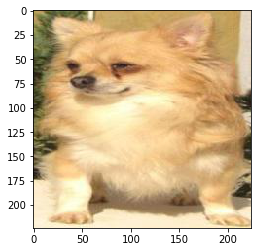

In [6]:
img = cv2.imread("cropped/train/images/n02085620-Chihuahua/n02085620_199.jpg")
img = img[...,::-1]
plt.imshow(img)

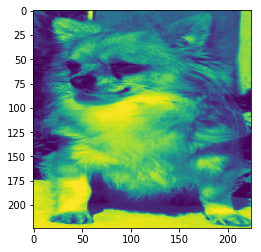

In [7]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.equalizeHist(gray)
plt.imshow(gray)

In [8]:
gray.shape

(224, 224)

In [9]:
train_folders=os.listdir('cropped/train/images')
train_folders=['cropped/train/images'+'/'+d for d in train_folders]
test_folders=os.listdir('cropped/test/images')
test_folders=['cropped/test/images'+'/'+d for d in test_folders]

In [10]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if (f.startswith('n'))]

In [11]:
def get_descriptors(dataset):
    
    if dataset == 'train':
        folders = train_folders
    elif dataset == 'test':
        folders = test_folders
    
    folder_number=-1
    count = 0
    descriptors=[]
      
    for folder in folders:
        folder_number+=1

        #get all the training images from a particular class 
        filenames=get_imlist('%s'%(folder))
##        print filenames
        
        for image_name in filenames:
            img=cv2.imread(image_name)

            # carry out normal preprocessing routines
            gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            gray=cv2.equalizeHist(gray)

            #get all the SIFT descriptors for an image
            keypoints, des=sift.detectAndCompute(gray, None)
##            print 'descriptor.shape', des.shape
            
            descriptors.append(des)

            count = count+1
  #          print('Done for', str(count), 'images.')

            if dataset == 'train':
                y_train.append(folder_number)
            elif dataset == 'test':
                y_test.append(folder_number)

    return descriptors

In [12]:
descriptor_train = get_descriptors('train')

In [13]:
descriptor_test = get_descriptors('test')

# Trying to find the optimal k for clusters

In [ ]:
silhouette = dict()
elbow = dict()
training_descs = descriptor_train
all_train_descriptors = [desc for desc_list in training_descs for desc in desc_list]
all_train_descriptors = np.array(all_train_descriptors)
if all_train_descriptors.shape[1] != 128:
    raise ValueError('Expected SIFT descriptors to have 128 features, got', all_train_descriptors.shape[1])
for n_clusters in [100, 200, 300, 400, 500]:
    print("Evaluating {} clusters".format(n_clusters))
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0, batch_size=1500, verbose=1)
    kmeans.fit(all_train_descriptors)
    clusters = kmeans.predict(all_train_descriptors)
    elbow_score = sum(np.min(cdist(all_train_descriptors, kmeans.cluster_centers_, 'euclidean'), axis=1)) / all_train_descriptors.shape[0]
    silhouette_avg = silhouette_score(all_train_descriptors, clusters, sample_size=1500)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg, "The average elbow_score is :", elbow_score)
    silhouette[n_clusters] = silhouette_avg
    elbow[n_clusters] = elbow_score

Evaluating 100 clusters
Init 1/3 with method: k-means++
Inertia for init 1/3: 398944080.984375
Init 2/3 with method: k-means++
Inertia for init 2/3: 398678316.437500
Init 3/3 with method: k-means++
Inertia for init 3/3: 399598423.921875
Minibatch iteration 1/474800: mean batch inertia: 91434.833198, ewa inertia: 91434.833198 
Minibatch iteration 2/474800: mean batch inertia: 91150.087406, ewa inertia: 91434.713231 
Minibatch iteration 3/474800: mean batch inertia: 90608.531448, ewa inertia: 91434.365151 
Minibatch iteration 4/474800: mean batch inertia: 89473.597385, ewa inertia: 91433.539056 
Minibatch iteration 5/474800: mean batch inertia: 89752.079094, ewa inertia: 91432.830636 
Minibatch iteration 6/474800: mean batch inertia: 89247.993062, ewa inertia: 91431.910138 
Minibatch iteration 7/474800: mean batch inertia: 89641.186312, ewa inertia: 91431.155684 
Minibatch iteration 8/474800: mean batch inertia: 88815.715885, ewa inertia: 91430.053768 
Minibatch iteration 9/474800: mean 

Minibatch iteration 95/474800: mean batch inertia: 85657.392292, ewa inertia: 91294.020879 
Minibatch iteration 96/474800: mean batch inertia: 87314.991417, ewa inertia: 91292.344466 
Minibatch iteration 97/474800: mean batch inertia: 88009.639187, ewa inertia: 91290.961423 
Minibatch iteration 98/474800: mean batch inertia: 87020.324229, ewa inertia: 91289.162152 
Minibatch iteration 99/474800: mean batch inertia: 88290.143000, ewa inertia: 91287.898629 
Minibatch iteration 100/474800: mean batch inertia: 86971.065156, ewa inertia: 91286.079895 
Minibatch iteration 101/474800: mean batch inertia: 87371.558073, ewa inertia: 91284.430660 
Minibatch iteration 102/474800: mean batch inertia: 87189.503927, ewa inertia: 91282.705418 
Minibatch iteration 103/474800: mean batch inertia: 88007.064938, ewa inertia: 91281.325351 
Minibatch iteration 104/474800: mean batch inertia: 86519.303104, ewa inertia: 91279.319054 
Minibatch iteration 105/474800: mean batch inertia: 86501.082698, ewa inert

Minibatch iteration 194/474800: mean batch inertia: 86759.647510, ewa inertia: 91125.960306 
Minibatch iteration 195/474800: mean batch inertia: 86019.456281, ewa inertia: 91123.808874 
Minibatch iteration 196/474800: mean batch inertia: 87026.111083, ewa inertia: 91122.082465 
Minibatch iteration 197/474800: mean batch inertia: 86212.880406, ewa inertia: 91120.014159 
Minibatch iteration 198/474800: mean batch inertia: 86103.190937, ewa inertia: 91117.900511 
Minibatch iteration 199/474800: mean batch inertia: 87502.142448, ewa inertia: 91116.377148 
Minibatch iteration 200/474800: mean batch inertia: 87098.768615, ewa inertia: 91114.684481 
Minibatch iteration 201/474800: mean batch inertia: 85953.220510, ewa inertia: 91112.509894 
Minibatch iteration 202/474800: mean batch inertia: 87783.368750, ewa inertia: 91111.107287 
Minibatch iteration 203/474800: mean batch inertia: 87930.038229, ewa inertia: 91109.767064 
Minibatch iteration 204/474800: mean batch inertia: 86083.612885, ewa 

Minibatch iteration 286/474800: mean batch inertia: 87381.287563, ewa inertia: 90972.630856 
Minibatch iteration 287/474800: mean batch inertia: 88490.589208, ewa inertia: 90971.585142 
Minibatch iteration 288/474800: mean batch inertia: 87410.940750, ewa inertia: 90970.085000 
Minibatch iteration 289/474800: mean batch inertia: 87022.689031, ewa inertia: 90968.421915 
Minibatch iteration 290/474800: mean batch inertia: 86570.860521, ewa inertia: 90966.569169 
Minibatch iteration 291/474800: mean batch inertia: 86393.246292, ewa inertia: 90964.642373 
Minibatch iteration 292/474800: mean batch inertia: 86442.078875, ewa inertia: 90962.736963 
Minibatch iteration 293/474800: mean batch inertia: 88355.598573, ewa inertia: 90961.638544 
Minibatch iteration 294/474800: mean batch inertia: 87793.335552, ewa inertia: 90960.303700 
Minibatch iteration 295/474800: mean batch inertia: 87489.277708, ewa inertia: 90958.841315 
Minibatch iteration 296/474800: mean batch inertia: 87605.480812, ewa 

Minibatch iteration 386/474800: mean batch inertia: 85960.876094, ewa inertia: 90810.366173 
Minibatch iteration 387/474800: mean batch inertia: 86787.026833, ewa inertia: 90808.671091 
Minibatch iteration 388/474800: mean batch inertia: 87041.055406, ewa inertia: 90807.083750 
Minibatch iteration 389/474800: mean batch inertia: 87047.098625, ewa inertia: 90805.499623 
Minibatch iteration 390/474800: mean batch inertia: 87077.877667, ewa inertia: 90803.929131 
Minibatch iteration 391/474800: mean batch inertia: 88147.169938, ewa inertia: 90802.809806 
Minibatch iteration 392/474800: mean batch inertia: 87866.245281, ewa inertia: 90801.572596 
Minibatch iteration 393/474800: mean batch inertia: 87008.459594, ewa inertia: 90799.974512 
Minibatch iteration 394/474800: mean batch inertia: 86839.971469, ewa inertia: 90798.306115 
Minibatch iteration 395/474800: mean batch inertia: 86466.930740, ewa inertia: 90796.481254 
Minibatch iteration 396/474800: mean batch inertia: 86675.692812, ewa 

Minibatch iteration 484/474800: mean batch inertia: 86711.454823, ewa inertia: 90656.944875 
Minibatch iteration 485/474800: mean batch inertia: 85954.925365, ewa inertia: 90654.963857 
Minibatch iteration 486/474800: mean batch inertia: 86824.517406, ewa inertia: 90653.350044 
Minibatch iteration 487/474800: mean batch inertia: 87382.331281, ewa inertia: 90651.971924 
Minibatch iteration 488/474800: mean batch inertia: 86328.501302, ewa inertia: 90650.150394 
Minibatch iteration 489/474800: mean batch inertia: 87263.225479, ewa inertia: 90648.723442 
Minibatch iteration 490/474800: mean batch inertia: 87515.494281, ewa inertia: 90647.403375 
Minibatch iteration 491/474800: mean batch inertia: 87089.703500, ewa inertia: 90645.904473 
Minibatch iteration 492/474800: mean batch inertia: 87075.143271, ewa inertia: 90644.400068 
Minibatch iteration 493/474800: mean batch inertia: 87157.411604, ewa inertia: 90642.930958 
Minibatch iteration 494/474800: mean batch inertia: 87066.600438, ewa 

Minibatch iteration 580/474800: mean batch inertia: 87769.780156, ewa inertia: 90508.637103 
Minibatch iteration 581/474800: mean batch inertia: 87448.511854, ewa inertia: 90507.347836 
Minibatch iteration 582/474800: mean batch inertia: 87150.716208, ewa inertia: 90505.933646 
Minibatch iteration 583/474800: mean batch inertia: 86116.568031, ewa inertia: 90504.084354 
Minibatch iteration 584/474800: mean batch inertia: 87061.314271, ewa inertia: 90502.633873 
Minibatch iteration 585/474800: mean batch inertia: 87572.468208, ewa inertia: 90501.399359 
Minibatch iteration 586/474800: mean batch inertia: 86539.985885, ewa inertia: 90499.730368 
Minibatch iteration 587/474800: mean batch inertia: 86971.631302, ewa inertia: 90498.243937 
Minibatch iteration 588/474800: mean batch inertia: 86351.548885, ewa inertia: 90496.496885 
Minibatch iteration 589/474800: mean batch inertia: 87659.411896, ewa inertia: 90495.301587 
Minibatch iteration 590/474800: mean batch inertia: 85971.505063, ewa 

Minibatch iteration 680/474800: mean batch inertia: 86563.204323, ewa inertia: 90366.310121 
Minibatch iteration 681/474800: mean batch inertia: 87257.067344, ewa inertia: 90365.000160 
Minibatch iteration 682/474800: mean batch inertia: 86298.023573, ewa inertia: 90363.286693 
Minibatch iteration 683/474800: mean batch inertia: 86675.839698, ewa inertia: 90361.733128 
Minibatch iteration 684/474800: mean batch inertia: 87494.804760, ewa inertia: 90360.525256 
Minibatch iteration 685/474800: mean batch inertia: 86802.512990, ewa inertia: 90359.026223 
Minibatch iteration 686/474800: mean batch inertia: 87082.248573, ewa inertia: 90357.645677 
Minibatch iteration 687/474800: mean batch inertia: 87547.714427, ewa inertia: 90356.461819 
Minibatch iteration 688/474800: mean batch inertia: 86166.391260, ewa inertia: 90354.696492 
Minibatch iteration 689/474800: mean batch inertia: 87332.879198, ewa inertia: 90353.423364 
Minibatch iteration 690/474800: mean batch inertia: 87844.815333, ewa 

Minibatch iteration 769/474800: mean batch inertia: 86340.593146, ewa inertia: 90235.959207 
Minibatch iteration 770/474800: mean batch inertia: 87138.621135, ewa inertia: 90234.654261 
Minibatch iteration 771/474800: mean batch inertia: 86419.497531, ewa inertia: 90233.046889 
Minibatch iteration 772/474800: mean batch inertia: 87172.735104, ewa inertia: 90231.757543 
Minibatch iteration 773/474800: mean batch inertia: 86396.347990, ewa inertia: 90230.141639 
Minibatch iteration 774/474800: mean batch inertia: 87836.898531, ewa inertia: 90229.133337 
Minibatch iteration 775/474800: mean batch inertia: 87802.746667, ewa inertia: 90228.111071 
Minibatch iteration 776/474800: mean batch inertia: 87882.749302, ewa inertia: 90227.122942 
Minibatch iteration 777/474800: mean batch inertia: 86441.718375, ewa inertia: 90225.528105 
Minibatch iteration 778/474800: mean batch inertia: 86108.434583, ewa inertia: 90223.793524 
Minibatch iteration 779/474800: mean batch inertia: 86110.170458, ewa 

Minibatch iteration 869/474800: mean batch inertia: 86897.975490, ewa inertia: 90095.980173 
Minibatch iteration 870/474800: mean batch inertia: 86891.112406, ewa inertia: 90094.629924 
Minibatch iteration 871/474800: mean batch inertia: 85658.585479, ewa inertia: 90092.760965 
Minibatch iteration 872/474800: mean batch inertia: 87193.204698, ewa inertia: 90091.539347 
Minibatch iteration 873/474800: mean batch inertia: 86722.964500, ewa inertia: 90090.120126 
Minibatch iteration 874/474800: mean batch inertia: 87511.487781, ewa inertia: 90089.033717 
Minibatch iteration 875/474800: mean batch inertia: 85925.365510, ewa inertia: 90087.279514 
Minibatch iteration 876/474800: mean batch inertia: 86401.212740, ewa inertia: 90085.726529 
Minibatch iteration 877/474800: mean batch inertia: 85991.886021, ewa inertia: 90084.001745 
Minibatch iteration 878/474800: mean batch inertia: 87253.117542, ewa inertia: 90082.809059 
Minibatch iteration 879/474800: mean batch inertia: 87057.949385, ewa 

Minibatch iteration 968/474800: mean batch inertia: 86572.028271, ewa inertia: 89965.402961 
Minibatch iteration 969/474800: mean batch inertia: 86205.164323, ewa inertia: 89963.818728 
Minibatch iteration 970/474800: mean batch inertia: 87418.637542, ewa inertia: 89962.746412 
Minibatch iteration 971/474800: mean batch inertia: 86202.521958, ewa inertia: 89961.162184 
Minibatch iteration 972/474800: mean batch inertia: 86914.555427, ewa inertia: 89959.878612 
Minibatch iteration 973/474800: mean batch inertia: 86634.145365, ewa inertia: 89958.477441 
Minibatch iteration 974/474800: mean batch inertia: 86853.873823, ewa inertia: 89957.169434 
Minibatch iteration 975/474800: mean batch inertia: 86963.619906, ewa inertia: 89955.908215 
Minibatch iteration 976/474800: mean batch inertia: 87000.661063, ewa inertia: 89954.663134 
Minibatch iteration 977/474800: mean batch inertia: 86381.063500, ewa inertia: 89953.157534 
Minibatch iteration 978/474800: mean batch inertia: 86140.149615, ewa 

Minibatch iteration 1065/474800: mean batch inertia: 87076.036875, ewa inertia: 89840.075606 
Minibatch iteration 1066/474800: mean batch inertia: 87328.405958, ewa inertia: 89839.017409 
Minibatch iteration 1067/474800: mean batch inertia: 87861.165198, ewa inertia: 89838.184116 
Minibatch iteration 1068/474800: mean batch inertia: 86854.967760, ewa inertia: 89836.927251 
Minibatch iteration 1069/474800: mean batch inertia: 86919.660281, ewa inertia: 89835.698171 
Minibatch iteration 1070/474800: mean batch inertia: 87092.216990, ewa inertia: 89834.542310 
Minibatch iteration 1071/474800: mean batch inertia: 86692.882208, ewa inertia: 89833.218690 
Minibatch iteration 1072/474800: mean batch inertia: 86571.511573, ewa inertia: 89831.844494 
Minibatch iteration 1073/474800: mean batch inertia: 87256.525198, ewa inertia: 89830.759481 
Minibatch iteration 1074/474800: mean batch inertia: 87252.607604, ewa inertia: 89829.673274 
Minibatch iteration 1075/474800: mean batch inertia: 86068.3

Minibatch iteration 1166/474800: mean batch inertia: 87430.718677, ewa inertia: 89712.703696 
Minibatch iteration 1167/474800: mean batch inertia: 87091.916031, ewa inertia: 89711.599526 
Minibatch iteration 1168/474800: mean batch inertia: 88317.665562, ewa inertia: 89711.012245 
Minibatch iteration 1169/474800: mean batch inertia: 87274.724844, ewa inertia: 89709.985808 
Minibatch iteration 1170/474800: mean batch inertia: 86770.490333, ewa inertia: 89708.747363 
Minibatch iteration 1171/474800: mean batch inertia: 87519.022198, ewa inertia: 89707.824806 
Minibatch iteration 1172/474800: mean batch inertia: 87018.754156, ewa inertia: 89706.691868 
Minibatch iteration 1173/474800: mean batch inertia: 86840.744604, ewa inertia: 89705.484410 
Minibatch iteration 1174/474800: mean batch inertia: 86692.433552, ewa inertia: 89704.214975 
Minibatch iteration 1175/474800: mean batch inertia: 86851.412583, ewa inertia: 89703.013055 
Minibatch iteration 1176/474800: mean batch inertia: 85696.5

Minibatch iteration 1257/474800: mean batch inertia: 87655.095385, ewa inertia: 89601.689236 
Minibatch iteration 1258/474800: mean batch inertia: 86024.332354, ewa inertia: 89600.182053 
Minibatch iteration 1259/474800: mean batch inertia: 86198.050969, ewa inertia: 89598.748694 
Minibatch iteration 1260/474800: mean batch inertia: 87054.616052, ewa inertia: 89597.676820 
Minibatch iteration 1261/474800: mean batch inertia: 87504.935760, ewa inertia: 89596.795123 
Minibatch iteration 1262/474800: mean batch inertia: 87114.484302, ewa inertia: 89595.749296 
Minibatch iteration 1263/474800: mean batch inertia: 86802.873521, ewa inertia: 89594.572624 
Minibatch iteration 1264/474800: mean batch inertia: 86933.011073, ewa inertia: 89593.451276 
Minibatch iteration 1265/474800: mean batch inertia: 87465.960479, ewa inertia: 89592.554938 
Minibatch iteration 1266/474800: mean batch inertia: 86491.391917, ewa inertia: 89591.248381 
Minibatch iteration 1267/474800: mean batch inertia: 87117.6

Minibatch iteration 1354/474800: mean batch inertia: 86631.737302, ewa inertia: 89488.447951 
Minibatch iteration 1355/474800: mean batch inertia: 86720.653490, ewa inertia: 89487.281846 
Minibatch iteration 1356/474800: mean batch inertia: 86173.958417, ewa inertia: 89485.885903 
Minibatch iteration 1357/474800: mean batch inertia: 86676.799229, ewa inertia: 89484.702401 
Minibatch iteration 1358/474800: mean batch inertia: 86291.189677, ewa inertia: 89483.356936 
Minibatch iteration 1359/474800: mean batch inertia: 87361.577312, ewa inertia: 89482.463004 
Minibatch iteration 1360/474800: mean batch inertia: 86656.475271, ewa inertia: 89481.272382 
Minibatch iteration 1361/474800: mean batch inertia: 86737.324708, ewa inertia: 89480.116323 
Minibatch iteration 1362/474800: mean batch inertia: 87078.752052, ewa inertia: 89479.104600 
Minibatch iteration 1363/474800: mean batch inertia: 86299.695146, ewa inertia: 89477.765076 
Minibatch iteration 1364/474800: mean batch inertia: 87623.9

Minibatch iteration 1457/474800: mean batch inertia: 87676.977698, ewa inertia: 89370.858737 
Minibatch iteration 1458/474800: mean batch inertia: 86557.359833, ewa inertia: 89369.673376 
Minibatch iteration 1459/474800: mean batch inertia: 86194.673708, ewa inertia: 89368.335711 
Minibatch iteration 1460/474800: mean batch inertia: 86663.902542, ewa inertia: 89367.196300 
Minibatch iteration 1461/474800: mean batch inertia: 85929.758167, ewa inertia: 89365.748066 
Minibatch iteration 1462/474800: mean batch inertia: 86069.328115, ewa inertia: 89364.359245 
Minibatch iteration 1463/474800: mean batch inertia: 86906.970135, ewa inertia: 89363.323917 
Minibatch iteration 1464/474800: mean batch inertia: 87042.630583, ewa inertia: 89362.346181 
Minibatch iteration 1465/474800: mean batch inertia: 87871.078740, ewa inertia: 89361.717892 
Minibatch iteration 1466/474800: mean batch inertia: 86616.111906, ewa inertia: 89360.561135 
Minibatch iteration 1467/474800: mean batch inertia: 87725.9

Minibatch iteration 1559/474800: mean batch inertia: 85447.333240, ewa inertia: 89262.203771 
Minibatch iteration 1560/474800: mean batch inertia: 86879.003302, ewa inertia: 89261.199700 
Minibatch iteration 1561/474800: mean batch inertia: 87596.104292, ewa inertia: 89260.498175 
Minibatch iteration 1562/474800: mean batch inertia: 86931.507719, ewa inertia: 89259.516944 
Minibatch iteration 1563/474800: mean batch inertia: 87764.223333, ewa inertia: 89258.886959 
Minibatch iteration 1564/474800: mean batch inertia: 87170.480000, ewa inertia: 89258.007088 
Minibatch iteration 1565/474800: mean batch inertia: 87091.183208, ewa inertia: 89257.094179 
Minibatch iteration 1566/474800: mean batch inertia: 88342.132135, ewa inertia: 89256.708694 
Minibatch iteration 1567/474800: mean batch inertia: 87422.715917, ewa inertia: 89255.936011 
Minibatch iteration 1568/474800: mean batch inertia: 87282.082052, ewa inertia: 89255.104402 
Minibatch iteration 1569/474800: mean batch inertia: 85932.5

Minibatch iteration 1662/474800: mean batch inertia: 86766.719354, ewa inertia: 89162.950816 
Minibatch iteration 1663/474800: mean batch inertia: 86371.382323, ewa inertia: 89161.774695 
Minibatch iteration 1664/474800: mean batch inertia: 86249.258833, ewa inertia: 89160.547617 
Minibatch iteration 1665/474800: mean batch inertia: 87328.562083, ewa inertia: 89159.775779 
Minibatch iteration 1666/474800: mean batch inertia: 85984.158563, ewa inertia: 89158.437853 
Minibatch iteration 1667/474800: mean batch inertia: 86356.356573, ewa inertia: 89157.257303 
Minibatch iteration 1668/474800: mean batch inertia: 87032.373302, ewa inertia: 89156.362064 
Minibatch iteration 1669/474800: mean batch inertia: 86749.728865, ewa inertia: 89155.348120 
Minibatch iteration 1670/474800: mean batch inertia: 86255.392542, ewa inertia: 89154.126334 
Minibatch iteration 1671/474800: mean batch inertia: 86144.283750, ewa inertia: 89152.858251 
Minibatch iteration 1672/474800: mean batch inertia: 86576.9

Minibatch iteration 1752/474800: mean batch inertia: 88009.747292, ewa inertia: 89075.636227 
Minibatch iteration 1753/474800: mean batch inertia: 86731.295333, ewa inertia: 89074.648528 
Minibatch iteration 1754/474800: mean batch inertia: 87435.075938, ewa inertia: 89073.957757 
Minibatch iteration 1755/474800: mean batch inertia: 86084.987750, ewa inertia: 89072.698468 
Minibatch iteration 1756/474800: mean batch inertia: 87058.658583, ewa inertia: 89071.849928 
Minibatch iteration 1757/474800: mean batch inertia: 86316.841094, ewa inertia: 89070.689210 
Minibatch iteration 1758/474800: mean batch inertia: 87296.361927, ewa inertia: 89069.941665 
Minibatch iteration 1759/474800: mean batch inertia: 85844.562604, ewa inertia: 89068.582774 
Minibatch iteration 1760/474800: mean batch inertia: 86892.590563, ewa inertia: 89067.666002 
Minibatch iteration 1761/474800: mean batch inertia: 86422.444823, ewa inertia: 89066.551538 
Minibatch iteration 1762/474800: mean batch inertia: 86334.7

Minibatch iteration 1857/474800: mean batch inertia: 86759.217073, ewa inertia: 88975.915635 
Minibatch iteration 1858/474800: mean batch inertia: 86689.052135, ewa inertia: 88974.952152 
Minibatch iteration 1859/474800: mean batch inertia: 87550.986604, ewa inertia: 88974.352218 
Minibatch iteration 1860/474800: mean batch inertia: 86579.073073, ewa inertia: 88973.343058 
Minibatch iteration 1861/474800: mean batch inertia: 87191.400604, ewa inertia: 88972.592305 
Minibatch iteration 1862/474800: mean batch inertia: 88295.023198, ewa inertia: 88972.306837 
Minibatch iteration 1863/474800: mean batch inertia: 86794.871073, ewa inertia: 88971.389457 
Minibatch iteration 1864/474800: mean batch inertia: 86290.114594, ewa inertia: 88970.259803 
Minibatch iteration 1865/474800: mean batch inertia: 86711.550323, ewa inertia: 88969.308182 
Minibatch iteration 1866/474800: mean batch inertia: 86735.433469, ewa inertia: 88968.367023 
Minibatch iteration 1867/474800: mean batch inertia: 86166.8

Minibatch iteration 1962/474800: mean batch inertia: 86996.139719, ewa inertia: 88879.127834 
Minibatch iteration 1963/474800: mean batch inertia: 87427.112823, ewa inertia: 88878.516082 
Minibatch iteration 1964/474800: mean batch inertia: 87066.247406, ewa inertia: 88877.752552 
Minibatch iteration 1965/474800: mean batch inertia: 87168.540031, ewa inertia: 88877.032440 
Minibatch iteration 1966/474800: mean batch inertia: 87141.433562, ewa inertia: 88876.301211 
Minibatch iteration 1967/474800: mean batch inertia: 86821.180052, ewa inertia: 88875.435364 
Minibatch iteration 1968/474800: mean batch inertia: 86340.283208, ewa inertia: 88874.367274 
Minibatch iteration 1969/474800: mean batch inertia: 87991.212271, ewa inertia: 88873.995190 
Minibatch iteration 1970/474800: mean batch inertia: 86980.734510, ewa inertia: 88873.197536 
Minibatch iteration 1971/474800: mean batch inertia: 86628.422000, ewa inertia: 88872.251785 
Minibatch iteration 1972/474800: mean batch inertia: 86458.3

Minibatch iteration 2068/474800: mean batch inertia: 86860.163396, ewa inertia: 88787.625814 
Minibatch iteration 2069/474800: mean batch inertia: 86293.202167, ewa inertia: 88786.574884 
Minibatch iteration 2070/474800: mean batch inertia: 86442.546062, ewa inertia: 88785.587316 
Minibatch iteration 2071/474800: mean batch inertia: 87042.741010, ewa inertia: 88784.853034 
Minibatch iteration 2072/474800: mean batch inertia: 86512.236719, ewa inertia: 88783.895553 
Minibatch iteration 2073/474800: mean batch inertia: 87452.703740, ewa inertia: 88783.334706 
Minibatch iteration 2074/474800: mean batch inertia: 86530.938333, ewa inertia: 88782.385744 
Minibatch iteration 2075/474800: mean batch inertia: 85316.898656, ewa inertia: 88780.925693 
Minibatch iteration 2076/474800: mean batch inertia: 87398.505500, ewa inertia: 88780.343263 
Minibatch iteration 2077/474800: mean batch inertia: 87320.959000, ewa inertia: 88779.728407 
Minibatch iteration 2078/474800: mean batch inertia: 86332.1

Minibatch iteration 2160/474800: mean batch inertia: 86815.552854, ewa inertia: 88709.800825 
Minibatch iteration 2161/474800: mean batch inertia: 86367.481125, ewa inertia: 88708.813978 
Minibatch iteration 2162/474800: mean batch inertia: 86092.941396, ewa inertia: 88707.711879 
Minibatch iteration 2163/474800: mean batch inertia: 87182.936573, ewa inertia: 88707.069473 
Minibatch iteration 2164/474800: mean batch inertia: 86431.313344, ewa inertia: 88706.110670 
Minibatch iteration 2165/474800: mean batch inertia: 87571.803406, ewa inertia: 88705.632772 
Minibatch iteration 2166/474800: mean batch inertia: 86836.773094, ewa inertia: 88704.845399 
Minibatch iteration 2167/474800: mean batch inertia: 86776.728167, ewa inertia: 88704.033060 
Minibatch iteration 2168/474800: mean batch inertia: 86712.405271, ewa inertia: 88703.193964 
Minibatch iteration 2169/474800: mean batch inertia: 85813.421667, ewa inertia: 88701.976468 
Minibatch iteration 2170/474800: mean batch inertia: 87137.8

Minibatch iteration 2254/474800: mean batch inertia: 87363.328385, ewa inertia: 88634.052996 
Minibatch iteration 2255/474800: mean batch inertia: 85945.968500, ewa inertia: 88632.920473 
Minibatch iteration 2256/474800: mean batch inertia: 87336.996354, ewa inertia: 88632.374485 
Minibatch iteration 2257/474800: mean batch inertia: 87165.957115, ewa inertia: 88631.756666 
Minibatch iteration 2258/474800: mean batch inertia: 86002.174813, ewa inertia: 88630.648791 
Minibatch iteration 2259/474800: mean batch inertia: 87483.151146, ewa inertia: 88630.165336 
Minibatch iteration 2260/474800: mean batch inertia: 87075.420240, ewa inertia: 88629.510304 
Minibatch iteration 2261/474800: mean batch inertia: 87229.578646, ewa inertia: 88628.920496 
Minibatch iteration 2262/474800: mean batch inertia: 86063.222667, ewa inertia: 88627.839536 
Minibatch iteration 2263/474800: mean batch inertia: 86054.392063, ewa inertia: 88626.755312 
Minibatch iteration 2264/474800: mean batch inertia: 87175.6

Minibatch iteration 2345/474800: mean batch inertia: 86731.653104, ewa inertia: 88563.346569 
Minibatch iteration 2346/474800: mean batch inertia: 86800.195958, ewa inertia: 88562.603733 
Minibatch iteration 2347/474800: mean batch inertia: 87155.692781, ewa inertia: 88562.010984 
Minibatch iteration 2348/474800: mean batch inertia: 86829.266667, ewa inertia: 88561.280958 
Minibatch iteration 2349/474800: mean batch inertia: 86324.500542, ewa inertia: 88560.338576 
Minibatch iteration 2350/474800: mean batch inertia: 86628.587646, ewa inertia: 88559.524706 
Minibatch iteration 2351/474800: mean batch inertia: 86752.301854, ewa inertia: 88558.763301 
Minibatch iteration 2352/474800: mean batch inertia: 87537.437073, ewa inertia: 88558.333004 
Minibatch iteration 2353/474800: mean batch inertia: 86644.756271, ewa inertia: 88557.526791 
Minibatch iteration 2354/474800: mean batch inertia: 86126.618719, ewa inertia: 88556.502620 
Minibatch iteration 2355/474800: mean batch inertia: 86023.6

Minibatch iteration 2443/474800: mean batch inertia: 86712.211177, ewa inertia: 88489.162791 
Minibatch iteration 2444/474800: mean batch inertia: 87531.841719, ewa inertia: 88488.759460 
Minibatch iteration 2445/474800: mean batch inertia: 86590.658708, ewa inertia: 88487.959767 
Minibatch iteration 2446/474800: mean batch inertia: 87775.130073, ewa inertia: 88487.659444 
Minibatch iteration 2447/474800: mean batch inertia: 87596.622542, ewa inertia: 88487.284039 
Minibatch iteration 2448/474800: mean batch inertia: 86065.668979, ewa inertia: 88486.263783 
Minibatch iteration 2449/474800: mean batch inertia: 87285.935354, ewa inertia: 88485.758071 
Minibatch iteration 2450/474800: mean batch inertia: 85932.539917, ewa inertia: 88484.682369 
Minibatch iteration 2451/474800: mean batch inertia: 86088.336125, ewa inertia: 88483.672760 
Minibatch iteration 2452/474800: mean batch inertia: 86806.678687, ewa inertia: 88482.966222 
Minibatch iteration 2453/474800: mean batch inertia: 86837.8

Minibatch iteration 2544/474800: mean batch inertia: 86257.297698, ewa inertia: 88414.092880 
Minibatch iteration 2545/474800: mean batch inertia: 87212.151469, ewa inertia: 88413.586487 
Minibatch iteration 2546/474800: mean batch inertia: 86985.459823, ewa inertia: 88412.984801 
Minibatch iteration 2547/474800: mean batch inertia: 87261.013167, ewa inertia: 88412.499461 
Minibatch iteration 2548/474800: mean batch inertia: 86886.561875, ewa inertia: 88411.856565 
Minibatch iteration 2549/474800: mean batch inertia: 86755.384177, ewa inertia: 88411.158673 
Minibatch iteration 2550/474800: mean batch inertia: 87008.184021, ewa inertia: 88410.567583 
Minibatch iteration 2551/474800: mean batch inertia: 86945.233031, ewa inertia: 88409.950220 
Minibatch iteration 2552/474800: mean batch inertia: 87019.846688, ewa inertia: 88409.364553 
Minibatch iteration 2553/474800: mean batch inertia: 86945.989042, ewa inertia: 88408.748015 
Minibatch iteration 2554/474800: mean batch inertia: 86519.6

Minibatch iteration 2650/474800: mean batch inertia: 85866.791594, ewa inertia: 88341.664910 
Minibatch iteration 2651/474800: mean batch inertia: 86994.283260, ewa inertia: 88341.097241 
Minibatch iteration 2652/474800: mean batch inertia: 86972.793094, ewa inertia: 88340.520758 
Minibatch iteration 2653/474800: mean batch inertia: 87227.298083, ewa inertia: 88340.051744 
Minibatch iteration 2654/474800: mean batch inertia: 85919.362365, ewa inertia: 88339.031879 
Minibatch iteration 2655/474800: mean batch inertia: 87028.696010, ewa inertia: 88338.479818 
Minibatch iteration 2656/474800: mean batch inertia: 87992.744031, ewa inertia: 88338.334156 
Minibatch iteration 2657/474800: mean batch inertia: 86472.488167, ewa inertia: 88337.548052 
Minibatch iteration 2658/474800: mean batch inertia: 86895.449135, ewa inertia: 88336.940479 
Minibatch iteration 2659/474800: mean batch inertia: 87202.705708, ewa inertia: 88336.462612 
Minibatch iteration 2660/474800: mean batch inertia: 87586.6

Minibatch iteration 2742/474800: mean batch inertia: 86309.307104, ewa inertia: 88279.384105 
Minibatch iteration 2743/474800: mean batch inertia: 86832.043031, ewa inertia: 88278.774322 
Minibatch iteration 2744/474800: mean batch inertia: 85487.572958, ewa inertia: 88277.598356 
Minibatch iteration 2745/474800: mean batch inertia: 86294.706656, ewa inertia: 88276.762939 
Minibatch iteration 2746/474800: mean batch inertia: 86613.307833, ewa inertia: 88276.062106 
Minibatch iteration 2747/474800: mean batch inertia: 87288.855760, ewa inertia: 88275.646184 
Minibatch iteration 2748/474800: mean batch inertia: 86705.624531, ewa inertia: 88274.984715 
Minibatch iteration 2749/474800: mean batch inertia: 86549.017677, ewa inertia: 88274.257544 
Minibatch iteration 2750/474800: mean batch inertia: 86044.816250, ewa inertia: 88273.318254 
Minibatch iteration 2751/474800: mean batch inertia: 86965.984906, ewa inertia: 88272.767458 
Minibatch iteration 2752/474800: mean batch inertia: 86987.3

Minibatch iteration 2832/474800: mean batch inertia: 86925.191740, ewa inertia: 88222.702862 
Minibatch iteration 2833/474800: mean batch inertia: 85562.204677, ewa inertia: 88221.581962 
Minibatch iteration 2834/474800: mean batch inertia: 85867.218594, ewa inertia: 88220.590040 
Minibatch iteration 2835/474800: mean batch inertia: 86378.770948, ewa inertia: 88219.814059 
Minibatch iteration 2836/474800: mean batch inertia: 87560.390687, ewa inertia: 88219.536236 
Minibatch iteration 2837/474800: mean batch inertia: 86590.048885, ewa inertia: 88218.849714 
Minibatch iteration 2838/474800: mean batch inertia: 86611.990208, ewa inertia: 88218.172725 
Minibatch iteration 2839/474800: mean batch inertia: 87321.482229, ewa inertia: 88217.794938 
Minibatch iteration 2840/474800: mean batch inertia: 86147.583802, ewa inertia: 88216.922733 
Minibatch iteration 2841/474800: mean batch inertia: 86905.464115, ewa inertia: 88216.370200 
Minibatch iteration 2842/474800: mean batch inertia: 87056.2

Minibatch iteration 2932/474800: mean batch inertia: 86425.953656, ewa inertia: 88157.058554 
Minibatch iteration 2933/474800: mean batch inertia: 86814.511750, ewa inertia: 88156.492923 
Minibatch iteration 2934/474800: mean batch inertia: 87070.900812, ewa inertia: 88156.035550 
Minibatch iteration 2935/474800: mean batch inertia: 87023.457927, ewa inertia: 88155.558382 
Minibatch iteration 2936/474800: mean batch inertia: 86766.358802, ewa inertia: 88154.973095 
Minibatch iteration 2937/474800: mean batch inertia: 86836.307021, ewa inertia: 88154.417525 
Minibatch iteration 2938/474800: mean batch inertia: 87247.510521, ewa inertia: 88154.035434 
Minibatch iteration 2939/474800: mean batch inertia: 87008.081125, ewa inertia: 88153.552630 
Minibatch iteration 2940/474800: mean batch inertia: 87504.811490, ewa inertia: 88153.279308 
Minibatch iteration 2941/474800: mean batch inertia: 86896.597969, ewa inertia: 88152.749853 
Minibatch iteration 2942/474800: mean batch inertia: 86902.5

Minibatch iteration 3022/474800: mean batch inertia: 86837.685594, ewa inertia: 88104.669556 
Minibatch iteration 3023/474800: mean batch inertia: 87147.554448, ewa inertia: 88104.266312 
Minibatch iteration 3024/474800: mean batch inertia: 86110.997521, ewa inertia: 88103.426524 
Minibatch iteration 3025/474800: mean batch inertia: 88134.916875, ewa inertia: 88103.439791 
Minibatch iteration 3026/474800: mean batch inertia: 86247.451396, ewa inertia: 88102.657841 
Minibatch iteration 3027/474800: mean batch inertia: 87004.261062, ewa inertia: 88102.195073 
Minibatch iteration 3028/474800: mean batch inertia: 86551.542333, ewa inertia: 88101.541764 
Minibatch iteration 3029/474800: mean batch inertia: 86531.302615, ewa inertia: 88100.880204 
Minibatch iteration 3030/474800: mean batch inertia: 86999.096177, ewa inertia: 88100.416009 
Minibatch iteration 3031/474800: mean batch inertia: 86653.927260, ewa inertia: 88099.806586 
Minibatch iteration 3032/474800: mean batch inertia: 87296.2

Minibatch iteration 3132/474800: mean batch inertia: 87213.895740, ewa inertia: 88043.667145 
Minibatch iteration 3133/474800: mean batch inertia: 87082.983552, ewa inertia: 88043.262398 
Minibatch iteration 3134/474800: mean batch inertia: 85881.865719, ewa inertia: 88042.351775 
Minibatch iteration 3135/474800: mean batch inertia: 87077.618750, ewa inertia: 88041.945321 
Minibatch iteration 3136/474800: mean batch inertia: 86733.659656, ewa inertia: 88041.394125 
Minibatch iteration 3137/474800: mean batch inertia: 87480.935875, ewa inertia: 88041.157997 
Minibatch iteration 3138/474800: mean batch inertia: 85895.075260, ewa inertia: 88040.253827 
Minibatch iteration 3139/474800: mean batch inertia: 86626.818865, ewa inertia: 88039.658330 
Minibatch iteration 3140/474800: mean batch inertia: 86725.606740, ewa inertia: 88039.104704 
Minibatch iteration 3141/474800: mean batch inertia: 85935.530198, ewa inertia: 88038.218442 
Minibatch iteration 3142/474800: mean batch inertia: 86083.3

Minibatch iteration 3239/474800: mean batch inertia: 86261.863823, ewa inertia: 87985.058211 
Minibatch iteration 3240/474800: mean batch inertia: 87207.839438, ewa inertia: 87984.730759 
Minibatch iteration 3241/474800: mean batch inertia: 86795.463417, ewa inertia: 87984.229707 
Minibatch iteration 3242/474800: mean batch inertia: 86003.822906, ewa inertia: 87983.395337 
Minibatch iteration 3243/474800: mean batch inertia: 87302.334750, ewa inertia: 87983.108398 
Minibatch iteration 3244/474800: mean batch inertia: 88161.869688, ewa inertia: 87983.183713 
Minibatch iteration 3245/474800: mean batch inertia: 86242.050698, ewa inertia: 87982.450152 
Minibatch iteration 3246/474800: mean batch inertia: 86385.239698, ewa inertia: 87981.777228 
Minibatch iteration 3247/474800: mean batch inertia: 86442.843417, ewa inertia: 87981.128857 
Minibatch iteration 3248/474800: mean batch inertia: 87730.756042, ewa inertia: 87981.023372 
Minibatch iteration 3249/474800: mean batch inertia: 86048.4

Minibatch iteration 3336/474800: mean batch inertia: 87296.014396, ewa inertia: 87936.700657 
Minibatch iteration 3337/474800: mean batch inertia: 87315.026927, ewa inertia: 87936.438738 
Minibatch iteration 3338/474800: mean batch inertia: 86224.649917, ewa inertia: 87935.717541 
Minibatch iteration 3339/474800: mean batch inertia: 86826.001448, ewa inertia: 87935.250004 
Minibatch iteration 3340/474800: mean batch inertia: 86298.247125, ewa inertia: 87934.560315 
Minibatch iteration 3341/474800: mean batch inertia: 86312.929604, ewa inertia: 87933.877103 
Minibatch iteration 3342/474800: mean batch inertia: 86857.036135, ewa inertia: 87933.423417 
Minibatch iteration 3343/474800: mean batch inertia: 86677.456823, ewa inertia: 87932.894263 
Minibatch iteration 3344/474800: mean batch inertia: 86752.452583, ewa inertia: 87932.396929 
Minibatch iteration 3345/474800: mean batch inertia: 86964.901667, ewa inertia: 87931.989311 
Minibatch iteration 3346/474800: mean batch inertia: 87265.4

Minibatch iteration 3452/474800: mean batch inertia: 86002.997781, ewa inertia: 87878.453190 
Minibatch iteration 3453/474800: mean batch inertia: 86477.421760, ewa inertia: 87877.862918 
Minibatch iteration 3454/474800: mean batch inertia: 85704.762396, ewa inertia: 87876.947365 
Minibatch iteration 3455/474800: mean batch inertia: 86807.066260, ewa inertia: 87876.496611 
Minibatch iteration 3456/474800: mean batch inertia: 87150.302167, ewa inertia: 87876.190656 
Minibatch iteration 3457/474800: mean batch inertia: 86530.153052, ewa inertia: 87875.623555 
Minibatch iteration 3458/474800: mean batch inertia: 86503.474073, ewa inertia: 87875.045452 
Minibatch iteration 3459/474800: mean batch inertia: 86376.351646, ewa inertia: 87874.414034 
Minibatch iteration 3460/474800: mean batch inertia: 86240.070208, ewa inertia: 87873.725465 
Minibatch iteration 3461/474800: mean batch inertia: 86621.718594, ewa inertia: 87873.197979 
Minibatch iteration 3462/474800: mean batch inertia: 86775.2

Minibatch iteration 3554/474800: mean batch inertia: 85705.912240, ewa inertia: 87825.797576 
Minibatch iteration 3555/474800: mean batch inertia: 86713.223062, ewa inertia: 87825.328835 
Minibatch iteration 3556/474800: mean batch inertia: 86361.029833, ewa inertia: 87824.711908 
Minibatch iteration 3557/474800: mean batch inertia: 86339.265979, ewa inertia: 87824.086072 
Minibatch iteration 3558/474800: mean batch inertia: 86374.754917, ewa inertia: 87823.475451 
Minibatch iteration 3559/474800: mean batch inertia: 85703.924917, ewa inertia: 87822.582459 
Minibatch iteration 3560/474800: mean batch inertia: 85658.199333, ewa inertia: 87821.670578 
Minibatch iteration 3561/474800: mean batch inertia: 86341.148385, ewa inertia: 87821.046816 
Minibatch iteration 3562/474800: mean batch inertia: 87235.146500, ewa inertia: 87820.799970 
Minibatch iteration 3563/474800: mean batch inertia: 86294.209844, ewa inertia: 87820.156799 
Minibatch iteration 3564/474800: mean batch inertia: 86538.9

Minibatch iteration 3654/474800: mean batch inertia: 86401.593469, ewa inertia: 87777.827972 
Minibatch iteration 3655/474800: mean batch inertia: 86555.698073, ewa inertia: 87777.313074 
Minibatch iteration 3656/474800: mean batch inertia: 86795.637854, ewa inertia: 87776.899482 
Minibatch iteration 3657/474800: mean batch inertia: 86131.343854, ewa inertia: 87776.206190 
Minibatch iteration 3658/474800: mean batch inertia: 87415.555385, ewa inertia: 87776.054243 
Minibatch iteration 3659/474800: mean batch inertia: 86638.156198, ewa inertia: 87775.574833 
Minibatch iteration 3660/474800: mean batch inertia: 86821.500771, ewa inertia: 87775.172870 
Minibatch iteration 3661/474800: mean batch inertia: 86478.622156, ewa inertia: 87774.626618 
Minibatch iteration 3662/474800: mean batch inertia: 86432.872188, ewa inertia: 87774.061320 
Minibatch iteration 3663/474800: mean batch inertia: 87056.320031, ewa inertia: 87773.758927 
Minibatch iteration 3664/474800: mean batch inertia: 88068.1

Minibatch iteration 3743/474800: mean batch inertia: 84844.473010, ewa inertia: 87739.457891 
Minibatch iteration 3744/474800: mean batch inertia: 87016.491271, ewa inertia: 87739.153297 
Minibatch iteration 3745/474800: mean batch inertia: 86506.146031, ewa inertia: 87738.633816 
Minibatch iteration 3746/474800: mean batch inertia: 87575.450719, ewa inertia: 87738.565065 
Minibatch iteration 3747/474800: mean batch inertia: 86170.056031, ewa inertia: 87737.904233 
Minibatch iteration 3748/474800: mean batch inertia: 85712.655698, ewa inertia: 87737.050972 
Minibatch iteration 3749/474800: mean batch inertia: 86174.584052, ewa inertia: 87736.392686 
Minibatch iteration 3750/474800: mean batch inertia: 87257.382156, ewa inertia: 87736.190873 
Minibatch iteration 3751/474800: mean batch inertia: 87214.194333, ewa inertia: 87735.970949 
Minibatch iteration 3752/474800: mean batch inertia: 86111.258760, ewa inertia: 87735.286439 
Minibatch iteration 3753/474800: mean batch inertia: 86925.5

Minibatch iteration 3848/474800: mean batch inertia: 86034.323042, ewa inertia: 87692.501125 
Minibatch iteration 3849/474800: mean batch inertia: 86615.496927, ewa inertia: 87692.047371 
Minibatch iteration 3850/474800: mean batch inertia: 85373.695802, ewa inertia: 87691.070621 
Minibatch iteration 3851/474800: mean batch inertia: 88124.629458, ewa inertia: 87691.253285 
Minibatch iteration 3852/474800: mean batch inertia: 86276.552229, ewa inertia: 87690.657254 
Minibatch iteration 3853/474800: mean batch inertia: 86245.997479, ewa inertia: 87690.048602 
Minibatch iteration 3854/474800: mean batch inertia: 87114.392198, ewa inertia: 87689.806071 
Minibatch iteration 3855/474800: mean batch inertia: 87408.328240, ewa inertia: 87689.687481 
Minibatch iteration 3856/474800: mean batch inertia: 86930.959177, ewa inertia: 87689.367819 
Minibatch iteration 3857/474800: mean batch inertia: 87262.978510, ewa inertia: 87689.188176 
Minibatch iteration 3858/474800: mean batch inertia: 87060.2

Minibatch iteration 3939/474800: mean batch inertia: 86786.838448, ewa inertia: 87654.730206 
Minibatch iteration 3940/474800: mean batch inertia: 86057.835875, ewa inertia: 87654.057415 
Minibatch iteration 3941/474800: mean batch inertia: 88038.739813, ewa inertia: 87654.219486 
Minibatch iteration 3942/474800: mean batch inertia: 85896.833344, ewa inertia: 87653.479078 
Minibatch iteration 3943/474800: mean batch inertia: 87497.695708, ewa inertia: 87653.413445 
Minibatch iteration 3944/474800: mean batch inertia: 86677.463844, ewa inertia: 87653.002266 
Minibatch iteration 3945/474800: mean batch inertia: 86939.333208, ewa inertia: 87652.701588 
Minibatch iteration 3946/474800: mean batch inertia: 86775.834062, ewa inertia: 87652.332154 
Minibatch iteration 3947/474800: mean batch inertia: 86325.082958, ewa inertia: 87651.772967 
Minibatch iteration 3948/474800: mean batch inertia: 87012.370010, ewa inertia: 87651.503579 
Minibatch iteration 3949/474800: mean batch inertia: 87127.1

Minibatch iteration 4038/474800: mean batch inertia: 86855.271229, ewa inertia: 87617.691174 
Minibatch iteration 4039/474800: mean batch inertia: 87406.140510, ewa inertia: 87617.602045 
Minibatch iteration 4040/474800: mean batch inertia: 86215.853562, ewa inertia: 87617.011471 
Minibatch iteration 4041/474800: mean batch inertia: 86950.866990, ewa inertia: 87616.730817 
Minibatch iteration 4042/474800: mean batch inertia: 88066.331385, ewa inertia: 87616.920239 
Minibatch iteration 4043/474800: mean batch inertia: 86764.407802, ewa inertia: 87616.561065 
Minibatch iteration 4044/474800: mean batch inertia: 86439.315219, ewa inertia: 87616.065077 
Minibatch iteration 4045/474800: mean batch inertia: 86352.976812, ewa inertia: 87615.532923 
Minibatch iteration 4046/474800: mean batch inertia: 86694.431417, ewa inertia: 87615.144852 
Minibatch iteration 4047/474800: mean batch inertia: 86856.099104, ewa inertia: 87614.825057 
Minibatch iteration 4048/474800: mean batch inertia: 87117.2

Minibatch iteration 4143/474800: mean batch inertia: 86953.053365, ewa inertia: 87579.170771 
Minibatch iteration 4144/474800: mean batch inertia: 86160.127771, ewa inertia: 87578.572911 
Minibatch iteration 4145/474800: mean batch inertia: 87180.321563, ewa inertia: 87578.405123 
Minibatch iteration 4146/474800: mean batch inertia: 86052.470354, ewa inertia: 87577.762228 
Minibatch iteration 4147/474800: mean batch inertia: 86164.559083, ewa inertia: 87577.166829 
Minibatch iteration 4148/474800: mean batch inertia: 87277.046927, ewa inertia: 87577.040384 
Minibatch iteration 4149/474800: mean batch inertia: 86535.087365, ewa inertia: 87576.601397 
Minibatch iteration 4150/474800: mean batch inertia: 86009.515958, ewa inertia: 87575.941165 
Minibatch iteration 4151/474800: mean batch inertia: 86476.985458, ewa inertia: 87575.478162 
Minibatch iteration 4152/474800: mean batch inertia: 86408.007240, ewa inertia: 87574.986292 
Minibatch iteration 4153/474800: mean batch inertia: 86824.2

Minibatch iteration 4252/474800: mean batch inertia: 87413.275031, ewa inertia: 87540.677765 
Minibatch iteration 4253/474800: mean batch inertia: 87163.461458, ewa inertia: 87540.518840 
Minibatch iteration 4254/474800: mean batch inertia: 86778.702948, ewa inertia: 87540.197877 
Minibatch iteration 4255/474800: mean batch inertia: 87364.890417, ewa inertia: 87540.124018 
Minibatch iteration 4256/474800: mean batch inertia: 86192.595365, ewa inertia: 87539.556288 
Minibatch iteration 4257/474800: mean batch inertia: 86623.146031, ewa inertia: 87539.170194 
Minibatch iteration 4258/474800: mean batch inertia: 86005.450156, ewa inertia: 87538.524019 
Minibatch iteration 4259/474800: mean batch inertia: 86959.447833, ewa inertia: 87538.280047 
Minibatch iteration 4260/474800: mean batch inertia: 86275.858927, ewa inertia: 87537.748174 
Minibatch iteration 4261/474800: mean batch inertia: 86052.697740, ewa inertia: 87537.122504 
Minibatch iteration 4262/474800: mean batch inertia: 86642.8

Minibatch iteration 4353/474800: mean batch inertia: 86730.659615, ewa inertia: 87502.344563 
Minibatch iteration 4354/474800: mean batch inertia: 86994.199187, ewa inertia: 87502.130475 
Minibatch iteration 4355/474800: mean batch inertia: 87748.510573, ewa inertia: 87502.234278 
Minibatch iteration 4356/474800: mean batch inertia: 85597.552115, ewa inertia: 87501.431813 
Minibatch iteration 4357/474800: mean batch inertia: 86373.711979, ewa inertia: 87500.956691 
Minibatch iteration 4358/474800: mean batch inertia: 86974.923146, ewa inertia: 87500.735067 
Minibatch iteration 4359/474800: mean batch inertia: 87008.033510, ewa inertia: 87500.527486 
Minibatch iteration 4360/474800: mean batch inertia: 86283.121094, ewa inertia: 87500.014578 
Minibatch iteration 4361/474800: mean batch inertia: 87657.791875, ewa inertia: 87500.081051 
Minibatch iteration 4362/474800: mean batch inertia: 87331.277354, ewa inertia: 87500.009932 
Minibatch iteration 4363/474800: mean batch inertia: 86863.7

Minibatch iteration 4464/474800: mean batch inertia: 85729.224760, ewa inertia: 87466.832079 
Minibatch iteration 4465/474800: mean batch inertia: 87260.615135, ewa inertia: 87466.745198 
Minibatch iteration 4466/474800: mean batch inertia: 86554.807292, ewa inertia: 87466.360987 
Minibatch iteration 4467/474800: mean batch inertia: 87049.012906, ewa inertia: 87466.185153 
Minibatch iteration 4468/474800: mean batch inertia: 86719.370396, ewa inertia: 87465.870511 
Minibatch iteration 4469/474800: mean batch inertia: 86819.772917, ewa inertia: 87465.598303 
Minibatch iteration 4470/474800: mean batch inertia: 86784.243000, ewa inertia: 87465.311240 
Minibatch iteration 4471/474800: mean batch inertia: 87089.353615, ewa inertia: 87465.152844 
Minibatch iteration 4472/474800: mean batch inertia: 87515.745938, ewa inertia: 87465.174160 
Minibatch iteration 4473/474800: mean batch inertia: 87182.374396, ewa inertia: 87465.055013 
Minibatch iteration 4474/474800: mean batch inertia: 87284.6

Minibatch iteration 4574/474800: mean batch inertia: 86935.018729, ewa inertia: 87434.654052 
Minibatch iteration 4575/474800: mean batch inertia: 86894.082135, ewa inertia: 87434.426302 
Minibatch iteration 4576/474800: mean batch inertia: 86893.005229, ewa inertia: 87434.198195 
Minibatch iteration 4577/474800: mean batch inertia: 85448.275198, ewa inertia: 87433.361502 
Minibatch iteration 4578/474800: mean batch inertia: 86888.444031, ewa inertia: 87433.131922 
Minibatch iteration 4579/474800: mean batch inertia: 86635.227292, ewa inertia: 87432.795755 
Minibatch iteration 4580/474800: mean batch inertia: 87099.316500, ewa inertia: 87432.655256 
Minibatch iteration 4581/474800: mean batch inertia: 87297.257979, ewa inertia: 87432.598211 
Minibatch iteration 4582/474800: mean batch inertia: 86545.384000, ewa inertia: 87432.224417 
Minibatch iteration 4583/474800: mean batch inertia: 85678.657990, ewa inertia: 87431.485619 
Minibatch iteration 4584/474800: mean batch inertia: 86626.0

Minibatch iteration 4676/474800: mean batch inertia: 86177.101052, ewa inertia: 87404.267527 
Minibatch iteration 4677/474800: mean batch inertia: 87465.482250, ewa inertia: 87404.293318 
Minibatch iteration 4678/474800: mean batch inertia: 86540.195885, ewa inertia: 87403.929263 
Minibatch iteration 4679/474800: mean batch inertia: 87457.856198, ewa inertia: 87403.951983 
Minibatch iteration 4680/474800: mean batch inertia: 86817.170563, ewa inertia: 87403.704765 
Minibatch iteration 4681/474800: mean batch inertia: 86017.236469, ewa inertia: 87403.120629 
Minibatch iteration 4682/474800: mean batch inertia: 87175.262635, ewa inertia: 87403.024630 
Minibatch iteration 4683/474800: mean batch inertia: 86007.264542, ewa inertia: 87402.436579 
Minibatch iteration 4684/474800: mean batch inertia: 87887.847365, ewa inertia: 87402.641089 
Minibatch iteration 4685/474800: mean batch inertia: 87198.150167, ewa inertia: 87402.554934 
Minibatch iteration 4686/474800: mean batch inertia: 86189.8

Minibatch iteration 4783/474800: mean batch inertia: 86330.827875, ewa inertia: 87372.675998 
Minibatch iteration 4784/474800: mean batch inertia: 85467.709021, ewa inertia: 87371.873413 
Minibatch iteration 4785/474800: mean batch inertia: 86877.111490, ewa inertia: 87371.664964 
Minibatch iteration 4786/474800: mean batch inertia: 86664.111667, ewa inertia: 87371.366863 
Minibatch iteration 4787/474800: mean batch inertia: 86864.215750, ewa inertia: 87371.153194 
Minibatch iteration 4788/474800: mean batch inertia: 86618.973698, ewa inertia: 87370.836292 
Minibatch iteration 4789/474800: mean batch inertia: 86386.342438, ewa inertia: 87370.421513 
Minibatch iteration 4790/474800: mean batch inertia: 86918.512990, ewa inertia: 87370.231118 
Minibatch iteration 4791/474800: mean batch inertia: 86788.785427, ewa inertia: 87369.986148 
Minibatch iteration 4792/474800: mean batch inertia: 86896.136573, ewa inertia: 87369.786510 
Minibatch iteration 4793/474800: mean batch inertia: 87045.4

Minibatch iteration 4882/474800: mean batch inertia: 86337.760479, ewa inertia: 87341.246508 
Minibatch iteration 4883/474800: mean batch inertia: 86666.306437, ewa inertia: 87340.962147 
Minibatch iteration 4884/474800: mean batch inertia: 86623.988677, ewa inertia: 87340.660078 
Minibatch iteration 4885/474800: mean batch inertia: 86698.256740, ewa inertia: 87340.389426 
Minibatch iteration 4886/474800: mean batch inertia: 86440.580219, ewa inertia: 87340.010325 
Minibatch iteration 4887/474800: mean batch inertia: 86254.612625, ewa inertia: 87339.553034 
Minibatch iteration 4888/474800: mean batch inertia: 86286.637104, ewa inertia: 87339.109428 
Minibatch iteration 4889/474800: mean batch inertia: 86239.385542, ewa inertia: 87338.646101 
Minibatch iteration 4890/474800: mean batch inertia: 86153.776656, ewa inertia: 87338.146901 
Minibatch iteration 4891/474800: mean batch inertia: 87402.446490, ewa inertia: 87338.173991 
Minibatch iteration 4892/474800: mean batch inertia: 86305.4

Minibatch iteration 4980/474800: mean batch inertia: 87214.054656, ewa inertia: 87310.160691 
Minibatch iteration 4981/474800: mean batch inertia: 86360.246750, ewa inertia: 87309.760481 
Minibatch iteration 4982/474800: mean batch inertia: 86155.798812, ewa inertia: 87309.274303 
Minibatch iteration 4983/474800: mean batch inertia: 85967.769750, ewa inertia: 87308.709111 
Minibatch iteration 4984/474800: mean batch inertia: 86071.397563, ewa inertia: 87308.187817 
Minibatch iteration 4985/474800: mean batch inertia: 86517.681687, ewa inertia: 87307.854767 
Minibatch iteration 4986/474800: mean batch inertia: 87251.977469, ewa inertia: 87307.831225 
Minibatch iteration 4987/474800: mean batch inertia: 86007.688427, ewa inertia: 87307.283460 
Minibatch iteration 4988/474800: mean batch inertia: 85792.633062, ewa inertia: 87306.645319 
Minibatch iteration 4989/474800: mean batch inertia: 86380.195427, ewa inertia: 87306.254995 
Minibatch iteration 4990/474800: mean batch inertia: 86560.8

Minibatch iteration 5082/474800: mean batch inertia: 86030.877844, ewa inertia: 87279.913995 
Minibatch iteration 5083/474800: mean batch inertia: 86448.820677, ewa inertia: 87279.563845 
Minibatch iteration 5084/474800: mean batch inertia: 86836.511156, ewa inertia: 87279.377182 
Minibatch iteration 5085/474800: mean batch inertia: 86866.323802, ewa inertia: 87279.203158 
Minibatch iteration 5086/474800: mean batch inertia: 86160.905531, ewa inertia: 87278.732005 
Minibatch iteration 5087/474800: mean batch inertia: 86515.906521, ewa inertia: 87278.410618 
Minibatch iteration 5088/474800: mean batch inertia: 85626.179615, ewa inertia: 87277.714513 
Minibatch iteration 5089/474800: mean batch inertia: 86923.651406, ewa inertia: 87277.565342 
Minibatch iteration 5090/474800: mean batch inertia: 86600.979750, ewa inertia: 87277.280288 
Minibatch iteration 5091/474800: mean batch inertia: 87423.228062, ewa inertia: 87277.341778 
Minibatch iteration 5092/474800: mean batch inertia: 85422.7

Minibatch iteration 5179/474800: mean batch inertia: 87337.945740, ewa inertia: 87254.994679 
Minibatch iteration 5180/474800: mean batch inertia: 87292.103104, ewa inertia: 87255.010313 
Minibatch iteration 5181/474800: mean batch inertia: 86209.582250, ewa inertia: 87254.569862 
Minibatch iteration 5182/474800: mean batch inertia: 87183.774073, ewa inertia: 87254.540035 
Minibatch iteration 5183/474800: mean batch inertia: 86901.538188, ewa inertia: 87254.391311 
Minibatch iteration 5184/474800: mean batch inertia: 86709.098031, ewa inertia: 87254.161572 
Minibatch iteration 5185/474800: mean batch inertia: 86779.772458, ewa inertia: 87253.961706 
Minibatch iteration 5186/474800: mean batch inertia: 86637.831927, ewa inertia: 87253.702123 
Minibatch iteration 5187/474800: mean batch inertia: 85585.777271, ewa inertia: 87252.999407 
Minibatch iteration 5188/474800: mean batch inertia: 86747.488198, ewa inertia: 87252.786429 
Minibatch iteration 5189/474800: mean batch inertia: 86376.0

Minibatch iteration 5290/474800: mean batch inertia: 86477.635719, ewa inertia: 87230.310179 
Minibatch iteration 5291/474800: mean batch inertia: 86516.847854, ewa inertia: 87230.009589 
Minibatch iteration 5292/474800: mean batch inertia: 86549.527854, ewa inertia: 87229.722894 
Minibatch iteration 5293/474800: mean batch inertia: 85946.284531, ewa inertia: 87229.182166 
Minibatch iteration 5294/474800: mean batch inertia: 87249.254281, ewa inertia: 87229.190623 
Minibatch iteration 5295/474800: mean batch inertia: 86884.887219, ewa inertia: 87229.045563 
Minibatch iteration 5296/474800: mean batch inertia: 86257.809083, ewa inertia: 87228.636370 
Minibatch iteration 5297/474800: mean batch inertia: 86626.690490, ewa inertia: 87228.382763 
Minibatch iteration 5298/474800: mean batch inertia: 86892.534125, ewa inertia: 87228.241266 
Minibatch iteration 5299/474800: mean batch inertia: 85993.253583, ewa inertia: 87227.720950 
Minibatch iteration 5300/474800: mean batch inertia: 87542.3

Minibatch iteration 5378/474800: mean batch inertia: 87303.780656, ewa inertia: 87212.163507 
Minibatch iteration 5379/474800: mean batch inertia: 86681.120990, ewa inertia: 87211.939772 
Minibatch iteration 5380/474800: mean batch inertia: 87769.947000, ewa inertia: 87212.174868 
Minibatch iteration 5381/474800: mean batch inertia: 85838.481427, ewa inertia: 87211.596114 
Minibatch iteration 5382/474800: mean batch inertia: 87231.984573, ewa inertia: 87211.604704 
Minibatch iteration 5383/474800: mean batch inertia: 87071.600792, ewa inertia: 87211.545719 
Minibatch iteration 5384/474800: mean batch inertia: 86305.997531, ewa inertia: 87211.164200 
Minibatch iteration 5385/474800: mean batch inertia: 85947.402438, ewa inertia: 87210.631762 
Minibatch iteration 5386/474800: mean batch inertia: 86531.958281, ewa inertia: 87210.345829 
Minibatch iteration 5387/474800: mean batch inertia: 86436.825750, ewa inertia: 87210.019936 
Minibatch iteration 5388/474800: mean batch inertia: 86641.1

Minibatch iteration 5466/474800: mean batch inertia: 87414.657292, ewa inertia: 87193.605496 
Minibatch iteration 5467/474800: mean batch inertia: 87414.240312, ewa inertia: 87193.698452 
Minibatch iteration 5468/474800: mean batch inertia: 86552.822042, ewa inertia: 87193.428443 
Minibatch iteration 5469/474800: mean batch inertia: 86708.737646, ewa inertia: 87193.224237 
Minibatch iteration 5470/474800: mean batch inertia: 87492.490229, ewa inertia: 87193.350322 
Minibatch iteration 5471/474800: mean batch inertia: 86967.809385, ewa inertia: 87193.255298 
Minibatch iteration 5472/474800: mean batch inertia: 86957.457948, ewa inertia: 87193.155954 
Minibatch iteration 5473/474800: mean batch inertia: 86983.930562, ewa inertia: 87193.067805 
Minibatch iteration 5474/474800: mean batch inertia: 87005.766188, ewa inertia: 87192.988893 
Minibatch iteration 5475/474800: mean batch inertia: 86792.658792, ewa inertia: 87192.820229 
Minibatch iteration 5476/474800: mean batch inertia: 86440.6

Minibatch iteration 5556/474800: mean batch inertia: 86817.291448, ewa inertia: 87178.698747 
Minibatch iteration 5557/474800: mean batch inertia: 86096.978448, ewa inertia: 87178.243005 
Minibatch iteration 5558/474800: mean batch inertia: 85564.937885, ewa inertia: 87177.563300 
Minibatch iteration 5559/474800: mean batch inertia: 86295.425062, ewa inertia: 87177.191645 
Minibatch iteration 5560/474800: mean batch inertia: 87361.070583, ewa inertia: 87177.269115 
Minibatch iteration 5561/474800: mean batch inertia: 86705.629906, ewa inertia: 87177.070408 
Minibatch iteration 5562/474800: mean batch inertia: 85917.714281, ewa inertia: 87176.539826 
Minibatch iteration 5563/474800: mean batch inertia: 86706.772010, ewa inertia: 87176.341907 
Minibatch iteration 5564/474800: mean batch inertia: 86290.339719, ewa inertia: 87175.968624 
Minibatch iteration 5565/474800: mean batch inertia: 87568.661500, ewa inertia: 87176.134070 
Minibatch iteration 5566/474800: mean batch inertia: 87381.9

Minibatch iteration 5667/474800: mean batch inertia: 86550.000229, ewa inertia: 87157.723584 
Minibatch iteration 5668/474800: mean batch inertia: 87315.983844, ewa inertia: 87157.790261 
Minibatch iteration 5669/474800: mean batch inertia: 86859.768427, ewa inertia: 87157.664701 
Minibatch iteration 5670/474800: mean batch inertia: 85642.907375, ewa inertia: 87157.026516 
Minibatch iteration 5671/474800: mean batch inertia: 87086.938625, ewa inertia: 87156.996987 
Minibatch iteration 5672/474800: mean batch inertia: 86417.422354, ewa inertia: 87156.685395 
Minibatch iteration 5673/474800: mean batch inertia: 86201.310615, ewa inertia: 87156.282884 
Minibatch iteration 5674/474800: mean batch inertia: 86293.536667, ewa inertia: 87155.919399 
Minibatch iteration 5675/474800: mean batch inertia: 86440.665135, ewa inertia: 87155.618053 
Minibatch iteration 5676/474800: mean batch inertia: 86077.665260, ewa inertia: 87155.163899 
Minibatch iteration 5677/474800: mean batch inertia: 86276.8

Minibatch iteration 5768/474800: mean batch inertia: 86327.957177, ewa inertia: 87137.612677 
Minibatch iteration 5769/474800: mean batch inertia: 86469.795865, ewa inertia: 87137.331318 
Minibatch iteration 5770/474800: mean batch inertia: 85754.482604, ewa inertia: 87136.748707 
Minibatch iteration 5771/474800: mean batch inertia: 86179.441823, ewa inertia: 87136.345382 
Minibatch iteration 5772/474800: mean batch inertia: 87054.134917, ewa inertia: 87136.310746 
Minibatch iteration 5773/474800: mean batch inertia: 86801.171583, ewa inertia: 87136.169548 
Minibatch iteration 5774/474800: mean batch inertia: 87062.263042, ewa inertia: 87136.138410 
Minibatch iteration 5775/474800: mean batch inertia: 86067.685625, ewa inertia: 87135.688258 
Minibatch iteration 5776/474800: mean batch inertia: 86716.845135, ewa inertia: 87135.511795 
Minibatch iteration 5777/474800: mean batch inertia: 86534.965615, ewa inertia: 87135.258777 
Minibatch iteration 5778/474800: mean batch inertia: 86175.8

Minibatch iteration 5884/474800: mean batch inertia: 86196.269375, ewa inertia: 87114.701267 
Minibatch iteration 5885/474800: mean batch inertia: 85655.836719, ewa inertia: 87114.086630 
Minibatch iteration 5886/474800: mean batch inertia: 85792.812969, ewa inertia: 87113.529961 
Minibatch iteration 5887/474800: mean batch inertia: 86680.705219, ewa inertia: 87113.347607 
Minibatch iteration 5888/474800: mean batch inertia: 86462.631542, ewa inertia: 87113.073452 
Minibatch iteration 5889/474800: mean batch inertia: 85622.079938, ewa inertia: 87112.445279 
Minibatch iteration 5890/474800: mean batch inertia: 87142.603438, ewa inertia: 87112.457985 
Minibatch iteration 5891/474800: mean batch inertia: 87419.554406, ewa inertia: 87112.587368 
Minibatch iteration 5892/474800: mean batch inertia: 88018.254719, ewa inertia: 87112.968937 
Minibatch iteration 5893/474800: mean batch inertia: 85841.827656, ewa inertia: 87112.433390 
Minibatch iteration 5894/474800: mean batch inertia: 86443.3

Minibatch iteration 13/474800: mean batch inertia: 82654.397177, ewa inertia: 86515.871909 
Minibatch iteration 14/474800: mean batch inertia: 83399.238604, ewa inertia: 86514.558834 
Minibatch iteration 15/474800: mean batch inertia: 83139.030896, ewa inertia: 86513.136684 
Minibatch iteration 16/474800: mean batch inertia: 84064.963844, ewa inertia: 86512.105239 
Minibatch iteration 17/474800: mean batch inertia: 82829.365063, ewa inertia: 86510.553656 
Minibatch iteration 18/474800: mean batch inertia: 83302.198396, ewa inertia: 86509.201938 
Minibatch iteration 19/474800: mean batch inertia: 82491.454146, ewa inertia: 86507.509212 
Minibatch iteration 20/474800: mean batch inertia: 83156.752927, ewa inertia: 86506.097498 
Minibatch iteration 21/474800: mean batch inertia: 82916.872875, ewa inertia: 86504.585314 
Minibatch iteration 22/474800: mean batch inertia: 82793.696885, ewa inertia: 86503.021873 
Minibatch iteration 23/474800: mean batch inertia: 82520.128490, ewa inertia: 86

Minibatch iteration 114/474800: mean batch inertia: 82335.587500, ewa inertia: 86335.023307 
Minibatch iteration 115/474800: mean batch inertia: 81760.019229, ewa inertia: 86333.095803 
Minibatch iteration 116/474800: mean batch inertia: 82561.615760, ewa inertia: 86331.506833 
Minibatch iteration 117/474800: mean batch inertia: 82199.881896, ewa inertia: 86329.766130 
Minibatch iteration 118/474800: mean batch inertia: 81777.848417, ewa inertia: 86327.848352 
Minibatch iteration 119/474800: mean batch inertia: 81052.710573, ewa inertia: 86325.625873 
Minibatch iteration 120/474800: mean batch inertia: 81454.406844, ewa inertia: 86323.573570 
Minibatch iteration 121/474800: mean batch inertia: 82035.596583, ewa inertia: 86321.766993 
Minibatch iteration 122/474800: mean batch inertia: 81540.702885, ewa inertia: 86319.752673 
Minibatch iteration 123/474800: mean batch inertia: 82378.956583, ewa inertia: 86318.092369 
Minibatch iteration 124/474800: mean batch inertia: 81764.832385, ewa 

Minibatch iteration 212/474800: mean batch inertia: 80374.746219, ewa inertia: 86145.664911 
Minibatch iteration 213/474800: mean batch inertia: 82150.638490, ewa inertia: 86143.981758 
Minibatch iteration 214/474800: mean batch inertia: 82233.735312, ewa inertia: 86142.334324 
Minibatch iteration 215/474800: mean batch inertia: 80828.539042, ewa inertia: 86140.095558 
Minibatch iteration 216/474800: mean batch inertia: 82030.640719, ewa inertia: 86138.364195 
Minibatch iteration 217/474800: mean batch inertia: 81756.078698, ewa inertia: 86136.517886 
Minibatch iteration 218/474800: mean batch inertia: 82206.716521, ewa inertia: 86134.862213 
Minibatch iteration 219/474800: mean batch inertia: 81545.947469, ewa inertia: 86132.928848 
Minibatch iteration 220/474800: mean batch inertia: 82036.081438, ewa inertia: 86131.202797 
Minibatch iteration 221/474800: mean batch inertia: 81922.715187, ewa inertia: 86129.429710 
Minibatch iteration 222/474800: mean batch inertia: 82106.542687, ewa 

Minibatch iteration 308/474800: mean batch inertia: 81334.754292, ewa inertia: 85968.260617 
Minibatch iteration 309/474800: mean batch inertia: 82264.330708, ewa inertia: 85966.700107 
Minibatch iteration 310/474800: mean batch inertia: 80468.197208, ewa inertia: 85964.383521 
Minibatch iteration 311/474800: mean batch inertia: 82678.214635, ewa inertia: 85962.999019 
Minibatch iteration 312/474800: mean batch inertia: 82191.271844, ewa inertia: 85961.409945 
Minibatch iteration 313/474800: mean batch inertia: 81346.268167, ewa inertia: 85959.465530 
Minibatch iteration 314/474800: mean batch inertia: 81177.387729, ewa inertia: 85957.450783 
Minibatch iteration 315/474800: mean batch inertia: 81713.660573, ewa inertia: 85955.662823 
Minibatch iteration 316/474800: mean batch inertia: 81715.706063, ewa inertia: 85953.876478 
Minibatch iteration 317/474800: mean batch inertia: 81519.954813, ewa inertia: 85952.008414 
Minibatch iteration 318/474800: mean batch inertia: 81533.304740, ewa 

Minibatch iteration 403/474800: mean batch inertia: 81939.279073, ewa inertia: 85792.772841 
Minibatch iteration 404/474800: mean batch inertia: 81017.204177, ewa inertia: 85790.760836 
Minibatch iteration 405/474800: mean batch inertia: 82605.410583, ewa inertia: 85789.418810 
Minibatch iteration 406/474800: mean batch inertia: 82574.112375, ewa inertia: 85788.064162 
Minibatch iteration 407/474800: mean batch inertia: 81926.620583, ewa inertia: 85786.437290 
Minibatch iteration 408/474800: mean batch inertia: 80896.127521, ewa inertia: 85784.376943 
Minibatch iteration 409/474800: mean batch inertia: 80877.538958, ewa inertia: 85782.309633 
Minibatch iteration 410/474800: mean batch inertia: 80796.644271, ewa inertia: 85780.209113 
Minibatch iteration 411/474800: mean batch inertia: 82606.145521, ewa inertia: 85778.871841 
Minibatch iteration 412/474800: mean batch inertia: 81531.239385, ewa inertia: 85777.082263 
Minibatch iteration 413/474800: mean batch inertia: 81133.008458, ewa 

Minibatch iteration 500/474800: mean batch inertia: 81113.473479, ewa inertia: 85620.811802 
Minibatch iteration 501/474800: mean batch inertia: 80584.418375, ewa inertia: 85618.689909 
Minibatch iteration 502/474800: mean batch inertia: 81575.399094, ewa inertia: 85616.986422 
Minibatch iteration 503/474800: mean batch inertia: 80432.874896, ewa inertia: 85614.802294 
Minibatch iteration 504/474800: mean batch inertia: 81314.380177, ewa inertia: 85612.990474 
Minibatch iteration 505/474800: mean batch inertia: 82050.634385, ewa inertia: 85611.489610 
Minibatch iteration 506/474800: mean batch inertia: 82365.883354, ewa inertia: 85610.122197 
Minibatch iteration 507/474800: mean batch inertia: 81346.667469, ewa inertia: 85608.325953 
Minibatch iteration 508/474800: mean batch inertia: 82071.254667, ewa inertia: 85606.835742 
Minibatch iteration 509/474800: mean batch inertia: 80829.503375, ewa inertia: 85604.822994 
Minibatch iteration 510/474800: mean batch inertia: 81737.347073, ewa 

Minibatch iteration 596/474800: mean batch inertia: 81357.280500, ewa inertia: 85451.920912 
Minibatch iteration 597/474800: mean batch inertia: 81642.423396, ewa inertia: 85450.315925 
Minibatch iteration 598/474800: mean batch inertia: 81600.667146, ewa inertia: 85448.694021 
Minibatch iteration 599/474800: mean batch inertia: 81815.982813, ewa inertia: 85447.163516 
Minibatch iteration 600/474800: mean batch inertia: 82248.166917, ewa inertia: 85445.815740 
Minibatch iteration 601/474800: mean batch inertia: 82096.464365, ewa inertia: 85444.404618 
Minibatch iteration 602/474800: mean batch inertia: 81646.755729, ewa inertia: 85442.804623 
Minibatch iteration 603/474800: mean batch inertia: 82030.381750, ewa inertia: 85441.366928 
Minibatch iteration 604/474800: mean batch inertia: 81573.939479, ewa inertia: 85439.737535 
Minibatch iteration 605/474800: mean batch inertia: 81966.136687, ewa inertia: 85438.274065 
Minibatch iteration 606/474800: mean batch inertia: 81507.147250, ewa 

Minibatch iteration 685/474800: mean batch inertia: 80636.522302, ewa inertia: 85309.124178 
Minibatch iteration 686/474800: mean batch inertia: 81537.293729, ewa inertia: 85307.535061 
Minibatch iteration 687/474800: mean batch inertia: 82632.770906, ewa inertia: 85306.408150 
Minibatch iteration 688/474800: mean batch inertia: 81437.754427, ewa inertia: 85304.778240 
Minibatch iteration 689/474800: mean batch inertia: 81328.719573, ewa inertia: 85303.103079 
Minibatch iteration 690/474800: mean batch inertia: 81672.692667, ewa inertia: 85301.573543 
Minibatch iteration 691/474800: mean batch inertia: 81032.951792, ewa inertia: 85299.775121 
Minibatch iteration 692/474800: mean batch inertia: 81622.100937, ewa inertia: 85298.225673 
Minibatch iteration 693/474800: mean batch inertia: 80310.881625, ewa inertia: 85296.124445 
Minibatch iteration 694/474800: mean batch inertia: 81161.296406, ewa inertia: 85294.382392 
Minibatch iteration 695/474800: mean batch inertia: 81189.261448, ewa 

Minibatch iteration 777/474800: mean batch inertia: 81355.986042, ewa inertia: 85158.688430 
Minibatch iteration 778/474800: mean batch inertia: 80584.907615, ewa inertia: 85156.761441 
Minibatch iteration 779/474800: mean batch inertia: 81699.528615, ewa inertia: 85155.304868 
Minibatch iteration 780/474800: mean batch inertia: 81636.263323, ewa inertia: 85153.822253 
Minibatch iteration 781/474800: mean batch inertia: 80995.407156, ewa inertia: 85152.070263 
Minibatch iteration 782/474800: mean batch inertia: 81469.894979, ewa inertia: 85150.518918 
Minibatch iteration 783/474800: mean batch inertia: 80927.421667, ewa inertia: 85148.739676 
Minibatch iteration 784/474800: mean batch inertia: 81288.375365, ewa inertia: 85147.113258 
Minibatch iteration 785/474800: mean batch inertia: 81061.041635, ewa inertia: 85145.391747 
Minibatch iteration 786/474800: mean batch inertia: 81296.078010, ewa inertia: 85143.769985 
Minibatch iteration 787/474800: mean batch inertia: 80702.905865, ewa 

Minibatch iteration 878/474800: mean batch inertia: 80768.597583, ewa inertia: 84997.217786 
Minibatch iteration 879/474800: mean batch inertia: 81492.922990, ewa inertia: 84995.741385 
Minibatch iteration 880/474800: mean batch inertia: 81668.819104, ewa inertia: 84994.339712 
Minibatch iteration 881/474800: mean batch inertia: 80778.472917, ewa inertia: 84992.563517 
Minibatch iteration 882/474800: mean batch inertia: 80986.309979, ewa inertia: 84990.875634 
Minibatch iteration 883/474800: mean batch inertia: 81594.919938, ewa inertia: 84989.444877 
Minibatch iteration 884/474800: mean batch inertia: 82145.457375, ewa inertia: 84988.246671 
Minibatch iteration 885/474800: mean batch inertia: 81366.523885, ewa inertia: 84986.720795 
Minibatch iteration 886/474800: mean batch inertia: 81387.322635, ewa inertia: 84985.204325 
Minibatch iteration 887/474800: mean batch inertia: 81354.859479, ewa inertia: 84983.674817 
Minibatch iteration 888/474800: mean batch inertia: 81185.817156, ewa 

Minibatch iteration 976/474800: mean batch inertia: 80921.439802, ewa inertia: 84850.144768 
Minibatch iteration 977/474800: mean batch inertia: 81114.528385, ewa inertia: 84848.570908 
Minibatch iteration 978/474800: mean batch inertia: 82668.911187, ewa inertia: 84847.652591 
Minibatch iteration 979/474800: mean batch inertia: 80939.838427, ewa inertia: 84846.006182 
Minibatch iteration 980/474800: mean batch inertia: 80776.301604, ewa inertia: 84844.291567 
Minibatch iteration 981/474800: mean batch inertia: 81093.969760, ewa inertia: 84842.711511 
Minibatch iteration 982/474800: mean batch inertia: 81855.646792, ewa inertia: 84841.453025 
Minibatch iteration 983/474800: mean batch inertia: 82112.372729, ewa inertia: 84840.303230 
Minibatch iteration 984/474800: mean batch inertia: 81907.088813, ewa inertia: 84839.067432 
Minibatch iteration 985/474800: mean batch inertia: 81752.354479, ewa inertia: 84837.766962 
Minibatch iteration 986/474800: mean batch inertia: 81494.178135, ewa 

Minibatch iteration 1076/474800: mean batch inertia: 81631.232479, ewa inertia: 84705.697167 
Minibatch iteration 1077/474800: mean batch inertia: 81515.169760, ewa inertia: 84704.352959 
Minibatch iteration 1078/474800: mean batch inertia: 80681.249823, ewa inertia: 84702.657978 
Minibatch iteration 1079/474800: mean batch inertia: 82039.632229, ewa inertia: 84701.536013 
Minibatch iteration 1080/474800: mean batch inertia: 81645.406010, ewa inertia: 84700.248428 
Minibatch iteration 1081/474800: mean batch inertia: 81811.770469, ewa inertia: 84699.031478 
Minibatch iteration 1082/474800: mean batch inertia: 81294.458208, ewa inertia: 84697.597090 
Minibatch iteration 1083/474800: mean batch inertia: 81387.826115, ewa inertia: 84696.202644 
Minibatch iteration 1084/474800: mean batch inertia: 82391.860021, ewa inertia: 84695.231797 
Minibatch iteration 1085/474800: mean batch inertia: 81879.735646, ewa inertia: 84694.045594 
Minibatch iteration 1086/474800: mean batch inertia: 80481.7

Minibatch iteration 1165/474800: mean batch inertia: 82666.308604, ewa inertia: 84578.673158 
Minibatch iteration 1166/474800: mean batch inertia: 81392.428531, ewa inertia: 84577.330755 
Minibatch iteration 1167/474800: mean batch inertia: 82077.011094, ewa inertia: 84576.277340 
Minibatch iteration 1168/474800: mean batch inertia: 81932.734000, ewa inertia: 84575.163584 
Minibatch iteration 1169/474800: mean batch inertia: 80867.183552, ewa inertia: 84573.601367 
Minibatch iteration 1170/474800: mean batch inertia: 81196.626698, ewa inertia: 84572.178607 
Minibatch iteration 1171/474800: mean batch inertia: 80512.523979, ewa inertia: 84570.468226 
Minibatch iteration 1172/474800: mean batch inertia: 81527.125260, ewa inertia: 84569.186029 
Minibatch iteration 1173/474800: mean batch inertia: 80723.252156, ewa inertia: 84567.565690 
Minibatch iteration 1174/474800: mean batch inertia: 80713.252250, ewa inertia: 84565.941822 
Minibatch iteration 1175/474800: mean batch inertia: 81932.3

Minibatch iteration 1258/474800: mean batch inertia: 81913.695542, ewa inertia: 84450.270272 
Minibatch iteration 1259/474800: mean batch inertia: 81838.122719, ewa inertia: 84449.169743 
Minibatch iteration 1260/474800: mean batch inertia: 82193.894781, ewa inertia: 84448.219569 
Minibatch iteration 1261/474800: mean batch inertia: 81248.777917, ewa inertia: 84446.871605 
Minibatch iteration 1262/474800: mean batch inertia: 81761.589135, ewa inertia: 84445.740264 
Minibatch iteration 1263/474800: mean batch inertia: 81814.587479, ewa inertia: 84444.631727 
Minibatch iteration 1264/474800: mean batch inertia: 81028.502365, ewa inertia: 84443.192471 
Minibatch iteration 1265/474800: mean batch inertia: 81755.286510, ewa inertia: 84442.060024 
Minibatch iteration 1266/474800: mean batch inertia: 80697.067969, ewa inertia: 84440.482213 
Minibatch iteration 1267/474800: mean batch inertia: 81677.451865, ewa inertia: 84439.318116 
Minibatch iteration 1268/474800: mean batch inertia: 81775.4

Minibatch iteration 1358/474800: mean batch inertia: 81414.031562, ewa inertia: 84318.610546 
Minibatch iteration 1359/474800: mean batch inertia: 81157.961135, ewa inertia: 84317.278927 
Minibatch iteration 1360/474800: mean batch inertia: 80610.369177, ewa inertia: 84315.717161 
Minibatch iteration 1361/474800: mean batch inertia: 82377.639604, ewa inertia: 84314.900626 
Minibatch iteration 1362/474800: mean batch inertia: 81784.190292, ewa inertia: 84313.834407 
Minibatch iteration 1363/474800: mean batch inertia: 80940.587344, ewa inertia: 84312.413217 
Minibatch iteration 1364/474800: mean batch inertia: 81279.642073, ewa inertia: 84311.135474 
Minibatch iteration 1365/474800: mean batch inertia: 81488.142323, ewa inertia: 84309.946113 
Minibatch iteration 1366/474800: mean batch inertia: 81195.641979, ewa inertia: 84308.634019 
Minibatch iteration 1367/474800: mean batch inertia: 81519.127594, ewa inertia: 84307.458767 
Minibatch iteration 1368/474800: mean batch inertia: 81096.8

Minibatch iteration 1459/474800: mean batch inertia: 81189.412917, ewa inertia: 84188.968001 
Minibatch iteration 1460/474800: mean batch inertia: 81116.889292, ewa inertia: 84187.673698 
Minibatch iteration 1461/474800: mean batch inertia: 80563.417281, ewa inertia: 84186.146755 
Minibatch iteration 1462/474800: mean batch inertia: 81411.405375, ewa inertia: 84184.977723 
Minibatch iteration 1463/474800: mean batch inertia: 82182.479208, ewa inertia: 84184.134046 
Minibatch iteration 1464/474800: mean batch inertia: 81306.401833, ewa inertia: 84182.921623 
Minibatch iteration 1465/474800: mean batch inertia: 82275.011646, ewa inertia: 84182.117797 
Minibatch iteration 1466/474800: mean batch inertia: 80903.236469, ewa inertia: 84180.736365 
Minibatch iteration 1467/474800: mean batch inertia: 80478.850479, ewa inertia: 84179.176716 
Minibatch iteration 1468/474800: mean batch inertia: 80572.193448, ewa inertia: 84177.657051 
Minibatch iteration 1469/474800: mean batch inertia: 82454.4

Minibatch iteration 1558/474800: mean batch inertia: 81609.455000, ewa inertia: 84067.839602 
Minibatch iteration 1559/474800: mean batch inertia: 81100.709562, ewa inertia: 84066.589514 
Minibatch iteration 1560/474800: mean batch inertia: 81648.907698, ewa inertia: 84065.570916 
Minibatch iteration 1561/474800: mean batch inertia: 81433.433469, ewa inertia: 84064.461965 
Minibatch iteration 1562/474800: mean batch inertia: 81201.970052, ewa inertia: 84063.255962 
Minibatch iteration 1563/474800: mean batch inertia: 82133.547937, ewa inertia: 84062.442953 
Minibatch iteration 1564/474800: mean batch inertia: 82099.062469, ewa inertia: 84061.615757 
Minibatch iteration 1565/474800: mean batch inertia: 81613.518812, ewa inertia: 84060.584344 
Minibatch iteration 1566/474800: mean batch inertia: 80505.616458, ewa inertia: 84059.086594 
Minibatch iteration 1567/474800: mean batch inertia: 81678.166135, ewa inertia: 84058.083483 
Minibatch iteration 1568/474800: mean batch inertia: 79670.8

Minibatch iteration 1658/474800: mean batch inertia: 82392.030385, ewa inertia: 83955.183147 
Minibatch iteration 1659/474800: mean batch inertia: 81261.361698, ewa inertia: 83954.048207 
Minibatch iteration 1660/474800: mean batch inertia: 81310.651177, ewa inertia: 83952.934512 
Minibatch iteration 1661/474800: mean batch inertia: 80441.754896, ewa inertia: 83951.455210 
Minibatch iteration 1662/474800: mean batch inertia: 81599.242281, ewa inertia: 83950.464194 
Minibatch iteration 1663/474800: mean batch inertia: 80583.620104, ewa inertia: 83949.045703 
Minibatch iteration 1664/474800: mean batch inertia: 80843.403625, ewa inertia: 83947.737258 
Minibatch iteration 1665/474800: mean batch inertia: 81868.070990, ewa inertia: 83946.861070 
Minibatch iteration 1666/474800: mean batch inertia: 81138.067490, ewa inertia: 83945.677691 
Minibatch iteration 1667/474800: mean batch inertia: 80464.635823, ewa inertia: 83944.211086 
Minibatch iteration 1668/474800: mean batch inertia: 81403.2

Minibatch iteration 1758/474800: mean batch inertia: 80833.346531, ewa inertia: 83842.523537 
Minibatch iteration 1759/474800: mean batch inertia: 81156.171417, ewa inertia: 83841.391744 
Minibatch iteration 1760/474800: mean batch inertia: 81482.445719, ewa inertia: 83840.397892 
Minibatch iteration 1761/474800: mean batch inertia: 82068.158281, ewa inertia: 83839.651226 
Minibatch iteration 1762/474800: mean batch inertia: 81796.250542, ewa inertia: 83838.790316 
Minibatch iteration 1763/474800: mean batch inertia: 81218.906073, ewa inertia: 83837.686528 
Minibatch iteration 1764/474800: mean batch inertia: 80785.949781, ewa inertia: 83836.400794 
Minibatch iteration 1765/474800: mean batch inertia: 81309.907427, ewa inertia: 83835.336352 
Minibatch iteration 1766/474800: mean batch inertia: 82220.058625, ewa inertia: 83834.655816 
Minibatch iteration 1767/474800: mean batch inertia: 81372.425573, ewa inertia: 83833.618449 
Minibatch iteration 1768/474800: mean batch inertia: 81610.0

Minibatch iteration 1855/474800: mean batch inertia: 81863.791354, ewa inertia: 83737.759871 
Minibatch iteration 1856/474800: mean batch inertia: 81555.146438, ewa inertia: 83736.840310 
Minibatch iteration 1857/474800: mean batch inertia: 81322.625083, ewa inertia: 83735.823172 
Minibatch iteration 1858/474800: mean batch inertia: 81125.299167, ewa inertia: 83734.723327 
Minibatch iteration 1859/474800: mean batch inertia: 81922.281917, ewa inertia: 83733.959724 
Minibatch iteration 1860/474800: mean batch inertia: 82593.526198, ewa inertia: 83733.479245 
Minibatch iteration 1861/474800: mean batch inertia: 80941.442083, ewa inertia: 83732.302926 
Minibatch iteration 1862/474800: mean batch inertia: 80822.727437, ewa inertia: 83731.077087 
Minibatch iteration 1863/474800: mean batch inertia: 81121.767542, ewa inertia: 83729.977754 
Minibatch iteration 1864/474800: mean batch inertia: 80914.737083, ewa inertia: 83728.791659 
Minibatch iteration 1865/474800: mean batch inertia: 81132.3

Minibatch iteration 1954/474800: mean batch inertia: 81411.246333, ewa inertia: 83633.956187 
Minibatch iteration 1955/474800: mean batch inertia: 81120.527062, ewa inertia: 83632.897249 
Minibatch iteration 1956/474800: mean batch inertia: 80972.598385, ewa inertia: 83631.776433 
Minibatch iteration 1957/474800: mean batch inertia: 81127.903521, ewa inertia: 83630.721522 
Minibatch iteration 1958/474800: mean batch inertia: 81402.580125, ewa inertia: 83629.782779 
Minibatch iteration 1959/474800: mean batch inertia: 81543.460312, ewa inertia: 83628.903786 
Minibatch iteration 1960/474800: mean batch inertia: 80858.810594, ewa inertia: 83627.736712 
Minibatch iteration 1961/474800: mean batch inertia: 81989.744135, ewa inertia: 83627.046606 
Minibatch iteration 1962/474800: mean batch inertia: 81552.956844, ewa inertia: 83626.172767 
Minibatch iteration 1963/474800: mean batch inertia: 81603.183594, ewa inertia: 83625.320458 
Minibatch iteration 1964/474800: mean batch inertia: 80981.1

Minibatch iteration 2053/474800: mean batch inertia: 80892.787771, ewa inertia: 83533.225649 
Minibatch iteration 2054/474800: mean batch inertia: 82080.091458, ewa inertia: 83532.613426 
Minibatch iteration 2055/474800: mean batch inertia: 81532.159604, ewa inertia: 83531.770610 
Minibatch iteration 2056/474800: mean batch inertia: 81050.801646, ewa inertia: 83530.725348 
Minibatch iteration 2057/474800: mean batch inertia: 82035.524365, ewa inertia: 83530.095402 
Minibatch iteration 2058/474800: mean batch inertia: 81242.784417, ewa inertia: 83529.131730 
Minibatch iteration 2059/474800: mean batch inertia: 81342.143031, ewa inertia: 83528.210326 
Minibatch iteration 2060/474800: mean batch inertia: 81329.801271, ewa inertia: 83527.284109 
Minibatch iteration 2061/474800: mean batch inertia: 80462.373083, ewa inertia: 83525.992826 
Minibatch iteration 2062/474800: mean batch inertia: 81460.680104, ewa inertia: 83525.122684 
Minibatch iteration 2063/474800: mean batch inertia: 81157.7

Minibatch iteration 2154/474800: mean batch inertia: 81164.188917, ewa inertia: 83435.420160 
Minibatch iteration 2155/474800: mean batch inertia: 81314.076750, ewa inertia: 83434.526412 
Minibatch iteration 2156/474800: mean batch inertia: 81283.074667, ewa inertia: 83433.619980 
Minibatch iteration 2157/474800: mean batch inertia: 80705.217042, ewa inertia: 83432.470471 
Minibatch iteration 2158/474800: mean batch inertia: 81006.970406, ewa inertia: 83431.448579 
Minibatch iteration 2159/474800: mean batch inertia: 81231.132583, ewa inertia: 83430.521559 
Minibatch iteration 2160/474800: mean batch inertia: 81421.188115, ewa inertia: 83429.675003 
Minibatch iteration 2161/474800: mean batch inertia: 80869.807115, ewa inertia: 83428.596499 
Minibatch iteration 2162/474800: mean batch inertia: 81576.551094, ewa inertia: 83427.816210 
Minibatch iteration 2163/474800: mean batch inertia: 81536.326042, ewa inertia: 83427.019303 
Minibatch iteration 2164/474800: mean batch inertia: 81123.1

Minibatch iteration 2249/474800: mean batch inertia: 81620.642000, ewa inertia: 83347.522555 
Minibatch iteration 2250/474800: mean batch inertia: 81092.862521, ewa inertia: 83346.572640 
Minibatch iteration 2251/474800: mean batch inertia: 82266.578385, ewa inertia: 83346.117625 
Minibatch iteration 2252/474800: mean batch inertia: 80853.690625, ewa inertia: 83345.067536 
Minibatch iteration 2253/474800: mean batch inertia: 80935.876875, ewa inertia: 83344.052515 
Minibatch iteration 2254/474800: mean batch inertia: 81368.114698, ewa inertia: 83343.220028 
Minibatch iteration 2255/474800: mean batch inertia: 80694.117156, ewa inertia: 83342.103929 
Minibatch iteration 2256/474800: mean batch inertia: 81207.392729, ewa inertia: 83341.204550 
Minibatch iteration 2257/474800: mean batch inertia: 82029.979802, ewa inertia: 83340.652115 
Minibatch iteration 2258/474800: mean batch inertia: 81695.942927, ewa inertia: 83339.959179 
Minibatch iteration 2259/474800: mean batch inertia: 80682.7

Minibatch iteration 2342/474800: mean batch inertia: 81334.197427, ewa inertia: 83264.782210 
Minibatch iteration 2343/474800: mean batch inertia: 81035.636896, ewa inertia: 83263.843044 
Minibatch iteration 2344/474800: mean batch inertia: 82269.676094, ewa inertia: 83263.424190 
Minibatch iteration 2345/474800: mean batch inertia: 81029.830479, ewa inertia: 83262.483150 
Minibatch iteration 2346/474800: mean batch inertia: 81338.194948, ewa inertia: 83261.672424 
Minibatch iteration 2347/474800: mean batch inertia: 81099.069427, ewa inertia: 83260.761293 
Minibatch iteration 2348/474800: mean batch inertia: 80999.538281, ewa inertia: 83259.808613 
Minibatch iteration 2349/474800: mean batch inertia: 81823.546010, ewa inertia: 83259.203498 
Minibatch iteration 2350/474800: mean batch inertia: 80372.075458, ewa inertia: 83257.987116 
Minibatch iteration 2351/474800: mean batch inertia: 81468.950865, ewa inertia: 83257.233374 
Minibatch iteration 2352/474800: mean batch inertia: 80770.0

Minibatch iteration 2445/474800: mean batch inertia: 82223.822927, ewa inertia: 83175.880457 
Minibatch iteration 2446/474800: mean batch inertia: 80661.607208, ewa inertia: 83174.821164 
Minibatch iteration 2447/474800: mean batch inertia: 80062.040063, ewa inertia: 83173.509711 
Minibatch iteration 2448/474800: mean batch inertia: 80784.182260, ewa inertia: 83172.503059 
Minibatch iteration 2449/474800: mean batch inertia: 80700.787510, ewa inertia: 83171.461695 
Minibatch iteration 2450/474800: mean batch inertia: 81183.921760, ewa inertia: 83170.624321 
Minibatch iteration 2451/474800: mean batch inertia: 81141.468042, ewa inertia: 83169.769413 
Minibatch iteration 2452/474800: mean batch inertia: 81691.872719, ewa inertia: 83169.146757 
Minibatch iteration 2453/474800: mean batch inertia: 81212.006510, ewa inertia: 83168.322191 
Minibatch iteration 2454/474800: mean batch inertia: 81333.646052, ewa inertia: 83167.549219 
Minibatch iteration 2455/474800: mean batch inertia: 81080.7

Minibatch iteration 2546/474800: mean batch inertia: 81584.901198, ewa inertia: 83091.322670 
Minibatch iteration 2547/474800: mean batch inertia: 81097.117594, ewa inertia: 83090.482488 
Minibatch iteration 2548/474800: mean batch inertia: 81721.190521, ewa inertia: 83089.905588 
Minibatch iteration 2549/474800: mean batch inertia: 80365.248094, ewa inertia: 83088.757657 
Minibatch iteration 2550/474800: mean batch inertia: 81174.960917, ewa inertia: 83087.951352 
Minibatch iteration 2551/474800: mean batch inertia: 81592.035573, ewa inertia: 83087.321104 
Minibatch iteration 2552/474800: mean batch inertia: 80616.587990, ewa inertia: 83086.280155 
Minibatch iteration 2553/474800: mean batch inertia: 80691.717979, ewa inertia: 83085.271297 
Minibatch iteration 2554/474800: mean batch inertia: 81392.943604, ewa inertia: 83084.558299 
Minibatch iteration 2555/474800: mean batch inertia: 81289.896396, ewa inertia: 83083.802186 
Minibatch iteration 2556/474800: mean batch inertia: 81153.0

Minibatch iteration 2642/474800: mean batch inertia: 80615.650448, ewa inertia: 83014.794802 
Minibatch iteration 2643/474800: mean batch inertia: 81061.245187, ewa inertia: 83013.971748 
Minibatch iteration 2644/474800: mean batch inertia: 80900.416156, ewa inertia: 83013.081282 
Minibatch iteration 2645/474800: mean batch inertia: 80741.871906, ewa inertia: 83012.124394 
Minibatch iteration 2646/474800: mean batch inertia: 80780.553646, ewa inertia: 83011.184206 
Minibatch iteration 2647/474800: mean batch inertia: 80894.390979, ewa inertia: 83010.292376 
Minibatch iteration 2648/474800: mean batch inertia: 80315.514229, ewa inertia: 83009.157034 
Minibatch iteration 2649/474800: mean batch inertia: 80976.612156, ewa inertia: 83008.300698 
Minibatch iteration 2650/474800: mean batch inertia: 81942.106583, ewa inertia: 83007.851497 
Minibatch iteration 2651/474800: mean batch inertia: 80402.742813, ewa inertia: 83006.753934 
Minibatch iteration 2652/474800: mean batch inertia: 81576.6

Minibatch iteration 2745/474800: mean batch inertia: 81336.941729, ewa inertia: 82935.601100 
Minibatch iteration 2746/474800: mean batch inertia: 80781.019427, ewa inertia: 82934.693348 
Minibatch iteration 2747/474800: mean batch inertia: 80704.734365, ewa inertia: 82933.753840 
Minibatch iteration 2748/474800: mean batch inertia: 80594.352844, ewa inertia: 82932.768222 
Minibatch iteration 2749/474800: mean batch inertia: 81408.300281, ewa inertia: 82932.125945 
Minibatch iteration 2750/474800: mean batch inertia: 81928.742333, ewa inertia: 82931.703208 
Minibatch iteration 2751/474800: mean batch inertia: 80619.601833, ewa inertia: 82930.729092 
Minibatch iteration 2752/474800: mean batch inertia: 81227.434115, ewa inertia: 82930.011473 
Minibatch iteration 2753/474800: mean batch inertia: 82369.533302, ewa inertia: 82929.775337 
Minibatch iteration 2754/474800: mean batch inertia: 81499.769344, ewa inertia: 82929.172858 
Minibatch iteration 2755/474800: mean batch inertia: 80506.2

Minibatch iteration 2839/474800: mean batch inertia: 81472.024760, ewa inertia: 82867.223210 
Minibatch iteration 2840/474800: mean batch inertia: 81298.964406, ewa inertia: 82866.562483 
Minibatch iteration 2841/474800: mean batch inertia: 81323.014302, ewa inertia: 82865.912168 
Minibatch iteration 2842/474800: mean batch inertia: 81705.535385, ewa inertia: 82865.423287 
Minibatch iteration 2843/474800: mean batch inertia: 81049.015969, ewa inertia: 82864.658013 
Minibatch iteration 2844/474800: mean batch inertia: 81135.775010, ewa inertia: 82863.929614 
Minibatch iteration 2845/474800: mean batch inertia: 81631.994656, ewa inertia: 82863.410585 
Minibatch iteration 2846/474800: mean batch inertia: 80156.822125, ewa inertia: 82862.270266 
Minibatch iteration 2847/474800: mean batch inertia: 80961.517562, ewa inertia: 82861.469456 
Minibatch iteration 2848/474800: mean batch inertia: 81182.671896, ewa inertia: 82860.762159 
Minibatch iteration 2849/474800: mean batch inertia: 80576.0

Minibatch iteration 2935/474800: mean batch inertia: 81617.081771, ewa inertia: 82798.025584 
Minibatch iteration 2936/474800: mean batch inertia: 81798.191969, ewa inertia: 82797.604342 
Minibatch iteration 2937/474800: mean batch inertia: 81383.286469, ewa inertia: 82797.008473 
Minibatch iteration 2938/474800: mean batch inertia: 81539.357323, ewa inertia: 82796.478610 
Minibatch iteration 2939/474800: mean batch inertia: 81858.445750, ewa inertia: 82796.083405 
Minibatch iteration 2940/474800: mean batch inertia: 81512.498542, ewa inertia: 82795.542615 
Minibatch iteration 2941/474800: mean batch inertia: 79650.925208, ewa inertia: 82794.217750 
Minibatch iteration 2942/474800: mean batch inertia: 81524.389802, ewa inertia: 82793.682756 
Minibatch iteration 2943/474800: mean batch inertia: 81754.721844, ewa inertia: 82793.245030 
Minibatch iteration 2944/474800: mean batch inertia: 82027.825854, ewa inertia: 82792.922549 
Minibatch iteration 2945/474800: mean batch inertia: 81030.7

Minibatch iteration 3035/474800: mean batch inertia: 80744.761833, ewa inertia: 82733.767500 
Minibatch iteration 3036/474800: mean batch inertia: 80196.242865, ewa inertia: 82732.698411 
Minibatch iteration 3037/474800: mean batch inertia: 80475.809125, ewa inertia: 82731.747556 
Minibatch iteration 3038/474800: mean batch inertia: 80444.414156, ewa inertia: 82730.783875 
Minibatch iteration 3039/474800: mean batch inertia: 80894.806458, ewa inertia: 82730.010355 
Minibatch iteration 3040/474800: mean batch inertia: 81378.817229, ewa inertia: 82729.441082 
Minibatch iteration 3041/474800: mean batch inertia: 81478.315177, ewa inertia: 82728.913967 
Minibatch iteration 3042/474800: mean batch inertia: 81565.480458, ewa inertia: 82728.423799 
Minibatch iteration 3043/474800: mean batch inertia: 80709.462979, ewa inertia: 82727.573186 
Minibatch iteration 3044/474800: mean batch inertia: 80699.171490, ewa inertia: 82726.718596 
Minibatch iteration 3045/474800: mean batch inertia: 80367.8

Minibatch iteration 3131/474800: mean batch inertia: 80451.917500, ewa inertia: 82671.254759 
Minibatch iteration 3132/474800: mean batch inertia: 80869.088583, ewa inertia: 82670.495485 
Minibatch iteration 3133/474800: mean batch inertia: 81010.462625, ewa inertia: 82669.796093 
Minibatch iteration 3134/474800: mean batch inertia: 82069.513312, ewa inertia: 82669.543187 
Minibatch iteration 3135/474800: mean batch inertia: 80355.852687, ewa inertia: 82668.568401 
Minibatch iteration 3136/474800: mean batch inertia: 80632.501906, ewa inertia: 82667.710582 
Minibatch iteration 3137/474800: mean batch inertia: 81374.917292, ewa inertia: 82667.165912 
Minibatch iteration 3138/474800: mean batch inertia: 80902.484052, ewa inertia: 82666.422431 
Minibatch iteration 3139/474800: mean batch inertia: 80153.351615, ewa inertia: 82665.363644 
Minibatch iteration 3140/474800: mean batch inertia: 80891.973260, ewa inertia: 82664.616493 
Minibatch iteration 3141/474800: mean batch inertia: 81451.7

Minibatch iteration 3228/474800: mean batch inertia: 80931.733375, ewa inertia: 82610.324989 
Minibatch iteration 3229/474800: mean batch inertia: 81433.293698, ewa inertia: 82609.829092 
Minibatch iteration 3230/474800: mean batch inertia: 81482.637021, ewa inertia: 82609.354192 
Minibatch iteration 3231/474800: mean batch inertia: 80903.646313, ewa inertia: 82608.635557 
Minibatch iteration 3232/474800: mean batch inertia: 80688.006437, ewa inertia: 82607.826373 
Minibatch iteration 3233/474800: mean batch inertia: 81503.818969, ewa inertia: 82607.361241 
Minibatch iteration 3234/474800: mean batch inertia: 81662.841958, ewa inertia: 82606.963304 
Minibatch iteration 3235/474800: mean batch inertia: 81761.098156, ewa inertia: 82606.606930 
Minibatch iteration 3236/474800: mean batch inertia: 81123.025927, ewa inertia: 82605.981880 
Minibatch iteration 3237/474800: mean batch inertia: 80899.431427, ewa inertia: 82605.262890 
Minibatch iteration 3238/474800: mean batch inertia: 81067.6

Minibatch iteration 3316/474800: mean batch inertia: 81730.174323, ewa inertia: 82558.568782 
Minibatch iteration 3317/474800: mean batch inertia: 81580.842292, ewa inertia: 82558.156854 
Minibatch iteration 3318/474800: mean batch inertia: 81080.696646, ewa inertia: 82557.534382 
Minibatch iteration 3319/474800: mean batch inertia: 81315.509042, ewa inertia: 82557.011102 
Minibatch iteration 3320/474800: mean batch inertia: 81001.175146, ewa inertia: 82556.355609 
Minibatch iteration 3321/474800: mean batch inertia: 81612.154979, ewa inertia: 82555.957806 
Minibatch iteration 3322/474800: mean batch inertia: 81795.885260, ewa inertia: 82555.637578 
Minibatch iteration 3323/474800: mean batch inertia: 80757.633708, ewa inertia: 82554.880058 
Minibatch iteration 3324/474800: mean batch inertia: 81492.856260, ewa inertia: 82554.432614 
Minibatch iteration 3325/474800: mean batch inertia: 81666.654125, ewa inertia: 82554.058583 
Minibatch iteration 3326/474800: mean batch inertia: 80884.5

Minibatch iteration 3417/474800: mean batch inertia: 80481.482521, ewa inertia: 82501.191458 
Minibatch iteration 3418/474800: mean batch inertia: 80417.774677, ewa inertia: 82500.313689 
Minibatch iteration 3419/474800: mean batch inertia: 80892.515958, ewa inertia: 82499.636305 
Minibatch iteration 3420/474800: mean batch inertia: 81363.226729, ewa inertia: 82499.157522 
Minibatch iteration 3421/474800: mean batch inertia: 80765.611604, ewa inertia: 82498.427158 
Minibatch iteration 3422/474800: mean batch inertia: 81267.277865, ewa inertia: 82497.908460 
Minibatch iteration 3423/474800: mean batch inertia: 80484.414615, ewa inertia: 82497.060151 
Minibatch iteration 3424/474800: mean batch inertia: 80842.022260, ewa inertia: 82496.362863 
Minibatch iteration 3425/474800: mean batch inertia: 80971.648031, ewa inertia: 82495.720483 
Minibatch iteration 3426/474800: mean batch inertia: 81304.672302, ewa inertia: 82495.218680 
Minibatch iteration 3427/474800: mean batch inertia: 80696.4

Minibatch iteration 3514/474800: mean batch inertia: 79811.029094, ewa inertia: 82446.965248 
Minibatch iteration 3515/474800: mean batch inertia: 81487.242198, ewa inertia: 82446.560905 
Minibatch iteration 3516/474800: mean batch inertia: 80984.135417, ewa inertia: 82445.944768 
Minibatch iteration 3517/474800: mean batch inertia: 80132.527833, ewa inertia: 82444.970097 
Minibatch iteration 3518/474800: mean batch inertia: 80428.277865, ewa inertia: 82444.120441 
Minibatch iteration 3519/474800: mean batch inertia: 80801.747427, ewa inertia: 82443.428489 
Minibatch iteration 3520/474800: mean batch inertia: 81524.116802, ewa inertia: 82443.041172 
Minibatch iteration 3521/474800: mean batch inertia: 80538.913906, ewa inertia: 82442.238940 
Minibatch iteration 3522/474800: mean batch inertia: 81463.831740, ewa inertia: 82441.826726 
Minibatch iteration 3523/474800: mean batch inertia: 80301.576219, ewa inertia: 82440.925012 
Minibatch iteration 3524/474800: mean batch inertia: 82023.4

Minibatch iteration 3615/474800: mean batch inertia: 81663.146135, ewa inertia: 82387.901274 
Minibatch iteration 3616/474800: mean batch inertia: 81535.059729, ewa inertia: 82387.541961 
Minibatch iteration 3617/474800: mean batch inertia: 81594.874344, ewa inertia: 82387.208001 
Minibatch iteration 3618/474800: mean batch inertia: 81435.331906, ewa inertia: 82386.806964 
Minibatch iteration 3619/474800: mean batch inertia: 81473.034927, ewa inertia: 82386.421981 
Minibatch iteration 3620/474800: mean batch inertia: 81890.939073, ewa inertia: 82386.213228 
Minibatch iteration 3621/474800: mean batch inertia: 82259.129406, ewa inertia: 82386.159686 
Minibatch iteration 3622/474800: mean batch inertia: 81553.288240, ewa inertia: 82385.808787 
Minibatch iteration 3623/474800: mean batch inertia: 80632.212813, ewa inertia: 82385.069976 
Minibatch iteration 3624/474800: mean batch inertia: 80321.234094, ewa inertia: 82384.200457 
Minibatch iteration 3625/474800: mean batch inertia: 81039.8

Minibatch iteration 3713/474800: mean batch inertia: 80644.761635, ewa inertia: 82340.096224 
Minibatch iteration 3714/474800: mean batch inertia: 81425.818667, ewa inertia: 82339.711028 
Minibatch iteration 3715/474800: mean batch inertia: 81016.597240, ewa inertia: 82339.153584 
Minibatch iteration 3716/474800: mean batch inertia: 80483.394500, ewa inertia: 82338.371730 
Minibatch iteration 3717/474800: mean batch inertia: 81828.461854, ewa inertia: 82338.156899 
Minibatch iteration 3718/474800: mean batch inertia: 81467.717688, ewa inertia: 82337.790173 
Minibatch iteration 3719/474800: mean batch inertia: 81667.038823, ewa inertia: 82337.507577 
Minibatch iteration 3720/474800: mean batch inertia: 80245.363198, ewa inertia: 82336.626131 
Minibatch iteration 3721/474800: mean batch inertia: 80814.456760, ewa inertia: 82335.984823 
Minibatch iteration 3722/474800: mean batch inertia: 82187.673615, ewa inertia: 82335.922338 
Minibatch iteration 3723/474800: mean batch inertia: 81193.8

Minibatch iteration 3809/474800: mean batch inertia: 80585.714333, ewa inertia: 82288.912459 
Minibatch iteration 3810/474800: mean batch inertia: 81714.926260, ewa inertia: 82288.670631 
Minibatch iteration 3811/474800: mean batch inertia: 81680.331646, ewa inertia: 82288.414331 
Minibatch iteration 3812/474800: mean batch inertia: 81911.751125, ewa inertia: 82288.255638 
Minibatch iteration 3813/474800: mean batch inertia: 80022.008135, ewa inertia: 82287.300841 
Minibatch iteration 3814/474800: mean batch inertia: 80385.755979, ewa inertia: 82286.499697 
Minibatch iteration 3815/474800: mean batch inertia: 79968.950563, ewa inertia: 82285.523286 
Minibatch iteration 3816/474800: mean batch inertia: 82476.915406, ewa inertia: 82285.603921 
Minibatch iteration 3817/474800: mean batch inertia: 81148.415323, ewa inertia: 82285.124810 
Minibatch iteration 3818/474800: mean batch inertia: 80644.378000, ewa inertia: 82284.433544 
Minibatch iteration 3819/474800: mean batch inertia: 79725.7

Minibatch iteration 3909/474800: mean batch inertia: 81345.614448, ewa inertia: 82241.087771 
Minibatch iteration 3910/474800: mean batch inertia: 81319.715854, ewa inertia: 82240.699586 
Minibatch iteration 3911/474800: mean batch inertia: 80836.940490, ewa inertia: 82240.108165 
Minibatch iteration 3912/474800: mean batch inertia: 80375.782250, ewa inertia: 82239.322702 
Minibatch iteration 3913/474800: mean batch inertia: 81810.192260, ewa inertia: 82239.141905 
Minibatch iteration 3914/474800: mean batch inertia: 82004.760719, ewa inertia: 82239.043157 
Minibatch iteration 3915/474800: mean batch inertia: 81118.917729, ewa inertia: 82238.571235 
Minibatch iteration 3916/474800: mean batch inertia: 80776.006771, ewa inertia: 82237.955039 
Minibatch iteration 3917/474800: mean batch inertia: 80841.192354, ewa inertia: 82237.366566 
Minibatch iteration 3918/474800: mean batch inertia: 81570.068052, ewa inertia: 82237.085425 
Minibatch iteration 3919/474800: mean batch inertia: 81069.4

Minibatch iteration 4008/474800: mean batch inertia: 81382.205312, ewa inertia: 82197.730790 
Minibatch iteration 4009/474800: mean batch inertia: 80707.866635, ewa inertia: 82197.103092 
Minibatch iteration 4010/474800: mean batch inertia: 81757.463792, ewa inertia: 82196.917867 
Minibatch iteration 4011/474800: mean batch inertia: 81818.047302, ewa inertia: 82196.758244 
Minibatch iteration 4012/474800: mean batch inertia: 80791.980510, ewa inertia: 82196.166394 
Minibatch iteration 4013/474800: mean batch inertia: 81675.069188, ewa inertia: 82195.946850 
Minibatch iteration 4014/474800: mean batch inertia: 82207.887479, ewa inertia: 82195.951880 
Minibatch iteration 4015/474800: mean batch inertia: 81943.040240, ewa inertia: 82195.845326 
Minibatch iteration 4016/474800: mean batch inertia: 81528.920406, ewa inertia: 82195.564342 
Minibatch iteration 4017/474800: mean batch inertia: 81432.827021, ewa inertia: 82195.242992 
Minibatch iteration 4018/474800: mean batch inertia: 80682.0

Minibatch iteration 4099/474800: mean batch inertia: 80841.384427, ewa inertia: 82159.329597 
Minibatch iteration 4100/474800: mean batch inertia: 80849.704948, ewa inertia: 82158.777837 
Minibatch iteration 4101/474800: mean batch inertia: 80975.087604, ewa inertia: 82158.279134 
Minibatch iteration 4102/474800: mean batch inertia: 81021.071917, ewa inertia: 82157.800015 
Minibatch iteration 4103/474800: mean batch inertia: 81417.667927, ewa inertia: 82157.488188 
Minibatch iteration 4104/474800: mean batch inertia: 80699.847000, ewa inertia: 82156.874066 
Minibatch iteration 4105/474800: mean batch inertia: 80283.993219, ewa inertia: 82156.084999 
Minibatch iteration 4106/474800: mean batch inertia: 80540.005823, ewa inertia: 82155.404125 
Minibatch iteration 4107/474800: mean batch inertia: 81229.495406, ewa inertia: 82155.014029 
Minibatch iteration 4108/474800: mean batch inertia: 80592.627906, ewa inertia: 82154.355777 
Minibatch iteration 4109/474800: mean batch inertia: 81645.5

Minibatch iteration 4191/474800: mean batch inertia: 81313.444813, ewa inertia: 82119.204920 
Minibatch iteration 4192/474800: mean batch inertia: 81775.516635, ewa inertia: 82119.060120 
Minibatch iteration 4193/474800: mean batch inertia: 81675.861198, ewa inertia: 82118.873395 
Minibatch iteration 4194/474800: mean batch inertia: 81490.416500, ewa inertia: 82118.608618 
Minibatch iteration 4195/474800: mean batch inertia: 80698.330000, ewa inertia: 82118.010238 
Minibatch iteration 4196/474800: mean batch inertia: 80777.955708, ewa inertia: 82117.445657 
Minibatch iteration 4197/474800: mean batch inertia: 80066.410990, ewa inertia: 82116.581531 
Minibatch iteration 4198/474800: mean batch inertia: 81499.747677, ewa inertia: 82116.321651 
Minibatch iteration 4199/474800: mean batch inertia: 80597.462344, ewa inertia: 82115.681738 
Minibatch iteration 4200/474800: mean batch inertia: 81069.106010, ewa inertia: 82115.240803 
Minibatch iteration 4201/474800: mean batch inertia: 81330.0

Minibatch iteration 4284/474800: mean batch inertia: 80554.416969, ewa inertia: 82079.288367 
Minibatch iteration 4285/474800: mean batch inertia: 81224.027417, ewa inertia: 82078.928035 
Minibatch iteration 4286/474800: mean batch inertia: 81415.203562, ewa inertia: 82078.648400 
Minibatch iteration 4287/474800: mean batch inertia: 81083.618896, ewa inertia: 82078.229182 
Minibatch iteration 4288/474800: mean batch inertia: 82117.202094, ewa inertia: 82078.245602 
Minibatch iteration 4289/474800: mean batch inertia: 80846.550865, ewa inertia: 82077.726674 
Minibatch iteration 4290/474800: mean batch inertia: 81371.537250, ewa inertia: 82077.429148 
Minibatch iteration 4291/474800: mean batch inertia: 80374.441615, ewa inertia: 82076.711659 
Minibatch iteration 4292/474800: mean batch inertia: 81138.819833, ewa inertia: 82076.316514 
Minibatch iteration 4293/474800: mean batch inertia: 81101.558260, ewa inertia: 82075.905836 
Minibatch iteration 4294/474800: mean batch inertia: 81322.9

Minibatch iteration 4376/474800: mean batch inertia: 81085.258552, ewa inertia: 82040.920703 
Minibatch iteration 4377/474800: mean batch inertia: 81237.215240, ewa inertia: 82040.582092 
Minibatch iteration 4378/474800: mean batch inertia: 81184.880896, ewa inertia: 82040.221575 
Minibatch iteration 4379/474800: mean batch inertia: 81635.508458, ewa inertia: 82040.051064 
Minibatch iteration 4380/474800: mean batch inertia: 81557.458865, ewa inertia: 82039.847742 
Minibatch iteration 4381/474800: mean batch inertia: 81556.392729, ewa inertia: 82039.644057 
Minibatch iteration 4382/474800: mean batch inertia: 80604.833292, ewa inertia: 82039.039554 
Minibatch iteration 4383/474800: mean batch inertia: 81458.789312, ewa inertia: 82038.795088 
Minibatch iteration 4384/474800: mean batch inertia: 80848.391937, ewa inertia: 82038.293556 
Minibatch iteration 4385/474800: mean batch inertia: 80947.621542, ewa inertia: 82037.834043 
Minibatch iteration 4386/474800: mean batch inertia: 81058.4

Minibatch iteration 4466/474800: mean batch inertia: 81248.846250, ewa inertia: 82008.678761 
Minibatch iteration 4467/474800: mean batch inertia: 81426.156385, ewa inertia: 82008.433337 
Minibatch iteration 4468/474800: mean batch inertia: 81164.236802, ewa inertia: 82008.077667 
Minibatch iteration 4469/474800: mean batch inertia: 80975.574615, ewa inertia: 82007.642661 
Minibatch iteration 4470/474800: mean batch inertia: 81922.196437, ewa inertia: 82007.606662 
Minibatch iteration 4471/474800: mean batch inertia: 81582.046229, ewa inertia: 82007.427368 
Minibatch iteration 4472/474800: mean batch inertia: 80754.198635, ewa inertia: 82006.899368 
Minibatch iteration 4473/474800: mean batch inertia: 81167.822687, ewa inertia: 82006.545855 
Minibatch iteration 4474/474800: mean batch inertia: 81395.182229, ewa inertia: 82006.288280 
Minibatch iteration 4475/474800: mean batch inertia: 81088.893219, ewa inertia: 82005.901770 
Minibatch iteration 4476/474800: mean batch inertia: 80696.3

Minibatch iteration 4560/474800: mean batch inertia: 80040.561865, ewa inertia: 81975.007221 
Minibatch iteration 4561/474800: mean batch inertia: 81210.614073, ewa inertia: 81974.685173 
Minibatch iteration 4562/474800: mean batch inertia: 81218.085021, ewa inertia: 81974.366408 
Minibatch iteration 4563/474800: mean batch inertia: 81730.852740, ewa inertia: 81974.263813 
Minibatch iteration 4564/474800: mean batch inertia: 80250.814552, ewa inertia: 81973.537703 
Minibatch iteration 4565/474800: mean batch inertia: 82089.545135, ewa inertia: 81973.586579 
Minibatch iteration 4566/474800: mean batch inertia: 80737.762417, ewa inertia: 81973.065911 
Minibatch iteration 4567/474800: mean batch inertia: 81353.861312, ewa inertia: 81972.805033 
Minibatch iteration 4568/474800: mean batch inertia: 81319.737656, ewa inertia: 81972.529887 
Minibatch iteration 4569/474800: mean batch inertia: 80788.347073, ewa inertia: 81972.030977 
Minibatch iteration 4570/474800: mean batch inertia: 80984.2

Minibatch iteration 4665/474800: mean batch inertia: 81425.320385, ewa inertia: 81939.701664 
Minibatch iteration 4666/474800: mean batch inertia: 80665.485083, ewa inertia: 81939.164821 
Minibatch iteration 4667/474800: mean batch inertia: 81599.185427, ewa inertia: 81939.021584 
Minibatch iteration 4668/474800: mean batch inertia: 80935.217729, ewa inertia: 81938.598669 
Minibatch iteration 4669/474800: mean batch inertia: 80937.052281, ewa inertia: 81938.176706 
Minibatch iteration 4670/474800: mean batch inertia: 81177.834292, ewa inertia: 81937.856364 
Minibatch iteration 4671/474800: mean batch inertia: 82677.243281, ewa inertia: 81938.167877 
Minibatch iteration 4672/474800: mean batch inertia: 81604.321427, ewa inertia: 81938.027223 
Minibatch iteration 4673/474800: mean batch inertia: 81062.615021, ewa inertia: 81937.658402 
Minibatch iteration 4674/474800: mean batch inertia: 82100.765833, ewa inertia: 81937.727121 
Minibatch iteration 4675/474800: mean batch inertia: 80707.7

Minibatch iteration 4755/474800: mean batch inertia: 81422.275042, ewa inertia: 81910.088031 
Minibatch iteration 4756/474800: mean batch inertia: 81045.263146, ewa inertia: 81909.723670 
Minibatch iteration 4757/474800: mean batch inertia: 81550.666740, ewa inertia: 81909.572395 
Minibatch iteration 4758/474800: mean batch inertia: 81086.582760, ewa inertia: 81909.225659 
Minibatch iteration 4759/474800: mean batch inertia: 81161.246167, ewa inertia: 81908.910527 
Minibatch iteration 4760/474800: mean batch inertia: 81128.217115, ewa inertia: 81908.581611 
Minibatch iteration 4761/474800: mean batch inertia: 81604.114354, ewa inertia: 81908.453335 
Minibatch iteration 4762/474800: mean batch inertia: 81721.185812, ewa inertia: 81908.374437 
Minibatch iteration 4763/474800: mean batch inertia: 81284.255281, ewa inertia: 81908.111488 
Minibatch iteration 4764/474800: mean batch inertia: 81604.624771, ewa inertia: 81907.983626 
Minibatch iteration 4765/474800: mean batch inertia: 81894.6

Minibatch iteration 4845/474800: mean batch inertia: 81283.481563, ewa inertia: 81880.100878 
Minibatch iteration 4846/474800: mean batch inertia: 81291.782104, ewa inertia: 81879.853012 
Minibatch iteration 4847/474800: mean batch inertia: 80932.970323, ewa inertia: 81879.454079 
Minibatch iteration 4848/474800: mean batch inertia: 81631.986177, ewa inertia: 81879.349818 
Minibatch iteration 4849/474800: mean batch inertia: 81409.662677, ewa inertia: 81879.151933 
Minibatch iteration 4850/474800: mean batch inertia: 81343.279146, ewa inertia: 81878.926164 
Minibatch iteration 4851/474800: mean batch inertia: 80876.911344, ewa inertia: 81878.504003 
Minibatch iteration 4852/474800: mean batch inertia: 81006.164635, ewa inertia: 81878.136476 
Minibatch iteration 4853/474800: mean batch inertia: 79470.697188, ewa inertia: 81877.122192 
Minibatch iteration 4854/474800: mean batch inertia: 79760.548281, ewa inertia: 81876.230454 
Minibatch iteration 4855/474800: mean batch inertia: 81699.8

Minibatch iteration 4934/474800: mean batch inertia: 80430.206906, ewa inertia: 81849.442860 
Minibatch iteration 4935/474800: mean batch inertia: 81108.534719, ewa inertia: 81849.130707 
Minibatch iteration 4936/474800: mean batch inertia: 81250.675615, ewa inertia: 81848.878571 
Minibatch iteration 4937/474800: mean batch inertia: 81199.730177, ewa inertia: 81848.605077 
Minibatch iteration 4938/474800: mean batch inertia: 81059.109510, ewa inertia: 81848.272453 
Minibatch iteration 4939/474800: mean batch inertia: 80255.632656, ewa inertia: 81847.601454 
Minibatch iteration 4940/474800: mean batch inertia: 80264.903594, ewa inertia: 81846.934645 
Minibatch iteration 4941/474800: mean batch inertia: 80330.315042, ewa inertia: 81846.295674 
Minibatch iteration 4942/474800: mean batch inertia: 80428.209042, ewa inertia: 81845.698217 
Minibatch iteration 4943/474800: mean batch inertia: 81369.191552, ewa inertia: 81845.497459 
Minibatch iteration 4944/474800: mean batch inertia: 81968.0

Minibatch iteration 5023/474800: mean batch inertia: 79963.862896, ewa inertia: 81821.748565 
Minibatch iteration 5024/474800: mean batch inertia: 80359.875719, ewa inertia: 81821.132660 
Minibatch iteration 5025/474800: mean batch inertia: 81023.807437, ewa inertia: 81820.796737 
Minibatch iteration 5026/474800: mean batch inertia: 81121.567771, ewa inertia: 81820.502144 
Minibatch iteration 5027/474800: mean batch inertia: 80304.557677, ewa inertia: 81819.863458 
Minibatch iteration 5028/474800: mean batch inertia: 81205.437250, ewa inertia: 81819.604593 
Minibatch iteration 5029/474800: mean batch inertia: 80411.192500, ewa inertia: 81819.011212 
Minibatch iteration 5030/474800: mean batch inertia: 81213.303250, ewa inertia: 81818.756020 
Minibatch iteration 5031/474800: mean batch inertia: 81501.521552, ewa inertia: 81818.622365 
Minibatch iteration 5032/474800: mean batch inertia: 81371.222604, ewa inertia: 81818.433870 
Minibatch iteration 5033/474800: mean batch inertia: 80739.1

Minibatch iteration 5114/474800: mean batch inertia: 80957.133542, ewa inertia: 81790.414987 
Minibatch iteration 5115/474800: mean batch inertia: 81060.366292, ewa inertia: 81790.107409 
Minibatch iteration 5116/474800: mean batch inertia: 81330.648250, ewa inertia: 81789.913833 
Minibatch iteration 5117/474800: mean batch inertia: 79771.161292, ewa inertia: 81789.063308 
Minibatch iteration 5118/474800: mean batch inertia: 80969.790677, ewa inertia: 81788.718139 
Minibatch iteration 5119/474800: mean batch inertia: 80991.667594, ewa inertia: 81788.382332 
Minibatch iteration 5120/474800: mean batch inertia: 80595.817302, ewa inertia: 81787.879890 
Minibatch iteration 5121/474800: mean batch inertia: 81785.124844, ewa inertia: 81787.878729 
Minibatch iteration 5122/474800: mean batch inertia: 81316.716062, ewa inertia: 81787.680223 
Minibatch iteration 5123/474800: mean batch inertia: 81401.717302, ewa inertia: 81787.517612 
Minibatch iteration 5124/474800: mean batch inertia: 81240.2

Minibatch iteration 5217/474800: mean batch inertia: 80548.391479, ewa inertia: 81763.492658 
Minibatch iteration 5218/474800: mean batch inertia: 80404.954500, ewa inertia: 81762.920290 
Minibatch iteration 5219/474800: mean batch inertia: 81698.420344, ewa inertia: 81762.893115 
Minibatch iteration 5220/474800: mean batch inertia: 81667.756719, ewa inertia: 81762.853033 
Minibatch iteration 5221/474800: mean batch inertia: 80926.881698, ewa inertia: 81762.500828 
Minibatch iteration 5222/474800: mean batch inertia: 80798.945698, ewa inertia: 81762.094871 
Minibatch iteration 5223/474800: mean batch inertia: 81408.194375, ewa inertia: 81761.945768 
Minibatch iteration 5224/474800: mean batch inertia: 80856.702271, ewa inertia: 81761.564378 
Minibatch iteration 5225/474800: mean batch inertia: 81447.579417, ewa inertia: 81761.432093 
Minibatch iteration 5226/474800: mean batch inertia: 81181.488187, ewa inertia: 81761.187755 
Minibatch iteration 5227/474800: mean batch inertia: 80015.3

Minibatch iteration 5320/474800: mean batch inertia: 81232.401187, ewa inertia: 81734.891311 
Minibatch iteration 5321/474800: mean batch inertia: 81733.908104, ewa inertia: 81734.890897 
Minibatch iteration 5322/474800: mean batch inertia: 81341.097115, ewa inertia: 81734.724987 
Minibatch iteration 5323/474800: mean batch inertia: 80893.486969, ewa inertia: 81734.370563 
Minibatch iteration 5324/474800: mean batch inertia: 81650.372646, ewa inertia: 81734.335174 
Minibatch iteration 5325/474800: mean batch inertia: 81094.025771, ewa inertia: 81734.065404 
Minibatch iteration 5326/474800: mean batch inertia: 81151.912281, ewa inertia: 81733.820135 
Minibatch iteration 5327/474800: mean batch inertia: 80993.319323, ewa inertia: 81733.508153 
Minibatch iteration 5328/474800: mean batch inertia: 80656.454458, ewa inertia: 81733.054378 
Minibatch iteration 5329/474800: mean batch inertia: 81094.706281, ewa inertia: 81732.785434 
Minibatch iteration 5330/474800: mean batch inertia: 81709.2

Minibatch iteration 5414/474800: mean batch inertia: 81473.667385, ewa inertia: 81711.986457 
Minibatch iteration 5415/474800: mean batch inertia: 81003.448823, ewa inertia: 81711.687941 
Minibatch iteration 5416/474800: mean batch inertia: 81333.829917, ewa inertia: 81711.528745 
Minibatch iteration 5417/474800: mean batch inertia: 80662.901083, ewa inertia: 81711.086946 
Minibatch iteration 5418/474800: mean batch inertia: 81161.130490, ewa inertia: 81710.855243 
Minibatch iteration 5419/474800: mean batch inertia: 80715.499635, ewa inertia: 81710.435887 
Minibatch iteration 5420/474800: mean batch inertia: 81432.966156, ewa inertia: 81710.318986 
Minibatch iteration 5421/474800: mean batch inertia: 80789.856292, ewa inertia: 81709.931184 
Minibatch iteration 5422/474800: mean batch inertia: 80684.497188, ewa inertia: 81709.499156 
Minibatch iteration 5423/474800: mean batch inertia: 81002.248010, ewa inertia: 81709.201183 
Minibatch iteration 5424/474800: mean batch inertia: 81738.8

Minibatch iteration 5511/474800: mean batch inertia: 81555.661354, ewa inertia: 81687.271661 
Minibatch iteration 5512/474800: mean batch inertia: 81170.592208, ewa inertia: 81687.053977 
Minibatch iteration 5513/474800: mean batch inertia: 80668.072844, ewa inertia: 81686.624668 
Minibatch iteration 5514/474800: mean batch inertia: 80480.198906, ewa inertia: 81686.116387 
Minibatch iteration 5515/474800: mean batch inertia: 81914.702677, ewa inertia: 81686.212693 
Minibatch iteration 5516/474800: mean batch inertia: 81998.738313, ewa inertia: 81686.344364 
Minibatch iteration 5517/474800: mean batch inertia: 80557.214750, ewa inertia: 81685.868648 
Minibatch iteration 5518/474800: mean batch inertia: 81168.063031, ewa inertia: 81685.650490 
Minibatch iteration 5519/474800: mean batch inertia: 81021.155844, ewa inertia: 81685.370530 
Minibatch iteration 5520/474800: mean batch inertia: 81384.734667, ewa inertia: 81685.243869 
Minibatch iteration 5521/474800: mean batch inertia: 82519.5

Minibatch iteration 5599/474800: mean batch inertia: 81160.564687, ewa inertia: 81669.849693 
Minibatch iteration 5600/474800: mean batch inertia: 80292.756969, ewa inertia: 81669.269507 
Minibatch iteration 5601/474800: mean batch inertia: 81372.535094, ewa inertia: 81669.144489 
Minibatch iteration 5602/474800: mean batch inertia: 79566.323781, ewa inertia: 81668.258545 
Minibatch iteration 5603/474800: mean batch inertia: 81400.225396, ewa inertia: 81668.145620 
Minibatch iteration 5604/474800: mean batch inertia: 81169.957906, ewa inertia: 81667.935727 
Minibatch iteration 5605/474800: mean batch inertia: 80497.250146, ewa inertia: 81667.442503 
Minibatch iteration 5606/474800: mean batch inertia: 81410.476021, ewa inertia: 81667.334240 
Minibatch iteration 5607/474800: mean batch inertia: 80921.661438, ewa inertia: 81667.020079 
Minibatch iteration 5608/474800: mean batch inertia: 81261.701771, ewa inertia: 81666.849314 
Minibatch iteration 5609/474800: mean batch inertia: 81806.7

Minibatch iteration 5699/474800: mean batch inertia: 81885.578302, ewa inertia: 81645.528343 
Minibatch iteration 5700/474800: mean batch inertia: 81921.351635, ewa inertia: 81645.644551 
Minibatch iteration 5701/474800: mean batch inertia: 80971.727146, ewa inertia: 81645.360622 
Minibatch iteration 5702/474800: mean batch inertia: 82394.265062, ewa inertia: 81645.676144 
Minibatch iteration 5703/474800: mean batch inertia: 81142.528781, ewa inertia: 81645.464162 
Minibatch iteration 5704/474800: mean batch inertia: 80480.796031, ewa inertia: 81644.973473 
Minibatch iteration 5705/474800: mean batch inertia: 81283.648792, ewa inertia: 81644.821243 
Minibatch iteration 5706/474800: mean batch inertia: 81165.892583, ewa inertia: 81644.619464 
Minibatch iteration 5707/474800: mean batch inertia: 81365.553010, ewa inertia: 81644.501890 
Minibatch iteration 5708/474800: mean batch inertia: 81433.348073, ewa inertia: 81644.412929 
Minibatch iteration 5709/474800: mean batch inertia: 81280.5

Minibatch iteration 5799/474800: mean batch inertia: 81254.681031, ewa inertia: 81624.173958 
Minibatch iteration 5800/474800: mean batch inertia: 80887.377198, ewa inertia: 81623.863536 
Minibatch iteration 5801/474800: mean batch inertia: 80920.087667, ewa inertia: 81623.567027 
Minibatch iteration 5802/474800: mean batch inertia: 80657.737771, ewa inertia: 81623.160112 
Minibatch iteration 5803/474800: mean batch inertia: 81618.085104, ewa inertia: 81623.157973 
Minibatch iteration 5804/474800: mean batch inertia: 81900.444656, ewa inertia: 81623.274798 
Minibatch iteration 5805/474800: mean batch inertia: 81407.051177, ewa inertia: 81623.183700 
Minibatch iteration 5806/474800: mean batch inertia: 81428.451656, ewa inertia: 81623.101657 
Minibatch iteration 5807/474800: mean batch inertia: 80879.523052, ewa inertia: 81622.788378 
Minibatch iteration 5808/474800: mean batch inertia: 81270.163062, ewa inertia: 81622.639813 
Minibatch iteration 5809/474800: mean batch inertia: 81326.5

Minibatch iteration 5901/474800: mean batch inertia: 81356.125344, ewa inertia: 81598.904074 
Minibatch iteration 5902/474800: mean batch inertia: 80441.163010, ewa inertia: 81598.416304 
Minibatch iteration 5903/474800: mean batch inertia: 81149.858031, ewa inertia: 81598.227321 
Minibatch iteration 5904/474800: mean batch inertia: 80904.837427, ewa inertia: 81597.935187 
Minibatch iteration 5905/474800: mean batch inertia: 80837.254542, ewa inertia: 81597.614703 
Minibatch iteration 5906/474800: mean batch inertia: 81174.380021, ewa inertia: 81597.436389 
Minibatch iteration 5907/474800: mean batch inertia: 80928.449656, ewa inertia: 81597.154537 
Minibatch iteration 5908/474800: mean batch inertia: 80371.205000, ewa inertia: 81596.638030 
Minibatch iteration 5909/474800: mean batch inertia: 80367.815250, ewa inertia: 81596.120312 
Minibatch iteration 5910/474800: mean batch inertia: 80740.526760, ewa inertia: 81595.759840 
Minibatch iteration 5911/474800: mean batch inertia: 81412.5

Minibatch iteration 5989/474800: mean batch inertia: 81489.429208, ewa inertia: 81579.762466 
Minibatch iteration 5990/474800: mean batch inertia: 80840.547177, ewa inertia: 81579.451025 
Minibatch iteration 5991/474800: mean batch inertia: 80795.516823, ewa inertia: 81579.120744 
Minibatch iteration 5992/474800: mean batch inertia: 81364.983740, ewa inertia: 81579.030526 
Minibatch iteration 5993/474800: mean batch inertia: 81041.058073, ewa inertia: 81578.803872 
Minibatch iteration 5994/474800: mean batch inertia: 81177.581698, ewa inertia: 81578.634832 
Minibatch iteration 5995/474800: mean batch inertia: 81233.495740, ewa inertia: 81578.489421 
Minibatch iteration 5996/474800: mean batch inertia: 81827.922573, ewa inertia: 81578.594510 
Minibatch iteration 5997/474800: mean batch inertia: 80610.576021, ewa inertia: 81578.186672 
Minibatch iteration 5998/474800: mean batch inertia: 81419.957146, ewa inertia: 81578.120008 
Minibatch iteration 5999/474800: mean batch inertia: 81256.6

Minibatch iteration 6082/474800: mean batch inertia: 79780.220438, ewa inertia: 81564.318474 
Minibatch iteration 6083/474800: mean batch inertia: 80118.371521, ewa inertia: 81563.709279 
Minibatch iteration 6084/474800: mean batch inertia: 80608.766104, ewa inertia: 81563.306950 
Minibatch iteration 6085/474800: mean batch inertia: 81466.452427, ewa inertia: 81563.266144 
Minibatch iteration 6086/474800: mean batch inertia: 81049.996417, ewa inertia: 81563.049897 
Minibatch iteration 6087/474800: mean batch inertia: 81957.233562, ewa inertia: 81563.215971 
Minibatch iteration 6088/474800: mean batch inertia: 80729.806750, ewa inertia: 81562.864846 
Minibatch iteration 6089/474800: mean batch inertia: 81285.627562, ewa inertia: 81562.748043 
Minibatch iteration 6090/474800: mean batch inertia: 80586.355000, ewa inertia: 81562.336676 
Minibatch iteration 6091/474800: mean batch inertia: 81767.772375, ewa inertia: 81562.423229 
Minibatch iteration 6092/474800: mean batch inertia: 81188.0

Minibatch iteration 6171/474800: mean batch inertia: 80786.065823, ewa inertia: 81547.200628 
Minibatch iteration 6172/474800: mean batch inertia: 80993.921708, ewa inertia: 81546.967525 
Minibatch iteration 6173/474800: mean batch inertia: 80984.051927, ewa inertia: 81546.730362 
Minibatch iteration 6174/474800: mean batch inertia: 80982.628979, ewa inertia: 81546.492699 
Minibatch iteration 6175/474800: mean batch inertia: 81133.695323, ewa inertia: 81546.318783 
Minibatch iteration 6176/474800: mean batch inertia: 82889.863083, ewa inertia: 81546.884834 
Minibatch iteration 6177/474800: mean batch inertia: 80346.736823, ewa inertia: 81546.379197 
Minibatch iteration 6178/474800: mean batch inertia: 81183.609917, ewa inertia: 81546.226358 
Minibatch iteration 6179/474800: mean batch inertia: 80746.229083, ewa inertia: 81545.889310 
Minibatch iteration 6180/474800: mean batch inertia: 81014.679375, ewa inertia: 81545.665505 
Minibatch iteration 6181/474800: mean batch inertia: 80844.2

Minibatch iteration 6263/474800: mean batch inertia: 81772.364229, ewa inertia: 81533.903178 
Minibatch iteration 6264/474800: mean batch inertia: 80836.983344, ewa inertia: 81533.609557 
Minibatch iteration 6265/474800: mean batch inertia: 81095.389427, ewa inertia: 81533.424929 
Minibatch iteration 6266/474800: mean batch inertia: 80923.713125, ewa inertia: 81533.168051 
Minibatch iteration 6267/474800: mean batch inertia: 81255.158396, ewa inertia: 81533.050922 
Minibatch iteration 6268/474800: mean batch inertia: 81185.858302, ewa inertia: 81532.904645 
Minibatch iteration 6269/474800: mean batch inertia: 81904.216708, ewa inertia: 81533.061084 
Minibatch iteration 6270/474800: mean batch inertia: 80925.287313, ewa inertia: 81532.805021 
Minibatch iteration 6271/474800: mean batch inertia: 81887.737656, ewa inertia: 81532.954559 
Minibatch iteration 6272/474800: mean batch inertia: 81773.559167, ewa inertia: 81533.055928 
Minibatch iteration 6273/474800: mean batch inertia: 81158.4

Minibatch iteration 6358/474800: mean batch inertia: 81823.514938, ewa inertia: 81517.425738 
Minibatch iteration 6359/474800: mean batch inertia: 81224.352094, ewa inertia: 81517.302263 
Minibatch iteration 6360/474800: mean batch inertia: 81726.713656, ewa inertia: 81517.390491 
Minibatch iteration 6361/474800: mean batch inertia: 80606.961927, ewa inertia: 81517.006916 
Minibatch iteration 6362/474800: mean batch inertia: 81153.187979, ewa inertia: 81516.853635 
Minibatch iteration 6363/474800: mean batch inertia: 80227.651031, ewa inertia: 81516.310478 
Minibatch iteration 6364/474800: mean batch inertia: 80464.879396, ewa inertia: 81515.867498 
Minibatch iteration 6365/474800: mean batch inertia: 81727.831729, ewa inertia: 81515.956801 
Minibatch iteration 6366/474800: mean batch inertia: 81331.910260, ewa inertia: 81515.879260 
Minibatch iteration 6367/474800: mean batch inertia: 82355.859167, ewa inertia: 81516.233153 
Minibatch iteration 6368/474800: mean batch inertia: 81087.1

Minibatch iteration 6451/474800: mean batch inertia: 81462.098313, ewa inertia: 81500.292684 
Minibatch iteration 6452/474800: mean batch inertia: 80389.419573, ewa inertia: 81499.824659 
Minibatch iteration 6453/474800: mean batch inertia: 81581.695927, ewa inertia: 81499.859153 
Minibatch iteration 6454/474800: mean batch inertia: 81669.538563, ewa inertia: 81499.930641 
Minibatch iteration 6455/474800: mean batch inertia: 80383.398635, ewa inertia: 81499.460232 
Minibatch iteration 6456/474800: mean batch inertia: 81549.380635, ewa inertia: 81499.481264 
Minibatch iteration 6457/474800: mean batch inertia: 80531.023813, ewa inertia: 81499.073242 
Minibatch iteration 6458/474800: mean batch inertia: 81240.447271, ewa inertia: 81498.964279 
Minibatch iteration 6459/474800: mean batch inertia: 81898.866927, ewa inertia: 81499.132763 
Minibatch iteration 6460/474800: mean batch inertia: 81965.547333, ewa inertia: 81499.329269 
Minibatch iteration 6461/474800: mean batch inertia: 81309.4

Minibatch iteration 6546/474800: mean batch inertia: 80504.197781, ewa inertia: 81482.710297 
Minibatch iteration 6547/474800: mean batch inertia: 81388.620052, ewa inertia: 81482.670655 
Minibatch iteration 6548/474800: mean batch inertia: 81226.354927, ewa inertia: 81482.562666 
Minibatch iteration 6549/474800: mean batch inertia: 81592.609781, ewa inertia: 81482.609030 
Minibatch iteration 6550/474800: mean batch inertia: 80127.032010, ewa inertia: 81482.037910 
Minibatch iteration 6551/474800: mean batch inertia: 80791.276281, ewa inertia: 81481.746883 
Minibatch iteration 6552/474800: mean batch inertia: 81429.969833, ewa inertia: 81481.725069 
Minibatch iteration 6553/474800: mean batch inertia: 80351.999313, ewa inertia: 81481.249102 
Minibatch iteration 6554/474800: mean batch inertia: 80350.861135, ewa inertia: 81480.772856 
Minibatch iteration 6555/474800: mean batch inertia: 81412.820760, ewa inertia: 81480.744227 
Minibatch iteration 6556/474800: mean batch inertia: 81589.2

Minibatch iteration 6637/474800: mean batch inertia: 80482.828906, ewa inertia: 81466.722013 
Minibatch iteration 6638/474800: mean batch inertia: 80238.263875, ewa inertia: 81466.204449 
Minibatch iteration 6639/474800: mean batch inertia: 81145.011854, ewa inertia: 81466.069127 
Minibatch iteration 6640/474800: mean batch inertia: 81084.131313, ewa inertia: 81465.908212 
Minibatch iteration 6641/474800: mean batch inertia: 80750.960156, ewa inertia: 81465.606995 
Minibatch iteration 6642/474800: mean batch inertia: 81004.491729, ewa inertia: 81465.412722 
Minibatch iteration 6643/474800: mean batch inertia: 81220.070344, ewa inertia: 81465.309356 
Minibatch iteration 6644/474800: mean batch inertia: 80919.368219, ewa inertia: 81465.079345 
Minibatch iteration 6645/474800: mean batch inertia: 79661.807927, ewa inertia: 81464.319605 
Minibatch iteration 6646/474800: mean batch inertia: 80402.494417, ewa inertia: 81463.872245 
Minibatch iteration 6647/474800: mean batch inertia: 80393.8

Minibatch iteration 6732/474800: mean batch inertia: 81206.932583, ewa inertia: 81447.684460 
Minibatch iteration 6733/474800: mean batch inertia: 81191.816990, ewa inertia: 81447.576659 
Minibatch iteration 6734/474800: mean batch inertia: 81633.410417, ewa inertia: 81447.654953 
Minibatch iteration 6735/474800: mean batch inertia: 80827.665042, ewa inertia: 81447.393744 
Minibatch iteration 6736/474800: mean batch inertia: 80883.405948, ewa inertia: 81447.156129 
Minibatch iteration 6737/474800: mean batch inertia: 80052.032760, ewa inertia: 81446.568347 
Minibatch iteration 6738/474800: mean batch inertia: 80785.337927, ewa inertia: 81446.289763 
Minibatch iteration 6739/474800: mean batch inertia: 80569.429917, ewa inertia: 81445.920331 
Minibatch iteration 6740/474800: mean batch inertia: 80964.251031, ewa inertia: 81445.717398 
Minibatch iteration 6741/474800: mean batch inertia: 80811.638937, ewa inertia: 81445.450253 
Minibatch iteration 6742/474800: mean batch inertia: 81577.4

Minibatch iteration 6827/474800: mean batch inertia: 80959.855198, ewa inertia: 81429.602657 
Minibatch iteration 6828/474800: mean batch inertia: 81606.948458, ewa inertia: 81429.677374 
Minibatch iteration 6829/474800: mean batch inertia: 81680.642750, ewa inertia: 81429.783109 
Minibatch iteration 6830/474800: mean batch inertia: 81072.312271, ewa inertia: 81429.632502 
Minibatch iteration 6831/474800: mean batch inertia: 81015.258865, ewa inertia: 81429.457922 
Minibatch iteration 6832/474800: mean batch inertia: 81196.349687, ewa inertia: 81429.359711 
Minibatch iteration 6833/474800: mean batch inertia: 83170.545781, ewa inertia: 81430.093293 
Minibatch iteration 6834/474800: mean batch inertia: 81573.582156, ewa inertia: 81430.153747 
Minibatch iteration 6835/474800: mean batch inertia: 81387.323979, ewa inertia: 81430.135702 
Minibatch iteration 6836/474800: mean batch inertia: 81836.298031, ewa inertia: 81430.306823 
Minibatch iteration 6837/474800: mean batch inertia: 81741.7

In [ ]:
save_obj(silhouette, "pickle/silhouette")
save_obj(elbow, "pickle/elbow")

In [ ]:
plt.figure(figsize=(20,12))
plt.title("Evolution du score de silhouette", fontsize=25)
plt.ylabel("Score", fontsize=15)
plt.xlabel("Nb de Clusters", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(silhouette.keys(), silhouette.values())
plt.savefig("img/silhouette.png")
plt.show()

This part can't run because of a lack of memory, so I'll arbitrary choose the optimal k !

# Training kmeans 

In [16]:
n_clusters = 100
# Concatenate all descriptors in the training set together
training_descs = descriptor_train
all_train_descriptors = [desc for desc_list in training_descs for desc in desc_list]
all_train_descriptors = np.array(all_train_descriptors)

if all_train_descriptors.shape[1] != 128:
    raise ValueError('Expected SIFT descriptors to have 128 features, got', all_train_descriptors.shape[1])

# train kmeans or other cluster model on those descriptors selected above
print('Training KNN model...')
cluster_model = MiniBatchKMeans(n_clusters=n_clusters, batch_size=np.size(train_folders) * 3, verbose=1)
cluster_model.fit(all_train_descriptors)
print('Done clustering. Using clustering model to generate BoW histograms for each image.')






Training KNN model...
Init 1/3 with method: k-means++
Inertia for init 1/3: 89662747.750000
Init 2/3 with method: k-means++
Inertia for init 2/3: 89954968.687500
Init 3/3 with method: k-means++
Inertia for init 3/3: 89098576.468750
Minibatch iteration 1/1978000: mean batch inertia: 96635.432292, ewa inertia: 96635.432292 
Minibatch iteration 2/1978000: mean batch inertia: 93822.807813, ewa inertia: 96635.147893 
Minibatch iteration 3/1978000: mean batch inertia: 93890.711936, ewa inertia: 96634.870390 
Minibatch iteration 4/1978000: mean batch inertia: 93642.431727, ewa inertia: 96634.567810 
Minibatch iteration 5/1978000: mean batch inertia: 92013.635590, ewa inertia: 96634.100565 
Minibatch iteration 6/1978000: mean batch inertia: 91816.192969, ewa inertia: 96633.613403 
Minibatch iteration 7/1978000: mean batch inertia: 89438.401172, ewa inertia: 96632.885860 
Minibatch iteration 8/1978000: mean batch inertia: 90977.201866, ewa inertia: 96632.313986 
Minibatch iteration 9/1978000: m

Minibatch iteration 93/1978000: mean batch inertia: 88416.482378, ewa inertia: 96564.452992 
Minibatch iteration 94/1978000: mean batch inertia: 88137.270399, ewa inertia: 96563.600878 
Minibatch iteration 95/1978000: mean batch inertia: 89292.326563, ewa inertia: 96562.865644 
Minibatch iteration 96/1978000: mean batch inertia: 88645.053082, ewa inertia: 96562.065035 
Minibatch iteration 97/1978000: mean batch inertia: 87053.081076, ewa inertia: 96561.103535 
Minibatch iteration 98/1978000: mean batch inertia: 86834.346745, ewa inertia: 96560.120015 
Minibatch iteration 99/1978000: mean batch inertia: 86795.099479, ewa inertia: 96559.132626 
Minibatch iteration 100/1978000: mean batch inertia: 89200.112587, ewa inertia: 96558.388520 
Minibatch iteration 101/1978000: mean batch inertia: 88390.498568, ewa inertia: 96557.562625 
Minibatch iteration 102/1978000: mean batch inertia: 87135.932595, ewa inertia: 96556.609958 
Minibatch iteration 103/1978000: mean batch inertia: 88745.590799, 

Minibatch iteration 188/1978000: mean batch inertia: 86932.059158, ewa inertia: 96479.708413 
Minibatch iteration 189/1978000: mean batch inertia: 87087.581858, ewa inertia: 96478.758729 
Minibatch iteration 190/1978000: mean batch inertia: 86581.748003, ewa inertia: 96477.757994 
Minibatch iteration 191/1978000: mean batch inertia: 87552.578776, ewa inertia: 96476.855525 
Minibatch iteration 192/1978000: mean batch inertia: 88903.189583, ewa inertia: 96476.089715 
Minibatch iteration 193/1978000: mean batch inertia: 87517.578125, ewa inertia: 96475.183876 
Minibatch iteration 194/1978000: mean batch inertia: 86410.324957, ewa inertia: 96474.166169 
Minibatch iteration 195/1978000: mean batch inertia: 86228.938585, ewa inertia: 96473.130224 
Minibatch iteration 196/1978000: mean batch inertia: 87420.986589, ewa inertia: 96472.214917 
Minibatch iteration 197/1978000: mean batch inertia: 89797.318142, ewa inertia: 96471.539986 
Minibatch iteration 198/1978000: mean batch inertia: 87602.8

Minibatch iteration 276/1978000: mean batch inertia: 87929.373307, ewa inertia: 96401.572335 
Minibatch iteration 277/1978000: mean batch inertia: 87354.785851, ewa inertia: 96400.657570 
Minibatch iteration 278/1978000: mean batch inertia: 89538.578950, ewa inertia: 96399.963712 
Minibatch iteration 279/1978000: mean batch inertia: 87614.360937, ewa inertia: 96399.075356 
Minibatch iteration 280/1978000: mean batch inertia: 88633.572005, ewa inertia: 96398.290148 
Minibatch iteration 281/1978000: mean batch inertia: 86462.128776, ewa inertia: 96397.285455 
Minibatch iteration 282/1978000: mean batch inertia: 86624.090668, ewa inertia: 96396.297239 
Minibatch iteration 283/1978000: mean batch inertia: 87342.981293, ewa inertia: 96395.381814 
Minibatch iteration 284/1978000: mean batch inertia: 86828.550955, ewa inertia: 96394.414465 
Minibatch iteration 285/1978000: mean batch inertia: 87559.221832, ewa inertia: 96393.521095 
Minibatch iteration 286/1978000: mean batch inertia: 87198.0

Minibatch iteration 366/1978000: mean batch inertia: 86484.706641, ewa inertia: 96319.231024 
Minibatch iteration 367/1978000: mean batch inertia: 86648.293186, ewa inertia: 96318.253149 
Minibatch iteration 368/1978000: mean batch inertia: 85984.475391, ewa inertia: 96317.208250 
Minibatch iteration 369/1978000: mean batch inertia: 86904.425608, ewa inertia: 96316.256477 
Minibatch iteration 370/1978000: mean batch inertia: 87286.590278, ewa inertia: 96315.343444 
Minibatch iteration 371/1978000: mean batch inertia: 86227.711545, ewa inertia: 96314.323434 
Minibatch iteration 372/1978000: mean batch inertia: 87320.265755, ewa inertia: 96313.414001 
Minibatch iteration 373/1978000: mean batch inertia: 89076.580729, ewa inertia: 96312.682249 
Minibatch iteration 374/1978000: mean batch inertia: 87928.589497, ewa inertia: 96311.834492 
Minibatch iteration 375/1978000: mean batch inertia: 88303.484375, ewa inertia: 96311.024729 
Minibatch iteration 376/1978000: mean batch inertia: 87311.4

Minibatch iteration 457/1978000: mean batch inertia: 87699.135720, ewa inertia: 96237.313177 
Minibatch iteration 458/1978000: mean batch inertia: 86535.714800, ewa inertia: 96236.332201 
Minibatch iteration 459/1978000: mean batch inertia: 86049.799132, ewa inertia: 96235.302190 
Minibatch iteration 460/1978000: mean batch inertia: 85480.404601, ewa inertia: 96234.214710 
Minibatch iteration 461/1978000: mean batch inertia: 88520.332509, ewa inertia: 96233.434722 
Minibatch iteration 462/1978000: mean batch inertia: 86482.652300, ewa inertia: 96232.448773 
Minibatch iteration 463/1978000: mean batch inertia: 86900.602561, ewa inertia: 96231.505184 
Minibatch iteration 464/1978000: mean batch inertia: 87688.598264, ewa inertia: 96230.641369 
Minibatch iteration 465/1978000: mean batch inertia: 84686.940842, ewa inertia: 96229.474129 
Minibatch iteration 466/1978000: mean batch inertia: 88437.529688, ewa inertia: 96228.686247 
Minibatch iteration 467/1978000: mean batch inertia: 87901.7

Minibatch iteration 550/1978000: mean batch inertia: 88181.544401, ewa inertia: 96152.851802 
Minibatch iteration 551/1978000: mean batch inertia: 87092.601345, ewa inertia: 96151.935676 
Minibatch iteration 552/1978000: mean batch inertia: 88686.344618, ewa inertia: 96151.180794 
Minibatch iteration 553/1978000: mean batch inertia: 87105.695139, ewa inertia: 96150.266160 
Minibatch iteration 554/1978000: mean batch inertia: 85991.623047, ewa inertia: 96149.238970 
Minibatch iteration 555/1978000: mean batch inertia: 87367.909939, ewa inertia: 96148.351047 
Minibatch iteration 556/1978000: mean batch inertia: 86436.778819, ewa inertia: 96147.369063 
Minibatch iteration 557/1978000: mean batch inertia: 88253.682943, ewa inertia: 96146.570893 
Minibatch iteration 558/1978000: mean batch inertia: 88841.977734, ewa inertia: 96145.832290 
Minibatch iteration 559/1978000: mean batch inertia: 87716.353646, ewa inertia: 96144.979945 
Minibatch iteration 560/1978000: mean batch inertia: 88033.4

Minibatch iteration 639/1978000: mean batch inertia: 86629.955339, ewa inertia: 96072.935854 
Minibatch iteration 640/1978000: mean batch inertia: 86530.659245, ewa inertia: 96071.970988 
Minibatch iteration 641/1978000: mean batch inertia: 88118.765278, ewa inertia: 96071.166800 
Minibatch iteration 642/1978000: mean batch inertia: 87740.103168, ewa inertia: 96070.324406 
Minibatch iteration 643/1978000: mean batch inertia: 87691.265495, ewa inertia: 96069.477158 
Minibatch iteration 644/1978000: mean batch inertia: 86441.870269, ewa inertia: 96068.503664 
Minibatch iteration 645/1978000: mean batch inertia: 85740.820790, ewa inertia: 96067.459381 
Minibatch iteration 646/1978000: mean batch inertia: 85794.393403, ewa inertia: 96066.420621 
Minibatch iteration 647/1978000: mean batch inertia: 86823.798351, ewa inertia: 96065.486055 
Minibatch iteration 648/1978000: mean batch inertia: 86505.363759, ewa inertia: 96064.519384 
Minibatch iteration 649/1978000: mean batch inertia: 87472.9

Minibatch iteration 729/1978000: mean batch inertia: 85819.110156, ewa inertia: 95993.977240 
Minibatch iteration 730/1978000: mean batch inertia: 86022.399696, ewa inertia: 95992.968965 
Minibatch iteration 731/1978000: mean batch inertia: 88243.029167, ewa inertia: 95992.185330 
Minibatch iteration 732/1978000: mean batch inertia: 86121.143099, ewa inertia: 95991.187221 
Minibatch iteration 733/1978000: mean batch inertia: 86981.817448, ewa inertia: 95990.276240 
Minibatch iteration 734/1978000: mean batch inertia: 87607.702648, ewa inertia: 95989.428637 
Minibatch iteration 735/1978000: mean batch inertia: 86623.829167, ewa inertia: 95988.481635 
Minibatch iteration 736/1978000: mean batch inertia: 88252.957943, ewa inertia: 95987.699458 
Minibatch iteration 737/1978000: mean batch inertia: 87480.416319, ewa inertia: 95986.839245 
Minibatch iteration 738/1978000: mean batch inertia: 86968.975651, ewa inertia: 95985.927405 
Minibatch iteration 739/1978000: mean batch inertia: 86970.9

Minibatch iteration 827/1978000: mean batch inertia: 87523.774957, ewa inertia: 95908.288450 
Minibatch iteration 828/1978000: mean batch inertia: 87844.251562, ewa inertia: 95907.473056 
Minibatch iteration 829/1978000: mean batch inertia: 85885.018273, ewa inertia: 95906.459637 
Minibatch iteration 830/1978000: mean batch inertia: 86548.643707, ewa inertia: 95905.513422 
Minibatch iteration 831/1978000: mean batch inertia: 88421.330339, ewa inertia: 95904.756660 
Minibatch iteration 832/1978000: mean batch inertia: 85125.729644, ewa inertia: 95903.666740 
Minibatch iteration 833/1978000: mean batch inertia: 87980.204297, ewa inertia: 95902.865560 
Minibatch iteration 834/1978000: mean batch inertia: 88458.053429, ewa inertia: 95902.112778 
Minibatch iteration 835/1978000: mean batch inertia: 89271.400260, ewa inertia: 95901.442315 
Minibatch iteration 836/1978000: mean batch inertia: 84269.194835, ewa inertia: 95900.266121 
Minibatch iteration 837/1978000: mean batch inertia: 86741.9

Minibatch iteration 920/1978000: mean batch inertia: 89614.990755, ewa inertia: 95826.974169 
Minibatch iteration 921/1978000: mean batch inertia: 87429.081858, ewa inertia: 95826.125017 
Minibatch iteration 922/1978000: mean batch inertia: 86275.810113, ewa inertia: 95825.159338 
Minibatch iteration 923/1978000: mean batch inertia: 86576.106771, ewa inertia: 95824.224121 
Minibatch iteration 924/1978000: mean batch inertia: 87350.949436, ewa inertia: 95823.367347 
Minibatch iteration 925/1978000: mean batch inertia: 86949.215582, ewa inertia: 95822.470038 
Minibatch iteration 926/1978000: mean batch inertia: 86085.714757, ewa inertia: 95821.485507 
Minibatch iteration 927/1978000: mean batch inertia: 87025.372179, ewa inertia: 95820.596089 
Minibatch iteration 928/1978000: mean batch inertia: 88379.305773, ewa inertia: 95819.843664 
Minibatch iteration 929/1978000: mean batch inertia: 86461.163889, ewa inertia: 95818.897362 
Minibatch iteration 930/1978000: mean batch inertia: 88790.1

Minibatch iteration 1018/1978000: mean batch inertia: 87159.387587, ewa inertia: 95741.127517 
Minibatch iteration 1019/1978000: mean batch inertia: 88014.092622, ewa inertia: 95740.346199 
Minibatch iteration 1020/1978000: mean batch inertia: 86583.659809, ewa inertia: 95739.420322 
Minibatch iteration 1021/1978000: mean batch inertia: 85068.761458, ewa inertia: 95738.341359 
Minibatch iteration 1022/1978000: mean batch inertia: 87431.506814, ewa inertia: 95737.501415 
Minibatch iteration 1023/1978000: mean batch inertia: 86509.926215, ewa inertia: 95736.568369 
Minibatch iteration 1024/1978000: mean batch inertia: 89668.383464, ewa inertia: 95735.954786 
Minibatch iteration 1025/1978000: mean batch inertia: 87836.214410, ewa inertia: 95735.156004 
Minibatch iteration 1026/1978000: mean batch inertia: 87755.802604, ewa inertia: 95734.349173 
Minibatch iteration 1027/1978000: mean batch inertia: 86484.382595, ewa inertia: 95733.413863 
Minibatch iteration 1028/1978000: mean batch inert

Minibatch iteration 1106/1978000: mean batch inertia: 87062.699045, ewa inertia: 95663.568753 
Minibatch iteration 1107/1978000: mean batch inertia: 86592.214019, ewa inertia: 95662.651504 
Minibatch iteration 1108/1978000: mean batch inertia: 87045.427995, ewa inertia: 95661.780175 
Minibatch iteration 1109/1978000: mean batch inertia: 86353.726302, ewa inertia: 95660.838992 
Minibatch iteration 1110/1978000: mean batch inertia: 86561.261415, ewa inertia: 95659.918889 
Minibatch iteration 1111/1978000: mean batch inertia: 87860.345226, ewa inertia: 95659.130236 
Minibatch iteration 1112/1978000: mean batch inertia: 85951.316102, ewa inertia: 95658.148631 
Minibatch iteration 1113/1978000: mean batch inertia: 86730.819878, ewa inertia: 95657.245946 
Minibatch iteration 1114/1978000: mean batch inertia: 87408.610894, ewa inertia: 95656.411886 
Minibatch iteration 1115/1978000: mean batch inertia: 87232.473003, ewa inertia: 95655.560100 
Minibatch iteration 1116/1978000: mean batch inert

Minibatch iteration 1203/1978000: mean batch inertia: 89039.133898, ewa inertia: 95577.861411 
Minibatch iteration 1204/1978000: mean batch inertia: 89345.100651, ewa inertia: 95577.231186 
Minibatch iteration 1205/1978000: mean batch inertia: 86728.071311, ewa inertia: 95576.336404 
Minibatch iteration 1206/1978000: mean batch inertia: 87587.034462, ewa inertia: 95575.528566 
Minibatch iteration 1207/1978000: mean batch inertia: 87312.601172, ewa inertia: 95574.693061 
Minibatch iteration 1208/1978000: mean batch inertia: 87789.654948, ewa inertia: 95573.905878 
Minibatch iteration 1209/1978000: mean batch inertia: 88057.860026, ewa inertia: 95573.145894 
Minibatch iteration 1210/1978000: mean batch inertia: 87048.097135, ewa inertia: 95572.283885 
Minibatch iteration 1211/1978000: mean batch inertia: 88165.544661, ewa inertia: 95571.534953 
Minibatch iteration 1212/1978000: mean batch inertia: 87433.259722, ewa inertia: 95570.712052 
Minibatch iteration 1213/1978000: mean batch inert

Minibatch iteration 1290/1978000: mean batch inertia: 86235.989149, ewa inertia: 95502.588606 
Minibatch iteration 1291/1978000: mean batch inertia: 87661.912891, ewa inertia: 95501.795796 
Minibatch iteration 1292/1978000: mean batch inertia: 87088.265365, ewa inertia: 95500.945063 
Minibatch iteration 1293/1978000: mean batch inertia: 84029.625738, ewa inertia: 95499.785142 
Minibatch iteration 1294/1978000: mean batch inertia: 87812.742839, ewa inertia: 95499.007868 
Minibatch iteration 1295/1978000: mean batch inertia: 85349.827561, ewa inertia: 95497.981634 
Minibatch iteration 1296/1978000: mean batch inertia: 87012.058290, ewa inertia: 95497.123581 
Minibatch iteration 1297/1978000: mean batch inertia: 88402.757856, ewa inertia: 95496.406235 
Minibatch iteration 1298/1978000: mean batch inertia: 87709.653516, ewa inertia: 95495.618879 
Minibatch iteration 1299/1978000: mean batch inertia: 88128.474957, ewa inertia: 95494.873951 
Minibatch iteration 1300/1978000: mean batch inert

Minibatch iteration 1389/1978000: mean batch inertia: 83875.366450, ewa inertia: 95419.379671 
Minibatch iteration 1390/1978000: mean batch inertia: 86685.654557, ewa inertia: 95418.496561 
Minibatch iteration 1391/1978000: mean batch inertia: 87250.326953, ewa inertia: 95417.670638 
Minibatch iteration 1392/1978000: mean batch inertia: 87076.617361, ewa inertia: 95416.827233 
Minibatch iteration 1393/1978000: mean batch inertia: 90653.634115, ewa inertia: 95416.345603 
Minibatch iteration 1394/1978000: mean batch inertia: 87442.628342, ewa inertia: 95415.539342 
Minibatch iteration 1395/1978000: mean batch inertia: 87005.581120, ewa inertia: 95414.688970 
Minibatch iteration 1396/1978000: mean batch inertia: 87952.995964, ewa inertia: 95413.934482 
Minibatch iteration 1397/1978000: mean batch inertia: 87790.376432, ewa inertia: 95413.163626 
Minibatch iteration 1398/1978000: mean batch inertia: 86938.817969, ewa inertia: 95412.306744 
Minibatch iteration 1399/1978000: mean batch inert

Minibatch iteration 1485/1978000: mean batch inertia: 86210.147613, ewa inertia: 95339.508442 
Minibatch iteration 1486/1978000: mean batch inertia: 87580.252127, ewa inertia: 95338.723865 
Minibatch iteration 1487/1978000: mean batch inertia: 85402.424740, ewa inertia: 95337.719157 
Minibatch iteration 1488/1978000: mean batch inertia: 87120.252821, ewa inertia: 95336.888249 
Minibatch iteration 1489/1978000: mean batch inertia: 87197.284332, ewa inertia: 95336.065214 
Minibatch iteration 1490/1978000: mean batch inertia: 88368.230078, ewa inertia: 95335.360662 
Minibatch iteration 1491/1978000: mean batch inertia: 86647.661545, ewa inertia: 95334.482206 
Minibatch iteration 1492/1978000: mean batch inertia: 87965.842057, ewa inertia: 95333.737127 
Minibatch iteration 1493/1978000: mean batch inertia: 86803.009679, ewa inertia: 95332.874544 
Minibatch iteration 1494/1978000: mean batch inertia: 86795.177908, ewa inertia: 95332.011255 
Minibatch iteration 1495/1978000: mean batch inert

Minibatch iteration 1578/1978000: mean batch inertia: 88008.224696, ewa inertia: 95259.806962 
Minibatch iteration 1579/1978000: mean batch inertia: 85728.458854, ewa inertia: 95258.843201 
Minibatch iteration 1580/1978000: mean batch inertia: 87703.287023, ewa inertia: 95258.079222 
Minibatch iteration 1581/1978000: mean batch inertia: 88917.429210, ewa inertia: 95257.438088 
Minibatch iteration 1582/1978000: mean batch inertia: 86696.499089, ewa inertia: 95256.572449 
Minibatch iteration 1583/1978000: mean batch inertia: 87108.101389, ewa inertia: 95255.748518 
Minibatch iteration 1584/1978000: mean batch inertia: 88332.090495, ewa inertia: 95255.048433 
Minibatch iteration 1585/1978000: mean batch inertia: 85809.876649, ewa inertia: 95254.093385 
Minibatch iteration 1586/1978000: mean batch inertia: 84512.810460, ewa inertia: 95253.007282 
Minibatch iteration 1587/1978000: mean batch inertia: 88984.886241, ewa inertia: 95252.373481 
Minibatch iteration 1588/1978000: mean batch inert

Minibatch iteration 1672/1978000: mean batch inertia: 85659.146962, ewa inertia: 95180.743786 
Minibatch iteration 1673/1978000: mean batch inertia: 87550.133594, ewa inertia: 95179.972218 
Minibatch iteration 1674/1978000: mean batch inertia: 88254.136024, ewa inertia: 95179.271913 
Minibatch iteration 1675/1978000: mean batch inertia: 86865.717231, ewa inertia: 95178.431288 
Minibatch iteration 1676/1978000: mean batch inertia: 85478.509549, ewa inertia: 95177.450482 
Minibatch iteration 1677/1978000: mean batch inertia: 86391.584028, ewa inertia: 95176.562100 
Minibatch iteration 1678/1978000: mean batch inertia: 88951.665538, ewa inertia: 95175.932670 
Minibatch iteration 1679/1978000: mean batch inertia: 88775.666059, ewa inertia: 95175.285508 
Minibatch iteration 1680/1978000: mean batch inertia: 84950.788628, ewa inertia: 95174.251659 
Minibatch iteration 1681/1978000: mean batch inertia: 86710.757943, ewa inertia: 95173.395874 
Minibatch iteration 1682/1978000: mean batch inert

Minibatch iteration 1768/1978000: mean batch inertia: 86658.222569, ewa inertia: 95101.911869 
Minibatch iteration 1769/1978000: mean batch inertia: 88448.468620, ewa inertia: 95101.239106 
Minibatch iteration 1770/1978000: mean batch inertia: 87327.549089, ewa inertia: 95100.453071 
Minibatch iteration 1771/1978000: mean batch inertia: 87246.576997, ewa inertia: 95099.658927 
Minibatch iteration 1772/1978000: mean batch inertia: 86528.948524, ewa inertia: 95098.792300 
Minibatch iteration 1773/1978000: mean batch inertia: 85662.385417, ewa inertia: 95097.838139 
Minibatch iteration 1774/1978000: mean batch inertia: 88129.229601, ewa inertia: 95097.133509 
Minibatch iteration 1775/1978000: mean batch inertia: 85644.425694, ewa inertia: 95096.177699 
Minibatch iteration 1776/1978000: mean batch inertia: 87560.345009, ewa inertia: 95095.415715 
Minibatch iteration 1777/1978000: mean batch inertia: 86092.329036, ewa inertia: 95094.505368 
Minibatch iteration 1778/1978000: mean batch inert

Minibatch iteration 1860/1978000: mean batch inertia: 88186.833116, ewa inertia: 95026.836972 
Minibatch iteration 1861/1978000: mean batch inertia: 86111.642448, ewa inertia: 95025.935513 
Minibatch iteration 1862/1978000: mean batch inertia: 88761.729427, ewa inertia: 95025.302108 
Minibatch iteration 1863/1978000: mean batch inertia: 86410.376259, ewa inertia: 95024.431011 
Minibatch iteration 1864/1978000: mean batch inertia: 86601.312804, ewa inertia: 95023.579308 
Minibatch iteration 1865/1978000: mean batch inertia: 88297.964714, ewa inertia: 95022.899249 
Minibatch iteration 1866/1978000: mean batch inertia: 87996.657378, ewa inertia: 95022.188791 
Minibatch iteration 1867/1978000: mean batch inertia: 87461.844271, ewa inertia: 95021.424328 
Minibatch iteration 1868/1978000: mean batch inertia: 86820.728429, ewa inertia: 95020.595115 
Minibatch iteration 1869/1978000: mean batch inertia: 86452.110851, ewa inertia: 95019.728714 
Minibatch iteration 1870/1978000: mean batch inert

Minibatch iteration 1960/1978000: mean batch inertia: 86955.689974, ewa inertia: 94946.073664 
Minibatch iteration 1961/1978000: mean batch inertia: 87310.458898, ewa inertia: 94945.301590 
Minibatch iteration 1962/1978000: mean batch inertia: 87625.410243, ewa inertia: 94944.561440 
Minibatch iteration 1963/1978000: mean batch inertia: 86396.368490, ewa inertia: 94943.697090 
Minibatch iteration 1964/1978000: mean batch inertia: 86044.811892, ewa inertia: 94942.797281 
Minibatch iteration 1965/1978000: mean batch inertia: 85538.981641, ewa inertia: 94941.846415 
Minibatch iteration 1966/1978000: mean batch inertia: 89029.861068, ewa inertia: 94941.248625 
Minibatch iteration 1967/1978000: mean batch inertia: 85410.300521, ewa inertia: 94940.284904 
Minibatch iteration 1968/1978000: mean batch inertia: 88316.056771, ewa inertia: 94939.615096 
Minibatch iteration 1969/1978000: mean batch inertia: 84881.647005, ewa inertia: 94938.598086 
Minibatch iteration 1970/1978000: mean batch inert

Minibatch iteration 2055/1978000: mean batch inertia: 87944.877778, ewa inertia: 94870.538034 
Minibatch iteration 2056/1978000: mean batch inertia: 86581.838498, ewa inertia: 94869.699923 
Minibatch iteration 2057/1978000: mean batch inertia: 86833.925911, ewa inertia: 94868.887386 
Minibatch iteration 2058/1978000: mean batch inertia: 86230.352257, ewa inertia: 94868.013902 
Minibatch iteration 2059/1978000: mean batch inertia: 86408.599089, ewa inertia: 94867.158529 
Minibatch iteration 2060/1978000: mean batch inertia: 86393.704644, ewa inertia: 94866.301737 
Minibatch iteration 2061/1978000: mean batch inertia: 85997.558290, ewa inertia: 94865.404975 
Minibatch iteration 2062/1978000: mean batch inertia: 87107.514497, ewa inertia: 94864.620536 
Minibatch iteration 2063/1978000: mean batch inertia: 86153.905252, ewa inertia: 94863.739753 
Minibatch iteration 2064/1978000: mean batch inertia: 87488.571441, ewa inertia: 94862.994014 
Minibatch iteration 2065/1978000: mean batch inert

Minibatch iteration 2151/1978000: mean batch inertia: 87220.407031, ewa inertia: 94794.724814 
Minibatch iteration 2152/1978000: mean batch inertia: 86935.310764, ewa inertia: 94793.930110 
Minibatch iteration 2153/1978000: mean batch inertia: 86824.800781, ewa inertia: 94793.124313 
Minibatch iteration 2154/1978000: mean batch inertia: 86336.864193, ewa inertia: 94792.269259 
Minibatch iteration 2155/1978000: mean batch inertia: 87090.833637, ewa inertia: 94791.490529 
Minibatch iteration 2156/1978000: mean batch inertia: 87935.514453, ewa inertia: 94790.797288 
Minibatch iteration 2157/1978000: mean batch inertia: 87380.308637, ewa inertia: 94790.047977 
Minibatch iteration 2158/1978000: mean batch inertia: 89077.351866, ewa inertia: 94789.470338 
Minibatch iteration 2159/1978000: mean batch inertia: 86876.474002, ewa inertia: 94788.670217 
Minibatch iteration 2160/1978000: mean batch inertia: 84704.387196, ewa inertia: 94787.650545 
Minibatch iteration 2161/1978000: mean batch inert

Minibatch iteration 2238/1978000: mean batch inertia: 86563.854991, ewa inertia: 94726.241334 
Minibatch iteration 2239/1978000: mean batch inertia: 88316.989366, ewa inertia: 94725.593263 
Minibatch iteration 2240/1978000: mean batch inertia: 86586.015451, ewa inertia: 94724.770231 
Minibatch iteration 2241/1978000: mean batch inertia: 87124.212457, ewa inertia: 94724.001701 
Minibatch iteration 2242/1978000: mean batch inertia: 87292.420877, ewa inertia: 94723.250258 
Minibatch iteration 2243/1978000: mean batch inertia: 86078.301823, ewa inertia: 94722.376125 
Minibatch iteration 2244/1978000: mean batch inertia: 86899.750260, ewa inertia: 94721.585141 
Minibatch iteration 2245/1978000: mean batch inertia: 84112.628993, ewa inertia: 94720.512417 
Minibatch iteration 2246/1978000: mean batch inertia: 86861.863108, ewa inertia: 94719.717791 
Minibatch iteration 2247/1978000: mean batch inertia: 86070.902734, ewa inertia: 94718.843267 
Minibatch iteration 2248/1978000: mean batch inert

Minibatch iteration 2334/1978000: mean batch inertia: 85656.737283, ewa inertia: 94650.665087 
Minibatch iteration 2335/1978000: mean batch inertia: 86732.870920, ewa inertia: 94649.864480 
Minibatch iteration 2336/1978000: mean batch inertia: 86127.183984, ewa inertia: 94649.002710 
Minibatch iteration 2337/1978000: mean batch inertia: 84470.360417, ewa inertia: 94647.973498 
Minibatch iteration 2338/1978000: mean batch inertia: 85497.340538, ewa inertia: 94647.048232 
Minibatch iteration 2339/1978000: mean batch inertia: 87779.390017, ewa inertia: 94646.353810 
Minibatch iteration 2340/1978000: mean batch inertia: 87993.718403, ewa inertia: 94645.681129 
Minibatch iteration 2341/1978000: mean batch inertia: 88184.247396, ewa inertia: 94645.027782 
Minibatch iteration 2342/1978000: mean batch inertia: 89310.014800, ewa inertia: 94644.488333 
Minibatch iteration 2343/1978000: mean batch inertia: 86087.407465, ewa inertia: 94643.623085 
Minibatch iteration 2344/1978000: mean batch inert

Minibatch iteration 2426/1978000: mean batch inertia: 86626.837413, ewa inertia: 94579.391871 
Minibatch iteration 2427/1978000: mean batch inertia: 85571.709418, ewa inertia: 94578.481061 
Minibatch iteration 2428/1978000: mean batch inertia: 87486.150998, ewa inertia: 94577.763920 
Minibatch iteration 2429/1978000: mean batch inertia: 89088.575955, ewa inertia: 94577.208882 
Minibatch iteration 2430/1978000: mean batch inertia: 86778.559896, ewa inertia: 94576.420322 
Minibatch iteration 2431/1978000: mean batch inertia: 87722.657509, ewa inertia: 94575.727305 
Minibatch iteration 2432/1978000: mean batch inertia: 86558.681510, ewa inertia: 94574.916662 
Minibatch iteration 2433/1978000: mean batch inertia: 84872.144661, ewa inertia: 94573.935567 
Minibatch iteration 2434/1978000: mean batch inertia: 85874.735113, ewa inertia: 94573.055949 
Minibatch iteration 2435/1978000: mean batch inertia: 86105.096224, ewa inertia: 94572.199712 
Minibatch iteration 2436/1978000: mean batch inert

Minibatch iteration 2521/1978000: mean batch inertia: 87738.856163, ewa inertia: 94504.130121 
Minibatch iteration 2522/1978000: mean batch inertia: 89010.065408, ewa inertia: 94503.574589 
Minibatch iteration 2523/1978000: mean batch inertia: 87097.971050, ewa inertia: 94502.825773 
Minibatch iteration 2524/1978000: mean batch inertia: 86928.435069, ewa inertia: 94502.059889 
Minibatch iteration 2525/1978000: mean batch inertia: 86030.796615, ewa inertia: 94501.203318 
Minibatch iteration 2526/1978000: mean batch inertia: 85783.114149, ewa inertia: 94500.321789 
Minibatch iteration 2527/1978000: mean batch inertia: 86220.834158, ewa inertia: 94499.484610 
Minibatch iteration 2528/1978000: mean batch inertia: 87039.604774, ewa inertia: 94498.730305 
Minibatch iteration 2529/1978000: mean batch inertia: 86402.796224, ewa inertia: 94497.911685 
Minibatch iteration 2530/1978000: mean batch inertia: 86167.128472, ewa inertia: 94497.069319 
Minibatch iteration 2531/1978000: mean batch inert

Minibatch iteration 2621/1978000: mean batch inertia: 86431.208898, ewa inertia: 94427.303512 
Minibatch iteration 2622/1978000: mean batch inertia: 88673.191276, ewa inertia: 94426.721685 
Minibatch iteration 2623/1978000: mean batch inertia: 86885.178559, ewa inertia: 94425.959123 
Minibatch iteration 2624/1978000: mean batch inertia: 89251.413976, ewa inertia: 94425.435899 
Minibatch iteration 2625/1978000: mean batch inertia: 87026.046354, ewa inertia: 94424.687711 
Minibatch iteration 2626/1978000: mean batch inertia: 87969.199306, ewa inertia: 94424.034965 
Minibatch iteration 2627/1978000: mean batch inertia: 84803.346094, ewa inertia: 94423.062170 
Minibatch iteration 2628/1978000: mean batch inertia: 87281.628733, ewa inertia: 94422.340065 
Minibatch iteration 2629/1978000: mean batch inertia: 87398.579818, ewa inertia: 94421.629858 
Minibatch iteration 2630/1978000: mean batch inertia: 84774.976606, ewa inertia: 94420.654438 
Minibatch iteration 2631/1978000: mean batch inert

Minibatch iteration 2723/1978000: mean batch inertia: 86988.050260, ewa inertia: 94350.122247 
Minibatch iteration 2724/1978000: mean batch inertia: 86437.033594, ewa inertia: 94349.322115 
Minibatch iteration 2725/1978000: mean batch inertia: 87520.697483, ewa inertia: 94348.631640 
Minibatch iteration 2726/1978000: mean batch inertia: 88312.767925, ewa inertia: 94348.021324 
Minibatch iteration 2727/1978000: mean batch inertia: 87150.911979, ewa inertia: 94347.293589 
Minibatch iteration 2728/1978000: mean batch inertia: 88230.599957, ewa inertia: 94346.675100 
Minibatch iteration 2729/1978000: mean batch inertia: 84983.780512, ewa inertia: 94345.728372 
Minibatch iteration 2730/1978000: mean batch inertia: 85745.822135, ewa inertia: 94344.858794 
Minibatch iteration 2731/1978000: mean batch inertia: 88616.886589, ewa inertia: 94344.279611 
Minibatch iteration 2732/1978000: mean batch inertia: 86673.974392, ewa inertia: 94343.504028 
Minibatch iteration 2733/1978000: mean batch inert

Minibatch iteration 2820/1978000: mean batch inertia: 87185.641146, ewa inertia: 94277.726478 
Minibatch iteration 2821/1978000: mean batch inertia: 85451.763455, ewa inertia: 94276.834042 
Minibatch iteration 2822/1978000: mean batch inertia: 87487.547873, ewa inertia: 94276.147544 
Minibatch iteration 2823/1978000: mean batch inertia: 88917.060547, ewa inertia: 94275.605661 
Minibatch iteration 2824/1978000: mean batch inertia: 85430.640365, ewa inertia: 94274.711303 
Minibatch iteration 2825/1978000: mean batch inertia: 85529.998611, ewa inertia: 94273.827082 
Minibatch iteration 2826/1978000: mean batch inertia: 87123.231858, ewa inertia: 94273.104051 
Minibatch iteration 2827/1978000: mean batch inertia: 88033.585156, ewa inertia: 94272.473142 
Minibatch iteration 2828/1978000: mean batch inertia: 86724.189974, ewa inertia: 94271.709899 
Minibatch iteration 2829/1978000: mean batch inertia: 86771.044314, ewa inertia: 94270.951470 
Minibatch iteration 2830/1978000: mean batch inert

Minibatch iteration 2925/1978000: mean batch inertia: 86484.655252, ewa inertia: 94199.395278 
Minibatch iteration 2926/1978000: mean batch inertia: 84468.101259, ewa inertia: 94198.411299 
Minibatch iteration 2927/1978000: mean batch inertia: 87898.307726, ewa inertia: 94197.774265 
Minibatch iteration 2928/1978000: mean batch inertia: 86460.584462, ewa inertia: 94196.991920 
Minibatch iteration 2929/1978000: mean batch inertia: 86759.526519, ewa inertia: 94196.239881 
Minibatch iteration 2930/1978000: mean batch inertia: 86090.643012, ewa inertia: 94195.420285 
Minibatch iteration 2931/1978000: mean batch inertia: 88572.143837, ewa inertia: 94194.851688 
Minibatch iteration 2932/1978000: mean batch inertia: 86885.823568, ewa inertia: 94194.112636 
Minibatch iteration 2933/1978000: mean batch inertia: 86901.377387, ewa inertia: 94193.375232 
Minibatch iteration 2934/1978000: mean batch inertia: 86443.157031, ewa inertia: 94192.591570 
Minibatch iteration 2935/1978000: mean batch inert

Minibatch iteration 3019/1978000: mean batch inertia: 86924.845139, ewa inertia: 94129.480073 
Minibatch iteration 3020/1978000: mean batch inertia: 86027.283290, ewa inertia: 94128.660820 
Minibatch iteration 3021/1978000: mean batch inertia: 85577.996875, ewa inertia: 94127.796221 
Minibatch iteration 3022/1978000: mean batch inertia: 87231.037457, ewa inertia: 94127.098856 
Minibatch iteration 3023/1978000: mean batch inertia: 85363.904340, ewa inertia: 94126.212767 
Minibatch iteration 3024/1978000: mean batch inertia: 88761.058247, ewa inertia: 94125.670270 
Minibatch iteration 3025/1978000: mean batch inertia: 87525.727691, ewa inertia: 94125.002917 
Minibatch iteration 3026/1978000: mean batch inertia: 85974.880512, ewa inertia: 94124.178818 
Minibatch iteration 3027/1978000: mean batch inertia: 87213.200694, ewa inertia: 94123.480016 
Minibatch iteration 3028/1978000: mean batch inertia: 87091.899262, ewa inertia: 94122.769018 
Minibatch iteration 3029/1978000: mean batch inert

Minibatch iteration 3109/1978000: mean batch inertia: 86570.502170, ewa inertia: 94064.964294 
Minibatch iteration 3110/1978000: mean batch inertia: 87595.881771, ewa inertia: 94064.310174 
Minibatch iteration 3111/1978000: mean batch inertia: 87648.127517, ewa inertia: 94063.661402 
Minibatch iteration 3112/1978000: mean batch inertia: 87009.537326, ewa inertia: 94062.948125 
Minibatch iteration 3113/1978000: mean batch inertia: 87772.046311, ewa inertia: 94062.312021 
Minibatch iteration 3114/1978000: mean batch inertia: 86166.407639, ewa inertia: 94061.513628 
Minibatch iteration 3115/1978000: mean batch inertia: 86803.773307, ewa inertia: 94060.779762 
Minibatch iteration 3116/1978000: mean batch inertia: 87424.241059, ewa inertia: 94060.108709 
Minibatch iteration 3117/1978000: mean batch inertia: 86378.920530, ewa inertia: 94059.332027 
Minibatch iteration 3118/1978000: mean batch inertia: 84767.120530, ewa inertia: 94058.392446 
Minibatch iteration 3119/1978000: mean batch inert

Minibatch iteration 3206/1978000: mean batch inertia: 87951.526519, ewa inertia: 93996.570696 
Minibatch iteration 3207/1978000: mean batch inertia: 87125.311849, ewa inertia: 93995.875909 
Minibatch iteration 3208/1978000: mean batch inertia: 87600.114887, ewa inertia: 93995.229202 
Minibatch iteration 3209/1978000: mean batch inertia: 85736.258811, ewa inertia: 93994.394097 
Minibatch iteration 3210/1978000: mean batch inertia: 85516.566623, ewa inertia: 93993.536863 
Minibatch iteration 3211/1978000: mean batch inertia: 86240.473437, ewa inertia: 93992.752913 
Minibatch iteration 3212/1978000: mean batch inertia: 87566.567752, ewa inertia: 93992.103130 
Minibatch iteration 3213/1978000: mean batch inertia: 85150.036502, ewa inertia: 93991.209065 
Minibatch iteration 3214/1978000: mean batch inertia: 85858.122830, ewa inertia: 93990.386689 
Minibatch iteration 3215/1978000: mean batch inertia: 87135.428733, ewa inertia: 93989.693551 
Minibatch iteration 3216/1978000: mean batch inert

Minibatch iteration 3305/1978000: mean batch inertia: 85043.541189, ewa inertia: 93926.270910 
Minibatch iteration 3306/1978000: mean batch inertia: 85534.524132, ewa inertia: 93925.422379 
Minibatch iteration 3307/1978000: mean batch inertia: 86889.361589, ewa inertia: 93924.710929 
Minibatch iteration 3308/1978000: mean batch inertia: 86578.000521, ewa inertia: 93923.968067 
Minibatch iteration 3309/1978000: mean batch inertia: 88912.098655, ewa inertia: 93923.461292 
Minibatch iteration 3310/1978000: mean batch inertia: 86264.446788, ewa inertia: 93922.686852 
Minibatch iteration 3311/1978000: mean batch inertia: 87824.015365, ewa inertia: 93922.070185 
Minibatch iteration 3312/1978000: mean batch inertia: 85333.298177, ewa inertia: 93921.201732 
Minibatch iteration 3313/1978000: mean batch inertia: 89200.772439, ewa inertia: 93920.724427 
Minibatch iteration 3314/1978000: mean batch inertia: 85751.637240, ewa inertia: 93919.898410 
Minibatch iteration 3315/1978000: mean batch inert

Minibatch iteration 3408/1978000: mean batch inertia: 87255.649783, ewa inertia: 93855.420078 
Minibatch iteration 3409/1978000: mean batch inertia: 88010.884679, ewa inertia: 93854.829109 
Minibatch iteration 3410/1978000: mean batch inertia: 86321.637326, ewa inertia: 93854.067391 
Minibatch iteration 3411/1978000: mean batch inertia: 86033.587674, ewa inertia: 93853.276624 
Minibatch iteration 3412/1978000: mean batch inertia: 88281.070920, ewa inertia: 93852.713191 
Minibatch iteration 3413/1978000: mean batch inertia: 87863.275260, ewa inertia: 93852.107570 
Minibatch iteration 3414/1978000: mean batch inertia: 85869.341970, ewa inertia: 93851.300393 
Minibatch iteration 3415/1978000: mean batch inertia: 87777.480599, ewa inertia: 93850.686239 
Minibatch iteration 3416/1978000: mean batch inertia: 88372.562630, ewa inertia: 93850.132320 
Minibatch iteration 3417/1978000: mean batch inertia: 85781.494748, ewa inertia: 93849.316460 
Minibatch iteration 3418/1978000: mean batch inert

Minibatch iteration 3514/1978000: mean batch inertia: 85612.063455, ewa inertia: 93780.668966 
Minibatch iteration 3515/1978000: mean batch inertia: 86265.453776, ewa inertia: 93779.909066 
Minibatch iteration 3516/1978000: mean batch inertia: 87686.083594, ewa inertia: 93779.292890 
Minibatch iteration 3517/1978000: mean batch inertia: 87956.335677, ewa inertia: 93778.704102 
Minibatch iteration 3518/1978000: mean batch inertia: 86855.381163, ewa inertia: 93778.004051 
Minibatch iteration 3519/1978000: mean batch inertia: 86992.953299, ewa inertia: 93777.317981 
Minibatch iteration 3520/1978000: mean batch inertia: 87822.875608, ewa inertia: 93776.715898 
Minibatch iteration 3521/1978000: mean batch inertia: 86881.213455, ewa inertia: 93776.018660 
Minibatch iteration 3522/1978000: mean batch inertia: 86881.427865, ewa inertia: 93775.321515 
Minibatch iteration 3523/1978000: mean batch inertia: 87298.366146, ewa inertia: 93774.666598 
Minibatch iteration 3524/1978000: mean batch inert

Minibatch iteration 3613/1978000: mean batch inertia: 86563.405382, ewa inertia: 93714.021933 
Minibatch iteration 3614/1978000: mean batch inertia: 88328.238151, ewa inertia: 93713.477350 
Minibatch iteration 3615/1978000: mean batch inertia: 84885.147439, ewa inertia: 93712.584674 
Minibatch iteration 3616/1978000: mean batch inertia: 86627.965234, ewa inertia: 93711.868314 
Minibatch iteration 3617/1978000: mean batch inertia: 86729.759852, ewa inertia: 93711.162319 
Minibatch iteration 3618/1978000: mean batch inertia: 86685.840495, ewa inertia: 93710.451954 
Minibatch iteration 3619/1978000: mean batch inertia: 85623.690625, ewa inertia: 93709.634262 
Minibatch iteration 3620/1978000: mean batch inertia: 87203.074219, ewa inertia: 93708.976352 
Minibatch iteration 3621/1978000: mean batch inertia: 88105.966146, ewa inertia: 93708.409804 
Minibatch iteration 3622/1978000: mean batch inertia: 88601.335677, ewa inertia: 93707.893403 
Minibatch iteration 3623/1978000: mean batch inert

Minibatch iteration 3722/1978000: mean batch inertia: 87151.152474, ewa inertia: 93639.807926 
Minibatch iteration 3723/1978000: mean batch inertia: 86349.290408, ewa inertia: 93639.070746 
Minibatch iteration 3724/1978000: mean batch inertia: 88734.975260, ewa inertia: 93638.574869 
Minibatch iteration 3725/1978000: mean batch inertia: 87203.376866, ewa inertia: 93637.924175 
Minibatch iteration 3726/1978000: mean batch inertia: 87969.873872, ewa inertia: 93637.351051 
Minibatch iteration 3727/1978000: mean batch inertia: 86840.005165, ewa inertia: 93636.663738 
Minibatch iteration 3728/1978000: mean batch inertia: 86039.757726, ewa inertia: 93635.895578 
Minibatch iteration 3729/1978000: mean batch inertia: 86286.559896, ewa inertia: 93635.152450 
Minibatch iteration 3730/1978000: mean batch inertia: 87213.919835, ewa inertia: 93634.503168 
Minibatch iteration 3731/1978000: mean batch inertia: 85957.813672, ewa inertia: 93633.726940 
Minibatch iteration 3732/1978000: mean batch inert

Minibatch iteration 3830/1978000: mean batch inertia: 85799.750174, ewa inertia: 93565.024031 
Minibatch iteration 3831/1978000: mean batch inertia: 87904.590365, ewa inertia: 93564.451677 
Minibatch iteration 3832/1978000: mean batch inertia: 86047.037240, ewa inertia: 93563.691555 
Minibatch iteration 3833/1978000: mean batch inertia: 87276.508290, ewa inertia: 93563.055827 
Minibatch iteration 3834/1978000: mean batch inertia: 85810.268663, ewa inertia: 93562.271904 
Minibatch iteration 3835/1978000: mean batch inertia: 88957.062630, ewa inertia: 93561.806249 
Minibatch iteration 3836/1978000: mean batch inertia: 87241.468576, ewa inertia: 93561.167169 
Minibatch iteration 3837/1978000: mean batch inertia: 86631.918533, ewa inertia: 93560.466519 
Minibatch iteration 3838/1978000: mean batch inertia: 86639.973220, ewa inertia: 93559.766754 
Minibatch iteration 3839/1978000: mean batch inertia: 87945.543837, ewa inertia: 93559.199072 
Minibatch iteration 3840/1978000: mean batch inert

Minibatch iteration 3940/1978000: mean batch inertia: 85042.989366, ewa inertia: 93490.942575 
Minibatch iteration 3941/1978000: mean batch inertia: 86076.919835, ewa inertia: 93490.192907 
Minibatch iteration 3942/1978000: mean batch inertia: 89182.182943, ewa inertia: 93489.757303 
Minibatch iteration 3943/1978000: mean batch inertia: 88123.569444, ewa inertia: 93489.214701 
Minibatch iteration 3944/1978000: mean batch inertia: 87227.531858, ewa inertia: 93488.581552 
Minibatch iteration 3945/1978000: mean batch inertia: 84979.411719, ewa inertia: 93487.721148 
Minibatch iteration 3946/1978000: mean batch inertia: 88235.978516, ewa inertia: 93487.190119 
Minibatch iteration 3947/1978000: mean batch inertia: 85796.815668, ewa inertia: 93486.412507 
Minibatch iteration 3948/1978000: mean batch inertia: 86153.371615, ewa inertia: 93485.671028 
Minibatch iteration 3949/1978000: mean batch inertia: 87547.786068, ewa inertia: 93485.070619 
Minibatch iteration 3950/1978000: mean batch inert

Minibatch iteration 4029/1978000: mean batch inertia: 88175.484245, ewa inertia: 93431.301859 
Minibatch iteration 4030/1978000: mean batch inertia: 86550.913455, ewa inertia: 93430.606149 
Minibatch iteration 4031/1978000: mean batch inertia: 87176.737240, ewa inertia: 93429.973790 
Minibatch iteration 4032/1978000: mean batch inertia: 88607.417795, ewa inertia: 93429.486158 
Minibatch iteration 4033/1978000: mean batch inertia: 87957.689540, ewa inertia: 93428.932878 
Minibatch iteration 4034/1978000: mean batch inertia: 88308.740495, ewa inertia: 93428.415150 
Minibatch iteration 4035/1978000: mean batch inertia: 86871.686979, ewa inertia: 93427.752167 
Minibatch iteration 4036/1978000: mean batch inertia: 87185.336111, ewa inertia: 93427.120966 
Minibatch iteration 4037/1978000: mean batch inertia: 87814.590625, ewa inertia: 93426.553456 
Minibatch iteration 4038/1978000: mean batch inertia: 86521.600391, ewa inertia: 93425.855262 
Minibatch iteration 4039/1978000: mean batch inert

Minibatch iteration 4144/1978000: mean batch inertia: 86683.939931, ewa inertia: 93355.445029 
Minibatch iteration 4145/1978000: mean batch inertia: 87429.672005, ewa inertia: 93354.845845 
Minibatch iteration 4146/1978000: mean batch inertia: 87918.497786, ewa inertia: 93354.296149 
Minibatch iteration 4147/1978000: mean batch inertia: 87303.819141, ewa inertia: 93353.684356 
Minibatch iteration 4148/1978000: mean batch inertia: 85195.504384, ewa inertia: 93352.859442 
Minibatch iteration 4149/1978000: mean batch inertia: 87447.838498, ewa inertia: 93352.262357 
Minibatch iteration 4150/1978000: mean batch inertia: 87648.189800, ewa inertia: 93351.685590 
Minibatch iteration 4151/1978000: mean batch inertia: 85419.780252, ewa inertia: 93350.883556 
Minibatch iteration 4152/1978000: mean batch inertia: 88873.563672, ewa inertia: 93350.430833 
Minibatch iteration 4153/1978000: mean batch inertia: 86084.145877, ewa inertia: 93349.696103 
Minibatch iteration 4154/1978000: mean batch inert

Minibatch iteration 4258/1978000: mean batch inertia: 88153.739887, ewa inertia: 93280.739854 
Minibatch iteration 4259/1978000: mean batch inertia: 87992.306120, ewa inertia: 93280.205115 
Minibatch iteration 4260/1978000: mean batch inertia: 87758.480859, ewa inertia: 93279.646786 
Minibatch iteration 4261/1978000: mean batch inertia: 85440.874740, ewa inertia: 93278.854170 
Minibatch iteration 4262/1978000: mean batch inertia: 88057.568880, ewa inertia: 93278.326220 
Minibatch iteration 4263/1978000: mean batch inertia: 86444.184722, ewa inertia: 93277.635187 
Minibatch iteration 4264/1978000: mean batch inertia: 87118.823741, ewa inertia: 93277.012439 
Minibatch iteration 4265/1978000: mean batch inertia: 86860.650347, ewa inertia: 93276.363649 
Minibatch iteration 4266/1978000: mean batch inertia: 86301.802561, ewa inertia: 93275.658417 
Minibatch iteration 4267/1978000: mean batch inertia: 86727.528776, ewa inertia: 93274.996304 
Minibatch iteration 4268/1978000: mean batch inert

Minibatch iteration 4372/1978000: mean batch inertia: 88863.080946, ewa inertia: 93210.705678 
Minibatch iteration 4373/1978000: mean batch inertia: 87100.046354, ewa inertia: 93210.087799 
Minibatch iteration 4374/1978000: mean batch inertia: 86376.185764, ewa inertia: 93209.396790 
Minibatch iteration 4375/1978000: mean batch inertia: 85762.647613, ewa inertia: 93208.643813 
Minibatch iteration 4376/1978000: mean batch inertia: 86923.127908, ewa inertia: 93208.008254 
Minibatch iteration 4377/1978000: mean batch inertia: 89326.035330, ewa inertia: 93207.615728 
Minibatch iteration 4378/1978000: mean batch inertia: 88774.604297, ewa inertia: 93207.167485 
Minibatch iteration 4379/1978000: mean batch inertia: 85569.269358, ewa inertia: 93206.395180 
Minibatch iteration 4380/1978000: mean batch inertia: 85989.216276, ewa inertia: 93205.665415 
Minibatch iteration 4381/1978000: mean batch inertia: 88340.532422, ewa inertia: 93205.173478 
Minibatch iteration 4382/1978000: mean batch inert

Minibatch iteration 4464/1978000: mean batch inertia: 84545.813194, ewa inertia: 93151.612791 
Minibatch iteration 4465/1978000: mean batch inertia: 86322.569748, ewa inertia: 93150.922273 
Minibatch iteration 4466/1978000: mean batch inertia: 85929.516536, ewa inertia: 93150.192081 
Minibatch iteration 4467/1978000: mean batch inertia: 83994.897743, ewa inertia: 93149.266344 
Minibatch iteration 4468/1978000: mean batch inertia: 87350.032726, ewa inertia: 93148.679956 
Minibatch iteration 4469/1978000: mean batch inertia: 85751.691970, ewa inertia: 93147.932010 
Minibatch iteration 4470/1978000: mean batch inertia: 87809.231076, ewa inertia: 93147.392188 
Minibatch iteration 4471/1978000: mean batch inertia: 87566.647439, ewa inertia: 93146.827891 
Minibatch iteration 4472/1978000: mean batch inertia: 87756.032422, ewa inertia: 93146.282802 
Minibatch iteration 4473/1978000: mean batch inertia: 87158.013802, ewa inertia: 93145.677299 
Minibatch iteration 4474/1978000: mean batch inert

Minibatch iteration 4572/1978000: mean batch inertia: 84746.676910, ewa inertia: 93082.704545 
Minibatch iteration 4573/1978000: mean batch inertia: 87748.964931, ewa inertia: 93082.165225 
Minibatch iteration 4574/1978000: mean batch inertia: 86633.292101, ewa inertia: 93081.513148 
Minibatch iteration 4575/1978000: mean batch inertia: 86385.436979, ewa inertia: 93080.836075 
Minibatch iteration 4576/1978000: mean batch inertia: 87620.308681, ewa inertia: 93080.283934 
Minibatch iteration 4577/1978000: mean batch inertia: 83480.401302, ewa inertia: 93079.313243 
Minibatch iteration 4578/1978000: mean batch inertia: 87250.925651, ewa inertia: 93078.723906 
Minibatch iteration 4579/1978000: mean batch inertia: 87618.501953, ewa inertia: 93078.171796 
Minibatch iteration 4580/1978000: mean batch inertia: 89269.342405, ewa inertia: 93077.786667 
Minibatch iteration 4581/1978000: mean batch inertia: 86665.796181, ewa inertia: 93077.138319 
Minibatch iteration 4582/1978000: mean batch inert

Minibatch iteration 4661/1978000: mean batch inertia: 88048.358767, ewa inertia: 93026.899299 
Minibatch iteration 4662/1978000: mean batch inertia: 87309.748828, ewa inertia: 93026.321210 
Minibatch iteration 4663/1978000: mean batch inertia: 84980.805122, ewa inertia: 93025.507689 
Minibatch iteration 4664/1978000: mean batch inertia: 88001.391406, ewa inertia: 93024.999676 
Minibatch iteration 4665/1978000: mean batch inertia: 87762.892578, ewa inertia: 93024.467598 
Minibatch iteration 4666/1978000: mean batch inertia: 87018.685460, ewa inertia: 93023.860324 
Minibatch iteration 4667/1978000: mean batch inertia: 85593.698264, ewa inertia: 93023.109024 
Minibatch iteration 4668/1978000: mean batch inertia: 88338.938064, ewa inertia: 93022.635385 
Minibatch iteration 4669/1978000: mean batch inertia: 86683.489540, ewa inertia: 93021.994403 
Minibatch iteration 4670/1978000: mean batch inertia: 86211.667882, ewa inertia: 93021.305777 
Minibatch iteration 4671/1978000: mean batch inert

Minibatch iteration 4759/1978000: mean batch inertia: 86172.398351, ewa inertia: 92965.163688 
Minibatch iteration 4760/1978000: mean batch inertia: 87503.223220, ewa inertia: 92964.611405 
Minibatch iteration 4761/1978000: mean batch inertia: 86430.208811, ewa inertia: 92963.950679 
Minibatch iteration 4762/1978000: mean batch inertia: 85893.059766, ewa inertia: 92963.235707 
Minibatch iteration 4763/1978000: mean batch inertia: 87061.849175, ewa inertia: 92962.638989 
Minibatch iteration 4764/1978000: mean batch inertia: 84550.808377, ewa inertia: 92961.788428 
Minibatch iteration 4765/1978000: mean batch inertia: 85749.551953, ewa inertia: 92961.059163 
Minibatch iteration 4766/1978000: mean batch inertia: 87880.526866, ewa inertia: 92960.545446 
Minibatch iteration 4767/1978000: mean batch inertia: 86390.414974, ewa inertia: 92959.881108 
Minibatch iteration 4768/1978000: mean batch inertia: 86871.830078, ewa inertia: 92959.265515 
Minibatch iteration 4769/1978000: mean batch inert

Minibatch iteration 4846/1978000: mean batch inertia: 87422.899392, ewa inertia: 92911.174326 
Minibatch iteration 4847/1978000: mean batch inertia: 86505.488325, ewa inertia: 92910.526616 
Minibatch iteration 4848/1978000: mean batch inertia: 86731.570009, ewa inertia: 92909.901831 
Minibatch iteration 4849/1978000: mean batch inertia: 87574.303038, ewa inertia: 92909.362323 
Minibatch iteration 4850/1978000: mean batch inertia: 86442.670313, ewa inertia: 92908.708444 
Minibatch iteration 4851/1978000: mean batch inertia: 85576.225260, ewa inertia: 92907.967020 
Minibatch iteration 4852/1978000: mean batch inertia: 84694.337457, ewa inertia: 92907.136500 
Minibatch iteration 4853/1978000: mean batch inertia: 84921.897700, ewa inertia: 92906.329074 
Minibatch iteration 4854/1978000: mean batch inertia: 86156.470139, ewa inertia: 92905.646562 
Minibatch iteration 4855/1978000: mean batch inertia: 85285.920703, ewa inertia: 92904.876095 
Minibatch iteration 4856/1978000: mean batch inert

Minibatch iteration 4933/1978000: mean batch inertia: 85649.130469, ewa inertia: 92856.109133 
Minibatch iteration 4934/1978000: mean batch inertia: 85214.557552, ewa inertia: 92855.336458 
Minibatch iteration 4935/1978000: mean batch inertia: 87228.288802, ewa inertia: 92854.767480 
Minibatch iteration 4936/1978000: mean batch inertia: 86241.965582, ewa inertia: 92854.098827 
Minibatch iteration 4937/1978000: mean batch inertia: 85649.914583, ewa inertia: 92853.370377 
Minibatch iteration 4938/1978000: mean batch inertia: 86336.495182, ewa inertia: 92852.711424 
Minibatch iteration 4939/1978000: mean batch inertia: 86511.430816, ewa inertia: 92852.070226 
Minibatch iteration 4940/1978000: mean batch inertia: 83971.303993, ewa inertia: 92851.172248 
Minibatch iteration 4941/1978000: mean batch inertia: 86041.101476, ewa inertia: 92850.483649 
Minibatch iteration 4942/1978000: mean batch inertia: 87028.115451, ewa inertia: 92849.894920 
Minibatch iteration 4943/1978000: mean batch inert

Minibatch iteration 5020/1978000: mean batch inertia: 85729.500391, ewa inertia: 92802.431849 
Minibatch iteration 5021/1978000: mean batch inertia: 86846.726562, ewa inertia: 92801.829639 
Minibatch iteration 5022/1978000: mean batch inertia: 88937.971745, ewa inertia: 92801.438945 
Minibatch iteration 5023/1978000: mean batch inertia: 88054.074089, ewa inertia: 92800.958916 
Minibatch iteration 5024/1978000: mean batch inertia: 87336.242014, ewa inertia: 92800.406352 
Minibatch iteration 5025/1978000: mean batch inertia: 87785.971007, ewa inertia: 92799.899318 
Minibatch iteration 5026/1978000: mean batch inertia: 86160.449479, ewa inertia: 92799.227970 
Minibatch iteration 5027/1978000: mean batch inertia: 86392.062153, ewa inertia: 92798.580111 
Minibatch iteration 5028/1978000: mean batch inertia: 84686.768099, ewa inertia: 92797.759886 
Minibatch iteration 5029/1978000: mean batch inertia: 88104.457682, ewa inertia: 92797.285323 
Minibatch iteration 5030/1978000: mean batch inert

Minibatch iteration 5108/1978000: mean batch inertia: 87093.397700, ewa inertia: 92747.813929 
Minibatch iteration 5109/1978000: mean batch inertia: 87045.261024, ewa inertia: 92747.237316 
Minibatch iteration 5110/1978000: mean batch inertia: 87235.154948, ewa inertia: 92746.679963 
Minibatch iteration 5111/1978000: mean batch inertia: 87267.977344, ewa inertia: 92746.125984 
Minibatch iteration 5112/1978000: mean batch inertia: 85657.280382, ewa inertia: 92745.409197 
Minibatch iteration 5113/1978000: mean batch inertia: 85659.759418, ewa inertia: 92744.692732 
Minibatch iteration 5114/1978000: mean batch inertia: 86598.579470, ewa inertia: 92744.071268 
Minibatch iteration 5115/1978000: mean batch inertia: 85668.391623, ewa inertia: 92743.355812 
Minibatch iteration 5116/1978000: mean batch inertia: 86970.852083, ewa inertia: 92742.772126 
Minibatch iteration 5117/1978000: mean batch inertia: 88496.470530, ewa inertia: 92742.342761 
Minibatch iteration 5118/1978000: mean batch inert

Minibatch iteration 5223/1978000: mean batch inertia: 88806.705469, ewa inertia: 92678.620390 
Minibatch iteration 5224/1978000: mean batch inertia: 87018.332769, ewa inertia: 92678.048050 
Minibatch iteration 5225/1978000: mean batch inertia: 88235.800781, ewa inertia: 92677.598873 
Minibatch iteration 5226/1978000: mean batch inertia: 86188.214540, ewa inertia: 92676.942700 
Minibatch iteration 5227/1978000: mean batch inertia: 84753.492274, ewa inertia: 92676.141521 
Minibatch iteration 5228/1978000: mean batch inertia: 86859.901389, ewa inertia: 92675.553412 
Minibatch iteration 5229/1978000: mean batch inertia: 86472.224132, ewa inertia: 92674.926163 
Minibatch iteration 5230/1978000: mean batch inertia: 87942.237977, ewa inertia: 92674.447618 
Minibatch iteration 5231/1978000: mean batch inertia: 87437.914974, ewa inertia: 92673.918127 
Minibatch iteration 5232/1978000: mean batch inertia: 87061.658984, ewa inertia: 92673.350644 
Minibatch iteration 5233/1978000: mean batch inert

Minibatch iteration 5336/1978000: mean batch inertia: 86920.175998, ewa inertia: 92612.322111 
Minibatch iteration 5337/1978000: mean batch inertia: 87213.965104, ewa inertia: 92611.776256 
Minibatch iteration 5338/1978000: mean batch inertia: 85578.772830, ewa inertia: 92611.065115 
Minibatch iteration 5339/1978000: mean batch inertia: 85855.308203, ewa inertia: 92610.382008 
Minibatch iteration 5340/1978000: mean batch inertia: 86862.504557, ewa inertia: 92609.800812 
Minibatch iteration 5341/1978000: mean batch inertia: 87878.298394, ewa inertia: 92609.322386 
Minibatch iteration 5342/1978000: mean batch inertia: 85120.312196, ewa inertia: 92608.565136 
Minibatch iteration 5343/1978000: mean batch inertia: 86012.366102, ewa inertia: 92607.898162 
Minibatch iteration 5344/1978000: mean batch inertia: 85635.839366, ewa inertia: 92607.193183 
Minibatch iteration 5345/1978000: mean batch inertia: 86585.243316, ewa inertia: 92606.584274 
Minibatch iteration 5346/1978000: mean batch inert

Minibatch iteration 5424/1978000: mean batch inertia: 88576.504991, ewa inertia: 92561.576686 
Minibatch iteration 5425/1978000: mean batch inertia: 85600.868359, ewa inertia: 92560.872855 
Minibatch iteration 5426/1978000: mean batch inertia: 87358.804036, ewa inertia: 92560.346848 
Minibatch iteration 5427/1978000: mean batch inertia: 86653.690668, ewa inertia: 92559.749597 
Minibatch iteration 5428/1978000: mean batch inertia: 85253.258681, ewa inertia: 92559.010802 
Minibatch iteration 5429/1978000: mean batch inertia: 86606.241493, ewa inertia: 92558.408888 
Minibatch iteration 5430/1978000: mean batch inertia: 88370.975260, ewa inertia: 92557.985477 
Minibatch iteration 5431/1978000: mean batch inertia: 88196.800043, ewa inertia: 92557.544496 
Minibatch iteration 5432/1978000: mean batch inertia: 87994.198481, ewa inertia: 92557.083074 
Minibatch iteration 5433/1978000: mean batch inertia: 88589.284288, ewa inertia: 92556.681870 
Minibatch iteration 5434/1978000: mean batch inert

Minibatch iteration 5514/1978000: mean batch inertia: 87764.150391, ewa inertia: 92509.773464 
Minibatch iteration 5515/1978000: mean batch inertia: 86902.816536, ewa inertia: 92509.206517 
Minibatch iteration 5516/1978000: mean batch inertia: 88089.423828, ewa inertia: 92508.759611 
Minibatch iteration 5517/1978000: mean batch inertia: 86687.937413, ewa inertia: 92508.171039 
Minibatch iteration 5518/1978000: mean batch inertia: 86070.895790, ewa inertia: 92507.520135 
Minibatch iteration 5519/1978000: mean batch inertia: 87406.488889, ewa inertia: 92507.004345 
Minibatch iteration 5520/1978000: mean batch inertia: 86242.056250, ewa inertia: 92506.370865 
Minibatch iteration 5521/1978000: mean batch inertia: 86383.303819, ewa inertia: 92505.751732 
Minibatch iteration 5522/1978000: mean batch inertia: 88523.305382, ewa inertia: 92505.349047 
Minibatch iteration 5523/1978000: mean batch inertia: 87572.069097, ewa inertia: 92504.850219 
Minibatch iteration 5524/1978000: mean batch inert

Minibatch iteration 5603/1978000: mean batch inertia: 86804.164106, ewa inertia: 92460.459053 
Minibatch iteration 5604/1978000: mean batch inertia: 87115.697483, ewa inertia: 92459.918619 
Minibatch iteration 5605/1978000: mean batch inertia: 86599.980859, ewa inertia: 92459.326092 
Minibatch iteration 5606/1978000: mean batch inertia: 86972.034505, ewa inertia: 92458.771245 
Minibatch iteration 5607/1978000: mean batch inertia: 85185.706510, ewa inertia: 92458.035830 
Minibatch iteration 5608/1978000: mean batch inertia: 86947.683898, ewa inertia: 92457.478651 
Minibatch iteration 5609/1978000: mean batch inertia: 86463.791406, ewa inertia: 92456.872600 
Minibatch iteration 5610/1978000: mean batch inertia: 86040.678646, ewa inertia: 92456.223827 
Minibatch iteration 5611/1978000: mean batch inertia: 85364.193142, ewa inertia: 92455.506717 
Minibatch iteration 5612/1978000: mean batch inertia: 84949.121354, ewa inertia: 92454.747710 
Minibatch iteration 5613/1978000: mean batch inert

Minibatch iteration 5690/1978000: mean batch inertia: 86180.889583, ewa inertia: 92409.734458 
Minibatch iteration 5691/1978000: mean batch inertia: 88317.840929, ewa inertia: 92409.320707 
Minibatch iteration 5692/1978000: mean batch inertia: 85580.417361, ewa inertia: 92408.630203 
Minibatch iteration 5693/1978000: mean batch inertia: 86651.253646, ewa inertia: 92408.048047 
Minibatch iteration 5694/1978000: mean batch inertia: 88402.982899, ewa inertia: 92407.643075 
Minibatch iteration 5695/1978000: mean batch inertia: 86025.287370, ewa inertia: 92406.997724 
Minibatch iteration 5696/1978000: mean batch inertia: 88684.515104, ewa inertia: 92406.621325 
Minibatch iteration 5697/1978000: mean batch inertia: 87805.321745, ewa inertia: 92406.156066 
Minibatch iteration 5698/1978000: mean batch inertia: 85534.460243, ewa inertia: 92405.461235 
Minibatch iteration 5699/1978000: mean batch inertia: 85159.718142, ewa inertia: 92404.728582 
Minibatch iteration 5700/1978000: mean batch inert

Minibatch iteration 5777/1978000: mean batch inertia: 86058.304340, ewa inertia: 92361.460678 
Minibatch iteration 5778/1978000: mean batch inertia: 86871.931858, ewa inertia: 92360.905605 
Minibatch iteration 5779/1978000: mean batch inertia: 85576.196875, ewa inertia: 92360.219570 
Minibatch iteration 5780/1978000: mean batch inertia: 85248.860894, ewa inertia: 92359.500506 
Minibatch iteration 5781/1978000: mean batch inertia: 86354.439149, ewa inertia: 92358.893305 
Minibatch iteration 5782/1978000: mean batch inertia: 86508.969444, ewa inertia: 92358.301790 
Minibatch iteration 5783/1978000: mean batch inertia: 85380.234375, ewa inertia: 92357.596204 
Minibatch iteration 5784/1978000: mean batch inertia: 85582.202431, ewa inertia: 92356.911110 
Minibatch iteration 5785/1978000: mean batch inertia: 87507.423394, ewa inertia: 92356.420755 
Minibatch iteration 5786/1978000: mean batch inertia: 88387.157552, ewa inertia: 92356.019403 
Minibatch iteration 5787/1978000: mean batch inert

Minibatch iteration 5886/1978000: mean batch inertia: 88896.998264, ewa inertia: 92300.308018 
Minibatch iteration 5887/1978000: mean batch inertia: 86906.649089, ewa inertia: 92299.762639 
Minibatch iteration 5888/1978000: mean batch inertia: 87644.331597, ewa inertia: 92299.291906 
Minibatch iteration 5889/1978000: mean batch inertia: 87485.551823, ewa inertia: 92298.805165 
Minibatch iteration 5890/1978000: mean batch inertia: 86339.364193, ewa inertia: 92298.202577 
Minibatch iteration 5891/1978000: mean batch inertia: 87932.548481, ewa inertia: 92297.761144 
Minibatch iteration 5892/1978000: mean batch inertia: 87054.010851, ewa inertia: 92297.230923 
Minibatch iteration 5893/1978000: mean batch inertia: 86090.359983, ewa inertia: 92296.603316 
Minibatch iteration 5894/1978000: mean batch inertia: 85381.250391, ewa inertia: 92295.904071 
Minibatch iteration 5895/1978000: mean batch inertia: 87315.542665, ewa inertia: 92295.400482 
Minibatch iteration 5896/1978000: mean batch inert

Minibatch iteration 5999/1978000: mean batch inertia: 89145.846745, ewa inertia: 92239.154433 
Minibatch iteration 6000/1978000: mean batch inertia: 86529.705382, ewa inertia: 92238.577123 
Minibatch iteration 6001/1978000: mean batch inertia: 86764.632118, ewa inertia: 92238.023625 
Minibatch iteration 6002/1978000: mean batch inertia: 86236.282422, ewa inertia: 92237.416760 
Minibatch iteration 6003/1978000: mean batch inertia: 87134.918620, ewa inertia: 92236.900821 
Minibatch iteration 6004/1978000: mean batch inertia: 87363.624306, ewa inertia: 92236.408060 
Minibatch iteration 6005/1978000: mean batch inertia: 86224.318099, ewa inertia: 92235.800149 
Minibatch iteration 6006/1978000: mean batch inertia: 85358.736024, ewa inertia: 92235.104775 
Minibatch iteration 6007/1978000: mean batch inertia: 88206.200608, ewa inertia: 92234.697393 
Minibatch iteration 6008/1978000: mean batch inertia: 85915.656510, ewa inertia: 92234.058444 
Minibatch iteration 6009/1978000: mean batch inert

Minibatch iteration 6089/1978000: mean batch inertia: 87365.948872, ewa inertia: 92188.083630 
Minibatch iteration 6090/1978000: mean batch inertia: 86853.848134, ewa inertia: 92187.544259 
Minibatch iteration 6091/1978000: mean batch inertia: 85717.777387, ewa inertia: 92186.890070 
Minibatch iteration 6092/1978000: mean batch inertia: 85530.476953, ewa inertia: 92186.217007 
Minibatch iteration 6093/1978000: mean batch inertia: 87694.033637, ewa inertia: 92185.762781 
Minibatch iteration 6094/1978000: mean batch inertia: 85879.573351, ewa inertia: 92185.125131 
Minibatch iteration 6095/1978000: mean batch inertia: 84884.801042, ewa inertia: 92184.386959 
Minibatch iteration 6096/1978000: mean batch inertia: 87027.146441, ewa inertia: 92183.865486 
Minibatch iteration 6097/1978000: mean batch inertia: 88245.533116, ewa inertia: 92183.467262 
Minibatch iteration 6098/1978000: mean batch inertia: 85779.884158, ewa inertia: 92182.819764 
Minibatch iteration 6099/1978000: mean batch inert

Minibatch iteration 6177/1978000: mean batch inertia: 86719.076345, ewa inertia: 92139.883648 
Minibatch iteration 6178/1978000: mean batch inertia: 87491.157248, ewa inertia: 92139.413592 
Minibatch iteration 6179/1978000: mean batch inertia: 87527.368186, ewa inertia: 92138.947246 
Minibatch iteration 6180/1978000: mean batch inertia: 87929.917057, ewa inertia: 92138.521650 
Minibatch iteration 6181/1978000: mean batch inertia: 88565.142752, ewa inertia: 92138.160328 
Minibatch iteration 6182/1978000: mean batch inertia: 87438.900043, ewa inertia: 92137.685163 
Minibatch iteration 6183/1978000: mean batch inertia: 88136.207595, ewa inertia: 92137.280554 
Minibatch iteration 6184/1978000: mean batch inertia: 86819.824262, ewa inertia: 92136.742880 
Minibatch iteration 6185/1978000: mean batch inertia: 86098.307856, ewa inertia: 92136.132304 
Minibatch iteration 6186/1978000: mean batch inertia: 88186.436155, ewa inertia: 92135.732931 
Minibatch iteration 6187/1978000: mean batch inert

Minibatch iteration 6264/1978000: mean batch inertia: 87126.041536, ewa inertia: 92094.882454 
Minibatch iteration 6265/1978000: mean batch inertia: 88564.213064, ewa inertia: 92094.525451 
Minibatch iteration 6266/1978000: mean batch inertia: 87674.542665, ewa inertia: 92094.078525 
Minibatch iteration 6267/1978000: mean batch inertia: 83820.438672, ewa inertia: 92093.241936 
Minibatch iteration 6268/1978000: mean batch inertia: 88655.299740, ewa inertia: 92092.894309 
Minibatch iteration 6269/1978000: mean batch inertia: 87541.818359, ewa inertia: 92092.434128 
Minibatch iteration 6270/1978000: mean batch inertia: 85443.967057, ewa inertia: 92091.761869 
Minibatch iteration 6271/1978000: mean batch inertia: 87105.699826, ewa inertia: 92091.257704 
Minibatch iteration 6272/1978000: mean batch inertia: 86483.957335, ewa inertia: 92090.690722 
Minibatch iteration 6273/1978000: mean batch inertia: 87735.698220, ewa inertia: 92090.250367 
Minibatch iteration 6274/1978000: mean batch inert

Minibatch iteration 6352/1978000: mean batch inertia: 86156.610069, ewa inertia: 92049.513389 
Minibatch iteration 6353/1978000: mean batch inertia: 87478.167448, ewa inertia: 92049.051158 
Minibatch iteration 6354/1978000: mean batch inertia: 87513.932899, ewa inertia: 92048.592590 
Minibatch iteration 6355/1978000: mean batch inertia: 86411.285460, ewa inertia: 92048.022575 
Minibatch iteration 6356/1978000: mean batch inertia: 88370.301736, ewa inertia: 92047.650702 
Minibatch iteration 6357/1978000: mean batch inertia: 85776.866406, ewa inertia: 92047.016633 
Minibatch iteration 6358/1978000: mean batch inertia: 89969.585981, ewa inertia: 92046.806573 
Minibatch iteration 6359/1978000: mean batch inertia: 87123.319705, ewa inertia: 92046.308736 
Minibatch iteration 6360/1978000: mean batch inertia: 87365.868620, ewa inertia: 92045.835473 
Minibatch iteration 6361/1978000: mean batch inertia: 87973.968229, ewa inertia: 92045.423747 
Minibatch iteration 6362/1978000: mean batch inert

Minibatch iteration 6439/1978000: mean batch inertia: 85330.908160, ewa inertia: 92001.360835 
Minibatch iteration 6440/1978000: mean batch inertia: 85927.021398, ewa inertia: 92000.746629 
Minibatch iteration 6441/1978000: mean batch inertia: 88177.958811, ewa inertia: 92000.360088 
Minibatch iteration 6442/1978000: mean batch inertia: 84845.673958, ewa inertia: 91999.636643 
Minibatch iteration 6443/1978000: mean batch inertia: 87405.173655, ewa inertia: 91999.172074 
Minibatch iteration 6444/1978000: mean batch inertia: 86207.326128, ewa inertia: 91998.586433 
Minibatch iteration 6445/1978000: mean batch inertia: 86309.932118, ewa inertia: 91998.011225 
Minibatch iteration 6446/1978000: mean batch inertia: 87063.146615, ewa inertia: 91997.512237 
Minibatch iteration 6447/1978000: mean batch inertia: 87727.554470, ewa inertia: 91997.080480 
Minibatch iteration 6448/1978000: mean batch inertia: 86406.959028, ewa inertia: 91996.515236 
Minibatch iteration 6449/1978000: mean batch inert

Minibatch iteration 6556/1978000: mean batch inertia: 87229.260677, ewa inertia: 91941.632281 
Minibatch iteration 6557/1978000: mean batch inertia: 88226.649783, ewa inertia: 91941.256641 
Minibatch iteration 6558/1978000: mean batch inertia: 86063.701563, ewa inertia: 91940.662333 
Minibatch iteration 6559/1978000: mean batch inertia: 87897.600043, ewa inertia: 91940.253519 
Minibatch iteration 6560/1978000: mean batch inertia: 85660.608984, ewa inertia: 91939.618554 
Minibatch iteration 6561/1978000: mean batch inertia: 88613.144141, ewa inertia: 91939.282198 
Minibatch iteration 6562/1978000: mean batch inertia: 86073.579340, ewa inertia: 91938.689088 
Minibatch iteration 6563/1978000: mean batch inertia: 87287.291406, ewa inertia: 91938.218762 
Minibatch iteration 6564/1978000: mean batch inertia: 85873.187240, ewa inertia: 91937.605497 
Minibatch iteration 6565/1978000: mean batch inertia: 89677.477995, ewa inertia: 91937.376965 
Minibatch iteration 6566/1978000: mean batch inert

Minibatch iteration 6643/1978000: mean batch inertia: 87413.302214, ewa inertia: 91897.236556 
Minibatch iteration 6644/1978000: mean batch inertia: 85244.895139, ewa inertia: 91896.563906 
Minibatch iteration 6645/1978000: mean batch inertia: 86473.117795, ewa inertia: 91896.015515 
Minibatch iteration 6646/1978000: mean batch inertia: 86078.929557, ewa inertia: 91895.427321 
Minibatch iteration 6647/1978000: mean batch inertia: 87281.660069, ewa inertia: 91894.960800 
Minibatch iteration 6648/1978000: mean batch inertia: 86859.634201, ewa inertia: 91894.451653 
Minibatch iteration 6649/1978000: mean batch inertia: 87744.022396, ewa inertia: 91894.031983 
Minibatch iteration 6650/1978000: mean batch inertia: 85407.170443, ewa inertia: 91893.376065 
Minibatch iteration 6651/1978000: mean batch inertia: 87405.149479, ewa inertia: 91892.922238 
Minibatch iteration 6652/1978000: mean batch inertia: 87480.183290, ewa inertia: 91892.476045 
Minibatch iteration 6653/1978000: mean batch inert

Minibatch iteration 6754/1978000: mean batch inertia: 86198.057769, ewa inertia: 91840.340074 
Minibatch iteration 6755/1978000: mean batch inertia: 87166.316493, ewa inertia: 91839.867461 
Minibatch iteration 6756/1978000: mean batch inertia: 85966.008507, ewa inertia: 91839.273526 
Minibatch iteration 6757/1978000: mean batch inertia: 87620.740885, ewa inertia: 91838.846970 
Minibatch iteration 6758/1978000: mean batch inertia: 86000.423872, ewa inertia: 91838.256618 
Minibatch iteration 6759/1978000: mean batch inertia: 86427.729253, ewa inertia: 91837.709533 
Minibatch iteration 6760/1978000: mean batch inertia: 87731.819792, ewa inertia: 91837.294367 
Minibatch iteration 6761/1978000: mean batch inertia: 85151.100564, ewa inertia: 91836.618293 
Minibatch iteration 6762/1978000: mean batch inertia: 86914.329774, ewa inertia: 91836.120576 
Minibatch iteration 6763/1978000: mean batch inertia: 89587.548741, ewa inertia: 91835.893212 
Minibatch iteration 6764/1978000: mean batch inert

Minibatch iteration 6884/1978000: mean batch inertia: 86448.490842, ewa inertia: 91775.408895 
Minibatch iteration 6885/1978000: mean batch inertia: 88293.273481, ewa inertia: 91775.056799 
Minibatch iteration 6886/1978000: mean batch inertia: 85581.676649, ewa inertia: 91774.430556 
Minibatch iteration 6887/1978000: mean batch inertia: 85018.687891, ewa inertia: 91773.747450 
Minibatch iteration 6888/1978000: mean batch inertia: 87145.292535, ewa inertia: 91773.279444 
Minibatch iteration 6889/1978000: mean batch inertia: 86968.594661, ewa inertia: 91772.793619 
Minibatch iteration 6890/1978000: mean batch inertia: 86057.926910, ewa inertia: 91772.215761 
Minibatch iteration 6891/1978000: mean batch inertia: 87305.940885, ewa inertia: 91771.764154 
Minibatch iteration 6892/1978000: mean batch inertia: 87490.026606, ewa inertia: 91771.331207 
Minibatch iteration 6893/1978000: mean batch inertia: 87789.562587, ewa inertia: 91770.928591 
Minibatch iteration 6894/1978000: mean batch inert

Minibatch iteration 6971/1978000: mean batch inertia: 87630.287934, ewa inertia: 91732.865000 
Minibatch iteration 6972/1978000: mean batch inertia: 85695.795399, ewa inertia: 91732.254562 
Minibatch iteration 6973/1978000: mean batch inertia: 88720.750608, ewa inertia: 91731.950054 
Minibatch iteration 6974/1978000: mean batch inertia: 82948.558290, ewa inertia: 91731.061922 
Minibatch iteration 6975/1978000: mean batch inertia: 87009.728038, ewa inertia: 91730.584525 
Minibatch iteration 6976/1978000: mean batch inertia: 86957.466450, ewa inertia: 91730.101892 
Minibatch iteration 6977/1978000: mean batch inertia: 87688.124219, ewa inertia: 91729.693188 
Minibatch iteration 6978/1978000: mean batch inertia: 84713.613368, ewa inertia: 91728.983758 
Minibatch iteration 6979/1978000: mean batch inertia: 86165.287891, ewa inertia: 91728.421185 
Minibatch iteration 6980/1978000: mean batch inertia: 87357.097135, ewa inertia: 91727.979179 
Minibatch iteration 6981/1978000: mean batch inert

Minibatch iteration 7099/1978000: mean batch inertia: 86234.857509, ewa inertia: 91667.626908 
Minibatch iteration 7100/1978000: mean batch inertia: 86677.692448, ewa inertia: 91667.122351 
Minibatch iteration 7101/1978000: mean batch inertia: 87995.859549, ewa inertia: 91666.751132 
Minibatch iteration 7102/1978000: mean batch inertia: 87555.227040, ewa inertia: 91666.335395 
Minibatch iteration 7103/1978000: mean batch inertia: 88288.338932, ewa inertia: 91665.993830 
Minibatch iteration 7104/1978000: mean batch inertia: 85806.597656, ewa inertia: 91665.401357 
Minibatch iteration 7105/1978000: mean batch inertia: 85942.395703, ewa inertia: 91664.822676 
Minibatch iteration 7106/1978000: mean batch inertia: 87168.561241, ewa inertia: 91664.368037 
Minibatch iteration 7107/1978000: mean batch inertia: 86384.137934, ewa inertia: 91663.834127 
Minibatch iteration 7108/1978000: mean batch inertia: 86406.911719, ewa inertia: 91663.302574 
Minibatch iteration 7109/1978000: mean batch inert

Minibatch iteration 7224/1978000: mean batch inertia: 85709.280425, ewa inertia: 91606.986332 
Minibatch iteration 7225/1978000: mean batch inertia: 87006.435807, ewa inertia: 91606.521148 
Minibatch iteration 7226/1978000: mean batch inertia: 84527.752040, ewa inertia: 91605.805379 
Minibatch iteration 7227/1978000: mean batch inertia: 87665.762934, ewa inertia: 91605.406982 
Minibatch iteration 7228/1978000: mean batch inertia: 87315.476780, ewa inertia: 91604.973206 
Minibatch iteration 7229/1978000: mean batch inertia: 87019.405859, ewa inertia: 91604.509537 
Minibatch iteration 7230/1978000: mean batch inertia: 85550.275998, ewa inertia: 91603.897364 
Minibatch iteration 7231/1978000: mean batch inertia: 87241.158941, ewa inertia: 91603.456226 
Minibatch iteration 7232/1978000: mean batch inertia: 85791.222873, ewa inertia: 91602.868523 
Minibatch iteration 7233/1978000: mean batch inertia: 87298.139931, ewa inertia: 91602.433251 
Minibatch iteration 7234/1978000: mean batch inert

Minibatch iteration 7312/1978000: mean batch inertia: 86589.702214, ewa inertia: 91564.849383 
Minibatch iteration 7313/1978000: mean batch inertia: 86606.344575, ewa inertia: 91564.348004 
Minibatch iteration 7314/1978000: mean batch inertia: 87913.085113, ewa inertia: 91563.978807 
Minibatch iteration 7315/1978000: mean batch inertia: 86648.656207, ewa inertia: 91563.481795 
Minibatch iteration 7316/1978000: mean batch inertia: 85842.796571, ewa inertia: 91562.903348 
Minibatch iteration 7317/1978000: mean batch inertia: 83593.483420, ewa inertia: 91562.097521 
Minibatch iteration 7318/1978000: mean batch inertia: 85913.862196, ewa inertia: 91561.526401 
Minibatch iteration 7319/1978000: mean batch inertia: 85146.667231, ewa inertia: 91560.877763 
Minibatch iteration 7320/1978000: mean batch inertia: 87125.191146, ewa inertia: 91560.429249 
Minibatch iteration 7321/1978000: mean batch inertia: 86941.688672, ewa inertia: 91559.962226 
Minibatch iteration 7322/1978000: mean batch inert

Minibatch iteration 7440/1978000: mean batch inertia: 87297.901519, ewa inertia: 91502.245658 
Minibatch iteration 7441/1978000: mean batch inertia: 84364.155642, ewa inertia: 91501.523891 
Minibatch iteration 7442/1978000: mean batch inertia: 86156.385503, ewa inertia: 91500.983418 
Minibatch iteration 7443/1978000: mean batch inertia: 87878.988194, ewa inertia: 91500.617180 
Minibatch iteration 7444/1978000: mean batch inertia: 86748.455729, ewa inertia: 91500.136666 
Minibatch iteration 7445/1978000: mean batch inertia: 86491.286892, ewa inertia: 91499.630197 
Minibatch iteration 7446/1978000: mean batch inertia: 87056.777648, ewa inertia: 91499.180958 
Minibatch iteration 7447/1978000: mean batch inertia: 86715.996528, ewa inertia: 91498.697307 
Minibatch iteration 7448/1978000: mean batch inertia: 86501.832726, ewa inertia: 91498.192049 
Minibatch iteration 7449/1978000: mean batch inertia: 87143.733984, ewa inertia: 91497.751749 
Minibatch iteration 7450/1978000: mean batch inert

Minibatch iteration 7569/1978000: mean batch inertia: 85954.940191, ewa inertia: 91441.556081 
Minibatch iteration 7570/1978000: mean batch inertia: 85960.484201, ewa inertia: 91441.001863 
Minibatch iteration 7571/1978000: mean batch inertia: 85700.768012, ewa inertia: 91440.421440 
Minibatch iteration 7572/1978000: mean batch inertia: 86370.551649, ewa inertia: 91439.908800 
Minibatch iteration 7573/1978000: mean batch inertia: 85413.225174, ewa inertia: 91439.299413 
Minibatch iteration 7574/1978000: mean batch inertia: 87299.634028, ewa inertia: 91438.880831 
Minibatch iteration 7575/1978000: mean batch inertia: 86846.203602, ewa inertia: 91438.416443 
Minibatch iteration 7576/1978000: mean batch inertia: 85461.840755, ewa inertia: 91437.812122 
Minibatch iteration 7577/1978000: mean batch inertia: 85962.508203, ewa inertia: 91437.258488 
Minibatch iteration 7578/1978000: mean batch inertia: 86028.955425, ewa inertia: 91436.711628 
Minibatch iteration 7579/1978000: mean batch inert

Minibatch iteration 7694/1978000: mean batch inertia: 86309.414453, ewa inertia: 91382.659625 
Minibatch iteration 7695/1978000: mean batch inertia: 85868.135981, ewa inertia: 91382.102025 
Minibatch iteration 7696/1978000: mean batch inertia: 85214.961545, ewa inertia: 91381.478435 
Minibatch iteration 7697/1978000: mean batch inertia: 85855.740712, ewa inertia: 91380.919701 
Minibatch iteration 7698/1978000: mean batch inertia: 87784.318924, ewa inertia: 91380.556031 
Minibatch iteration 7699/1978000: mean batch inertia: 88255.837370, ewa inertia: 91380.240075 
Minibatch iteration 7700/1978000: mean batch inertia: 87483.559679, ewa inertia: 91379.846063 
Minibatch iteration 7701/1978000: mean batch inertia: 87295.122179, ewa inertia: 91379.433037 
Minibatch iteration 7702/1978000: mean batch inertia: 87681.522743, ewa inertia: 91379.059123 
Minibatch iteration 7703/1978000: mean batch inertia: 85615.896918, ewa inertia: 91378.476381 
Minibatch iteration 7704/1978000: mean batch inert

Minibatch iteration 7782/1978000: mean batch inertia: 87336.918967, ewa inertia: 91342.555137 
Minibatch iteration 7783/1978000: mean batch inertia: 87152.286068, ewa inertia: 91342.131439 
Minibatch iteration 7784/1978000: mean batch inertia: 86775.439106, ewa inertia: 91341.669678 
Minibatch iteration 7785/1978000: mean batch inertia: 87420.180599, ewa inertia: 91341.273157 
Minibatch iteration 7786/1978000: mean batch inertia: 87921.808550, ewa inertia: 91340.927399 
Minibatch iteration 7787/1978000: mean batch inertia: 87284.184766, ewa inertia: 91340.517201 
Minibatch iteration 7788/1978000: mean batch inertia: 87698.949349, ewa inertia: 91340.148985 
Minibatch iteration 7789/1978000: mean batch inertia: 88528.534245, ewa inertia: 91339.864689 
Minibatch iteration 7790/1978000: mean batch inertia: 86464.762283, ewa inertia: 91339.371743 
Minibatch iteration 7791/1978000: mean batch inertia: 87327.409635, ewa inertia: 91338.966074 
Minibatch iteration 7792/1978000: mean batch inert

Minibatch iteration 7911/1978000: mean batch inertia: 87137.601432, ewa inertia: 91284.122950 
Minibatch iteration 7912/1978000: mean batch inertia: 85873.967405, ewa inertia: 91283.575903 
Minibatch iteration 7913/1978000: mean batch inertia: 85696.812977, ewa inertia: 91283.010998 
Minibatch iteration 7914/1978000: mean batch inertia: 86274.939670, ewa inertia: 91282.504607 
Minibatch iteration 7915/1978000: mean batch inertia: 89301.869878, ewa inertia: 91282.304336 
Minibatch iteration 7916/1978000: mean batch inertia: 86945.790321, ewa inertia: 91281.865849 
Minibatch iteration 7917/1978000: mean batch inertia: 87817.433854, ewa inertia: 91281.515544 
Minibatch iteration 7918/1978000: mean batch inertia: 86456.749783, ewa inertia: 91281.027688 
Minibatch iteration 7919/1978000: mean batch inertia: 86364.001172, ewa inertia: 91280.530503 
Minibatch iteration 7920/1978000: mean batch inertia: 87242.836241, ewa inertia: 91280.122232 
Minibatch iteration 7921/1978000: mean batch inert

Minibatch iteration 8024/1978000: mean batch inertia: 84942.390451, ewa inertia: 91233.588641 
Minibatch iteration 8025/1978000: mean batch inertia: 89116.500868, ewa inertia: 91233.374572 
Minibatch iteration 8026/1978000: mean batch inertia: 86611.887370, ewa inertia: 91232.907271 
Minibatch iteration 8027/1978000: mean batch inertia: 85413.131424, ewa inertia: 91232.318805 
Minibatch iteration 8028/1978000: mean batch inertia: 85712.482552, ewa inertia: 91231.760667 
Minibatch iteration 8029/1978000: mean batch inertia: 87235.166710, ewa inertia: 91231.356552 
Minibatch iteration 8030/1978000: mean batch inertia: 86172.620269, ewa inertia: 91230.845038 
Minibatch iteration 8031/1978000: mean batch inertia: 87094.410677, ewa inertia: 91230.426783 
Minibatch iteration 8032/1978000: mean batch inertia: 86704.627778, ewa inertia: 91229.969158 
Minibatch iteration 8033/1978000: mean batch inertia: 85198.339149, ewa inertia: 91229.359270 
Minibatch iteration 8034/1978000: mean batch inert

Minibatch iteration 8112/1978000: mean batch inertia: 87068.642491, ewa inertia: 91194.956829 
Minibatch iteration 8113/1978000: mean batch inertia: 87169.342882, ewa inertia: 91194.549780 
Minibatch iteration 8114/1978000: mean batch inertia: 86417.962413, ewa inertia: 91194.066796 
Minibatch iteration 8115/1978000: mean batch inertia: 86325.503689, ewa inertia: 91193.574512 
Minibatch iteration 8116/1978000: mean batch inertia: 88507.219358, ewa inertia: 91193.302881 
Minibatch iteration 8117/1978000: mean batch inertia: 88824.697049, ewa inertia: 91193.063380 
Minibatch iteration 8118/1978000: mean batch inertia: 86848.459809, ewa inertia: 91192.624076 
Minibatch iteration 8119/1978000: mean batch inertia: 86303.481901, ewa inertia: 91192.129711 
Minibatch iteration 8120/1978000: mean batch inertia: 88321.493490, ewa inertia: 91191.839447 
Minibatch iteration 8121/1978000: mean batch inertia: 87088.705252, ewa inertia: 91191.424559 
Minibatch iteration 8122/1978000: mean batch inert

Minibatch iteration 8200/1978000: mean batch inertia: 87172.285069, ewa inertia: 91154.626069 
Minibatch iteration 8201/1978000: mean batch inertia: 86343.681120, ewa inertia: 91154.139611 
Minibatch iteration 8202/1978000: mean batch inertia: 87517.461892, ewa inertia: 91153.771889 
Minibatch iteration 8203/1978000: mean batch inertia: 86585.482813, ewa inertia: 91153.309967 
Minibatch iteration 8204/1978000: mean batch inertia: 87088.584375, ewa inertia: 91152.898963 
Minibatch iteration 8205/1978000: mean batch inertia: 88583.128689, ewa inertia: 91152.639121 
Minibatch iteration 8206/1978000: mean batch inertia: 87259.767318, ewa inertia: 91152.245493 
Minibatch iteration 8207/1978000: mean batch inertia: 87817.420660, ewa inertia: 91151.908293 
Minibatch iteration 8208/1978000: mean batch inertia: 86033.738411, ewa inertia: 91151.390770 
Minibatch iteration 8209/1978000: mean batch inertia: 85009.331554, ewa inertia: 91150.769716 
Minibatch iteration 8210/1978000: mean batch inert

Minibatch iteration 8331/1978000: mean batch inertia: 88218.866493, ewa inertia: 91098.598595 
Minibatch iteration 8332/1978000: mean batch inertia: 89439.659418, ewa inertia: 91098.430851 
Minibatch iteration 8333/1978000: mean batch inertia: 86679.910373, ewa inertia: 91097.984073 
Minibatch iteration 8334/1978000: mean batch inertia: 86585.215755, ewa inertia: 91097.527765 
Minibatch iteration 8335/1978000: mean batch inertia: 87589.798264, ewa inertia: 91097.173081 
Minibatch iteration 8336/1978000: mean batch inertia: 86791.900564, ewa inertia: 91096.737754 
Minibatch iteration 8337/1978000: mean batch inertia: 86797.971224, ewa inertia: 91096.303085 
Minibatch iteration 8338/1978000: mean batch inertia: 85555.724262, ewa inertia: 91095.742850 
Minibatch iteration 8339/1978000: mean batch inertia: 85579.481293, ewa inertia: 91095.185073 
Minibatch iteration 8340/1978000: mean batch inertia: 86037.544010, ewa inertia: 91094.673671 
Minibatch iteration 8341/1978000: mean batch inert

Minibatch iteration 8420/1978000: mean batch inertia: 87598.464323, ewa inertia: 91060.435523 
Minibatch iteration 8421/1978000: mean batch inertia: 86131.654731, ewa inertia: 91059.937150 
Minibatch iteration 8422/1978000: mean batch inertia: 85992.984939, ewa inertia: 91059.424805 
Minibatch iteration 8423/1978000: mean batch inertia: 87177.308030, ewa inertia: 91059.032266 
Minibatch iteration 8424/1978000: mean batch inertia: 85277.980642, ewa inertia: 91058.447715 
Minibatch iteration 8425/1978000: mean batch inertia: 87046.809505, ewa inertia: 91058.042079 
Minibatch iteration 8426/1978000: mean batch inertia: 85771.190278, ewa inertia: 91057.507499 
Minibatch iteration 8427/1978000: mean batch inertia: 86998.923872, ewa inertia: 91057.097116 
Minibatch iteration 8428/1978000: mean batch inertia: 86527.571832, ewa inertia: 91056.639114 
Minibatch iteration 8429/1978000: mean batch inertia: 86876.571311, ewa inertia: 91056.216447 
Minibatch iteration 8430/1978000: mean batch inert

Minibatch iteration 8539/1978000: mean batch inertia: 86202.413889, ewa inertia: 91008.906494 
Minibatch iteration 8540/1978000: mean batch inertia: 87927.462674, ewa inertia: 91008.594914 
Minibatch iteration 8541/1978000: mean batch inertia: 86150.087630, ewa inertia: 91008.103647 
Minibatch iteration 8542/1978000: mean batch inertia: 86322.121745, ewa inertia: 91007.629824 
Minibatch iteration 8543/1978000: mean batch inertia: 85439.129167, ewa inertia: 91007.066766 
Minibatch iteration 8544/1978000: mean batch inertia: 87146.069661, ewa inertia: 91006.676362 
Minibatch iteration 8545/1978000: mean batch inertia: 89630.008377, ewa inertia: 91006.537160 
Minibatch iteration 8546/1978000: mean batch inertia: 89077.567795, ewa inertia: 91006.342112 
Minibatch iteration 8547/1978000: mean batch inertia: 85372.521571, ewa inertia: 91005.772449 
Minibatch iteration 8548/1978000: mean batch inertia: 85462.416753, ewa inertia: 91005.211933 
Minibatch iteration 8549/1978000: mean batch inert

Minibatch iteration 8626/1978000: mean batch inertia: 88642.451823, ewa inertia: 90971.846260 
Minibatch iteration 8627/1978000: mean batch inertia: 84300.689106, ewa inertia: 90971.171706 
Minibatch iteration 8628/1978000: mean batch inertia: 85110.666189, ewa inertia: 90970.579122 
Minibatch iteration 8629/1978000: mean batch inertia: 87030.887891, ewa inertia: 90970.180760 
Minibatch iteration 8630/1978000: mean batch inertia: 85420.145486, ewa inertia: 90969.619569 
Minibatch iteration 8631/1978000: mean batch inertia: 86179.875911, ewa inertia: 90969.135255 
Minibatch iteration 8632/1978000: mean batch inertia: 87541.465625, ewa inertia: 90968.788666 
Minibatch iteration 8633/1978000: mean batch inertia: 86364.902691, ewa inertia: 90968.323145 
Minibatch iteration 8634/1978000: mean batch inertia: 89207.643620, ewa inertia: 90968.145114 
Minibatch iteration 8635/1978000: mean batch inertia: 85777.388889, ewa inertia: 90967.620251 
Minibatch iteration 8636/1978000: mean batch inert

Minibatch iteration 8715/1978000: mean batch inertia: 84784.605642, ewa inertia: 90933.725291 
Minibatch iteration 8716/1978000: mean batch inertia: 85937.282118, ewa inertia: 90933.220076 
Minibatch iteration 8717/1978000: mean batch inertia: 85426.386849, ewa inertia: 90932.663253 
Minibatch iteration 8718/1978000: mean batch inertia: 87273.328689, ewa inertia: 90932.293240 
Minibatch iteration 8719/1978000: mean batch inertia: 84110.028646, ewa inertia: 90931.603407 
Minibatch iteration 8720/1978000: mean batch inertia: 86678.985286, ewa inertia: 90931.173404 
Minibatch iteration 8721/1978000: mean batch inertia: 84972.292969, ewa inertia: 90930.570873 
Minibatch iteration 8722/1978000: mean batch inertia: 86367.023134, ewa inertia: 90930.109430 
Minibatch iteration 8723/1978000: mean batch inertia: 86100.876780, ewa inertia: 90929.621123 
Minibatch iteration 8724/1978000: mean batch inertia: 85708.695399, ewa inertia: 90929.093209 
Minibatch iteration 8725/1978000: mean batch inert

Minibatch iteration 8846/1978000: mean batch inertia: 85952.976910, ewa inertia: 90880.796765 
Minibatch iteration 8847/1978000: mean batch inertia: 85388.942622, ewa inertia: 90880.241457 
Minibatch iteration 8848/1978000: mean batch inertia: 87473.918880, ewa inertia: 90879.897027 
Minibatch iteration 8849/1978000: mean batch inertia: 87965.640755, ewa inertia: 90879.602352 
Minibatch iteration 8850/1978000: mean batch inertia: 86789.333247, ewa inertia: 90879.188765 
Minibatch iteration 8851/1978000: mean batch inertia: 86729.151389, ewa inertia: 90878.769134 
Minibatch iteration 8852/1978000: mean batch inertia: 85083.091710, ewa inertia: 90878.183105 
Minibatch iteration 8853/1978000: mean batch inertia: 87904.092405, ewa inertia: 90877.882380 
Minibatch iteration 8854/1978000: mean batch inertia: 86471.441927, ewa inertia: 90877.436823 
Minibatch iteration 8855/1978000: mean batch inertia: 86517.986762, ewa inertia: 90876.996018 
Minibatch iteration 8856/1978000: mean batch inert

Minibatch iteration 8975/1978000: mean batch inertia: 85477.015799, ewa inertia: 90827.166918 
Minibatch iteration 8976/1978000: mean batch inertia: 87547.985894, ewa inertia: 90826.835344 
Minibatch iteration 8977/1978000: mean batch inertia: 87656.602691, ewa inertia: 90826.514787 
Minibatch iteration 8978/1978000: mean batch inertia: 86811.409245, ewa inertia: 90826.108800 
Minibatch iteration 8979/1978000: mean batch inertia: 87633.111328, ewa inertia: 90825.785940 
Minibatch iteration 8980/1978000: mean batch inertia: 86636.874306, ewa inertia: 90825.362379 
Minibatch iteration 8981/1978000: mean batch inertia: 87009.447092, ewa inertia: 90824.976533 
Minibatch iteration 8982/1978000: mean batch inertia: 85981.686155, ewa inertia: 90824.486804 
Minibatch iteration 8983/1978000: mean batch inertia: 85750.496484, ewa inertia: 90823.973748 
Minibatch iteration 8984/1978000: mean batch inertia: 88471.998872, ewa inertia: 90823.735928 
Minibatch iteration 8985/1978000: mean batch inert

Minibatch iteration 9064/1978000: mean batch inertia: 87274.813368, ewa inertia: 90792.087249 
Minibatch iteration 9065/1978000: mean batch inertia: 86545.037804, ewa inertia: 90791.657809 
Minibatch iteration 9066/1978000: mean batch inertia: 86400.704861, ewa inertia: 90791.213818 
Minibatch iteration 9067/1978000: mean batch inertia: 87408.348264, ewa inertia: 90790.871760 
Minibatch iteration 9068/1978000: mean batch inertia: 84866.738672, ewa inertia: 90790.272742 
Minibatch iteration 9069/1978000: mean batch inertia: 84669.975174, ewa inertia: 90789.653889 
Minibatch iteration 9070/1978000: mean batch inertia: 86480.678472, ewa inertia: 90789.218187 
Minibatch iteration 9071/1978000: mean batch inertia: 85732.689366, ewa inertia: 90788.706897 
Minibatch iteration 9072/1978000: mean batch inertia: 85507.780729, ewa inertia: 90788.172917 
Minibatch iteration 9073/1978000: mean batch inertia: 89309.688064, ewa inertia: 90788.023420 
Minibatch iteration 9074/1978000: mean batch inert

Minibatch iteration 9152/1978000: mean batch inertia: 88107.844097, ewa inertia: 90756.469722 
Minibatch iteration 9153/1978000: mean batch inertia: 87511.893099, ewa inertia: 90756.141647 
Minibatch iteration 9154/1978000: mean batch inertia: 87726.275651, ewa inertia: 90755.835282 
Minibatch iteration 9155/1978000: mean batch inertia: 88202.505816, ewa inertia: 90755.577102 
Minibatch iteration 9156/1978000: mean batch inertia: 87758.284288, ewa inertia: 90755.274032 
Minibatch iteration 9157/1978000: mean batch inertia: 87733.961198, ewa inertia: 90754.968532 
Minibatch iteration 9158/1978000: mean batch inertia: 86523.701172, ewa inertia: 90754.540688 
Minibatch iteration 9159/1978000: mean batch inertia: 86655.360026, ewa inertia: 90754.126199 
Minibatch iteration 9160/1978000: mean batch inertia: 87294.940104, ewa inertia: 90753.776424 
Minibatch iteration 9161/1978000: mean batch inertia: 85751.049002, ewa inertia: 90753.270574 
Minibatch iteration 9162/1978000: mean batch inert

Minibatch iteration 9241/1978000: mean batch inertia: 86521.902734, ewa inertia: 90720.827498 
Minibatch iteration 9242/1978000: mean batch inertia: 87094.271007, ewa inertia: 90720.460799 
Minibatch iteration 9243/1978000: mean batch inertia: 86604.873307, ewa inertia: 90720.044652 
Minibatch iteration 9244/1978000: mean batch inertia: 86408.631120, ewa inertia: 90719.608704 
Minibatch iteration 9245/1978000: mean batch inertia: 84854.803299, ewa inertia: 90719.015684 
Minibatch iteration 9246/1978000: mean batch inertia: 86740.738238, ewa inertia: 90718.613421 
Minibatch iteration 9247/1978000: mean batch inertia: 86251.923220, ewa inertia: 90718.161772 
Minibatch iteration 9248/1978000: mean batch inertia: 86278.522439, ewa inertia: 90717.712859 
Minibatch iteration 9249/1978000: mean batch inertia: 89029.060156, ewa inertia: 90717.542111 
Minibatch iteration 9250/1978000: mean batch inertia: 86645.046354, ewa inertia: 90717.130321 
Minibatch iteration 9251/1978000: mean batch inert

Minibatch iteration 9328/1978000: mean batch inertia: 87503.524392, ewa inertia: 90687.042214 
Minibatch iteration 9329/1978000: mean batch inertia: 87496.157552, ewa inertia: 90686.719568 
Minibatch iteration 9330/1978000: mean batch inertia: 87081.618837, ewa inertia: 90686.355039 
Minibatch iteration 9331/1978000: mean batch inertia: 88129.005556, ewa inertia: 90686.096453 
Minibatch iteration 9332/1978000: mean batch inertia: 84971.843750, ewa inertia: 90685.518657 
Minibatch iteration 9333/1978000: mean batch inertia: 85673.447483, ewa inertia: 90685.011862 
Minibatch iteration 9334/1978000: mean batch inertia: 86199.103559, ewa inertia: 90684.558269 
Minibatch iteration 9335/1978000: mean batch inertia: 85157.877734, ewa inertia: 90683.999440 
Minibatch iteration 9336/1978000: mean batch inertia: 87133.529427, ewa inertia: 90683.640434 
Minibatch iteration 9337/1978000: mean batch inertia: 88522.268446, ewa inertia: 90683.421887 
Minibatch iteration 9338/1978000: mean batch inert

Minibatch iteration 9415/1978000: mean batch inertia: 87241.668793, ewa inertia: 90651.192476 
Minibatch iteration 9416/1978000: mean batch inertia: 87239.870790, ewa inertia: 90650.847541 
Minibatch iteration 9417/1978000: mean batch inertia: 86310.318142, ewa inertia: 90650.408649 
Minibatch iteration 9418/1978000: mean batch inertia: 85706.327300, ewa inertia: 90649.908728 
Minibatch iteration 9419/1978000: mean batch inertia: 89145.107075, ewa inertia: 90649.756570 
Minibatch iteration 9420/1978000: mean batch inertia: 87759.331510, ewa inertia: 90649.464305 
Minibatch iteration 9421/1978000: mean batch inertia: 89155.449957, ewa inertia: 90649.313238 
Minibatch iteration 9422/1978000: mean batch inertia: 86524.902778, ewa inertia: 90648.896199 
Minibatch iteration 9423/1978000: mean batch inertia: 87708.861024, ewa inertia: 90648.598918 
Minibatch iteration 9424/1978000: mean batch inertia: 86207.012109, ewa inertia: 90648.149807 
Minibatch iteration 9425/1978000: mean batch inert

Minibatch iteration 9541/1978000: mean batch inertia: 86632.353993, ewa inertia: 90601.947055 
Minibatch iteration 9542/1978000: mean batch inertia: 85122.736198, ewa inertia: 90601.393025 
Minibatch iteration 9543/1978000: mean batch inertia: 86110.810243, ewa inertia: 90600.938960 
Minibatch iteration 9544/1978000: mean batch inertia: 88189.251345, ewa inertia: 90600.695103 
Minibatch iteration 9545/1978000: mean batch inertia: 87690.008116, ewa inertia: 90600.400789 
Minibatch iteration 9546/1978000: mean batch inertia: 86551.154297, ewa inertia: 90599.991350 
Minibatch iteration 9547/1978000: mean batch inertia: 87463.082595, ewa inertia: 90599.674161 
Minibatch iteration 9548/1978000: mean batch inertia: 86409.717405, ewa inertia: 90599.250494 
Minibatch iteration 9549/1978000: mean batch inertia: 86406.570226, ewa inertia: 90598.826552 
Minibatch iteration 9550/1978000: mean batch inertia: 87095.060677, ewa inertia: 90598.472269 
Minibatch iteration 9551/1978000: mean batch inert

Minibatch iteration 9629/1978000: mean batch inertia: 85101.294314, ewa inertia: 90565.729111 
Minibatch iteration 9630/1978000: mean batch inertia: 86774.401042, ewa inertia: 90565.345752 
Minibatch iteration 9631/1978000: mean batch inertia: 87115.584766, ewa inertia: 90564.996929 
Minibatch iteration 9632/1978000: mean batch inertia: 86937.328472, ewa inertia: 90564.630118 
Minibatch iteration 9633/1978000: mean batch inertia: 87713.291016, ewa inertia: 90564.341805 
Minibatch iteration 9634/1978000: mean batch inertia: 88403.522092, ewa inertia: 90564.123314 
Minibatch iteration 9635/1978000: mean batch inertia: 87282.192491, ewa inertia: 90563.791462 
Minibatch iteration 9636/1978000: mean batch inertia: 87396.668056, ewa inertia: 90563.471219 
Minibatch iteration 9637/1978000: mean batch inertia: 84861.581901, ewa inertia: 90562.894673 
Minibatch iteration 9638/1978000: mean batch inertia: 86744.417708, ewa inertia: 90562.508568 
Minibatch iteration 9639/1978000: mean batch inert

Minibatch iteration 9755/1978000: mean batch inertia: 85819.234809, ewa inertia: 90518.194028 
Minibatch iteration 9756/1978000: mean batch inertia: 87589.876345, ewa inertia: 90517.897931 
Minibatch iteration 9757/1978000: mean batch inertia: 88952.313542, ewa inertia: 90517.739627 
Minibatch iteration 9758/1978000: mean batch inertia: 85078.048177, ewa inertia: 90517.189594 
Minibatch iteration 9759/1978000: mean batch inertia: 85916.142274, ewa inertia: 90516.724359 
Minibatch iteration 9760/1978000: mean batch inertia: 89027.443316, ewa inertia: 90516.573771 
Minibatch iteration 9761/1978000: mean batch inertia: 86905.676215, ewa inertia: 90516.208655 
Minibatch iteration 9762/1978000: mean batch inertia: 85989.612153, ewa inertia: 90515.750949 
Minibatch iteration 9763/1978000: mean batch inertia: 86538.751345, ewa inertia: 90515.348815 
Minibatch iteration 9764/1978000: mean batch inertia: 87563.977387, ewa inertia: 90515.050387 
Minibatch iteration 9765/1978000: mean batch inert

Minibatch iteration 9875/1978000: mean batch inertia: 87695.787934, ewa inertia: 90472.816218 
Minibatch iteration 9876/1978000: mean batch inertia: 86040.840972, ewa inertia: 90472.368079 
Minibatch iteration 9877/1978000: mean batch inertia: 86260.842535, ewa inertia: 90471.942231 
Minibatch iteration 9878/1978000: mean batch inertia: 86064.085981, ewa inertia: 90471.496532 
Minibatch iteration 9879/1978000: mean batch inertia: 85627.311675, ewa inertia: 90471.006712 
Minibatch iteration 9880/1978000: mean batch inertia: 87404.163238, ewa inertia: 90470.696609 
Minibatch iteration 9881/1978000: mean batch inertia: 85392.354210, ewa inertia: 90470.183113 
Minibatch iteration 9882/1978000: mean batch inertia: 86856.968403, ewa inertia: 90469.817763 
Minibatch iteration 9883/1978000: mean batch inertia: 85753.356250, ewa inertia: 90469.340859 
Minibatch iteration 9884/1978000: mean batch inertia: 86937.454557, ewa inertia: 90468.983732 
Minibatch iteration 9885/1978000: mean batch inert

Minibatch iteration 10000/1978000: mean batch inertia: 85769.479905, ewa inertia: 90425.346006 
Minibatch iteration 10001/1978000: mean batch inertia: 87567.860547, ewa inertia: 90425.057071 
Minibatch iteration 10002/1978000: mean batch inertia: 87183.564800, ewa inertia: 90424.729308 
Minibatch iteration 10003/1978000: mean batch inertia: 86735.084852, ewa inertia: 90424.356230 
Minibatch iteration 10004/1978000: mean batch inertia: 84817.594748, ewa inertia: 90423.789303 
Minibatch iteration 10005/1978000: mean batch inertia: 87550.828342, ewa inertia: 90423.498804 
Minibatch iteration 10006/1978000: mean batch inertia: 88694.213672, ewa inertia: 90423.323947 
Minibatch iteration 10007/1978000: mean batch inertia: 87300.124089, ewa inertia: 90423.008145 
Minibatch iteration 10008/1978000: mean batch inertia: 88466.291102, ewa inertia: 90422.810292 
Minibatch iteration 10009/1978000: mean batch inertia: 88132.171788, ewa inertia: 90422.578675 
Minibatch iteration 10010/1978000: mean 

Minibatch iteration 10125/1978000: mean batch inertia: 85115.526693, ewa inertia: 90378.711681 
Minibatch iteration 10126/1978000: mean batch inertia: 87241.215799, ewa inertia: 90378.394434 
Minibatch iteration 10127/1978000: mean batch inertia: 86777.376042, ewa inertia: 90378.030317 
Minibatch iteration 10128/1978000: mean batch inertia: 86675.361719, ewa inertia: 90377.655922 
Minibatch iteration 10129/1978000: mean batch inertia: 83702.630556, ewa inertia: 90376.980978 
Minibatch iteration 10130/1978000: mean batch inertia: 84410.555252, ewa inertia: 90376.377683 
Minibatch iteration 10131/1978000: mean batch inertia: 87278.617708, ewa inertia: 90376.064454 
Minibatch iteration 10132/1978000: mean batch inertia: 86490.056467, ewa inertia: 90375.671521 
Minibatch iteration 10133/1978000: mean batch inertia: 85755.344141, ewa inertia: 90375.204337 
Minibatch iteration 10134/1978000: mean batch inertia: 88713.684766, ewa inertia: 90375.036332 
Minibatch iteration 10135/1978000: mean 

Minibatch iteration 10211/1978000: mean batch inertia: 86248.101302, ewa inertia: 90347.353752 
Minibatch iteration 10212/1978000: mean batch inertia: 86439.473351, ewa inertia: 90346.958607 
Minibatch iteration 10213/1978000: mean batch inertia: 87311.543924, ewa inertia: 90346.651681 
Minibatch iteration 10214/1978000: mean batch inertia: 85160.004080, ewa inertia: 90346.127234 
Minibatch iteration 10215/1978000: mean batch inertia: 86229.983160, ewa inertia: 90345.711030 
Minibatch iteration 10216/1978000: mean batch inertia: 86759.542578, ewa inertia: 90345.348415 
Minibatch iteration 10217/1978000: mean batch inertia: 88028.160200, ewa inertia: 90345.114113 
Minibatch iteration 10218/1978000: mean batch inertia: 87536.667014, ewa inertia: 90344.830137 
Minibatch iteration 10219/1978000: mean batch inertia: 86766.070747, ewa inertia: 90344.468271 
Minibatch iteration 10220/1978000: mean batch inertia: 85760.197005, ewa inertia: 90344.004733 
Minibatch iteration 10221/1978000: mean 

Minibatch iteration 10297/1978000: mean batch inertia: 88335.859635, ewa inertia: 90315.422720 
Minibatch iteration 10298/1978000: mean batch inertia: 87644.197352, ewa inertia: 90315.152619 
Minibatch iteration 10299/1978000: mean batch inertia: 85176.720269, ewa inertia: 90314.633047 
Minibatch iteration 10300/1978000: mean batch inertia: 87369.772917, ewa inertia: 90314.335278 
Minibatch iteration 10301/1978000: mean batch inertia: 88235.702214, ewa inertia: 90314.125097 
Minibatch iteration 10302/1978000: mean batch inertia: 85832.635200, ewa inertia: 90313.671952 
Minibatch iteration 10303/1978000: mean batch inertia: 86587.100434, ewa inertia: 90313.295140 
Minibatch iteration 10304/1978000: mean batch inertia: 85110.548698, ewa inertia: 90312.769065 
Minibatch iteration 10305/1978000: mean batch inertia: 88934.451476, ewa inertia: 90312.629697 
Minibatch iteration 10306/1978000: mean batch inertia: 87464.661285, ewa inertia: 90312.341725 
Minibatch iteration 10307/1978000: mean 

Minibatch iteration 10383/1978000: mean batch inertia: 86736.270312, ewa inertia: 90285.311596 
Minibatch iteration 10384/1978000: mean batch inertia: 87869.092188, ewa inertia: 90285.067280 
Minibatch iteration 10385/1978000: mean batch inertia: 87524.978646, ewa inertia: 90284.788194 
Minibatch iteration 10386/1978000: mean batch inertia: 86003.534375, ewa inertia: 90284.355295 
Minibatch iteration 10387/1978000: mean batch inertia: 86520.641884, ewa inertia: 90283.974728 
Minibatch iteration 10388/1978000: mean batch inertia: 85764.133030, ewa inertia: 90283.517704 
Minibatch iteration 10389/1978000: mean batch inertia: 87820.869618, ewa inertia: 90283.268694 
Minibatch iteration 10390/1978000: mean batch inertia: 87454.609288, ewa inertia: 90282.982675 
Minibatch iteration 10391/1978000: mean batch inertia: 85042.529384, ewa inertia: 90282.452787 
Minibatch iteration 10392/1978000: mean batch inertia: 87007.484332, ewa inertia: 90282.121639 
Minibatch iteration 10393/1978000: mean 

Minibatch iteration 10472/1978000: mean batch inertia: 87174.544358, ewa inertia: 90256.644764 
Minibatch iteration 10473/1978000: mean batch inertia: 88390.804774, ewa inertia: 90256.456100 
Minibatch iteration 10474/1978000: mean batch inertia: 84233.217578, ewa inertia: 90255.847061 
Minibatch iteration 10475/1978000: mean batch inertia: 84655.526519, ewa inertia: 90255.280785 
Minibatch iteration 10476/1978000: mean batch inertia: 87788.409852, ewa inertia: 90255.031348 
Minibatch iteration 10477/1978000: mean batch inertia: 85756.729123, ewa inertia: 90254.576502 
Minibatch iteration 10478/1978000: mean batch inertia: 87564.199957, ewa inertia: 90254.304465 
Minibatch iteration 10479/1978000: mean batch inertia: 86963.792101, ewa inertia: 90253.971746 
Minibatch iteration 10480/1978000: mean batch inertia: 86769.472526, ewa inertia: 90253.619411 
Minibatch iteration 10481/1978000: mean batch inertia: 86716.255122, ewa inertia: 90253.261731 
Minibatch iteration 10482/1978000: mean 

Minibatch iteration 10601/1978000: mean batch inertia: 86466.528168, ewa inertia: 90209.962964 
Minibatch iteration 10602/1978000: mean batch inertia: 86831.550564, ewa inertia: 90209.621357 
Minibatch iteration 10603/1978000: mean batch inertia: 86417.214106, ewa inertia: 90209.237888 
Minibatch iteration 10604/1978000: mean batch inertia: 86936.533160, ewa inertia: 90208.906969 
Minibatch iteration 10605/1978000: mean batch inertia: 85569.532856, ewa inertia: 90208.437859 
Minibatch iteration 10606/1978000: mean batch inertia: 89105.489540, ewa inertia: 90208.326334 
Minibatch iteration 10607/1978000: mean batch inertia: 84336.519401, ewa inertia: 90207.732607 
Minibatch iteration 10608/1978000: mean batch inertia: 86328.863672, ewa inertia: 90207.340396 
Minibatch iteration 10609/1978000: mean batch inertia: 87261.895269, ewa inertia: 90207.042567 
Minibatch iteration 10610/1978000: mean batch inertia: 86845.996875, ewa inertia: 90206.702716 
Minibatch iteration 10611/1978000: mean 

Minibatch iteration 10687/1978000: mean batch inertia: 86439.356510, ewa inertia: 90182.545807 
Minibatch iteration 10688/1978000: mean batch inertia: 88695.274436, ewa inertia: 90182.395422 
Minibatch iteration 10689/1978000: mean batch inertia: 86477.655295, ewa inertia: 90182.020818 
Minibatch iteration 10690/1978000: mean batch inertia: 87661.761155, ewa inertia: 90181.765982 
Minibatch iteration 10691/1978000: mean batch inertia: 88142.654253, ewa inertia: 90181.559797 
Minibatch iteration 10692/1978000: mean batch inertia: 85146.151866, ewa inertia: 90181.050643 
Minibatch iteration 10693/1978000: mean batch inertia: 86744.778255, ewa inertia: 90180.703184 
Minibatch iteration 10694/1978000: mean batch inertia: 86435.499306, ewa inertia: 90180.324489 
Minibatch iteration 10695/1978000: mean batch inertia: 86755.188932, ewa inertia: 90179.978156 
Minibatch iteration 10696/1978000: mean batch inertia: 85759.700781, ewa inertia: 90179.531200 
Minibatch iteration 10697/1978000: mean 

Minibatch iteration 10776/1978000: mean batch inertia: 85922.143012, ewa inertia: 90151.682634 
Minibatch iteration 10777/1978000: mean batch inertia: 87565.572266, ewa inertia: 90151.421140 
Minibatch iteration 10778/1978000: mean batch inertia: 85693.018403, ewa inertia: 90150.970329 
Minibatch iteration 10779/1978000: mean batch inertia: 85556.775347, ewa inertia: 90150.505788 
Minibatch iteration 10780/1978000: mean batch inertia: 85588.080382, ewa inertia: 90150.044459 
Minibatch iteration 10781/1978000: mean batch inertia: 86802.532292, ewa inertia: 90149.705975 
Minibatch iteration 10782/1978000: mean batch inertia: 88484.964323, ewa inertia: 90149.537645 
Minibatch iteration 10783/1978000: mean batch inertia: 87924.653819, ewa inertia: 90149.312676 
Minibatch iteration 10784/1978000: mean batch inertia: 87959.318880, ewa inertia: 90149.091235 
Minibatch iteration 10785/1978000: mean batch inertia: 86741.731901, ewa inertia: 90148.746700 
Minibatch iteration 10786/1978000: mean 

Minibatch iteration 10862/1978000: mean batch inertia: 85761.766363, ewa inertia: 90122.139035 
Minibatch iteration 10863/1978000: mean batch inertia: 85196.816233, ewa inertia: 90121.641012 
Minibatch iteration 10864/1978000: mean batch inertia: 85599.994054, ewa inertia: 90121.183806 
Minibatch iteration 10865/1978000: mean batch inertia: 86838.098134, ewa inertia: 90120.851837 
Minibatch iteration 10866/1978000: mean batch inertia: 85487.678646, ewa inertia: 90120.383354 
Minibatch iteration 10867/1978000: mean batch inertia: 84263.323741, ewa inertia: 90119.791118 
Minibatch iteration 10868/1978000: mean batch inertia: 86070.978255, ewa inertia: 90119.381723 
Minibatch iteration 10869/1978000: mean batch inertia: 87354.481554, ewa inertia: 90119.102151 
Minibatch iteration 10870/1978000: mean batch inertia: 86857.244271, ewa inertia: 90118.772328 
Minibatch iteration 10871/1978000: mean batch inertia: 87544.833550, ewa inertia: 90118.512065 
Minibatch iteration 10872/1978000: mean 

Minibatch iteration 10948/1978000: mean batch inertia: 86586.168403, ewa inertia: 90092.537208 
Minibatch iteration 10949/1978000: mean batch inertia: 87765.206684, ewa inertia: 90092.301881 
Minibatch iteration 10950/1978000: mean batch inertia: 86985.574392, ewa inertia: 90091.987744 
Minibatch iteration 10951/1978000: mean batch inertia: 86389.054384, ewa inertia: 90091.613322 
Minibatch iteration 10952/1978000: mean batch inertia: 85827.905469, ewa inertia: 90091.182198 
Minibatch iteration 10953/1978000: mean batch inertia: 85760.444531, ewa inertia: 90090.744296 
Minibatch iteration 10954/1978000: mean batch inertia: 86531.536372, ewa inertia: 90090.384407 
Minibatch iteration 10955/1978000: mean batch inertia: 86259.530512, ewa inertia: 90089.997051 
Minibatch iteration 10956/1978000: mean batch inertia: 87814.196615, ewa inertia: 90089.766933 
Minibatch iteration 10957/1978000: mean batch inertia: 86874.163368, ewa inertia: 90089.441788 
Minibatch iteration 10958/1978000: mean 

Minibatch iteration 11040/1978000: mean batch inertia: 86745.867318, ewa inertia: 90061.939126 
Minibatch iteration 11041/1978000: mean batch inertia: 83740.419748, ewa inertia: 90061.299927 
Minibatch iteration 11042/1978000: mean batch inertia: 86293.879167, ewa inertia: 90060.918984 
Minibatch iteration 11043/1978000: mean batch inertia: 87392.181554, ewa inertia: 90060.649135 
Minibatch iteration 11044/1978000: mean batch inertia: 84409.029644, ewa inertia: 90060.077672 
Minibatch iteration 11045/1978000: mean batch inertia: 88927.795833, ewa inertia: 90059.963182 
Minibatch iteration 11046/1978000: mean batch inertia: 87895.511111, ewa inertia: 90059.744323 
Minibatch iteration 11047/1978000: mean batch inertia: 86856.759809, ewa inertia: 90059.420454 
Minibatch iteration 11048/1978000: mean batch inertia: 86530.725087, ewa inertia: 90059.063650 
Minibatch iteration 11049/1978000: mean batch inertia: 86876.821007, ewa inertia: 90058.741878 
Minibatch iteration 11050/1978000: mean 

Minibatch iteration 11131/1978000: mean batch inertia: 87338.960503, ewa inertia: 90033.960338 
Minibatch iteration 11132/1978000: mean batch inertia: 88226.253168, ewa inertia: 90033.777552 
Minibatch iteration 11133/1978000: mean batch inertia: 86688.132812, ewa inertia: 90033.439258 
Minibatch iteration 11134/1978000: mean batch inertia: 87369.911198, ewa inertia: 90033.169935 
Minibatch iteration 11135/1978000: mean batch inertia: 84138.181510, ewa inertia: 90032.573864 
Minibatch iteration 11136/1978000: mean batch inertia: 86522.810330, ewa inertia: 90032.218975 
Minibatch iteration 11137/1978000: mean batch inertia: 85345.562891, ewa inertia: 90031.745084 
Minibatch iteration 11138/1978000: mean batch inertia: 87845.745269, ewa inertia: 90031.524047 
Minibatch iteration 11139/1978000: mean batch inertia: 86623.650391, ewa inertia: 90031.179460 
Minibatch iteration 11140/1978000: mean batch inertia: 85657.446658, ewa inertia: 90030.737211 
Minibatch iteration 11141/1978000: mean 

Minibatch iteration 11256/1978000: mean batch inertia: 87463.776128, ewa inertia: 89992.329400 
Minibatch iteration 11257/1978000: mean batch inertia: 87895.393012, ewa inertia: 89992.117369 
Minibatch iteration 11258/1978000: mean batch inertia: 86095.974609, ewa inertia: 89991.723411 
Minibatch iteration 11259/1978000: mean batch inertia: 88775.668924, ewa inertia: 89991.600450 
Minibatch iteration 11260/1978000: mean batch inertia: 87379.892187, ewa inertia: 89991.336367 
Minibatch iteration 11261/1978000: mean batch inertia: 87348.691840, ewa inertia: 89991.069156 
Minibatch iteration 11262/1978000: mean batch inertia: 86156.138498, ewa inertia: 89990.681388 
Minibatch iteration 11263/1978000: mean batch inertia: 86306.434288, ewa inertia: 89990.308855 
Minibatch iteration 11264/1978000: mean batch inertia: 86066.587326, ewa inertia: 89989.912109 
Minibatch iteration 11265/1978000: mean batch inertia: 87022.915061, ewa inertia: 89989.612101 
Minibatch iteration 11266/1978000: mean 

Minibatch iteration 11386/1978000: mean batch inertia: 84496.500825, ewa inertia: 89949.095766 
Minibatch iteration 11387/1978000: mean batch inertia: 85404.429905, ewa inertia: 89948.636232 
Minibatch iteration 11388/1978000: mean batch inertia: 87127.872266, ewa inertia: 89948.351011 
Minibatch iteration 11389/1978000: mean batch inertia: 86325.782248, ewa inertia: 89947.984715 
Minibatch iteration 11390/1978000: mean batch inertia: 86618.421615, ewa inertia: 89947.648047 
Minibatch iteration 11391/1978000: mean batch inertia: 86487.823872, ewa inertia: 89947.298207 
Minibatch iteration 11392/1978000: mean batch inertia: 86068.176562, ewa inertia: 89946.905970 
Minibatch iteration 11393/1978000: mean batch inertia: 86340.575651, ewa inertia: 89946.541317 
Minibatch iteration 11394/1978000: mean batch inertia: 86174.298090, ewa inertia: 89946.159887 
Minibatch iteration 11395/1978000: mean batch inertia: 85293.062717, ewa inertia: 89945.689389 
Minibatch iteration 11396/1978000: mean 

Minibatch iteration 11478/1978000: mean batch inertia: 84503.429297, ewa inertia: 89918.720941 
Minibatch iteration 11479/1978000: mean batch inertia: 87438.490668, ewa inertia: 89918.470153 
Minibatch iteration 11480/1978000: mean batch inertia: 88111.200738, ewa inertia: 89918.287411 
Minibatch iteration 11481/1978000: mean batch inertia: 85751.764931, ewa inertia: 89917.866113 
Minibatch iteration 11482/1978000: mean batch inertia: 87481.842405, ewa inertia: 89917.619795 
Minibatch iteration 11483/1978000: mean batch inertia: 86309.916840, ewa inertia: 89917.255003 
Minibatch iteration 11484/1978000: mean batch inertia: 85468.633073, ewa inertia: 89916.805181 
Minibatch iteration 11485/1978000: mean batch inertia: 84621.391753, ewa inertia: 89916.269736 
Minibatch iteration 11486/1978000: mean batch inertia: 86726.605339, ewa inertia: 89915.947213 
Minibatch iteration 11487/1978000: mean batch inertia: 86218.934592, ewa inertia: 89915.573390 
Minibatch iteration 11488/1978000: mean 

Minibatch iteration 11568/1978000: mean batch inertia: 86013.420356, ewa inertia: 89889.608478 
Minibatch iteration 11569/1978000: mean batch inertia: 86396.325174, ewa inertia: 89889.255255 
Minibatch iteration 11570/1978000: mean batch inertia: 86576.104514, ewa inertia: 89888.920246 
Minibatch iteration 11571/1978000: mean batch inertia: 87264.178299, ewa inertia: 89888.654845 
Minibatch iteration 11572/1978000: mean batch inertia: 84669.235113, ewa inertia: 89888.127084 
Minibatch iteration 11573/1978000: mean batch inertia: 87532.246224, ewa inertia: 89887.888870 
Minibatch iteration 11574/1978000: mean batch inertia: 85598.136328, ewa inertia: 89887.455112 
Minibatch iteration 11575/1978000: mean batch inertia: 86238.788411, ewa inertia: 89887.086177 
Minibatch iteration 11576/1978000: mean batch inertia: 86804.371962, ewa inertia: 89886.774469 
Minibatch iteration 11577/1978000: mean batch inertia: 88406.649870, ewa inertia: 89886.624806 
Minibatch iteration 11578/1978000: mean 

Minibatch iteration 11674/1978000: mean batch inertia: 86893.048177, ewa inertia: 89854.802801 
Minibatch iteration 11675/1978000: mean batch inertia: 85758.436892, ewa inertia: 89854.388598 
Minibatch iteration 11676/1978000: mean batch inertia: 86952.357856, ewa inertia: 89854.095159 
Minibatch iteration 11677/1978000: mean batch inertia: 89170.448264, ewa inertia: 89854.026032 
Minibatch iteration 11678/1978000: mean batch inertia: 86472.483333, ewa inertia: 89853.684108 
Minibatch iteration 11679/1978000: mean batch inertia: 85303.259071, ewa inertia: 89853.223992 
Minibatch iteration 11680/1978000: mean batch inertia: 85973.904167, ewa inertia: 89852.831735 
Minibatch iteration 11681/1978000: mean batch inertia: 89247.287630, ewa inertia: 89852.770506 
Minibatch iteration 11682/1978000: mean batch inertia: 85129.432292, ewa inertia: 89852.292906 
Minibatch iteration 11683/1978000: mean batch inertia: 86421.126259, ewa inertia: 89851.945964 
Minibatch iteration 11684/1978000: mean 

Minibatch iteration 11784/1978000: mean batch inertia: 86938.503906, ewa inertia: 89821.697125 
Minibatch iteration 11785/1978000: mean batch inertia: 85397.625825, ewa inertia: 89821.249786 
Minibatch iteration 11786/1978000: mean batch inertia: 87130.980816, ewa inertia: 89820.977759 
Minibatch iteration 11787/1978000: mean batch inertia: 87011.897049, ewa inertia: 89820.693720 
Minibatch iteration 11788/1978000: mean batch inertia: 86820.842665, ewa inertia: 89820.390390 
Minibatch iteration 11789/1978000: mean batch inertia: 85906.721832, ewa inertia: 89819.994660 
Minibatch iteration 11790/1978000: mean batch inertia: 87301.166493, ewa inertia: 89819.739969 
Minibatch iteration 11791/1978000: mean batch inertia: 86189.191319, ewa inertia: 89819.372866 
Minibatch iteration 11792/1978000: mean batch inertia: 88090.744575, ewa inertia: 89819.198076 
Minibatch iteration 11793/1978000: mean batch inertia: 87504.309375, ewa inertia: 89818.964006 
Minibatch iteration 11794/1978000: mean 

Minibatch iteration 11898/1978000: mean batch inertia: 86691.138542, ewa inertia: 89784.787009 
Minibatch iteration 11899/1978000: mean batch inertia: 86575.114106, ewa inertia: 89784.462464 
Minibatch iteration 11900/1978000: mean batch inertia: 86804.707726, ewa inertia: 89784.161166 
Minibatch iteration 11901/1978000: mean batch inertia: 86892.160937, ewa inertia: 89783.868742 
Minibatch iteration 11902/1978000: mean batch inertia: 87842.838325, ewa inertia: 89783.672475 
Minibatch iteration 11903/1978000: mean batch inertia: 88434.128689, ewa inertia: 89783.536016 
Minibatch iteration 11904/1978000: mean batch inertia: 87073.672786, ewa inertia: 89783.262008 
Minibatch iteration 11905/1978000: mean batch inertia: 84601.551953, ewa inertia: 89782.738060 
Minibatch iteration 11906/1978000: mean batch inertia: 85931.359549, ewa inertia: 89782.348628 
Minibatch iteration 11907/1978000: mean batch inertia: 87079.387109, ewa inertia: 89782.075319 
Minibatch iteration 11908/1978000: mean 

Minibatch iteration 12005/1978000: mean batch inertia: 85551.129470, ewa inertia: 89751.887578 
Minibatch iteration 12006/1978000: mean batch inertia: 85753.067622, ewa inertia: 89751.483238 
Minibatch iteration 12007/1978000: mean batch inertia: 88125.951302, ewa inertia: 89751.318872 
Minibatch iteration 12008/1978000: mean batch inertia: 85732.001693, ewa inertia: 89750.912460 
Minibatch iteration 12009/1978000: mean batch inertia: 86702.803472, ewa inertia: 89750.604250 
Minibatch iteration 12010/1978000: mean batch inertia: 88499.505903, ewa inertia: 89750.477746 
Minibatch iteration 12011/1978000: mean batch inertia: 87241.599392, ewa inertia: 89750.224061 
Minibatch iteration 12012/1978000: mean batch inertia: 87969.170920, ewa inertia: 89750.043970 
Minibatch iteration 12013/1978000: mean batch inertia: 87367.407205, ewa inertia: 89749.803050 
Minibatch iteration 12014/1978000: mean batch inertia: 85349.245877, ewa inertia: 89749.358088 
Minibatch iteration 12015/1978000: mean 

Minibatch iteration 12117/1978000: mean batch inertia: 86541.355382, ewa inertia: 89720.020653 
Minibatch iteration 12118/1978000: mean batch inertia: 87476.716927, ewa inertia: 89719.793822 
Minibatch iteration 12119/1978000: mean batch inertia: 85650.601823, ewa inertia: 89719.382366 
Minibatch iteration 12120/1978000: mean batch inertia: 85412.833507, ewa inertia: 89718.946910 
Minibatch iteration 12121/1978000: mean batch inertia: 86840.672396, ewa inertia: 89718.655873 
Minibatch iteration 12122/1978000: mean batch inertia: 86978.951042, ewa inertia: 89718.378848 
Minibatch iteration 12123/1978000: mean batch inertia: 87022.606858, ewa inertia: 89718.106266 
Minibatch iteration 12124/1978000: mean batch inertia: 85309.051172, ewa inertia: 89717.660445 
Minibatch iteration 12125/1978000: mean batch inertia: 89288.018316, ewa inertia: 89717.617001 
Minibatch iteration 12126/1978000: mean batch inertia: 85328.138411, ewa inertia: 89717.173160 
Minibatch iteration 12127/1978000: mean 

Minibatch iteration 12230/1978000: mean batch inertia: 85679.406597, ewa inertia: 89686.961068 
Minibatch iteration 12231/1978000: mean batch inertia: 87043.880165, ewa inertia: 89686.693813 
Minibatch iteration 12232/1978000: mean batch inertia: 86447.046615, ewa inertia: 89686.366237 
Minibatch iteration 12233/1978000: mean batch inertia: 86894.689062, ewa inertia: 89686.083957 
Minibatch iteration 12234/1978000: mean batch inertia: 85723.967231, ewa inertia: 89685.683328 
Minibatch iteration 12235/1978000: mean batch inertia: 88003.105425, ewa inertia: 89685.513194 
Minibatch iteration 12236/1978000: mean batch inertia: 88243.248958, ewa inertia: 89685.367360 
Minibatch iteration 12237/1978000: mean batch inertia: 87700.384679, ewa inertia: 89685.166648 
Minibatch iteration 12238/1978000: mean batch inertia: 87581.611068, ewa inertia: 89684.953948 
Minibatch iteration 12239/1978000: mean batch inertia: 86342.069618, ewa inertia: 89684.615932 
Minibatch iteration 12240/1978000: mean 

Minibatch iteration 12323/1978000: mean batch inertia: 86466.644488, ewa inertia: 89659.890969 
Minibatch iteration 12324/1978000: mean batch inertia: 86357.470703, ewa inertia: 89659.557045 
Minibatch iteration 12325/1978000: mean batch inertia: 88198.884592, ewa inertia: 89659.409349 
Minibatch iteration 12326/1978000: mean batch inertia: 87778.576172, ewa inertia: 89659.219169 
Minibatch iteration 12327/1978000: mean batch inertia: 87843.625174, ewa inertia: 89659.035585 
Minibatch iteration 12328/1978000: mean batch inertia: 85728.739931, ewa inertia: 89658.638174 
Minibatch iteration 12329/1978000: mean batch inertia: 85356.304427, ewa inertia: 89658.203144 
Minibatch iteration 12330/1978000: mean batch inertia: 84769.838325, ewa inertia: 89657.708857 
Minibatch iteration 12331/1978000: mean batch inertia: 88384.282422, ewa inertia: 89657.580095 
Minibatch iteration 12332/1978000: mean batch inertia: 88386.910503, ewa inertia: 89657.451611 
Minibatch iteration 12333/1978000: mean 

Minibatch iteration 12415/1978000: mean batch inertia: 86172.782856, ewa inertia: 89634.306392 
Minibatch iteration 12416/1978000: mean batch inertia: 86835.915017, ewa inertia: 89634.023433 
Minibatch iteration 12417/1978000: mean batch inertia: 85502.049913, ewa inertia: 89633.605629 
Minibatch iteration 12418/1978000: mean batch inertia: 84530.092925, ewa inertia: 89633.089588 
Minibatch iteration 12419/1978000: mean batch inertia: 86610.122005, ewa inertia: 89632.783921 
Minibatch iteration 12420/1978000: mean batch inertia: 86383.981727, ewa inertia: 89632.455419 
Minibatch iteration 12421/1978000: mean batch inertia: 85732.858116, ewa inertia: 89632.061112 
Minibatch iteration 12422/1978000: mean batch inertia: 88907.702387, ewa inertia: 89631.987868 
Minibatch iteration 12423/1978000: mean batch inertia: 87723.401389, ewa inertia: 89631.794882 
Minibatch iteration 12424/1978000: mean batch inertia: 86141.774566, ewa inertia: 89631.441989 
Minibatch iteration 12425/1978000: mean 

Minibatch iteration 12508/1978000: mean batch inertia: 86774.670920, ewa inertia: 89608.124279 
Minibatch iteration 12509/1978000: mean batch inertia: 89205.475738, ewa inertia: 89608.083565 
Minibatch iteration 12510/1978000: mean batch inertia: 85011.889844, ewa inertia: 89607.618822 
Minibatch iteration 12511/1978000: mean batch inertia: 86771.445920, ewa inertia: 89607.332042 
Minibatch iteration 12512/1978000: mean batch inertia: 85982.873958, ewa inertia: 89606.965556 
Minibatch iteration 12513/1978000: mean batch inertia: 85572.980512, ewa inertia: 89606.557660 
Minibatch iteration 12514/1978000: mean batch inertia: 84581.172613, ewa inertia: 89606.049518 
Minibatch iteration 12515/1978000: mean batch inertia: 86041.984722, ewa inertia: 89605.689138 
Minibatch iteration 12516/1978000: mean batch inertia: 86858.779905, ewa inertia: 89605.411385 
Minibatch iteration 12517/1978000: mean batch inertia: 86388.266753, ewa inertia: 89605.086084 
Minibatch iteration 12518/1978000: mean 

Minibatch iteration 12601/1978000: mean batch inertia: 86528.750955, ewa inertia: 89581.432422 
Minibatch iteration 12602/1978000: mean batch inertia: 85685.428819, ewa inertia: 89581.038478 
Minibatch iteration 12603/1978000: mean batch inertia: 86607.041102, ewa inertia: 89580.737763 
Minibatch iteration 12604/1978000: mean batch inertia: 87347.314757, ewa inertia: 89580.511931 
Minibatch iteration 12605/1978000: mean batch inertia: 84669.063932, ewa inertia: 89580.015310 
Minibatch iteration 12606/1978000: mean batch inertia: 85693.298915, ewa inertia: 89579.622305 
Minibatch iteration 12607/1978000: mean batch inertia: 89561.736762, ewa inertia: 89579.620497 
Minibatch iteration 12608/1978000: mean batch inertia: 87143.745747, ewa inertia: 89579.374194 
Minibatch iteration 12609/1978000: mean batch inertia: 89449.437109, ewa inertia: 89579.361055 
Minibatch iteration 12610/1978000: mean batch inertia: 86812.056207, ewa inertia: 89579.081239 
Minibatch iteration 12611/1978000: mean 

Minibatch iteration 12694/1978000: mean batch inertia: 87527.411111, ewa inertia: 89553.725816 
Minibatch iteration 12695/1978000: mean batch inertia: 86983.862804, ewa inertia: 89553.465964 
Minibatch iteration 12696/1978000: mean batch inertia: 85692.376866, ewa inertia: 89553.075551 
Minibatch iteration 12697/1978000: mean batch inertia: 86323.047222, ewa inertia: 89552.748947 
Minibatch iteration 12698/1978000: mean batch inertia: 86319.277040, ewa inertia: 89552.421995 
Minibatch iteration 12699/1978000: mean batch inertia: 85966.431163, ewa inertia: 89552.059398 
Minibatch iteration 12700/1978000: mean batch inertia: 87545.673220, ewa inertia: 89551.856522 
Minibatch iteration 12701/1978000: mean batch inertia: 86153.250043, ewa inertia: 89551.512872 
Minibatch iteration 12702/1978000: mean batch inertia: 86811.629644, ewa inertia: 89551.235829 
Minibatch iteration 12703/1978000: mean batch inertia: 84051.533941, ewa inertia: 89550.679728 
Minibatch iteration 12704/1978000: mean 

Minibatch iteration 12784/1978000: mean batch inertia: 85833.466797, ewa inertia: 89527.787319 
Minibatch iteration 12785/1978000: mean batch inertia: 85729.456727, ewa inertia: 89527.403252 
Minibatch iteration 12786/1978000: mean batch inertia: 87316.770399, ewa inertia: 89527.179724 
Minibatch iteration 12787/1978000: mean batch inertia: 87093.355078, ewa inertia: 89526.933628 
Minibatch iteration 12788/1978000: mean batch inertia: 86059.498915, ewa inertia: 89526.583019 
Minibatch iteration 12789/1978000: mean batch inertia: 84896.822786, ewa inertia: 89526.114881 
Minibatch iteration 12790/1978000: mean batch inertia: 86676.081207, ewa inertia: 89525.826700 
Minibatch iteration 12791/1978000: mean batch inertia: 88291.000087, ewa inertia: 89525.701841 
Minibatch iteration 12792/1978000: mean batch inertia: 86185.102561, ewa inertia: 89525.364056 
Minibatch iteration 12793/1978000: mean batch inertia: 87146.127344, ewa inertia: 89525.123480 
Minibatch iteration 12794/1978000: mean 

Minibatch iteration 12877/1978000: mean batch inertia: 84992.572092, ewa inertia: 89501.424620 
Minibatch iteration 12878/1978000: mean batch inertia: 86229.662240, ewa inertia: 89501.093796 
Minibatch iteration 12879/1978000: mean batch inertia: 84941.458854, ewa inertia: 89500.632749 
Minibatch iteration 12880/1978000: mean batch inertia: 86634.412023, ewa inertia: 89500.342932 
Minibatch iteration 12881/1978000: mean batch inertia: 86326.692405, ewa inertia: 89500.022029 
Minibatch iteration 12882/1978000: mean batch inertia: 86751.031727, ewa inertia: 89499.744065 
Minibatch iteration 12883/1978000: mean batch inertia: 89544.417274, ewa inertia: 89499.748582 
Minibatch iteration 12884/1978000: mean batch inertia: 89396.882075, ewa inertia: 89499.738180 
Minibatch iteration 12885/1978000: mean batch inertia: 86057.344705, ewa inertia: 89499.390103 
Minibatch iteration 12886/1978000: mean batch inertia: 86401.858984, ewa inertia: 89499.076897 
Minibatch iteration 12887/1978000: mean 

Minibatch iteration 12969/1978000: mean batch inertia: 86420.923003, ewa inertia: 89476.437748 
Minibatch iteration 12970/1978000: mean batch inertia: 84985.176606, ewa inertia: 89475.983614 
Minibatch iteration 12971/1978000: mean batch inertia: 84887.967057, ewa inertia: 89475.519698 
Minibatch iteration 12972/1978000: mean batch inertia: 87705.869922, ewa inertia: 89475.340760 
Minibatch iteration 12973/1978000: mean batch inertia: 87162.074609, ewa inertia: 89475.106854 
Minibatch iteration 12974/1978000: mean batch inertia: 88576.451085, ewa inertia: 89475.015986 
Minibatch iteration 12975/1978000: mean batch inertia: 85820.162500, ewa inertia: 89474.646426 
Minibatch iteration 12976/1978000: mean batch inertia: 87844.388064, ewa inertia: 89474.481583 
Minibatch iteration 12977/1978000: mean batch inertia: 86545.648741, ewa inertia: 89474.185434 
Minibatch iteration 12978/1978000: mean batch inertia: 86482.268142, ewa inertia: 89473.882907 
Minibatch iteration 12979/1978000: mean 

Minibatch iteration 13062/1978000: mean batch inertia: 86904.363976, ewa inertia: 89453.616038 
Minibatch iteration 13063/1978000: mean batch inertia: 84892.692448, ewa inertia: 89453.154861 
Minibatch iteration 13064/1978000: mean batch inertia: 86979.122569, ewa inertia: 89452.904699 
Minibatch iteration 13065/1978000: mean batch inertia: 87050.973177, ewa inertia: 89452.661828 
Minibatch iteration 13066/1978000: mean batch inertia: 84876.651563, ewa inertia: 89452.199126 
Minibatch iteration 13067/1978000: mean batch inertia: 88276.889844, ewa inertia: 89452.080284 
Minibatch iteration 13068/1978000: mean batch inertia: 88341.682292, ewa inertia: 89451.968006 
Minibatch iteration 13069/1978000: mean batch inertia: 87254.090148, ewa inertia: 89451.745768 
Minibatch iteration 13070/1978000: mean batch inertia: 88124.518663, ewa inertia: 89451.611566 
Minibatch iteration 13071/1978000: mean batch inertia: 83924.218056, ewa inertia: 89451.052664 
Minibatch iteration 13072/1978000: mean 

Minibatch iteration 13155/1978000: mean batch inertia: 84497.103299, ewa inertia: 89425.411607 
Minibatch iteration 13156/1978000: mean batch inertia: 85731.356901, ewa inertia: 89425.038083 
Minibatch iteration 13157/1978000: mean batch inertia: 85656.779036, ewa inertia: 89424.657056 
Minibatch iteration 13158/1978000: mean batch inertia: 85634.297222, ewa inertia: 89424.273794 
Minibatch iteration 13159/1978000: mean batch inertia: 85607.736155, ewa inertia: 89423.887885 
Minibatch iteration 13160/1978000: mean batch inertia: 86892.257856, ewa inertia: 89423.631899 
Minibatch iteration 13161/1978000: mean batch inertia: 86034.784201, ewa inertia: 89423.289236 
Minibatch iteration 13162/1978000: mean batch inertia: 86592.960156, ewa inertia: 89423.003048 
Minibatch iteration 13163/1978000: mean batch inertia: 88144.113368, ewa inertia: 89422.873733 
Minibatch iteration 13164/1978000: mean batch inertia: 86302.501823, ewa inertia: 89422.558217 
Minibatch iteration 13165/1978000: mean 

Minibatch iteration 13248/1978000: mean batch inertia: 86180.018186, ewa inertia: 89399.380587 
Minibatch iteration 13249/1978000: mean batch inertia: 85998.254818, ewa inertia: 89399.036683 
Minibatch iteration 13250/1978000: mean batch inertia: 89495.560113, ewa inertia: 89399.046443 
Minibatch iteration 13251/1978000: mean batch inertia: 87555.620790, ewa inertia: 89398.860045 
Minibatch iteration 13252/1978000: mean batch inertia: 87491.997179, ewa inertia: 89398.667233 
Minibatch iteration 13253/1978000: mean batch inertia: 85084.137760, ewa inertia: 89398.230970 
Minibatch iteration 13254/1978000: mean batch inertia: 87590.401910, ewa inertia: 89398.048171 
Minibatch iteration 13255/1978000: mean batch inertia: 84477.960634, ewa inertia: 89397.550677 
Minibatch iteration 13256/1978000: mean batch inertia: 86833.182205, ewa inertia: 89397.291381 
Minibatch iteration 13257/1978000: mean batch inertia: 86184.256163, ewa inertia: 89396.966495 
Minibatch iteration 13258/1978000: mean 

Minibatch iteration 13341/1978000: mean batch inertia: 88097.019054, ewa inertia: 89375.030415 
Minibatch iteration 13342/1978000: mean batch inertia: 85875.969227, ewa inertia: 89374.676607 
Minibatch iteration 13343/1978000: mean batch inertia: 85062.504384, ewa inertia: 89374.240583 
Minibatch iteration 13344/1978000: mean batch inertia: 85788.223958, ewa inertia: 89373.877983 
Minibatch iteration 13345/1978000: mean batch inertia: 86072.878559, ewa inertia: 89373.544203 
Minibatch iteration 13346/1978000: mean batch inertia: 88139.136285, ewa inertia: 89373.419386 
Minibatch iteration 13347/1978000: mean batch inertia: 86067.954470, ewa inertia: 89373.085154 
Minibatch iteration 13348/1978000: mean batch inertia: 86735.377387, ewa inertia: 89372.818442 
Minibatch iteration 13349/1978000: mean batch inertia: 85072.961024, ewa inertia: 89372.383663 
Minibatch iteration 13350/1978000: mean batch inertia: 88914.933073, ewa inertia: 89372.337408 
Minibatch iteration 13351/1978000: mean 

Minibatch iteration 13434/1978000: mean batch inertia: 85008.970790, ewa inertia: 89346.730166 
Minibatch iteration 13435/1978000: mean batch inertia: 87641.262413, ewa inertia: 89346.557718 
Minibatch iteration 13436/1978000: mean batch inertia: 86741.111589, ewa inertia: 89346.294269 
Minibatch iteration 13437/1978000: mean batch inertia: 87622.863455, ewa inertia: 89346.120004 
Minibatch iteration 13438/1978000: mean batch inertia: 86953.335460, ewa inertia: 89345.878058 
Minibatch iteration 13439/1978000: mean batch inertia: 85807.412370, ewa inertia: 89345.520267 
Minibatch iteration 13440/1978000: mean batch inertia: 86522.416580, ewa inertia: 89345.234809 
Minibatch iteration 13441/1978000: mean batch inertia: 84971.120790, ewa inertia: 89344.792521 
Minibatch iteration 13442/1978000: mean batch inertia: 86991.613194, ewa inertia: 89344.554579 
Minibatch iteration 13443/1978000: mean batch inertia: 87689.408550, ewa inertia: 89344.387219 
Minibatch iteration 13444/1978000: mean 

Minibatch iteration 13528/1978000: mean batch inertia: 86489.312413, ewa inertia: 89321.897863 
Minibatch iteration 13529/1978000: mean batch inertia: 86970.642187, ewa inertia: 89321.660116 
Minibatch iteration 13530/1978000: mean batch inertia: 86096.422960, ewa inertia: 89321.333996 
Minibatch iteration 13531/1978000: mean batch inertia: 87105.918967, ewa inertia: 89321.109985 
Minibatch iteration 13532/1978000: mean batch inertia: 89426.034505, ewa inertia: 89321.120594 
Minibatch iteration 13533/1978000: mean batch inertia: 85765.207812, ewa inertia: 89320.761038 
Minibatch iteration 13534/1978000: mean batch inertia: 87447.615885, ewa inertia: 89320.571636 
Minibatch iteration 13535/1978000: mean batch inertia: 87535.670573, ewa inertia: 89320.391156 
Minibatch iteration 13536/1978000: mean batch inertia: 86134.488498, ewa inertia: 89320.069013 
Minibatch iteration 13537/1978000: mean batch inertia: 86742.687891, ewa inertia: 89319.808402 
Minibatch iteration 13538/1978000: mean 

Minibatch iteration 13620/1978000: mean batch inertia: 87646.779210, ewa inertia: 89297.299972 
Minibatch iteration 13621/1978000: mean batch inertia: 86141.684939, ewa inertia: 89296.980892 
Minibatch iteration 13622/1978000: mean batch inertia: 86214.977517, ewa inertia: 89296.669256 
Minibatch iteration 13623/1978000: mean batch inertia: 85092.429948, ewa inertia: 89296.244144 
Minibatch iteration 13624/1978000: mean batch inertia: 90361.736328, ewa inertia: 89296.351882 
Minibatch iteration 13625/1978000: mean batch inertia: 86634.887023, ewa inertia: 89296.082768 
Minibatch iteration 13626/1978000: mean batch inertia: 84728.891406, ewa inertia: 89295.620957 
Minibatch iteration 13627/1978000: mean batch inertia: 86926.650477, ewa inertia: 89295.381419 
Minibatch iteration 13628/1978000: mean batch inertia: 88354.660373, ewa inertia: 89295.286298 
Minibatch iteration 13629/1978000: mean batch inertia: 86043.608811, ewa inertia: 89294.957505 
Minibatch iteration 13630/1978000: mean 

Minibatch iteration 13713/1978000: mean batch inertia: 85785.872396, ewa inertia: 89273.937140 
Minibatch iteration 13714/1978000: mean batch inertia: 88347.509505, ewa inertia: 89273.843464 
Minibatch iteration 13715/1978000: mean batch inertia: 86767.032118, ewa inertia: 89273.589988 
Minibatch iteration 13716/1978000: mean batch inertia: 86588.049566, ewa inertia: 89273.318440 
Minibatch iteration 13717/1978000: mean batch inertia: 86462.683854, ewa inertia: 89273.034243 
Minibatch iteration 13718/1978000: mean batch inertia: 87682.989366, ewa inertia: 89272.873466 
Minibatch iteration 13719/1978000: mean batch inertia: 86650.328038, ewa inertia: 89272.608287 
Minibatch iteration 13720/1978000: mean batch inertia: 85313.049653, ewa inertia: 89272.207917 
Minibatch iteration 13721/1978000: mean batch inertia: 87277.537370, ewa inertia: 89272.006226 
Minibatch iteration 13722/1978000: mean batch inertia: 84416.242318, ewa inertia: 89271.515236 
Minibatch iteration 13723/1978000: mean 

Minibatch iteration 13839/1978000: mean batch inertia: 85818.946311, ewa inertia: 89240.745157 
Minibatch iteration 13840/1978000: mean batch inertia: 84032.235286, ewa inertia: 89240.218499 
Minibatch iteration 13841/1978000: mean batch inertia: 87263.301302, ewa inertia: 89240.018603 
Minibatch iteration 13842/1978000: mean batch inertia: 85740.193012, ewa inertia: 89239.664719 
Minibatch iteration 13843/1978000: mean batch inertia: 85217.004644, ewa inertia: 89239.257968 
Minibatch iteration 13844/1978000: mean batch inertia: 87946.999740, ewa inertia: 89239.127301 
Minibatch iteration 13845/1978000: mean batch inertia: 86725.333984, ewa inertia: 89238.873120 
Minibatch iteration 13846/1978000: mean batch inertia: 84982.367882, ewa inertia: 89238.442723 
Minibatch iteration 13847/1978000: mean batch inertia: 86709.556641, ewa inertia: 89238.187015 
Minibatch iteration 13848/1978000: mean batch inertia: 86882.807118, ewa inertia: 89237.948851 
Minibatch iteration 13849/1978000: mean 

Minibatch iteration 13929/1978000: mean batch inertia: 87550.450694, ewa inertia: 89220.079814 
Minibatch iteration 13930/1978000: mean batch inertia: 85534.281554, ewa inertia: 89219.707125 
Minibatch iteration 13931/1978000: mean batch inertia: 86467.277300, ewa inertia: 89219.428813 
Minibatch iteration 13932/1978000: mean batch inertia: 86760.303516, ewa inertia: 89219.180159 
Minibatch iteration 13933/1978000: mean batch inertia: 87622.900304, ewa inertia: 89219.018751 
Minibatch iteration 13934/1978000: mean batch inertia: 88351.918620, ewa inertia: 89218.931075 
Minibatch iteration 13935/1978000: mean batch inertia: 87490.257292, ewa inertia: 89218.756280 
Minibatch iteration 13936/1978000: mean batch inertia: 86377.912891, ewa inertia: 89218.469028 
Minibatch iteration 13937/1978000: mean batch inertia: 86239.402734, ewa inertia: 89218.167801 
Minibatch iteration 13938/1978000: mean batch inertia: 86537.322786, ewa inertia: 89217.896727 
Minibatch iteration 13939/1978000: mean 

Minibatch iteration 14023/1978000: mean batch inertia: 87593.008854, ewa inertia: 89195.407600 
Minibatch iteration 14024/1978000: mean batch inertia: 86624.310156, ewa inertia: 89195.147624 
Minibatch iteration 14025/1978000: mean batch inertia: 88571.709158, ewa inertia: 89195.084585 
Minibatch iteration 14026/1978000: mean batch inertia: 86562.687674, ewa inertia: 89194.818411 
Minibatch iteration 14027/1978000: mean batch inertia: 87102.538368, ewa inertia: 89194.606850 
Minibatch iteration 14028/1978000: mean batch inertia: 87071.208073, ewa inertia: 89194.392143 
Minibatch iteration 14029/1978000: mean batch inertia: 85804.036415, ewa inertia: 89194.049327 
Minibatch iteration 14030/1978000: mean batch inertia: 87931.952908, ewa inertia: 89193.921711 
Minibatch iteration 14031/1978000: mean batch inertia: 86300.145530, ewa inertia: 89193.629107 
Minibatch iteration 14032/1978000: mean batch inertia: 86846.396441, ewa inertia: 89193.391767 
Minibatch iteration 14033/1978000: mean 

Minibatch iteration 14116/1978000: mean batch inertia: 85971.064974, ewa inertia: 89171.926353 
Minibatch iteration 14117/1978000: mean batch inertia: 87446.735764, ewa inertia: 89171.751910 
Minibatch iteration 14118/1978000: mean batch inertia: 88819.358464, ewa inertia: 89171.716278 
Minibatch iteration 14119/1978000: mean batch inertia: 85961.560286, ewa inertia: 89171.391684 
Minibatch iteration 14120/1978000: mean batch inertia: 87441.489453, ewa inertia: 89171.216765 
Minibatch iteration 14121/1978000: mean batch inertia: 86902.976302, ewa inertia: 89170.987412 
Minibatch iteration 14122/1978000: mean batch inertia: 86745.804861, ewa inertia: 89170.742190 
Minibatch iteration 14123/1978000: mean batch inertia: 86443.121962, ewa inertia: 89170.466387 
Minibatch iteration 14124/1978000: mean batch inertia: 85914.569531, ewa inertia: 89170.137167 
Minibatch iteration 14125/1978000: mean batch inertia: 87112.016927, ewa inertia: 89169.929060 
Minibatch iteration 14126/1978000: mean 

Minibatch iteration 14208/1978000: mean batch inertia: 87698.277300, ewa inertia: 89149.760001 
Minibatch iteration 14209/1978000: mean batch inertia: 86145.815495, ewa inertia: 89149.456258 
Minibatch iteration 14210/1978000: mean batch inertia: 86929.053342, ewa inertia: 89149.231742 
Minibatch iteration 14211/1978000: mean batch inertia: 87922.490278, ewa inertia: 89149.107700 
Minibatch iteration 14212/1978000: mean batch inertia: 87021.160026, ewa inertia: 89148.892533 
Minibatch iteration 14213/1978000: mean batch inertia: 88172.485720, ewa inertia: 89148.793804 
Minibatch iteration 14214/1978000: mean batch inertia: 86045.151953, ewa inertia: 89148.479979 
Minibatch iteration 14215/1978000: mean batch inertia: 87867.898134, ewa inertia: 89148.350493 
Minibatch iteration 14216/1978000: mean batch inertia: 88068.308507, ewa inertia: 89148.241285 
Minibatch iteration 14217/1978000: mean batch inertia: 88557.908637, ewa inertia: 89148.181594 
Minibatch iteration 14218/1978000: mean 

Minibatch iteration 14298/1978000: mean batch inertia: 86154.982378, ewa inertia: 89127.595201 
Minibatch iteration 14299/1978000: mean batch inertia: 85738.725564, ewa inertia: 89127.252536 
Minibatch iteration 14300/1978000: mean batch inertia: 87491.262500, ewa inertia: 89127.087113 
Minibatch iteration 14301/1978000: mean batch inertia: 86254.314193, ewa inertia: 89126.796633 
Minibatch iteration 14302/1978000: mean batch inertia: 86726.773264, ewa inertia: 89126.553955 
Minibatch iteration 14303/1978000: mean batch inertia: 86509.187587, ewa inertia: 89126.289300 
Minibatch iteration 14304/1978000: mean batch inertia: 86527.988368, ewa inertia: 89126.026573 
Minibatch iteration 14305/1978000: mean batch inertia: 87485.512717, ewa inertia: 89125.860693 
Minibatch iteration 14306/1978000: mean batch inertia: 86279.825434, ewa inertia: 89125.572916 
Minibatch iteration 14307/1978000: mean batch inertia: 85438.104991, ewa inertia: 89125.200058 
Minibatch iteration 14308/1978000: mean 

Minibatch iteration 14389/1978000: mean batch inertia: 85412.279384, ewa inertia: 89104.969939 
Minibatch iteration 14390/1978000: mean batch inertia: 86489.066406, ewa inertia: 89104.705432 
Minibatch iteration 14391/1978000: mean batch inertia: 87082.231727, ewa inertia: 89104.500930 
Minibatch iteration 14392/1978000: mean batch inertia: 88404.524349, ewa inertia: 89104.430152 
Minibatch iteration 14393/1978000: mean batch inertia: 87513.344531, ewa inertia: 89104.269270 
Minibatch iteration 14394/1978000: mean batch inertia: 85846.732552, ewa inertia: 89103.939884 
Minibatch iteration 14395/1978000: mean batch inertia: 87477.891536, ewa inertia: 89103.775466 
Minibatch iteration 14396/1978000: mean batch inertia: 86635.811024, ewa inertia: 89103.525919 
Minibatch iteration 14397/1978000: mean batch inertia: 87924.201693, ewa inertia: 89103.406671 
Minibatch iteration 14398/1978000: mean batch inertia: 86888.711111, ewa inertia: 89103.182733 
Minibatch iteration 14399/1978000: mean 

Minibatch iteration 14481/1978000: mean batch inertia: 86868.574045, ewa inertia: 89083.168036 
Minibatch iteration 14482/1978000: mean batch inertia: 88373.658073, ewa inertia: 89083.096294 
Minibatch iteration 14483/1978000: mean batch inertia: 85620.896267, ewa inertia: 89082.746214 
Minibatch iteration 14484/1978000: mean batch inertia: 87187.545964, ewa inertia: 89082.554581 
Minibatch iteration 14485/1978000: mean batch inertia: 85556.993533, ewa inertia: 89082.198095 
Minibatch iteration 14486/1978000: mean batch inertia: 85413.475608, ewa inertia: 89081.827132 
Minibatch iteration 14487/1978000: mean batch inertia: 87418.562109, ewa inertia: 89081.658951 
Minibatch iteration 14488/1978000: mean batch inertia: 87458.527127, ewa inertia: 89081.494829 
Minibatch iteration 14489/1978000: mean batch inertia: 87152.999262, ewa inertia: 89081.299829 
Minibatch iteration 14490/1978000: mean batch inertia: 86521.912630, ewa inertia: 89081.041037 
Minibatch iteration 14491/1978000: mean 

Minibatch iteration 14575/1978000: mean batch inertia: 86769.442795, ewa inertia: 89062.243816 
Minibatch iteration 14576/1978000: mean batch inertia: 88286.156814, ewa inertia: 89062.165342 
Minibatch iteration 14577/1978000: mean batch inertia: 84043.504297, ewa inertia: 89061.657880 
Minibatch iteration 14578/1978000: mean batch inertia: 86106.516970, ewa inertia: 89061.359072 
Minibatch iteration 14579/1978000: mean batch inertia: 87897.982118, ewa inertia: 89061.241437 
Minibatch iteration 14580/1978000: mean batch inertia: 85704.497700, ewa inertia: 89060.902020 
Minibatch iteration 14581/1978000: mean batch inertia: 85056.752387, ewa inertia: 89060.497141 
Minibatch iteration 14582/1978000: mean batch inertia: 87233.761762, ewa inertia: 89060.312431 
Minibatch iteration 14583/1978000: mean batch inertia: 88709.568837, ewa inertia: 89060.276966 
Minibatch iteration 14584/1978000: mean batch inertia: 87747.530035, ewa inertia: 89060.144227 
Minibatch iteration 14585/1978000: mean 

Minibatch iteration 14669/1978000: mean batch inertia: 87041.435113, ewa inertia: 89039.891676 
Minibatch iteration 14670/1978000: mean batch inertia: 86378.926910, ewa inertia: 89039.622612 
Minibatch iteration 14671/1978000: mean batch inertia: 85225.349870, ewa inertia: 89039.236933 
Minibatch iteration 14672/1978000: mean batch inertia: 85015.434288, ewa inertia: 89038.830066 
Minibatch iteration 14673/1978000: mean batch inertia: 86422.771311, ewa inertia: 89038.565544 
Minibatch iteration 14674/1978000: mean batch inertia: 86758.793142, ewa inertia: 89038.335025 
Minibatch iteration 14675/1978000: mean batch inertia: 85307.751042, ewa inertia: 89037.957807 
Minibatch iteration 14676/1978000: mean batch inertia: 87517.258377, ewa inertia: 89037.804042 
Minibatch iteration 14677/1978000: mean batch inertia: 88060.047700, ewa inertia: 89037.705176 
Minibatch iteration 14678/1978000: mean batch inertia: 85730.865234, ewa inertia: 89037.370805 
Minibatch iteration 14679/1978000: mean 

Minibatch iteration 14762/1978000: mean batch inertia: 87219.053082, ewa inertia: 89017.787807 
Minibatch iteration 14763/1978000: mean batch inertia: 88769.004470, ewa inertia: 89017.762651 
Minibatch iteration 14764/1978000: mean batch inertia: 86330.691319, ewa inertia: 89017.490948 
Minibatch iteration 14765/1978000: mean batch inertia: 85563.717535, ewa inertia: 89017.141720 
Minibatch iteration 14766/1978000: mean batch inertia: 87049.585373, ewa inertia: 89016.942771 
Minibatch iteration 14767/1978000: mean batch inertia: 87517.716623, ewa inertia: 89016.791177 
Minibatch iteration 14768/1978000: mean batch inertia: 87254.199740, ewa inertia: 89016.612953 
Minibatch iteration 14769/1978000: mean batch inertia: 86682.742361, ewa inertia: 89016.376963 
Minibatch iteration 14770/1978000: mean batch inertia: 86723.705642, ewa inertia: 89016.145140 
Minibatch iteration 14771/1978000: mean batch inertia: 87816.066536, ewa inertia: 89016.023794 
Minibatch iteration 14772/1978000: mean 

Minibatch iteration 14854/1978000: mean batch inertia: 85923.506163, ewa inertia: 88997.811048 
Minibatch iteration 14855/1978000: mean batch inertia: 86047.861979, ewa inertia: 88997.512764 
Minibatch iteration 14856/1978000: mean batch inertia: 88628.962066, ewa inertia: 88997.475498 
Minibatch iteration 14857/1978000: mean batch inertia: 87464.683984, ewa inertia: 88997.320510 
Minibatch iteration 14858/1978000: mean batch inertia: 87570.931944, ewa inertia: 88997.176281 
Minibatch iteration 14859/1978000: mean batch inertia: 85944.092708, ewa inertia: 88996.867569 
Minibatch iteration 14860/1978000: mean batch inertia: 86004.621701, ewa inertia: 88996.565008 
Minibatch iteration 14861/1978000: mean batch inertia: 86951.854557, ewa inertia: 88996.358258 
Minibatch iteration 14862/1978000: mean batch inertia: 86085.466580, ewa inertia: 88996.063923 
Minibatch iteration 14863/1978000: mean batch inertia: 85963.678342, ewa inertia: 88995.757304 
Minibatch iteration 14864/1978000: mean 

Minibatch iteration 14947/1978000: mean batch inertia: 87979.601519, ewa inertia: 88975.319034 
Minibatch iteration 14948/1978000: mean batch inertia: 86339.931901, ewa inertia: 88975.052557 
Minibatch iteration 14949/1978000: mean batch inertia: 86416.958767, ewa inertia: 88974.793895 
Minibatch iteration 14950/1978000: mean batch inertia: 88315.120139, ewa inertia: 88974.727193 
Minibatch iteration 14951/1978000: mean batch inertia: 88042.898785, ewa inertia: 88974.632971 
Minibatch iteration 14952/1978000: mean batch inertia: 87346.019748, ewa inertia: 88974.468294 
Minibatch iteration 14953/1978000: mean batch inertia: 86460.398220, ewa inertia: 88974.214084 
Minibatch iteration 14954/1978000: mean batch inertia: 86752.344401, ewa inertia: 88973.989420 
Minibatch iteration 14955/1978000: mean batch inertia: 86254.565625, ewa inertia: 88973.714446 
Minibatch iteration 14956/1978000: mean batch inertia: 88046.882552, ewa inertia: 88973.620729 
Minibatch iteration 14957/1978000: mean 

Minibatch iteration 15034/1978000: mean batch inertia: 86027.346658, ewa inertia: 88956.935012 
Minibatch iteration 15035/1978000: mean batch inertia: 87522.072830, ewa inertia: 88956.789926 
Minibatch iteration 15036/1978000: mean batch inertia: 86497.957986, ewa inertia: 88956.541301 
Minibatch iteration 15037/1978000: mean batch inertia: 86269.836068, ewa inertia: 88956.269635 
Minibatch iteration 15038/1978000: mean batch inertia: 86745.572873, ewa inertia: 88956.046101 
Minibatch iteration 15039/1978000: mean batch inertia: 86457.387196, ewa inertia: 88955.793449 
Minibatch iteration 15040/1978000: mean batch inertia: 85592.447135, ewa inertia: 88955.453365 
Minibatch iteration 15041/1978000: mean batch inertia: 88320.550955, ewa inertia: 88955.389167 
Minibatch iteration 15042/1978000: mean batch inertia: 87335.497049, ewa inertia: 88955.225371 
Minibatch iteration 15043/1978000: mean batch inertia: 87451.485417, ewa inertia: 88955.073321 
Minibatch iteration 15044/1978000: mean 

Minibatch iteration 15122/1978000: mean batch inertia: 86971.946354, ewa inertia: 88937.058132 
Minibatch iteration 15123/1978000: mean batch inertia: 86940.742144, ewa inertia: 88936.856275 
Minibatch iteration 15124/1978000: mean batch inertia: 87123.627083, ewa inertia: 88936.672931 
Minibatch iteration 15125/1978000: mean batch inertia: 87075.401128, ewa inertia: 88936.484728 
Minibatch iteration 15126/1978000: mean batch inertia: 87281.200217, ewa inertia: 88936.317354 
Minibatch iteration 15127/1978000: mean batch inertia: 84231.145660, ewa inertia: 88935.841592 
Minibatch iteration 15128/1978000: mean batch inertia: 86293.267231, ewa inertia: 88935.574388 
Minibatch iteration 15129/1978000: mean batch inertia: 87202.673307, ewa inertia: 88935.399166 
Minibatch iteration 15130/1978000: mean batch inertia: 85173.884722, ewa inertia: 88935.018821 
Minibatch iteration 15131/1978000: mean batch inertia: 86937.566797, ewa inertia: 88934.816849 
Minibatch iteration 15132/1978000: mean 

Minibatch iteration 15214/1978000: mean batch inertia: 86576.665842, ewa inertia: 88917.824261 
Minibatch iteration 15215/1978000: mean batch inertia: 87522.563238, ewa inertia: 88917.683179 
Minibatch iteration 15216/1978000: mean batch inertia: 88074.098264, ewa inertia: 88917.597880 
Minibatch iteration 15217/1978000: mean batch inertia: 88453.798307, ewa inertia: 88917.550983 
Minibatch iteration 15218/1978000: mean batch inertia: 86489.973915, ewa inertia: 88917.305519 
Minibatch iteration 15219/1978000: mean batch inertia: 89518.420095, ewa inertia: 88917.366301 
Minibatch iteration 15220/1978000: mean batch inertia: 86228.094401, ewa inertia: 88917.094375 
Minibatch iteration 15221/1978000: mean batch inertia: 86104.657812, ewa inertia: 88916.809996 
Minibatch iteration 15222/1978000: mean batch inertia: 88337.039931, ewa inertia: 88916.751373 
Minibatch iteration 15223/1978000: mean batch inertia: 87003.186111, ewa inertia: 88916.557883 
Minibatch iteration 15224/1978000: mean 

Minibatch iteration 15307/1978000: mean batch inertia: 86961.167665, ewa inertia: 88898.884424 
Minibatch iteration 15308/1978000: mean batch inertia: 87033.351823, ewa inertia: 88898.695791 
Minibatch iteration 15309/1978000: mean batch inertia: 87413.964106, ewa inertia: 88898.545662 
Minibatch iteration 15310/1978000: mean batch inertia: 85873.697352, ewa inertia: 88898.239805 
Minibatch iteration 15311/1978000: mean batch inertia: 85553.790755, ewa inertia: 88897.901632 
Minibatch iteration 15312/1978000: mean batch inertia: 87763.441016, ewa inertia: 88897.786921 
Minibatch iteration 15313/1978000: mean batch inertia: 84790.948090, ewa inertia: 88897.371658 
Minibatch iteration 15314/1978000: mean batch inertia: 85992.153993, ewa inertia: 88897.077897 
Minibatch iteration 15315/1978000: mean batch inertia: 87620.214149, ewa inertia: 88896.948788 
Minibatch iteration 15316/1978000: mean batch inertia: 86450.427474, ewa inertia: 88896.701408 
Minibatch iteration 15317/1978000: mean 

Minibatch iteration 15398/1978000: mean batch inertia: 87064.837066, ewa inertia: 88879.018190 
Minibatch iteration 15399/1978000: mean batch inertia: 86163.053689, ewa inertia: 88878.743566 
Minibatch iteration 15400/1978000: mean batch inertia: 86868.636068, ewa inertia: 88878.540314 
Minibatch iteration 15401/1978000: mean batch inertia: 87065.143012, ewa inertia: 88878.356952 
Minibatch iteration 15402/1978000: mean batch inertia: 86617.568403, ewa inertia: 88878.128353 
Minibatch iteration 15403/1978000: mean batch inertia: 86637.145399, ewa inertia: 88877.901756 
Minibatch iteration 15404/1978000: mean batch inertia: 87114.286806, ewa inertia: 88877.723428 
Minibatch iteration 15405/1978000: mean batch inertia: 86429.523655, ewa inertia: 88877.475879 
Minibatch iteration 15406/1978000: mean batch inertia: 88080.336328, ewa inertia: 88877.395276 
Minibatch iteration 15407/1978000: mean batch inertia: 87776.295486, ewa inertia: 88877.283939 
Minibatch iteration 15408/1978000: mean 

Minibatch iteration 15490/1978000: mean batch inertia: 85178.635417, ewa inertia: 88858.715073 
Minibatch iteration 15491/1978000: mean batch inertia: 85194.830165, ewa inertia: 88858.344600 
Minibatch iteration 15492/1978000: mean batch inertia: 84117.586632, ewa inertia: 88857.865239 
Minibatch iteration 15493/1978000: mean batch inertia: 85893.253950, ewa inertia: 88857.565473 
Minibatch iteration 15494/1978000: mean batch inertia: 87521.599479, ewa inertia: 88857.430386 
Minibatch iteration 15495/1978000: mean batch inertia: 86014.832335, ewa inertia: 88857.142957 
Minibatch iteration 15496/1978000: mean batch inertia: 88901.543186, ewa inertia: 88857.147447 
Minibatch iteration 15497/1978000: mean batch inertia: 86021.451693, ewa inertia: 88856.860716 
Minibatch iteration 15498/1978000: mean batch inertia: 87682.540668, ewa inertia: 88856.741975 
Minibatch iteration 15499/1978000: mean batch inertia: 87804.371484, ewa inertia: 88856.635564 
Minibatch iteration 15500/1978000: mean 

Minibatch iteration 15582/1978000: mean batch inertia: 85598.001519, ewa inertia: 88839.100005 
Minibatch iteration 15583/1978000: mean batch inertia: 86575.012283, ewa inertia: 88838.871072 
Minibatch iteration 15584/1978000: mean batch inertia: 86779.668880, ewa inertia: 88838.662856 
Minibatch iteration 15585/1978000: mean batch inertia: 84552.943793, ewa inertia: 88838.229506 
Minibatch iteration 15586/1978000: mean batch inertia: 88179.545139, ewa inertia: 88838.162903 
Minibatch iteration 15587/1978000: mean batch inertia: 87605.580903, ewa inertia: 88838.038271 
Minibatch iteration 15588/1978000: mean batch inertia: 85500.005816, ewa inertia: 88837.700746 
Minibatch iteration 15589/1978000: mean batch inertia: 86060.294314, ewa inertia: 88837.419909 
Minibatch iteration 15590/1978000: mean batch inertia: 86142.124653, ewa inertia: 88837.147375 
Minibatch iteration 15591/1978000: mean batch inertia: 86168.203082, ewa inertia: 88836.877505 
Minibatch iteration 15592/1978000: mean 

Minibatch iteration 15675/1978000: mean batch inertia: 86563.242448, ewa inertia: 88820.073118 
Minibatch iteration 15676/1978000: mean batch inertia: 88504.780686, ewa inertia: 88820.041237 
Minibatch iteration 15677/1978000: mean batch inertia: 85716.320530, ewa inertia: 88819.727405 
Minibatch iteration 15678/1978000: mean batch inertia: 87922.357552, ewa inertia: 88819.636667 
Minibatch iteration 15679/1978000: mean batch inertia: 85775.078602, ewa inertia: 88819.328817 
Minibatch iteration 15680/1978000: mean batch inertia: 87378.400347, ewa inertia: 88819.183118 
Minibatch iteration 15681/1978000: mean batch inertia: 86388.941884, ewa inertia: 88818.937384 
Minibatch iteration 15682/1978000: mean batch inertia: 84914.051302, ewa inertia: 88818.542542 
Minibatch iteration 15683/1978000: mean batch inertia: 88992.714844, ewa inertia: 88818.560154 
Minibatch iteration 15684/1978000: mean batch inertia: 85929.629340, ewa inertia: 88818.268040 
Minibatch iteration 15685/1978000: mean 

Minibatch iteration 15767/1978000: mean batch inertia: 86540.266450, ewa inertia: 88800.702855 
Minibatch iteration 15768/1978000: mean batch inertia: 85516.687500, ewa inertia: 88800.370793 
Minibatch iteration 15769/1978000: mean batch inertia: 88415.451736, ewa inertia: 88800.331872 
Minibatch iteration 15770/1978000: mean batch inertia: 87407.696094, ewa inertia: 88800.191055 
Minibatch iteration 15771/1978000: mean batch inertia: 86892.969618, ewa inertia: 88799.998207 
Minibatch iteration 15772/1978000: mean batch inertia: 86329.814844, ewa inertia: 88799.748435 
Minibatch iteration 15773/1978000: mean batch inertia: 88463.532943, ewa inertia: 88799.714438 
Minibatch iteration 15774/1978000: mean batch inertia: 86036.318490, ewa inertia: 88799.435018 
Minibatch iteration 15775/1978000: mean batch inertia: 86008.437847, ewa inertia: 88799.152806 
Minibatch iteration 15776/1978000: mean batch inertia: 88470.018707, ewa inertia: 88799.119526 
Minibatch iteration 15777/1978000: mean 

Minibatch iteration 15859/1978000: mean batch inertia: 86771.587370, ewa inertia: 88782.405424 
Minibatch iteration 15860/1978000: mean batch inertia: 85590.995052, ewa inertia: 88782.082725 
Minibatch iteration 15861/1978000: mean batch inertia: 85782.690365, ewa inertia: 88781.779442 
Minibatch iteration 15862/1978000: mean batch inertia: 84814.575217, ewa inertia: 88781.378298 
Minibatch iteration 15863/1978000: mean batch inertia: 85409.627431, ewa inertia: 88781.037364 
Minibatch iteration 15864/1978000: mean batch inertia: 88207.911458, ewa inertia: 88780.979413 
Minibatch iteration 15865/1978000: mean batch inertia: 87685.715799, ewa inertia: 88780.868665 
Minibatch iteration 15866/1978000: mean batch inertia: 87574.648828, ewa inertia: 88780.746698 
Minibatch iteration 15867/1978000: mean batch inertia: 85945.616710, ewa inertia: 88780.460024 
Minibatch iteration 15868/1978000: mean batch inertia: 88153.768967, ewa inertia: 88780.396657 
Minibatch iteration 15869/1978000: mean 

Minibatch iteration 15948/1978000: mean batch inertia: 86422.835634, ewa inertia: 88764.722837 
Minibatch iteration 15949/1978000: mean batch inertia: 85900.565755, ewa inertia: 88764.433228 
Minibatch iteration 15950/1978000: mean batch inertia: 87151.583290, ewa inertia: 88764.270145 
Minibatch iteration 15951/1978000: mean batch inertia: 85662.511502, ewa inertia: 88763.956511 
Minibatch iteration 15952/1978000: mean batch inertia: 88381.051562, ewa inertia: 88763.917794 
Minibatch iteration 15953/1978000: mean batch inertia: 86600.840278, ewa inertia: 88763.699074 
Minibatch iteration 15954/1978000: mean batch inertia: 85517.532422, ewa inertia: 88763.370839 
Minibatch iteration 15955/1978000: mean batch inertia: 86142.091753, ewa inertia: 88763.105788 
Minibatch iteration 15956/1978000: mean batch inertia: 88365.195399, ewa inertia: 88763.065554 
Minibatch iteration 15957/1978000: mean batch inertia: 85971.735069, ewa inertia: 88762.783309 
Minibatch iteration 15958/1978000: mean 

Minibatch iteration 16039/1978000: mean batch inertia: 85321.467535, ewa inertia: 88746.493233 
Minibatch iteration 16040/1978000: mean batch inertia: 88482.525477, ewa inertia: 88746.466542 
Minibatch iteration 16041/1978000: mean batch inertia: 86388.725564, ewa inertia: 88746.228139 
Minibatch iteration 16042/1978000: mean batch inertia: 87518.327170, ewa inertia: 88746.103980 
Minibatch iteration 16043/1978000: mean batch inertia: 86941.272569, ewa inertia: 88745.921485 
Minibatch iteration 16044/1978000: mean batch inertia: 86494.816884, ewa inertia: 88745.693865 
Minibatch iteration 16045/1978000: mean batch inertia: 86696.146311, ewa inertia: 88745.486625 
Minibatch iteration 16046/1978000: mean batch inertia: 86056.612457, ewa inertia: 88745.214740 
Minibatch iteration 16047/1978000: mean batch inertia: 86411.412587, ewa inertia: 88744.978758 
Minibatch iteration 16048/1978000: mean batch inertia: 86133.881163, ewa inertia: 88744.714737 
Minibatch iteration 16049/1978000: mean 

Minibatch iteration 16128/1978000: mean batch inertia: 87521.911545, ewa inertia: 88728.054866 
Minibatch iteration 16129/1978000: mean batch inertia: 87223.917665, ewa inertia: 88727.902776 
Minibatch iteration 16130/1978000: mean batch inertia: 86566.747266, ewa inertia: 88727.684251 
Minibatch iteration 16131/1978000: mean batch inertia: 87261.105382, ewa inertia: 88727.535958 
Minibatch iteration 16132/1978000: mean batch inertia: 86157.293056, ewa inertia: 88727.276068 
Minibatch iteration 16133/1978000: mean batch inertia: 87570.310026, ewa inertia: 88727.159081 
Minibatch iteration 16134/1978000: mean batch inertia: 88237.110113, ewa inertia: 88727.109530 
Minibatch iteration 16135/1978000: mean batch inertia: 86715.011675, ewa inertia: 88726.906077 
Minibatch iteration 16136/1978000: mean batch inertia: 88343.862804, ewa inertia: 88726.867346 
Minibatch iteration 16137/1978000: mean batch inertia: 86642.986458, ewa inertia: 88726.656634 
Minibatch iteration 16138/1978000: mean 

Minibatch iteration 16220/1978000: mean batch inertia: 86560.528906, ewa inertia: 88708.311850 
Minibatch iteration 16221/1978000: mean batch inertia: 90069.950868, ewa inertia: 88708.449532 
Minibatch iteration 16222/1978000: mean batch inertia: 86408.296311, ewa inertia: 88708.216952 
Minibatch iteration 16223/1978000: mean batch inertia: 85278.150868, ewa inertia: 88707.870121 
Minibatch iteration 16224/1978000: mean batch inertia: 85914.169488, ewa inertia: 88707.587637 
Minibatch iteration 16225/1978000: mean batch inertia: 83892.807031, ewa inertia: 88707.100791 
Minibatch iteration 16226/1978000: mean batch inertia: 85458.919878, ewa inertia: 88706.772351 
Minibatch iteration 16227/1978000: mean batch inertia: 85773.138281, ewa inertia: 88706.475717 
Minibatch iteration 16228/1978000: mean batch inertia: 86260.028299, ewa inertia: 88706.228345 
Minibatch iteration 16229/1978000: mean batch inertia: 87541.967665, ewa inertia: 88706.110621 
Minibatch iteration 16230/1978000: mean 

Minibatch iteration 16313/1978000: mean batch inertia: 86376.084418, ewa inertia: 88688.834398 
Minibatch iteration 16314/1978000: mean batch inertia: 86997.726172, ewa inertia: 88688.663402 
Minibatch iteration 16315/1978000: mean batch inertia: 85563.649219, ewa inertia: 88688.347416 
Minibatch iteration 16316/1978000: mean batch inertia: 86756.962760, ewa inertia: 88688.152125 
Minibatch iteration 16317/1978000: mean batch inertia: 87528.275694, ewa inertia: 88688.034844 
Minibatch iteration 16318/1978000: mean batch inertia: 89179.570139, ewa inertia: 88688.084545 
Minibatch iteration 16319/1978000: mean batch inertia: 85738.451128, ewa inertia: 88687.786294 
Minibatch iteration 16320/1978000: mean batch inertia: 88393.558464, ewa inertia: 88687.756543 
Minibatch iteration 16321/1978000: mean batch inertia: 86728.225043, ewa inertia: 88687.558405 
Minibatch iteration 16322/1978000: mean batch inertia: 85480.706771, ewa inertia: 88687.234145 
Minibatch iteration 16323/1978000: mean 

Minibatch iteration 16405/1978000: mean batch inertia: 88457.367144, ewa inertia: 88670.824982 
Minibatch iteration 16406/1978000: mean batch inertia: 86491.473307, ewa inertia: 88670.604617 
Minibatch iteration 16407/1978000: mean batch inertia: 87602.505642, ewa inertia: 88670.496617 
Minibatch iteration 16408/1978000: mean batch inertia: 87030.281120, ewa inertia: 88670.330767 
Minibatch iteration 16409/1978000: mean batch inertia: 86106.174045, ewa inertia: 88670.071492 
Minibatch iteration 16410/1978000: mean batch inertia: 87341.704991, ewa inertia: 88669.937174 
Minibatch iteration 16411/1978000: mean batch inertia: 84973.240234, ewa inertia: 88669.563383 
Minibatch iteration 16412/1978000: mean batch inertia: 86090.125087, ewa inertia: 88669.302564 
Minibatch iteration 16413/1978000: mean batch inertia: 85295.569618, ewa inertia: 88668.961429 
Minibatch iteration 16414/1978000: mean batch inertia: 86263.725998, ewa inertia: 88668.718224 
Minibatch iteration 16415/1978000: mean 

Minibatch iteration 16498/1978000: mean batch inertia: 87388.874913, ewa inertia: 88653.498579 
Minibatch iteration 16499/1978000: mean batch inertia: 88408.841146, ewa inertia: 88653.473840 
Minibatch iteration 16500/1978000: mean batch inertia: 87301.225434, ewa inertia: 88653.337108 
Minibatch iteration 16501/1978000: mean batch inertia: 85720.784983, ewa inertia: 88653.040583 
Minibatch iteration 16502/1978000: mean batch inertia: 88254.792882, ewa inertia: 88653.000315 
Minibatch iteration 16503/1978000: mean batch inertia: 87613.943533, ewa inertia: 88652.895250 
Minibatch iteration 16504/1978000: mean batch inertia: 88135.987413, ewa inertia: 88652.842983 
Minibatch iteration 16505/1978000: mean batch inertia: 86463.696962, ewa inertia: 88652.621628 
Minibatch iteration 16506/1978000: mean batch inertia: 86350.407986, ewa inertia: 88652.388840 
Minibatch iteration 16507/1978000: mean batch inertia: 87495.268316, ewa inertia: 88652.271838 
Minibatch iteration 16508/1978000: mean 

Minibatch iteration 16591/1978000: mean batch inertia: 86120.476432, ewa inertia: 88635.856061 
Minibatch iteration 16592/1978000: mean batch inertia: 87141.486502, ewa inertia: 88635.704958 
Minibatch iteration 16593/1978000: mean batch inertia: 85986.488194, ewa inertia: 88635.437082 
Minibatch iteration 16594/1978000: mean batch inertia: 86384.344922, ewa inertia: 88635.209463 
Minibatch iteration 16595/1978000: mean batch inertia: 86578.783854, ewa inertia: 88635.001528 
Minibatch iteration 16596/1978000: mean batch inertia: 87935.078342, ewa inertia: 88634.930756 
Minibatch iteration 16597/1978000: mean batch inertia: 87366.001953, ewa inertia: 88634.802448 
Minibatch iteration 16598/1978000: mean batch inertia: 87915.237630, ewa inertia: 88634.729689 
Minibatch iteration 16599/1978000: mean batch inertia: 86035.058550, ewa inertia: 88634.466824 
Minibatch iteration 16600/1978000: mean batch inertia: 84955.233767, ewa inertia: 88634.094799 
Minibatch iteration 16601/1978000: mean 

Minibatch iteration 16684/1978000: mean batch inertia: 87420.269010, ewa inertia: 88619.730913 
Minibatch iteration 16685/1978000: mean batch inertia: 85822.140234, ewa inertia: 88619.448035 
Minibatch iteration 16686/1978000: mean batch inertia: 86690.088715, ewa inertia: 88619.252948 
Minibatch iteration 16687/1978000: mean batch inertia: 87627.775868, ewa inertia: 88619.152695 
Minibatch iteration 16688/1978000: mean batch inertia: 84359.679080, ewa inertia: 88618.721999 
Minibatch iteration 16689/1978000: mean batch inertia: 87704.431597, ewa inertia: 88618.629551 
Minibatch iteration 16690/1978000: mean batch inertia: 87930.516710, ewa inertia: 88618.559972 
Minibatch iteration 16691/1978000: mean batch inertia: 86949.430078, ewa inertia: 88618.391198 
Minibatch iteration 16692/1978000: mean batch inertia: 87677.840668, ewa inertia: 88618.296095 
Minibatch iteration 16693/1978000: mean batch inertia: 87654.854861, ewa inertia: 88618.198676 
Minibatch iteration 16694/1978000: mean 

Minibatch iteration 16776/1978000: mean batch inertia: 87855.088585, ewa inertia: 88601.143215 
Minibatch iteration 16777/1978000: mean batch inertia: 86324.991102, ewa inertia: 88600.913062 
Minibatch iteration 16778/1978000: mean batch inertia: 87898.475434, ewa inertia: 88600.842035 
Minibatch iteration 16779/1978000: mean batch inertia: 87806.510460, ewa inertia: 88600.761716 
Minibatch iteration 16780/1978000: mean batch inertia: 86307.913411, ewa inertia: 88600.529875 
Minibatch iteration 16781/1978000: mean batch inertia: 85065.367405, ewa inertia: 88600.172418 
Minibatch iteration 16782/1978000: mean batch inertia: 88220.992318, ewa inertia: 88600.134077 
Minibatch iteration 16783/1978000: mean batch inertia: 88022.612109, ewa inertia: 88600.075681 
Minibatch iteration 16784/1978000: mean batch inertia: 86544.593056, ewa inertia: 88599.867841 
Minibatch iteration 16785/1978000: mean batch inertia: 85392.400434, ewa inertia: 88599.543518 
Minibatch iteration 16786/1978000: mean 

Minibatch iteration 16870/1978000: mean batch inertia: 85487.288238, ewa inertia: 88583.621145 
Minibatch iteration 16871/1978000: mean batch inertia: 85722.276649, ewa inertia: 88583.331821 
Minibatch iteration 16872/1978000: mean batch inertia: 86843.659939, ewa inertia: 88583.155914 
Minibatch iteration 16873/1978000: mean batch inertia: 85984.564583, ewa inertia: 88582.893158 
Minibatch iteration 16874/1978000: mean batch inertia: 85572.016536, ewa inertia: 88582.588713 
Minibatch iteration 16875/1978000: mean batch inertia: 87734.446224, ewa inertia: 88582.502953 
Minibatch iteration 16876/1978000: mean batch inertia: 83815.687500, ewa inertia: 88582.020957 
Minibatch iteration 16877/1978000: mean batch inertia: 87510.792014, ewa inertia: 88581.912640 
Minibatch iteration 16878/1978000: mean batch inertia: 87522.016319, ewa inertia: 88581.805469 
Minibatch iteration 16879/1978000: mean batch inertia: 88938.629905, ewa inertia: 88581.841549 
Minibatch iteration 16880/1978000: mean 

Minibatch iteration 16962/1978000: mean batch inertia: 86789.894531, ewa inertia: 88565.758251 
Minibatch iteration 16963/1978000: mean batch inertia: 88799.041970, ewa inertia: 88565.781839 
Minibatch iteration 16964/1978000: mean batch inertia: 87818.026389, ewa inertia: 88565.706230 
Minibatch iteration 16965/1978000: mean batch inertia: 86073.320486, ewa inertia: 88565.454213 
Minibatch iteration 16966/1978000: mean batch inertia: 86045.446441, ewa inertia: 88565.199403 
Minibatch iteration 16967/1978000: mean batch inertia: 85678.446311, ewa inertia: 88564.907509 
Minibatch iteration 16968/1978000: mean batch inertia: 87005.312413, ewa inertia: 88564.749811 
Minibatch iteration 16969/1978000: mean batch inertia: 86206.477865, ewa inertia: 88564.511354 
Minibatch iteration 16970/1978000: mean batch inertia: 84104.390929, ewa inertia: 88564.060370 
Minibatch iteration 16971/1978000: mean batch inertia: 86073.660677, ewa inertia: 88563.808553 
Minibatch iteration 16972/1978000: mean 

Minibatch iteration 17055/1978000: mean batch inertia: 88588.549826, ewa inertia: 88549.180666 
Minibatch iteration 17056/1978000: mean batch inertia: 86725.327908, ewa inertia: 88548.996247 
Minibatch iteration 17057/1978000: mean batch inertia: 87253.575130, ewa inertia: 88548.865261 
Minibatch iteration 17058/1978000: mean batch inertia: 85256.129601, ewa inertia: 88548.532316 
Minibatch iteration 17059/1978000: mean batch inertia: 86477.801953, ewa inertia: 88548.322934 
Minibatch iteration 17060/1978000: mean batch inertia: 85649.036762, ewa inertia: 88548.029773 
Minibatch iteration 17061/1978000: mean batch inertia: 86387.616580, ewa inertia: 88547.811323 
Minibatch iteration 17062/1978000: mean batch inertia: 85637.301389, ewa inertia: 88547.517028 
Minibatch iteration 17063/1978000: mean batch inertia: 87276.404427, ewa inertia: 88547.388499 
Minibatch iteration 17064/1978000: mean batch inertia: 85675.583290, ewa inertia: 88547.098117 
Minibatch iteration 17065/1978000: mean 

Minibatch iteration 17147/1978000: mean batch inertia: 87116.061936, ewa inertia: 88533.403424 
Minibatch iteration 17148/1978000: mean batch inertia: 86542.701693, ewa inertia: 88533.202134 
Minibatch iteration 17149/1978000: mean batch inertia: 85083.687674, ewa inertia: 88532.853337 
Minibatch iteration 17150/1978000: mean batch inertia: 88456.907161, ewa inertia: 88532.845658 
Minibatch iteration 17151/1978000: mean batch inertia: 87186.043490, ewa inertia: 88532.709476 
Minibatch iteration 17152/1978000: mean batch inertia: 87709.426606, ewa inertia: 88532.626230 
Minibatch iteration 17153/1978000: mean batch inertia: 86379.749132, ewa inertia: 88532.408542 
Minibatch iteration 17154/1978000: mean batch inertia: 88777.804297, ewa inertia: 88532.433355 
Minibatch iteration 17155/1978000: mean batch inertia: 86908.330382, ewa inertia: 88532.269134 
Minibatch iteration 17156/1978000: mean batch inertia: 86026.012674, ewa inertia: 88532.015714 
Minibatch iteration 17157/1978000: mean 

Minibatch iteration 17240/1978000: mean batch inertia: 88251.387283, ewa inertia: 88515.634863 
Minibatch iteration 17241/1978000: mean batch inertia: 88292.411111, ewa inertia: 88515.612292 
Minibatch iteration 17242/1978000: mean batch inertia: 87400.668750, ewa inertia: 88515.499554 
Minibatch iteration 17243/1978000: mean batch inertia: 86617.660026, ewa inertia: 88515.307654 
Minibatch iteration 17244/1978000: mean batch inertia: 85153.151780, ewa inertia: 88514.967690 
Minibatch iteration 17245/1978000: mean batch inertia: 89100.414453, ewa inertia: 88515.026888 
Minibatch iteration 17246/1978000: mean batch inertia: 87024.671571, ewa inertia: 88514.876191 
Minibatch iteration 17247/1978000: mean batch inertia: 87740.752778, ewa inertia: 88514.797915 
Minibatch iteration 17248/1978000: mean batch inertia: 85092.490451, ewa inertia: 88514.451869 
Minibatch iteration 17249/1978000: mean batch inertia: 87644.942708, ewa inertia: 88514.363949 
Minibatch iteration 17250/1978000: mean 

Minibatch iteration 17333/1978000: mean batch inertia: 87073.836111, ewa inertia: 88498.359251 
Minibatch iteration 17334/1978000: mean batch inertia: 84670.138976, ewa inertia: 88497.972161 
Minibatch iteration 17335/1978000: mean batch inertia: 87307.866536, ewa inertia: 88497.851823 
Minibatch iteration 17336/1978000: mean batch inertia: 87219.720269, ewa inertia: 88497.722585 
Minibatch iteration 17337/1978000: mean batch inertia: 87959.441797, ewa inertia: 88497.668157 
Minibatch iteration 17338/1978000: mean batch inertia: 86425.624436, ewa inertia: 88497.458642 
Minibatch iteration 17339/1978000: mean batch inertia: 87325.559071, ewa inertia: 88497.340146 
Minibatch iteration 17340/1978000: mean batch inertia: 83869.627604, ewa inertia: 88496.872215 
Minibatch iteration 17341/1978000: mean batch inertia: 85400.606163, ewa inertia: 88496.559137 
Minibatch iteration 17342/1978000: mean batch inertia: 88054.832378, ewa inertia: 88496.514471 
Minibatch iteration 17343/1978000: mean 

Minibatch iteration 17425/1978000: mean batch inertia: 86010.181467, ewa inertia: 88480.475232 
Minibatch iteration 17426/1978000: mean batch inertia: 88822.176042, ewa inertia: 88480.509783 
Minibatch iteration 17427/1978000: mean batch inertia: 84748.629514, ewa inertia: 88480.132435 
Minibatch iteration 17428/1978000: mean batch inertia: 88034.761415, ewa inertia: 88480.087401 
Minibatch iteration 17429/1978000: mean batch inertia: 86740.120443, ewa inertia: 88479.911464 
Minibatch iteration 17430/1978000: mean batch inertia: 86895.418099, ewa inertia: 88479.751249 
Minibatch iteration 17431/1978000: mean batch inertia: 87223.126866, ewa inertia: 88479.624185 
Minibatch iteration 17432/1978000: mean batch inertia: 85793.219922, ewa inertia: 88479.352550 
Minibatch iteration 17433/1978000: mean batch inertia: 87432.742665, ewa inertia: 88479.246722 
Minibatch iteration 17434/1978000: mean batch inertia: 86285.130295, ewa inertia: 88479.024864 
Minibatch iteration 17435/1978000: mean 

Minibatch iteration 17518/1978000: mean batch inertia: 87825.309201, ewa inertia: 88463.586906 
Minibatch iteration 17519/1978000: mean batch inertia: 85444.440625, ewa inertia: 88463.281625 
Minibatch iteration 17520/1978000: mean batch inertia: 88381.374262, ewa inertia: 88463.273343 
Minibatch iteration 17521/1978000: mean batch inertia: 87214.835981, ewa inertia: 88463.147108 
Minibatch iteration 17522/1978000: mean batch inertia: 86960.051085, ewa inertia: 88462.995122 
Minibatch iteration 17523/1978000: mean batch inertia: 88085.403602, ewa inertia: 88462.956942 
Minibatch iteration 17524/1978000: mean batch inertia: 88427.456727, ewa inertia: 88462.953353 
Minibatch iteration 17525/1978000: mean batch inertia: 85372.130078, ewa inertia: 88462.640824 
Minibatch iteration 17526/1978000: mean batch inertia: 86669.518012, ewa inertia: 88462.459513 
Minibatch iteration 17527/1978000: mean batch inertia: 83224.221354, ewa inertia: 88461.929849 
Minibatch iteration 17528/1978000: mean 

Minibatch iteration 17609/1978000: mean batch inertia: 85302.669010, ewa inertia: 88446.744818 
Minibatch iteration 17610/1978000: mean batch inertia: 88441.162196, ewa inertia: 88446.744254 
Minibatch iteration 17611/1978000: mean batch inertia: 87319.091276, ewa inertia: 88446.630231 
Minibatch iteration 17612/1978000: mean batch inertia: 86140.451476, ewa inertia: 88446.397042 
Minibatch iteration 17613/1978000: mean batch inertia: 86974.795443, ewa inertia: 88446.248242 
Minibatch iteration 17614/1978000: mean batch inertia: 87337.695964, ewa inertia: 88446.136150 
Minibatch iteration 17615/1978000: mean batch inertia: 86302.642622, ewa inertia: 88445.919411 
Minibatch iteration 17616/1978000: mean batch inertia: 86255.887630, ewa inertia: 88445.697967 
Minibatch iteration 17617/1978000: mean batch inertia: 85656.636806, ewa inertia: 88445.415951 
Minibatch iteration 17618/1978000: mean batch inertia: 88261.418707, ewa inertia: 88445.397346 
Minibatch iteration 17619/1978000: mean 

Minibatch iteration 17703/1978000: mean batch inertia: 86103.487760, ewa inertia: 88431.227280 
Minibatch iteration 17704/1978000: mean batch inertia: 84810.392578, ewa inertia: 88430.861160 
Minibatch iteration 17705/1978000: mean batch inertia: 88664.189887, ewa inertia: 88430.884753 
Minibatch iteration 17706/1978000: mean batch inertia: 85686.717188, ewa inertia: 88430.607277 
Minibatch iteration 17707/1978000: mean batch inertia: 87335.178863, ewa inertia: 88430.496513 
Minibatch iteration 17708/1978000: mean batch inertia: 86297.842014, ewa inertia: 88430.280869 
Minibatch iteration 17709/1978000: mean batch inertia: 88248.425911, ewa inertia: 88430.262481 
Minibatch iteration 17710/1978000: mean batch inertia: 86597.507422, ewa inertia: 88430.077162 
Minibatch iteration 17711/1978000: mean batch inertia: 84299.193663, ewa inertia: 88429.659468 
Minibatch iteration 17712/1978000: mean batch inertia: 85185.244878, ewa inertia: 88429.331410 
Minibatch iteration 17713/1978000: mean 

Minibatch iteration 17795/1978000: mean batch inertia: 85789.797439, ewa inertia: 88415.450758 
Minibatch iteration 17796/1978000: mean batch inertia: 87123.950998, ewa inertia: 88415.320169 
Minibatch iteration 17797/1978000: mean batch inertia: 87292.515799, ewa inertia: 88415.206636 
Minibatch iteration 17798/1978000: mean batch inertia: 85154.792708, ewa inertia: 88414.876960 
Minibatch iteration 17799/1978000: mean batch inertia: 85833.136806, ewa inertia: 88414.615908 
Minibatch iteration 17800/1978000: mean batch inertia: 87156.670313, ewa inertia: 88414.488711 
Minibatch iteration 17801/1978000: mean batch inertia: 86145.805252, ewa inertia: 88414.259313 
Minibatch iteration 17802/1978000: mean batch inertia: 86029.320443, ewa inertia: 88414.018160 
Minibatch iteration 17803/1978000: mean batch inertia: 84560.561372, ewa inertia: 88413.628518 
Minibatch iteration 17804/1978000: mean batch inertia: 85033.499826, ewa inertia: 88413.286737 
Minibatch iteration 17805/1978000: mean 

Minibatch iteration 17887/1978000: mean batch inertia: 87761.287413, ewa inertia: 88398.741357 
Minibatch iteration 17888/1978000: mean batch inertia: 87224.119227, ewa inertia: 88398.622585 
Minibatch iteration 17889/1978000: mean batch inertia: 85086.202257, ewa inertia: 88398.287650 
Minibatch iteration 17890/1978000: mean batch inertia: 86420.175911, ewa inertia: 88398.087634 
Minibatch iteration 17891/1978000: mean batch inertia: 86370.235330, ewa inertia: 88397.882587 
Minibatch iteration 17892/1978000: mean batch inertia: 86470.344618, ewa inertia: 88397.687685 
Minibatch iteration 17893/1978000: mean batch inertia: 87124.946441, ewa inertia: 88397.558992 
Minibatch iteration 17894/1978000: mean batch inertia: 86735.154774, ewa inertia: 88397.390898 
Minibatch iteration 17895/1978000: mean batch inertia: 87407.748438, ewa inertia: 88397.290830 
Minibatch iteration 17896/1978000: mean batch inertia: 85301.120573, ewa inertia: 88396.977761 
Minibatch iteration 17897/1978000: mean 

Minibatch iteration 17980/1978000: mean batch inertia: 88014.135026, ewa inertia: 88382.511551 
Minibatch iteration 17981/1978000: mean batch inertia: 89366.719878, ewa inertia: 88382.611069 
Minibatch iteration 17982/1978000: mean batch inertia: 86810.246918, ewa inertia: 88382.452079 
Minibatch iteration 17983/1978000: mean batch inertia: 87798.772873, ewa inertia: 88382.393061 
Minibatch iteration 17984/1978000: mean batch inertia: 85995.576042, ewa inertia: 88382.151718 
Minibatch iteration 17985/1978000: mean batch inertia: 86380.907031, ewa inertia: 88381.949362 
Minibatch iteration 17986/1978000: mean batch inertia: 86364.213455, ewa inertia: 88381.745339 
Minibatch iteration 17987/1978000: mean batch inertia: 88506.618446, ewa inertia: 88381.757966 
Minibatch iteration 17988/1978000: mean batch inertia: 87084.888628, ewa inertia: 88381.626833 
Minibatch iteration 17989/1978000: mean batch inertia: 87071.531901, ewa inertia: 88381.494363 
Minibatch iteration 17990/1978000: mean 

Minibatch iteration 18072/1978000: mean batch inertia: 86708.906944, ewa inertia: 88367.681089 
Minibatch iteration 18073/1978000: mean batch inertia: 87303.015191, ewa inertia: 88367.573436 
Minibatch iteration 18074/1978000: mean batch inertia: 87046.766753, ewa inertia: 88367.439883 
Minibatch iteration 18075/1978000: mean batch inertia: 86831.260677, ewa inertia: 88367.284552 
Minibatch iteration 18076/1978000: mean batch inertia: 89393.600477, ewa inertia: 88367.388328 
Minibatch iteration 18077/1978000: mean batch inertia: 86308.197960, ewa inertia: 88367.180113 
Minibatch iteration 18078/1978000: mean batch inertia: 86489.376997, ewa inertia: 88366.990239 
Minibatch iteration 18079/1978000: mean batch inertia: 88543.542361, ewa inertia: 88367.008091 
Minibatch iteration 18080/1978000: mean batch inertia: 85897.984245, ewa inertia: 88366.758436 
Minibatch iteration 18081/1978000: mean batch inertia: 87213.771267, ewa inertia: 88366.641852 
Minibatch iteration 18082/1978000: mean 

Minibatch iteration 18163/1978000: mean batch inertia: 88284.743663, ewa inertia: 88352.805355 
Minibatch iteration 18164/1978000: mean batch inertia: 85972.975130, ewa inertia: 88352.564719 
Minibatch iteration 18165/1978000: mean batch inertia: 85030.634462, ewa inertia: 88352.228822 
Minibatch iteration 18166/1978000: mean batch inertia: 86446.451997, ewa inertia: 88352.036120 
Minibatch iteration 18167/1978000: mean batch inertia: 87161.948264, ewa inertia: 88351.915784 
Minibatch iteration 18168/1978000: mean batch inertia: 86109.681727, ewa inertia: 88351.689061 
Minibatch iteration 18169/1978000: mean batch inertia: 86315.708767, ewa inertia: 88351.483193 
Minibatch iteration 18170/1978000: mean batch inertia: 86217.433116, ewa inertia: 88351.267409 
Minibatch iteration 18171/1978000: mean batch inertia: 89050.992622, ewa inertia: 88351.338162 
Minibatch iteration 18172/1978000: mean batch inertia: 86373.448134, ewa inertia: 88351.138168 
Minibatch iteration 18173/1978000: mean 

Minibatch iteration 18294/1978000: mean batch inertia: 86877.920356, ewa inertia: 88330.467391 
Minibatch iteration 18295/1978000: mean batch inertia: 87446.493316, ewa inertia: 88330.378008 
Minibatch iteration 18296/1978000: mean batch inertia: 84491.387240, ewa inertia: 88329.989829 
Minibatch iteration 18297/1978000: mean batch inertia: 85774.195964, ewa inertia: 88329.731400 
Minibatch iteration 18298/1978000: mean batch inertia: 86282.287717, ewa inertia: 88329.524373 
Minibatch iteration 18299/1978000: mean batch inertia: 86969.226259, ewa inertia: 88329.386826 
Minibatch iteration 18300/1978000: mean batch inertia: 87203.545399, ewa inertia: 88329.272987 
Minibatch iteration 18301/1978000: mean batch inertia: 87147.746918, ewa inertia: 88329.153517 
Minibatch iteration 18302/1978000: mean batch inertia: 86556.932856, ewa inertia: 88328.974319 
Minibatch iteration 18303/1978000: mean batch inertia: 85140.578993, ewa inertia: 88328.651925 
Minibatch iteration 18304/1978000: mean 

Minibatch iteration 18386/1978000: mean batch inertia: 86119.993316, ewa inertia: 88313.389135 
Minibatch iteration 18387/1978000: mean batch inertia: 86506.192622, ewa inertia: 88313.206401 
Minibatch iteration 18388/1978000: mean batch inertia: 88592.531424, ewa inertia: 88313.234644 
Minibatch iteration 18389/1978000: mean batch inertia: 87420.397092, ewa inertia: 88313.144365 
Minibatch iteration 18390/1978000: mean batch inertia: 87667.592318, ewa inertia: 88313.079090 
Minibatch iteration 18391/1978000: mean batch inertia: 86236.043446, ewa inertia: 88312.869071 
Minibatch iteration 18392/1978000: mean batch inertia: 87815.771224, ewa inertia: 88312.818807 
Minibatch iteration 18393/1978000: mean batch inertia: 87160.554167, ewa inertia: 88312.702296 
Minibatch iteration 18394/1978000: mean batch inertia: 87888.347005, ewa inertia: 88312.659387 
Minibatch iteration 18395/1978000: mean batch inertia: 88586.081988, ewa inertia: 88312.687034 
Minibatch iteration 18396/1978000: mean 

Minibatch iteration 18476/1978000: mean batch inertia: 84389.689280, ewa inertia: 88299.829334 
Minibatch iteration 18477/1978000: mean batch inertia: 85438.958203, ewa inertia: 88299.540058 
Minibatch iteration 18478/1978000: mean batch inertia: 86669.438455, ewa inertia: 88299.375230 
Minibatch iteration 18479/1978000: mean batch inertia: 88152.465017, ewa inertia: 88299.360375 
Minibatch iteration 18480/1978000: mean batch inertia: 87018.197352, ewa inertia: 88299.230831 
Minibatch iteration 18481/1978000: mean batch inertia: 88025.843533, ewa inertia: 88299.203187 
Minibatch iteration 18482/1978000: mean batch inertia: 86238.242144, ewa inertia: 88298.994793 
Minibatch iteration 18483/1978000: mean batch inertia: 87935.130556, ewa inertia: 88298.958001 
Minibatch iteration 18484/1978000: mean batch inertia: 84827.906814, ewa inertia: 88298.607026 
Minibatch iteration 18485/1978000: mean batch inertia: 87170.968880, ewa inertia: 88298.493005 
Minibatch iteration 18486/1978000: mean 

Minibatch iteration 18567/1978000: mean batch inertia: 89438.748307, ewa inertia: 88284.579507 
Minibatch iteration 18568/1978000: mean batch inertia: 87221.472613, ewa inertia: 88284.472011 
Minibatch iteration 18569/1978000: mean batch inertia: 85210.400781, ewa inertia: 88284.161177 
Minibatch iteration 18570/1978000: mean batch inertia: 85293.322092, ewa inertia: 88283.858758 
Minibatch iteration 18571/1978000: mean batch inertia: 89623.180773, ewa inertia: 88283.994184 
Minibatch iteration 18572/1978000: mean batch inertia: 85001.205469, ewa inertia: 88283.662245 
Minibatch iteration 18573/1978000: mean batch inertia: 86746.572049, ewa inertia: 88283.506822 
Minibatch iteration 18574/1978000: mean batch inertia: 86505.281207, ewa inertia: 88283.327017 
Minibatch iteration 18575/1978000: mean batch inertia: 86258.243880, ewa inertia: 88283.122251 
Minibatch iteration 18576/1978000: mean batch inertia: 84283.421832, ewa inertia: 88282.717822 
Minibatch iteration 18577/1978000: mean 

Minibatch iteration 18655/1978000: mean batch inertia: 87059.748438, ewa inertia: 88269.075779 
Minibatch iteration 18656/1978000: mean batch inertia: 85754.334635, ewa inertia: 88268.821501 
Minibatch iteration 18657/1978000: mean batch inertia: 84783.985373, ewa inertia: 88268.469132 
Minibatch iteration 18658/1978000: mean batch inertia: 85169.927344, ewa inertia: 88268.155823 
Minibatch iteration 18659/1978000: mean batch inertia: 86002.926519, ewa inertia: 88267.926775 
Minibatch iteration 18660/1978000: mean batch inertia: 88209.610807, ewa inertia: 88267.920878 
Minibatch iteration 18661/1978000: mean batch inertia: 85564.452474, ewa inertia: 88267.647517 
Minibatch iteration 18662/1978000: mean batch inertia: 87482.266797, ewa inertia: 88267.568104 
Minibatch iteration 18663/1978000: mean batch inertia: 88641.421441, ewa inertia: 88267.605906 
Minibatch iteration 18664/1978000: mean batch inertia: 86418.688889, ewa inertia: 88267.418953 
Minibatch iteration 18665/1978000: mean 

Minibatch iteration 18744/1978000: mean batch inertia: 85764.303733, ewa inertia: 88254.434230 
Minibatch iteration 18745/1978000: mean batch inertia: 85575.045486, ewa inertia: 88254.163304 
Minibatch iteration 18746/1978000: mean batch inertia: 85363.724175, ewa inertia: 88253.871037 
Minibatch iteration 18747/1978000: mean batch inertia: 85332.032726, ewa inertia: 88253.575596 
Minibatch iteration 18748/1978000: mean batch inertia: 85641.905686, ewa inertia: 88253.311517 
Minibatch iteration 18749/1978000: mean batch inertia: 86794.768576, ewa inertia: 88253.164037 
Minibatch iteration 18750/1978000: mean batch inertia: 86930.533811, ewa inertia: 88253.030299 
Minibatch iteration 18751/1978000: mean batch inertia: 85531.287891, ewa inertia: 88252.755090 
Minibatch iteration 18752/1978000: mean batch inertia: 89136.719271, ewa inertia: 88252.844472 
Minibatch iteration 18753/1978000: mean batch inertia: 86722.431293, ewa inertia: 88252.689725 
Minibatch iteration 18754/1978000: mean 

Minibatch iteration 18869/1978000: mean batch inertia: 86580.866667, ewa inertia: 88234.142853 
Minibatch iteration 18870/1978000: mean batch inertia: 85164.469271, ewa inertia: 88233.832463 
Minibatch iteration 18871/1978000: mean batch inertia: 86568.144792, ewa inertia: 88233.664037 
Minibatch iteration 18872/1978000: mean batch inertia: 86908.021354, ewa inertia: 88233.529995 
Minibatch iteration 18873/1978000: mean batch inertia: 87715.297179, ewa inertia: 88233.477594 
Minibatch iteration 18874/1978000: mean batch inertia: 88256.701432, ewa inertia: 88233.479943 
Minibatch iteration 18875/1978000: mean batch inertia: 86552.712891, ewa inertia: 88233.309992 
Minibatch iteration 18876/1978000: mean batch inertia: 88422.081858, ewa inertia: 88233.329080 
Minibatch iteration 18877/1978000: mean batch inertia: 85276.636328, ewa inertia: 88233.030114 
Minibatch iteration 18878/1978000: mean batch inertia: 85228.966623, ewa inertia: 88232.726358 
Minibatch iteration 18879/1978000: mean 

Minibatch iteration 18994/1978000: mean batch inertia: 85299.134592, ewa inertia: 88214.184602 
Minibatch iteration 18995/1978000: mean batch inertia: 87463.686719, ewa inertia: 88214.108716 
Minibatch iteration 18996/1978000: mean batch inertia: 86753.841406, ewa inertia: 88213.961061 
Minibatch iteration 18997/1978000: mean batch inertia: 86708.431684, ewa inertia: 88213.808829 
Minibatch iteration 18998/1978000: mean batch inertia: 85375.154123, ewa inertia: 88213.521799 
Minibatch iteration 18999/1978000: mean batch inertia: 88183.633854, ewa inertia: 88213.518777 
Minibatch iteration 19000/1978000: mean batch inertia: 87219.620052, ewa inertia: 88213.418279 
Minibatch iteration 19001/1978000: mean batch inertia: 86867.966970, ewa inertia: 88213.282234 
Minibatch iteration 19002/1978000: mean batch inertia: 87740.712717, ewa inertia: 88213.234450 
Minibatch iteration 19003/1978000: mean batch inertia: 87360.149219, ewa inertia: 88213.148190 
Minibatch iteration 19004/1978000: mean 

Minibatch iteration 19122/1978000: mean batch inertia: 86527.124392, ewa inertia: 88194.821916 
Minibatch iteration 19123/1978000: mean batch inertia: 86869.199132, ewa inertia: 88194.687876 
Minibatch iteration 19124/1978000: mean batch inertia: 85056.936328, ewa inertia: 88194.370602 
Minibatch iteration 19125/1978000: mean batch inertia: 86836.550521, ewa inertia: 88194.233307 
Minibatch iteration 19126/1978000: mean batch inertia: 86717.476562, ewa inertia: 88194.083984 
Minibatch iteration 19127/1978000: mean batch inertia: 87503.945573, ewa inertia: 88194.014201 
Minibatch iteration 19128/1978000: mean batch inertia: 85758.614149, ewa inertia: 88193.767946 
Minibatch iteration 19129/1978000: mean batch inertia: 87311.888151, ewa inertia: 88193.678775 
Minibatch iteration 19130/1978000: mean batch inertia: 87209.800130, ewa inertia: 88193.579290 
Minibatch iteration 19131/1978000: mean batch inertia: 84982.667969, ewa inertia: 88193.254619 
Minibatch iteration 19132/1978000: mean 

Minibatch iteration 19248/1978000: mean batch inertia: 84025.880425, ewa inertia: 88176.286749 
Minibatch iteration 19249/1978000: mean batch inertia: 88968.343012, ewa inertia: 88176.366837 
Minibatch iteration 19250/1978000: mean batch inertia: 86199.900217, ewa inertia: 88176.166987 
Minibatch iteration 19251/1978000: mean batch inertia: 87039.647526, ewa inertia: 88176.052068 
Minibatch iteration 19252/1978000: mean batch inertia: 86315.875694, ewa inertia: 88175.863977 
Minibatch iteration 19253/1978000: mean batch inertia: 85734.997352, ewa inertia: 88175.617169 
Minibatch iteration 19254/1978000: mean batch inertia: 85744.337674, ewa inertia: 88175.371330 
Minibatch iteration 19255/1978000: mean batch inertia: 85699.283290, ewa inertia: 88175.120961 
Minibatch iteration 19256/1978000: mean batch inertia: 86744.521137, ewa inertia: 88174.976306 
Minibatch iteration 19257/1978000: mean batch inertia: 86272.214106, ewa inertia: 88174.783908 
Minibatch iteration 19258/1978000: mean 

Minibatch iteration 19375/1978000: mean batch inertia: 85328.008290, ewa inertia: 88157.710708 
Minibatch iteration 19376/1978000: mean batch inertia: 88473.106250, ewa inertia: 88157.742599 
Minibatch iteration 19377/1978000: mean batch inertia: 85424.528906, ewa inertia: 88157.466231 
Minibatch iteration 19378/1978000: mean batch inertia: 87184.490104, ewa inertia: 88157.367849 
Minibatch iteration 19379/1978000: mean batch inertia: 87721.152865, ewa inertia: 88157.323741 
Minibatch iteration 19380/1978000: mean batch inertia: 86846.101432, ewa inertia: 88157.191157 
Minibatch iteration 19381/1978000: mean batch inertia: 85988.462109, ewa inertia: 88156.971866 
Minibatch iteration 19382/1978000: mean batch inertia: 85710.482335, ewa inertia: 88156.724489 
Minibatch iteration 19383/1978000: mean batch inertia: 86878.583030, ewa inertia: 88156.595250 
Minibatch iteration 19384/1978000: mean batch inertia: 86517.821311, ewa inertia: 88156.429546 
Minibatch iteration 19385/1978000: mean 

Minibatch iteration 19502/1978000: mean batch inertia: 87449.367535, ewa inertia: 88138.349009 
Minibatch iteration 19503/1978000: mean batch inertia: 83128.689106, ewa inertia: 88137.842458 
Minibatch iteration 19504/1978000: mean batch inertia: 86869.358594, ewa inertia: 88137.714195 
Minibatch iteration 19505/1978000: mean batch inertia: 86620.271918, ewa inertia: 88137.560759 
Minibatch iteration 19506/1978000: mean batch inertia: 86742.523264, ewa inertia: 88137.419700 
Minibatch iteration 19507/1978000: mean batch inertia: 87215.840712, ewa inertia: 88137.326515 
Minibatch iteration 19508/1978000: mean batch inertia: 85182.706250, ewa inertia: 88137.027759 
Minibatch iteration 19509/1978000: mean batch inertia: 86051.318229, ewa inertia: 88136.816862 
Minibatch iteration 19510/1978000: mean batch inertia: 85777.897830, ewa inertia: 88136.578340 
Minibatch iteration 19511/1978000: mean batch inertia: 86522.378472, ewa inertia: 88136.415121 
Minibatch iteration 19512/1978000: mean 

Minibatch iteration 19588/1978000: mean batch inertia: 86184.522786, ewa inertia: 88125.592996 
Minibatch iteration 19589/1978000: mean batch inertia: 86395.252865, ewa inertia: 88125.418033 
Minibatch iteration 19590/1978000: mean batch inertia: 86942.760417, ewa inertia: 88125.298448 
Minibatch iteration 19591/1978000: mean batch inertia: 87859.111762, ewa inertia: 88125.271533 
Minibatch iteration 19592/1978000: mean batch inertia: 88411.654688, ewa inertia: 88125.300491 
Minibatch iteration 19593/1978000: mean batch inertia: 86439.302865, ewa inertia: 88125.130011 
Minibatch iteration 19594/1978000: mean batch inertia: 87872.375694, ewa inertia: 88125.104454 
Minibatch iteration 19595/1978000: mean batch inertia: 86521.241970, ewa inertia: 88124.942280 
Minibatch iteration 19596/1978000: mean batch inertia: 88158.907639, ewa inertia: 88124.945714 
Minibatch iteration 19597/1978000: mean batch inertia: 88399.589757, ewa inertia: 88124.973485 
Minibatch iteration 19598/1978000: mean 

Minibatch iteration 19715/1978000: mean batch inertia: 85865.793229, ewa inertia: 88106.255612 
Minibatch iteration 19716/1978000: mean batch inertia: 87589.947960, ewa inertia: 88106.203405 
Minibatch iteration 19717/1978000: mean batch inertia: 87757.403212, ewa inertia: 88106.168137 
Minibatch iteration 19718/1978000: mean batch inertia: 86393.674349, ewa inertia: 88105.994978 
Minibatch iteration 19719/1978000: mean batch inertia: 87386.867491, ewa inertia: 88105.922263 
Minibatch iteration 19720/1978000: mean batch inertia: 85949.976259, ewa inertia: 88105.704265 
Minibatch iteration 19721/1978000: mean batch inertia: 87512.086328, ewa inertia: 88105.644242 
Minibatch iteration 19722/1978000: mean batch inertia: 85167.606424, ewa inertia: 88105.347162 
Minibatch iteration 19723/1978000: mean batch inertia: 87168.898698, ewa inertia: 88105.252473 
Minibatch iteration 19724/1978000: mean batch inertia: 84877.814280, ewa inertia: 88104.926131 
Minibatch iteration 19725/1978000: mean 

Minibatch iteration 19841/1978000: mean batch inertia: 86407.933203, ewa inertia: 88090.399237 
Minibatch iteration 19842/1978000: mean batch inertia: 87805.993533, ewa inertia: 88090.370479 
Minibatch iteration 19843/1978000: mean batch inertia: 86554.235590, ewa inertia: 88090.215153 
Minibatch iteration 19844/1978000: mean batch inertia: 88956.039931, ewa inertia: 88090.302701 
Minibatch iteration 19845/1978000: mean batch inertia: 85330.660069, ewa inertia: 88090.023660 
Minibatch iteration 19846/1978000: mean batch inertia: 85528.160590, ewa inertia: 88089.764617 
Minibatch iteration 19847/1978000: mean batch inertia: 86037.143533, ewa inertia: 88089.557067 
Minibatch iteration 19848/1978000: mean batch inertia: 86790.534115, ewa inertia: 88089.425716 
Minibatch iteration 19849/1978000: mean batch inertia: 87204.187847, ewa inertia: 88089.336205 
Minibatch iteration 19850/1978000: mean batch inertia: 86619.355078, ewa inertia: 88089.187568 
Minibatch iteration 19851/1978000: mean 

Minibatch iteration 19967/1978000: mean batch inertia: 86124.966536, ewa inertia: 88074.080059 
Minibatch iteration 19968/1978000: mean batch inertia: 86525.193056, ewa inertia: 88073.923443 
Minibatch iteration 19969/1978000: mean batch inertia: 85691.289800, ewa inertia: 88073.682524 
Minibatch iteration 19970/1978000: mean batch inertia: 87544.012717, ewa inertia: 88073.628966 
Minibatch iteration 19971/1978000: mean batch inertia: 87348.344965, ewa inertia: 88073.555629 
Minibatch iteration 19972/1978000: mean batch inertia: 85476.430078, ewa inertia: 88073.293021 
Minibatch iteration 19973/1978000: mean batch inertia: 87192.953950, ewa inertia: 88073.204006 
Minibatch iteration 19974/1978000: mean batch inertia: 85351.397656, ewa inertia: 88072.928791 
Minibatch iteration 19975/1978000: mean batch inertia: 84914.165104, ewa inertia: 88072.609393 
Minibatch iteration 19976/1978000: mean batch inertia: 84965.162804, ewa inertia: 88072.295183 
Minibatch iteration 19977/1978000: mean 

Minibatch iteration 20055/1978000: mean batch inertia: 87149.876866, ewa inertia: 88061.624590 
Minibatch iteration 20056/1978000: mean batch inertia: 86040.355903, ewa inertia: 88061.420209 
Minibatch iteration 20057/1978000: mean batch inertia: 87097.822309, ewa inertia: 88061.322775 
Minibatch iteration 20058/1978000: mean batch inertia: 84767.898307, ewa inertia: 88060.989761 
Minibatch iteration 20059/1978000: mean batch inertia: 88971.547613, ewa inertia: 88061.081832 
Minibatch iteration 20060/1978000: mean batch inertia: 86424.048003, ewa inertia: 88060.916303 
Minibatch iteration 20061/1978000: mean batch inertia: 86737.108898, ewa inertia: 88060.782447 
Minibatch iteration 20062/1978000: mean batch inertia: 85853.011762, ewa inertia: 88060.559208 
Minibatch iteration 20063/1978000: mean batch inertia: 85481.640104, ewa inertia: 88060.298441 
Minibatch iteration 20064/1978000: mean batch inertia: 86213.610286, ewa inertia: 88060.111713 
Minibatch iteration 20065/1978000: mean 

Minibatch iteration 20141/1978000: mean batch inertia: 85793.507552, ewa inertia: 88050.226476 
Minibatch iteration 20142/1978000: mean batch inertia: 87992.082248, ewa inertia: 88050.220597 
Minibatch iteration 20143/1978000: mean batch inertia: 87340.724349, ewa inertia: 88050.148856 
Minibatch iteration 20144/1978000: mean batch inertia: 86808.515365, ewa inertia: 88050.023308 
Minibatch iteration 20145/1978000: mean batch inertia: 88224.186155, ewa inertia: 88050.040919 
Minibatch iteration 20146/1978000: mean batch inertia: 87157.393446, ewa inertia: 88049.950659 
Minibatch iteration 20147/1978000: mean batch inertia: 89104.648394, ewa inertia: 88050.057305 
Minibatch iteration 20148/1978000: mean batch inertia: 87160.854774, ewa inertia: 88049.967393 
Minibatch iteration 20149/1978000: mean batch inertia: 86133.700651, ewa inertia: 88049.773630 
Minibatch iteration 20150/1978000: mean batch inertia: 87087.433637, ewa inertia: 88049.676323 
Minibatch iteration 20151/1978000: mean 

Minibatch iteration 20229/1978000: mean batch inertia: 85350.172960, ewa inertia: 88039.159165 
Minibatch iteration 20230/1978000: mean batch inertia: 84484.602170, ewa inertia: 88038.799746 
Minibatch iteration 20231/1978000: mean batch inertia: 87085.093663, ewa inertia: 88038.703312 
Minibatch iteration 20232/1978000: mean batch inertia: 86771.778299, ewa inertia: 88038.575207 
Minibatch iteration 20233/1978000: mean batch inertia: 84679.570660, ewa inertia: 88038.235562 
Minibatch iteration 20234/1978000: mean batch inertia: 85685.719227, ewa inertia: 88037.997687 
Minibatch iteration 20235/1978000: mean batch inertia: 87561.779818, ewa inertia: 88037.949534 
Minibatch iteration 20236/1978000: mean batch inertia: 87348.247613, ewa inertia: 88037.879795 
Minibatch iteration 20237/1978000: mean batch inertia: 86580.735547, ewa inertia: 88037.732456 
Minibatch iteration 20238/1978000: mean batch inertia: 87368.279427, ewa inertia: 88037.664765 
Minibatch iteration 20239/1978000: mean 

Minibatch iteration 20356/1978000: mean batch inertia: 86720.104557, ewa inertia: 88023.991348 
Minibatch iteration 20357/1978000: mean batch inertia: 87796.801172, ewa inertia: 88023.968376 
Minibatch iteration 20358/1978000: mean batch inertia: 87904.355599, ewa inertia: 88023.956281 
Minibatch iteration 20359/1978000: mean batch inertia: 87495.328082, ewa inertia: 88023.902829 
Minibatch iteration 20360/1978000: mean batch inertia: 86422.457205, ewa inertia: 88023.740899 
Minibatch iteration 20361/1978000: mean batch inertia: 86859.951519, ewa inertia: 88023.623223 
Minibatch iteration 20362/1978000: mean batch inertia: 87175.658594, ewa inertia: 88023.537481 
Minibatch iteration 20363/1978000: mean batch inertia: 88114.037804, ewa inertia: 88023.546632 
Minibatch iteration 20364/1978000: mean batch inertia: 87104.567014, ewa inertia: 88023.453709 
Minibatch iteration 20365/1978000: mean batch inertia: 87357.169010, ewa inertia: 88023.386338 
Minibatch iteration 20366/1978000: mean 

Minibatch iteration 20477/1978000: mean batch inertia: 87732.310590, ewa inertia: 88009.495743 
Minibatch iteration 20478/1978000: mean batch inertia: 85759.531120, ewa inertia: 88009.268238 
Minibatch iteration 20479/1978000: mean batch inertia: 86173.545226, ewa inertia: 88009.082619 
Minibatch iteration 20480/1978000: mean batch inertia: 85359.619227, ewa inertia: 88008.814719 
Minibatch iteration 20481/1978000: mean batch inertia: 86063.043837, ewa inertia: 88008.617973 
Minibatch iteration 20482/1978000: mean batch inertia: 87472.233464, ewa inertia: 88008.563736 
Minibatch iteration 20483/1978000: mean batch inertia: 87367.201780, ewa inertia: 88008.498885 
Minibatch iteration 20484/1978000: mean batch inertia: 86132.527040, ewa inertia: 88008.309196 
Minibatch iteration 20485/1978000: mean batch inertia: 85634.301215, ewa inertia: 88008.069149 
Minibatch iteration 20486/1978000: mean batch inertia: 87752.576259, ewa inertia: 88008.043315 
Minibatch iteration 20487/1978000: mean 

Minibatch iteration 20563/1978000: mean batch inertia: 87357.110937, ewa inertia: 87999.053461 
Minibatch iteration 20564/1978000: mean batch inertia: 87858.511155, ewa inertia: 87999.039250 
Minibatch iteration 20565/1978000: mean batch inertia: 85618.621832, ewa inertia: 87998.798554 
Minibatch iteration 20566/1978000: mean batch inertia: 89114.054384, ewa inertia: 87998.911323 
Minibatch iteration 20567/1978000: mean batch inertia: 83601.424045, ewa inertia: 87998.466672 
Minibatch iteration 20568/1978000: mean batch inertia: 85579.203038, ewa inertia: 87998.222048 
Minibatch iteration 20569/1978000: mean batch inertia: 86131.726649, ewa inertia: 87998.033318 
Minibatch iteration 20570/1978000: mean batch inertia: 87428.497830, ewa inertia: 87997.975729 
Minibatch iteration 20571/1978000: mean batch inertia: 86322.792969, ewa inertia: 87997.806343 
Minibatch iteration 20572/1978000: mean batch inertia: 85022.800130, ewa inertia: 87997.505526 
Minibatch iteration 20573/1978000: mean 

Minibatch iteration 20691/1978000: mean batch inertia: 85277.044705, ewa inertia: 87982.597217 
Minibatch iteration 20692/1978000: mean batch inertia: 85667.136285, ewa inertia: 87982.363090 
Minibatch iteration 20693/1978000: mean batch inertia: 87535.997005, ewa inertia: 87982.317955 
Minibatch iteration 20694/1978000: mean batch inertia: 88297.322483, ewa inertia: 87982.349807 
Minibatch iteration 20695/1978000: mean batch inertia: 86180.998958, ewa inertia: 87982.167664 
Minibatch iteration 20696/1978000: mean batch inertia: 89160.446571, ewa inertia: 87982.286805 
Minibatch iteration 20697/1978000: mean batch inertia: 86005.837066, ewa inertia: 87982.086957 
Minibatch iteration 20698/1978000: mean batch inertia: 87791.493663, ewa inertia: 87982.067685 
Minibatch iteration 20699/1978000: mean batch inertia: 88393.458724, ewa inertia: 87982.109282 
Minibatch iteration 20700/1978000: mean batch inertia: 86086.854123, ewa inertia: 87981.917644 
Minibatch iteration 20701/1978000: mean 

Minibatch iteration 20816/1978000: mean batch inertia: 88219.593359, ewa inertia: 87970.462817 
Minibatch iteration 20817/1978000: mean batch inertia: 86967.624523, ewa inertia: 87970.361415 
Minibatch iteration 20818/1978000: mean batch inertia: 86391.696962, ewa inertia: 87970.201789 
Minibatch iteration 20819/1978000: mean batch inertia: 87940.428602, ewa inertia: 87970.198778 
Minibatch iteration 20820/1978000: mean batch inertia: 87124.338021, ewa inertia: 87970.113249 
Minibatch iteration 20821/1978000: mean batch inertia: 85130.355382, ewa inertia: 87969.826107 
Minibatch iteration 20822/1978000: mean batch inertia: 87858.220182, ewa inertia: 87969.814822 
Minibatch iteration 20823/1978000: mean batch inertia: 85281.088108, ewa inertia: 87969.542952 
Minibatch iteration 20824/1978000: mean batch inertia: 86246.407986, ewa inertia: 87969.368717 
Minibatch iteration 20825/1978000: mean batch inertia: 87453.318359, ewa inertia: 87969.316537 
Minibatch iteration 20826/1978000: mean 

Minibatch iteration 20903/1978000: mean batch inertia: 87901.340755, ewa inertia: 87958.860540 
Minibatch iteration 20904/1978000: mean batch inertia: 86839.133637, ewa inertia: 87958.747318 
Minibatch iteration 20905/1978000: mean batch inertia: 86945.647830, ewa inertia: 87958.644879 
Minibatch iteration 20906/1978000: mean batch inertia: 85160.143533, ewa inertia: 87958.361909 
Minibatch iteration 20907/1978000: mean batch inertia: 85519.921224, ewa inertia: 87958.115346 
Minibatch iteration 20908/1978000: mean batch inertia: 85638.449957, ewa inertia: 87957.880793 
Minibatch iteration 20909/1978000: mean batch inertia: 86308.917188, ewa inertia: 87957.714059 
Minibatch iteration 20910/1978000: mean batch inertia: 84717.689323, ewa inertia: 87957.386444 
Minibatch iteration 20911/1978000: mean batch inertia: 86514.973611, ewa inertia: 87957.240595 
Minibatch iteration 20912/1978000: mean batch inertia: 86809.412804, ewa inertia: 87957.124532 
Minibatch iteration 20913/1978000: mean 

Minibatch iteration 21032/1978000: mean batch inertia: 87210.792795, ewa inertia: 87939.335803 
Minibatch iteration 21033/1978000: mean batch inertia: 87906.180946, ewa inertia: 87939.332451 
Minibatch iteration 21034/1978000: mean batch inertia: 87259.871701, ewa inertia: 87939.263747 
Minibatch iteration 21035/1978000: mean batch inertia: 85647.515842, ewa inertia: 87939.032017 
Minibatch iteration 21036/1978000: mean batch inertia: 86674.001562, ewa inertia: 87938.904104 
Minibatch iteration 21037/1978000: mean batch inertia: 86819.259505, ewa inertia: 87938.790891 
Minibatch iteration 21038/1978000: mean batch inertia: 86646.808984, ewa inertia: 87938.660253 
Minibatch iteration 21039/1978000: mean batch inertia: 87509.790712, ewa inertia: 87938.616888 
Minibatch iteration 21040/1978000: mean batch inertia: 88753.093924, ewa inertia: 87938.699243 
Minibatch iteration 21041/1978000: mean batch inertia: 87360.686936, ewa inertia: 87938.640798 
Minibatch iteration 21042/1978000: mean 

Minibatch iteration 21118/1978000: mean batch inertia: 87429.084288, ewa inertia: 87929.480937 
Minibatch iteration 21119/1978000: mean batch inertia: 85410.480425, ewa inertia: 87929.226229 
Minibatch iteration 21120/1978000: mean batch inertia: 84766.430816, ewa inertia: 87928.906423 
Minibatch iteration 21121/1978000: mean batch inertia: 87980.728559, ewa inertia: 87928.911663 
Minibatch iteration 21122/1978000: mean batch inertia: 84807.753429, ewa inertia: 87928.596068 
Minibatch iteration 21123/1978000: mean batch inertia: 85797.393837, ewa inertia: 87928.380571 
Minibatch iteration 21124/1978000: mean batch inertia: 87172.053689, ewa inertia: 87928.304095 
Minibatch iteration 21125/1978000: mean batch inertia: 85357.554210, ewa inertia: 87928.044154 
Minibatch iteration 21126/1978000: mean batch inertia: 86841.201259, ewa inertia: 87927.934258 
Minibatch iteration 21127/1978000: mean batch inertia: 88183.853733, ewa inertia: 87927.960135 
Minibatch iteration 21128/1978000: mean 

Minibatch iteration 21235/1978000: mean batch inertia: 89150.133464, ewa inertia: 87913.007388 
Minibatch iteration 21236/1978000: mean batch inertia: 85949.337674, ewa inertia: 87912.808832 
Minibatch iteration 21237/1978000: mean batch inertia: 86770.902431, ewa inertia: 87912.693368 
Minibatch iteration 21238/1978000: mean batch inertia: 87879.768793, ewa inertia: 87912.690039 
Minibatch iteration 21239/1978000: mean batch inertia: 85057.165582, ewa inertia: 87912.401303 
Minibatch iteration 21240/1978000: mean batch inertia: 86369.321224, ewa inertia: 87912.245275 
Minibatch iteration 21241/1978000: mean batch inertia: 88708.681467, ewa inertia: 87912.325806 
Minibatch iteration 21242/1978000: mean batch inertia: 86966.637023, ewa inertia: 87912.230183 
Minibatch iteration 21243/1978000: mean batch inertia: 86739.929731, ewa inertia: 87912.111646 
Minibatch iteration 21244/1978000: mean batch inertia: 85285.497700, ewa inertia: 87911.846056 
Minibatch iteration 21245/1978000: mean 

Minibatch iteration 21356/1978000: mean batch inertia: 87598.324783, ewa inertia: 87898.327014 
Minibatch iteration 21357/1978000: mean batch inertia: 85491.987760, ewa inertia: 87898.083697 
Minibatch iteration 21358/1978000: mean batch inertia: 86819.430903, ewa inertia: 87897.974630 
Minibatch iteration 21359/1978000: mean batch inertia: 85723.042274, ewa inertia: 87897.754711 
Minibatch iteration 21360/1978000: mean batch inertia: 83146.353646, ewa inertia: 87897.274274 
Minibatch iteration 21361/1978000: mean batch inertia: 87425.386936, ewa inertia: 87897.226559 
Minibatch iteration 21362/1978000: mean batch inertia: 87620.939670, ewa inertia: 87897.198623 
Minibatch iteration 21363/1978000: mean batch inertia: 86854.577691, ewa inertia: 87897.093198 
Minibatch iteration 21364/1978000: mean batch inertia: 85587.393924, ewa inertia: 87896.859653 
Minibatch iteration 21365/1978000: mean batch inertia: 87101.517187, ewa inertia: 87896.779232 
Minibatch iteration 21366/1978000: mean 

Minibatch iteration 21478/1978000: mean batch inertia: 84366.400911, ewa inertia: 87883.468940 
Minibatch iteration 21479/1978000: mean batch inertia: 88403.304905, ewa inertia: 87883.521503 
Minibatch iteration 21480/1978000: mean batch inertia: 85812.324783, ewa inertia: 87883.312074 
Minibatch iteration 21481/1978000: mean batch inertia: 84587.916667, ewa inertia: 87882.978861 
Minibatch iteration 21482/1978000: mean batch inertia: 86504.166493, ewa inertia: 87882.839442 
Minibatch iteration 21483/1978000: mean batch inertia: 85418.647613, ewa inertia: 87882.590276 
Minibatch iteration 21484/1978000: mean batch inertia: 86935.153819, ewa inertia: 87882.494476 
Minibatch iteration 21485/1978000: mean batch inertia: 86068.164193, ewa inertia: 87882.311020 
Minibatch iteration 21486/1978000: mean batch inertia: 84531.540668, ewa inertia: 87881.972207 
Minibatch iteration 21487/1978000: mean batch inertia: 87408.706641, ewa inertia: 87881.924353 
Minibatch iteration 21488/1978000: mean 

Minibatch iteration 21599/1978000: mean batch inertia: 87049.502908, ewa inertia: 87867.901389 
Minibatch iteration 21600/1978000: mean batch inertia: 88733.281641, ewa inertia: 87867.988892 
Minibatch iteration 21601/1978000: mean batch inertia: 87018.866536, ewa inertia: 87867.903033 
Minibatch iteration 21602/1978000: mean batch inertia: 87269.028255, ewa inertia: 87867.842478 
Minibatch iteration 21603/1978000: mean batch inertia: 87151.753559, ewa inertia: 87867.770071 
Minibatch iteration 21604/1978000: mean batch inertia: 85637.585764, ewa inertia: 87867.544566 
Minibatch iteration 21605/1978000: mean batch inertia: 87313.619835, ewa inertia: 87867.488556 
Minibatch iteration 21606/1978000: mean batch inertia: 86241.909505, ewa inertia: 87867.324186 
Minibatch iteration 21607/1978000: mean batch inertia: 86055.824175, ewa inertia: 87867.141016 
Minibatch iteration 21608/1978000: mean batch inertia: 85664.799826, ewa inertia: 87866.918327 
Minibatch iteration 21609/1978000: mean 

Minibatch iteration 21723/1978000: mean batch inertia: 86988.090755, ewa inertia: 87851.223228 
Minibatch iteration 21724/1978000: mean batch inertia: 85177.724696, ewa inertia: 87850.952897 
Minibatch iteration 21725/1978000: mean batch inertia: 86634.838021, ewa inertia: 87850.829930 
Minibatch iteration 21726/1978000: mean batch inertia: 88052.719835, ewa inertia: 87850.850344 
Minibatch iteration 21727/1978000: mean batch inertia: 85973.555729, ewa inertia: 87850.660521 
Minibatch iteration 21728/1978000: mean batch inertia: 88278.849436, ewa inertia: 87850.703818 
Minibatch iteration 21729/1978000: mean batch inertia: 88498.442665, ewa inertia: 87850.769314 
Minibatch iteration 21730/1978000: mean batch inertia: 86333.708464, ewa inertia: 87850.615916 
Minibatch iteration 21731/1978000: mean batch inertia: 86969.623698, ewa inertia: 87850.526835 
Minibatch iteration 21732/1978000: mean batch inertia: 88175.484592, ewa inertia: 87850.559693 
Minibatch iteration 21733/1978000: mean 

Minibatch iteration 21849/1978000: mean batch inertia: 86547.233247, ewa inertia: 87837.809736 
Minibatch iteration 21850/1978000: mean batch inertia: 86074.417405, ewa inertia: 87837.631431 
Minibatch iteration 21851/1978000: mean batch inertia: 88681.785286, ewa inertia: 87837.716787 
Minibatch iteration 21852/1978000: mean batch inertia: 88649.784201, ewa inertia: 87837.798900 
Minibatch iteration 21853/1978000: mean batch inertia: 87328.261719, ewa inertia: 87837.747378 
Minibatch iteration 21854/1978000: mean batch inertia: 85048.146528, ewa inertia: 87837.465308 
Minibatch iteration 21855/1978000: mean batch inertia: 85813.837326, ewa inertia: 87837.260689 
Minibatch iteration 21856/1978000: mean batch inertia: 87012.070660, ewa inertia: 87837.177250 
Minibatch iteration 21857/1978000: mean batch inertia: 88258.817622, ewa inertia: 87837.219884 
Minibatch iteration 21858/1978000: mean batch inertia: 86163.726736, ewa inertia: 87837.050669 
Minibatch iteration 21859/1978000: mean 

Minibatch iteration 21973/1978000: mean batch inertia: 87289.137457, ewa inertia: 87822.849747 
Minibatch iteration 21974/1978000: mean batch inertia: 87074.270139, ewa inertia: 87822.774054 
Minibatch iteration 21975/1978000: mean batch inertia: 87313.956293, ewa inertia: 87822.722605 
Minibatch iteration 21976/1978000: mean batch inertia: 87842.899175, ewa inertia: 87822.724645 
Minibatch iteration 21977/1978000: mean batch inertia: 88478.300000, ewa inertia: 87822.790934 
Minibatch iteration 21978/1978000: mean batch inertia: 88592.757509, ewa inertia: 87822.868789 
Minibatch iteration 21979/1978000: mean batch inertia: 87502.467188, ewa inertia: 87822.836391 
Minibatch iteration 21980/1978000: mean batch inertia: 87391.265104, ewa inertia: 87822.792753 
Minibatch iteration 21981/1978000: mean batch inertia: 85463.008073, ewa inertia: 87822.554144 
Minibatch iteration 21982/1978000: mean batch inertia: 86959.882031, ewa inertia: 87822.466915 
Minibatch iteration 21983/1978000: mean 

Minibatch iteration 22100/1978000: mean batch inertia: 86317.597960, ewa inertia: 87810.537672 
Minibatch iteration 22101/1978000: mean batch inertia: 88031.775911, ewa inertia: 87810.560043 
Minibatch iteration 22102/1978000: mean batch inertia: 88123.377561, ewa inertia: 87810.591673 
Minibatch iteration 22103/1978000: mean batch inertia: 87389.981424, ewa inertia: 87810.549143 
Minibatch iteration 22104/1978000: mean batch inertia: 86671.642405, ewa inertia: 87810.433983 
Minibatch iteration 22105/1978000: mean batch inertia: 86076.041319, ewa inertia: 87810.258610 
Minibatch iteration 22106/1978000: mean batch inertia: 86169.937934, ewa inertia: 87810.092749 
Minibatch iteration 22107/1978000: mean batch inertia: 88236.220052, ewa inertia: 87810.135837 
Minibatch iteration 22108/1978000: mean batch inertia: 86215.508681, ewa inertia: 87809.974597 
Minibatch iteration 22109/1978000: mean batch inertia: 87873.950651, ewa inertia: 87809.981065 
Minibatch iteration 22110/1978000: mean 

Minibatch iteration 22188/1978000: mean batch inertia: 85919.205729, ewa inertia: 87799.106456 
Minibatch iteration 22189/1978000: mean batch inertia: 87969.173915, ewa inertia: 87799.123652 
Minibatch iteration 22190/1978000: mean batch inertia: 86279.696745, ewa inertia: 87798.970015 
Minibatch iteration 22191/1978000: mean batch inertia: 86622.616450, ewa inertia: 87798.851069 
Minibatch iteration 22192/1978000: mean batch inertia: 87079.844227, ewa inertia: 87798.778366 
Minibatch iteration 22193/1978000: mean batch inertia: 85192.570443, ewa inertia: 87798.514840 
Minibatch iteration 22194/1978000: mean batch inertia: 85803.790972, ewa inertia: 87798.313144 
Minibatch iteration 22195/1978000: mean batch inertia: 84719.660547, ewa inertia: 87798.001846 
Minibatch iteration 22196/1978000: mean batch inertia: 86567.553082, ewa inertia: 87797.877429 
Minibatch iteration 22197/1978000: mean batch inertia: 87868.568403, ewa inertia: 87797.884577 
Minibatch iteration 22198/1978000: mean 

Minibatch iteration 22314/1978000: mean batch inertia: 88485.824132, ewa inertia: 87785.903923 
Minibatch iteration 22315/1978000: mean batch inertia: 87778.691363, ewa inertia: 87785.903193 
Minibatch iteration 22316/1978000: mean batch inertia: 87856.543316, ewa inertia: 87785.910336 
Minibatch iteration 22317/1978000: mean batch inertia: 89129.777691, ewa inertia: 87786.046221 
Minibatch iteration 22318/1978000: mean batch inertia: 85812.739366, ewa inertia: 87785.846690 
Minibatch iteration 22319/1978000: mean batch inertia: 85504.671788, ewa inertia: 87785.616030 
Minibatch iteration 22320/1978000: mean batch inertia: 83694.205078, ewa inertia: 87785.202327 
Minibatch iteration 22321/1978000: mean batch inertia: 85727.476953, ewa inertia: 87784.994260 
Minibatch iteration 22322/1978000: mean batch inertia: 86558.328689, ewa inertia: 87784.870226 
Minibatch iteration 22323/1978000: mean batch inertia: 86368.737457, ewa inertia: 87784.727034 
Minibatch iteration 22324/1978000: mean 

Minibatch iteration 22439/1978000: mean batch inertia: 88230.442535, ewa inertia: 87772.284965 
Minibatch iteration 22440/1978000: mean batch inertia: 87160.655642, ewa inertia: 87772.223121 
Minibatch iteration 22441/1978000: mean batch inertia: 88505.198828, ewa inertia: 87772.297235 
Minibatch iteration 22442/1978000: mean batch inertia: 86579.770747, ewa inertia: 87772.176653 
Minibatch iteration 22443/1978000: mean batch inertia: 88566.486285, ewa inertia: 87772.256970 
Minibatch iteration 22444/1978000: mean batch inertia: 85148.080252, ewa inertia: 87771.991626 
Minibatch iteration 22445/1978000: mean batch inertia: 88507.022179, ewa inertia: 87772.065949 
Minibatch iteration 22446/1978000: mean batch inertia: 85743.838542, ewa inertia: 87771.860865 
Minibatch iteration 22447/1978000: mean batch inertia: 86999.042708, ewa inertia: 87771.782721 
Minibatch iteration 22448/1978000: mean batch inertia: 86708.527300, ewa inertia: 87771.675210 
Minibatch iteration 22449/1978000: mean 

Minibatch iteration 22566/1978000: mean batch inertia: 86407.580990, ewa inertia: 87758.660589 
Minibatch iteration 22567/1978000: mean batch inertia: 85699.880816, ewa inertia: 87758.452415 
Minibatch iteration 22568/1978000: mean batch inertia: 84179.881207, ewa inertia: 87758.090569 
Minibatch iteration 22569/1978000: mean batch inertia: 86226.765625, ewa inertia: 87757.935729 
Minibatch iteration 22570/1978000: mean batch inertia: 85746.691319, ewa inertia: 87757.732362 
Minibatch iteration 22571/1978000: mean batch inertia: 86743.881163, ewa inertia: 87757.629847 
Minibatch iteration 22572/1978000: mean batch inertia: 88676.198828, ewa inertia: 87757.722728 
Minibatch iteration 22573/1978000: mean batch inertia: 84631.327561, ewa inertia: 87757.406602 
Minibatch iteration 22574/1978000: mean batch inertia: 86531.560981, ewa inertia: 87757.282651 
Minibatch iteration 22575/1978000: mean batch inertia: 88399.820790, ewa inertia: 87757.347621 
Minibatch iteration 22576/1978000: mean 

Minibatch iteration 22691/1978000: mean batch inertia: 86120.978038, ewa inertia: 87744.230288 
Minibatch iteration 22692/1978000: mean batch inertia: 86473.663672, ewa inertia: 87744.101815 
Minibatch iteration 22693/1978000: mean batch inertia: 87461.481684, ewa inertia: 87744.073238 
Minibatch iteration 22694/1978000: mean batch inertia: 87764.402214, ewa inertia: 87744.075293 
Minibatch iteration 22695/1978000: mean batch inertia: 88914.191667, ewa inertia: 87744.193610 
Minibatch iteration 22696/1978000: mean batch inertia: 87218.381814, ewa inertia: 87744.140442 
Minibatch iteration 22697/1978000: mean batch inertia: 85103.035373, ewa inertia: 87743.873387 
Minibatch iteration 22698/1978000: mean batch inertia: 84466.741016, ewa inertia: 87743.542020 
Minibatch iteration 22699/1978000: mean batch inertia: 86357.477821, ewa inertia: 87743.401869 
Minibatch iteration 22700/1978000: mean batch inertia: 86097.263976, ewa inertia: 87743.235420 
Minibatch iteration 22701/1978000: mean 

Minibatch iteration 22778/1978000: mean batch inertia: 87850.952778, ewa inertia: 87735.387222 
Minibatch iteration 22779/1978000: mean batch inertia: 86442.951910, ewa inertia: 87735.256537 
Minibatch iteration 22780/1978000: mean batch inertia: 87312.445312, ewa inertia: 87735.213785 
Minibatch iteration 22781/1978000: mean batch inertia: 87206.326432, ewa inertia: 87735.160306 
Minibatch iteration 22782/1978000: mean batch inertia: 84740.362500, ewa inertia: 87734.857488 
Minibatch iteration 22783/1978000: mean batch inertia: 86545.367231, ewa inertia: 87734.737213 
Minibatch iteration 22784/1978000: mean batch inertia: 85360.954167, ewa inertia: 87734.497188 
Minibatch iteration 22785/1978000: mean batch inertia: 86572.891623, ewa inertia: 87734.379732 
Minibatch iteration 22786/1978000: mean batch inertia: 87352.431858, ewa inertia: 87734.341112 
Minibatch iteration 22787/1978000: mean batch inertia: 86278.197396, ewa inertia: 87734.193874 
Minibatch iteration 22788/1978000: mean 

Minibatch iteration 22904/1978000: mean batch inertia: 85930.140234, ewa inertia: 87721.973540 
Minibatch iteration 22905/1978000: mean batch inertia: 88188.793403, ewa inertia: 87722.020742 
Minibatch iteration 22906/1978000: mean batch inertia: 87688.216927, ewa inertia: 87722.017324 
Minibatch iteration 22907/1978000: mean batch inertia: 85501.485851, ewa inertia: 87721.792795 
Minibatch iteration 22908/1978000: mean batch inertia: 85527.973437, ewa inertia: 87721.570968 
Minibatch iteration 22909/1978000: mean batch inertia: 85437.557248, ewa inertia: 87721.340020 
Minibatch iteration 22910/1978000: mean batch inertia: 84627.448351, ewa inertia: 87721.027181 
Minibatch iteration 22911/1978000: mean batch inertia: 86493.081858, ewa inertia: 87720.903018 
Minibatch iteration 22912/1978000: mean batch inertia: 86541.737326, ewa inertia: 87720.783786 
Minibatch iteration 22913/1978000: mean batch inertia: 88243.374696, ewa inertia: 87720.836628 
Minibatch iteration 22914/1978000: mean 

Minibatch iteration 23028/1978000: mean batch inertia: 88180.915321, ewa inertia: 87708.255845 
Minibatch iteration 23029/1978000: mean batch inertia: 87020.684766, ewa inertia: 87708.186322 
Minibatch iteration 23030/1978000: mean batch inertia: 85560.805859, ewa inertia: 87707.969189 
Minibatch iteration 23031/1978000: mean batch inertia: 84460.137934, ewa inertia: 87707.640785 
Minibatch iteration 23032/1978000: mean batch inertia: 88382.463368, ewa inertia: 87707.709020 
Minibatch iteration 23033/1978000: mean batch inertia: 86588.049436, ewa inertia: 87707.595806 
Minibatch iteration 23034/1978000: mean batch inertia: 87720.170616, ewa inertia: 87707.597077 
Minibatch iteration 23035/1978000: mean batch inertia: 85678.810677, ewa inertia: 87707.391937 
Minibatch iteration 23036/1978000: mean batch inertia: 86142.216840, ewa inertia: 87707.233674 
Minibatch iteration 23037/1978000: mean batch inertia: 88173.707682, ewa inertia: 87707.280842 
Minibatch iteration 23038/1978000: mean 

Minibatch iteration 23115/1978000: mean batch inertia: 87352.407075, ewa inertia: 87698.692121 
Minibatch iteration 23116/1978000: mean batch inertia: 86460.246745, ewa inertia: 87698.566896 
Minibatch iteration 23117/1978000: mean batch inertia: 86770.884549, ewa inertia: 87698.473094 
Minibatch iteration 23118/1978000: mean batch inertia: 86150.239714, ewa inertia: 87698.316544 
Minibatch iteration 23119/1978000: mean batch inertia: 87402.312370, ewa inertia: 87698.286614 
Minibatch iteration 23120/1978000: mean batch inertia: 88826.338325, ewa inertia: 87698.400676 
Minibatch iteration 23121/1978000: mean batch inertia: 87436.275521, ewa inertia: 87698.374172 
Minibatch iteration 23122/1978000: mean batch inertia: 89577.688368, ewa inertia: 87698.564198 
Minibatch iteration 23123/1978000: mean batch inertia: 87192.315755, ewa inertia: 87698.513009 
Minibatch iteration 23124/1978000: mean batch inertia: 85546.431424, ewa inertia: 87698.295402 
Minibatch iteration 23125/1978000: mean 

Minibatch iteration 23243/1978000: mean batch inertia: 85595.402561, ewa inertia: 87685.839285 
Minibatch iteration 23244/1978000: mean batch inertia: 87847.825738, ewa inertia: 87685.855664 
Minibatch iteration 23245/1978000: mean batch inertia: 85869.759462, ewa inertia: 87685.672030 
Minibatch iteration 23246/1978000: mean batch inertia: 86838.307292, ewa inertia: 87685.586349 
Minibatch iteration 23247/1978000: mean batch inertia: 87173.471918, ewa inertia: 87685.534566 
Minibatch iteration 23248/1978000: mean batch inertia: 87048.843446, ewa inertia: 87685.470187 
Minibatch iteration 23249/1978000: mean batch inertia: 85801.506727, ewa inertia: 87685.279691 
Minibatch iteration 23250/1978000: mean batch inertia: 87256.092448, ewa inertia: 87685.236293 
Minibatch iteration 23251/1978000: mean batch inertia: 86331.569488, ewa inertia: 87685.099418 
Minibatch iteration 23252/1978000: mean batch inertia: 86510.572917, ewa inertia: 87684.980655 
Minibatch iteration 23253/1978000: mean 

In [17]:
# compute set of cluster-reduced words for each image
img_clustered_words = [cluster_model.predict(raw_words) for raw_words in descriptor_train]
img_clustered_words[0].shape

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia


(562,)

In [18]:
# finally make a histogram of clustered word counts for each image. These are the final features.
img_bow_hist = np.array(
    [np.bincount(clustered_words, minlength=n_clusters) for clustered_words in img_clustered_words])

X_train = img_bow_hist
print('Done generating BoW histograms.')

Done generating BoW histograms.


In [19]:
def cluster_features_test(img_descs, cluster_model):
    n_clusters = cluster_model.n_clusters
    # Concatenate all descriptors in the training set together
    test_descs = img_descs
    all_test_descriptors = [desc for desc_list in test_descs for desc in desc_list]
    all_test_descriptors = np.array(all_test_descriptors)

    if all_test_descriptors.shape[1] != 128:
        raise ValueError('Expected SIFT descriptors to have 128 features, got', all_test_descriptors.shape[1])

    # compute set of cluster-reduced words for each image
    img_clustered_words = [cluster_model.predict(raw_words) for raw_words in img_descs]

    # finally make a histogram of clustered word counts for each image. These are the final features.
    img_bow_hist = np.array(
        [np.bincount(clustered_words, minlength=n_clusters) for clustered_words in img_clustered_words])

    X = img_bow_hist
    print('Done generating BoW histograms.')

    return X

In [20]:
#Use the trained knn model to generate test features.
X_test = cluster_features_test(descriptor_test, cluster_model)

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

# Visualisation des clusters

## 1. Chihuahua

# kps: 384, descriptors: (384, 128)
Computing label assignment and total inertia


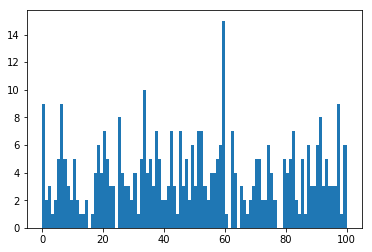

In [40]:
img = cv2.imread("cropped/train/images/n02085620-Chihuahua/n02085620_199.jpg")
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.equalizeHist(gray)

sift = cv2.xfeatures2d.SIFT_create()
(kps, descs) = sift.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

filtered_kps = []
clusters = cluster_model.predict(descs)

hist = np.histogram(clusters, np.linspace(0,100,101))
plt.hist(clusters, np.linspace(0,100,101))
plt.show()
most_comp_cluster = np.argmax(hist[0])




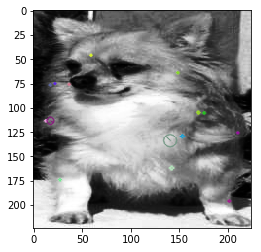

In [41]:
for kp, cluster in zip(kps, clusters):
    if cluster == 59 :
        filtered_kps.append(kp)
    
cv2.drawKeypoints(gray, filtered_kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)

# kps: 595, descriptors: (595, 128)
Computing label assignment and total inertia


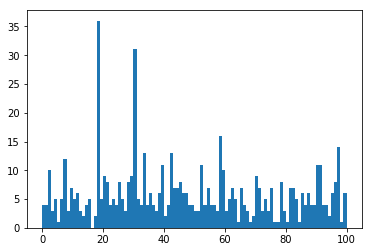

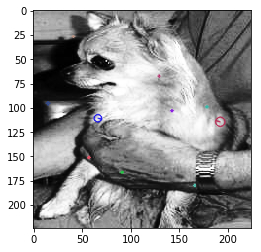

In [52]:
img = cv2.imread("cropped/train/images/n02085620-Chihuahua/n02085620_382.jpg")
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.equalizeHist(gray)

sift = cv2.xfeatures2d.SIFT_create()
(kps, descs) = sift.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

filtered_kps = []
clusters = cluster_model.predict(descs)

hist = np.histogram(clusters, np.linspace(0,100,101))
plt.hist(clusters, np.linspace(0,100,101))
plt.show()
most_comp_cluster = np.argmax(hist[0])

for kp, cluster in zip(kps, clusters):
    if cluster == 59:
        filtered_kps.append(kp)
    
cv2.drawKeypoints(gray, filtered_kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)



# kps: 228, descriptors: (228, 128)
Computing label assignment and total inertia


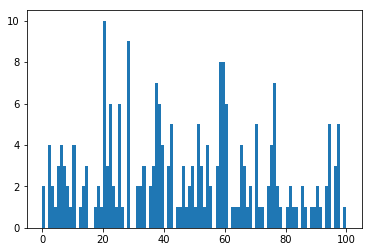

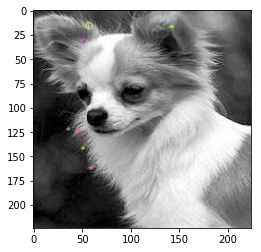

In [53]:
img = cv2.imread("cropped/train/images/n02085620-Chihuahua/n02085620_3593.jpg")
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.equalizeHist(gray)
sift = cv2.xfeatures2d.SIFT_create()
(kps, descs) = sift.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

filtered_kps = []
clusters = cluster_model.predict(descs)

hist = np.histogram(clusters, np.linspace(0,100,101))
plt.hist(clusters, np.linspace(0,100,101))
plt.show()
most_comp_cluster = np.argmax(hist[0])

for kp, cluster in zip(kps, clusters):
    if cluster == 59:
        filtered_kps.append(kp)
    
cv2.drawKeypoints(gray, filtered_kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)




## 2. Japanese_spaniel

# kps: 195, descriptors: (195, 128)
Computing label assignment and total inertia


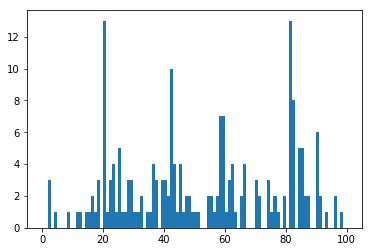

In [54]:
img = cv2.imread("cropped/train/images/n02085782-Japanese_spaniel/n02085782_230.jpg")
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.equalizeHist(gray)

sift = cv2.xfeatures2d.SIFT_create()
(kps, descs) = sift.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

filtered_kps = []
clusters = cluster_model.predict(descs)

hist = np.histogram(clusters, np.linspace(0,100,101))
plt.hist(clusters, np.linspace(0,100,101))
plt.show()
most_comp_cluster = np.argmax(hist[0])



In [57]:
hist

(array([ 0,  0,  3,  0,  1,  0,  0,  0,  1,  0,  0,  1,  1,  0,  1,  1,  2,
         1,  3,  0, 13,  1,  3,  4,  1,  5,  1,  1,  3,  3,  1,  1,  2,  0,
         1,  1,  4,  3,  0,  3,  3,  2, 10,  4,  1,  4,  1,  2,  2,  1,  1,
         1,  0,  0,  2,  2,  1,  2,  7,  7,  1,  3,  4,  1,  0,  2,  4,  0,
         0,  0,  3,  2,  0,  0,  3,  1,  2,  1,  0,  2,  0, 13,  8,  0,  5,
         5,  2,  2,  0,  0,  6,  2,  0,  1,  0,  0,  2,  0,  1,  0]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80., 

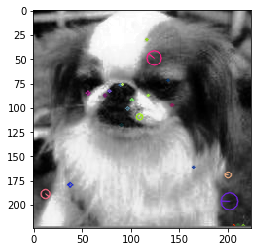

In [58]:
for kp, cluster in zip(kps, clusters):
    if cluster == 82 :
        filtered_kps.append(kp)
    
cv2.drawKeypoints(gray, filtered_kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)

# kps: 381, descriptors: (381, 128)
Computing label assignment and total inertia


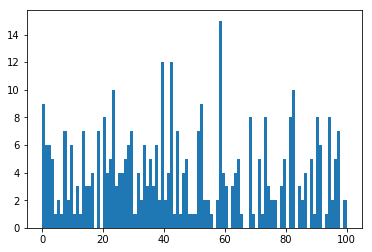

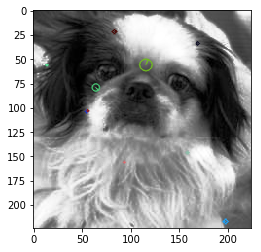

In [65]:
img = cv2.imread("cropped/train/images/n02085782-Japanese_spaniel/n02085782_516.jpg")
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.equalizeHist(gray)

sift = cv2.xfeatures2d.SIFT_create()
(kps, descs) = sift.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

filtered_kps = []
clusters = cluster_model.predict(descs)

hist = np.histogram(clusters, np.linspace(0,100,101))
plt.hist(clusters, np.linspace(0,100,101))
plt.show()
most_comp_cluster = np.argmax(hist[0])


for kp, cluster in zip(kps, clusters):
    if cluster == 82 :
        filtered_kps.append(kp)
    
cv2.drawKeypoints(gray, filtered_kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)

# kps: 241, descriptors: (241, 128)
Computing label assignment and total inertia


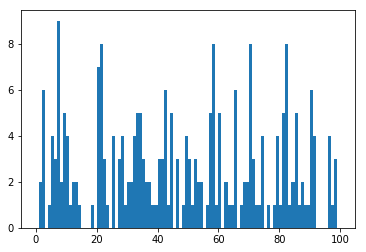

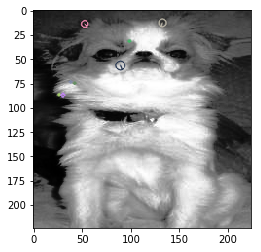

In [66]:
img = cv2.imread("cropped/train/images/n02085782-Japanese_spaniel/n02085782_1059.jpg")
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.equalizeHist(gray)

sift = cv2.xfeatures2d.SIFT_create()
(kps, descs) = sift.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

filtered_kps = []
clusters = cluster_model.predict(descs)

hist = np.histogram(clusters, np.linspace(0,100,101))
plt.hist(clusters, np.linspace(0,100,101))
plt.show()
most_comp_cluster = np.argmax(hist[0])


for kp, cluster in zip(kps, clusters):
    if cluster == 82 :
        filtered_kps.append(kp)
    
cv2.drawKeypoints(gray, filtered_kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)

# Test de performance 

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.svm import SVC

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
def train_and_test_model(classifier, Xtrain, ytrain, Xtest, ytest, is_neural_net=False):
    print("="*80)
    print('Training ', classifier)
    classifier.fit(Xtrain, ytrain)

    pred = classifier.predict(Xtrain)
    score = metrics.accuracy_score(ytrain, pred)

##  print 'Accuracy on training set = ', score*100

    pred = classifier.predict(Xtest)
    score = metrics.accuracy_score(ytest, pred)

    print('Accuracy on test set = ', score*100)

In [23]:
from sklearn.mixture import GaussianMixture

In [24]:
gm = GaussianMixture()
train_and_test_model(gm, X_train, y_train, X_test, y_test)

Training  GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
Accuracy on test set =  0.6060606060606061


In [25]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()
rfc = RandomForestClassifier()

for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac, rfc]:
    train_and_test_model(classifier, X_train, y_train, X_test, y_test)

Training  DummyClassifier(constant=None, random_state=None, strategy='stratified')
Accuracy on test set =  0.7575757575757576
Training  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy on test set =  2.027972027972028
Training  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy on test set =  5.256410256410256
Training  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Accuracy on test set =  5.874125874125874
Training  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Accuracy on test set =  0.6643356643356644
Training  Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy on test set =  2.4009324009324007
Training  PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=None, n_iter=None,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy on test set =  2.8904428904428907
Training  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy on test set =  2.3543123543123543


In [26]:
mlpc = MLPClassifier()
train_and_test_model(mlpc, X_train, y_train, X_test, y_test)

Training  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Accuracy on test set =  3.6247086247086244


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [27]:
svc = SVC(random_state=0)
train_and_test_model(svc, X_train, y_train, X_test, y_test)

Training  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
Accuracy on test set =  3.1818181818181817


In [28]:
svc_lin = SVC(kernel='linear')
train_and_test_model(svc_lin, X_train, y_train, X_test, y_test)

Training  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy on test set =  5.361305361305361


In [29]:
svc_sig = SVC(kernel='sigmoid')
train_and_test_model(svc_sig, X_train, y_train, X_test, y_test)

Training  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy on test set =  0.710955710955711


In [30]:
svc_poly = SVC(kernel='poly')
train_and_test_model(svc_poly, X_train, y_train, X_test, y_test)

Training  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy on test set =  5.27972027972028
